# Machine Learning - Supervised Methods

## Package Load

In [48]:
import re
import time
import random
import warnings
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [7]:
import tensorflow as tf
from tensorflow import keras

2023-08-03 20:38:16.829629: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [8]:
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit, cross_val_score, cross_validate, cross_val_predict, GridSearchCV, RandomizedSearchCV, KFold

from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_squared_error, mean_squared_log_error, r2_score
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score, precision_recall_curve, roc_curve, plot_roc_curve, roc_auc_score, auc

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [9]:
from matplotlib.colors import ListedColormap

from sklearn.preprocessing import PolynomialFeatures
from sklearn.datasets import make_moons

In [10]:
warnings.filterwarnings('ignore')

## First Simple ML
- 데이터 확인 (EDA) -> 데이터 분할 -> 전처리 -> 모델학습 -> 성능평가 (검증/튜닝)

In [6]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

In [7]:
iris = load_iris()
iris_data = iris.data
iris_label = iris.target

iris_df = pd.DataFrame(data=iris_data, columns=iris.feature_names)
iris_df['label'] = iris.target
iris_df.head(3)

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   

   label  
0      0  
1      0  
2      0

In [8]:
x_train, x_test, y_train, y_test = train_test_split(iris_data, iris_label, test_size=0.2, random_state=11)

In [9]:
# DecisionTreeClassifier 객체 생성 
dt_clf = DecisionTreeClassifier(random_state=11)

# 학습 수행 
dt_clf.fit(x_train, y_train)

DecisionTreeClassifier(random_state=11)

In [10]:
# 학습이 완료된 DecisionTreeClassifier 객체에서 테스트 데이터 세트로 예측 수행. 
pred = dt_clf.predict(x_test)

print('예측 정확도: {0:.4f}'.format(accuracy_score(y_test,pred)))

예측 정확도: 0.9333


In [11]:
iris_df

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                  5.1               3.5                1.4               0.2   
1                  4.9               3.0                1.4               0.2   
2                  4.7               3.2                1.3               0.2   
3                  4.6               3.1                1.5               0.2   
4                  5.0               3.6                1.4               0.2   
..                 ...               ...                ...               ...   
145                6.7               3.0                5.2               2.3   
146                6.3               2.5                5.0               1.9   
147                6.5               3.0                5.2               2.0   
148                6.2               3.4                5.4               2.3   
149                5.9               3.0                5.1               1.8   

     label  
0        0  
1        0  
2        0  
3        0  
4        0  
..     ...  
145      2  
146      2  
147      2  
148      2  
149      2  

[150 rows x 5 columns]

In [12]:
### cross_val_score
# 성능 지표는 정확도(accuracy) , 교차 검증 세트는 3개 
scores = cross_val_score(dt_clf , iris_data, iris_label , scoring='accuracy',cv=3)
print('교차 검증별 정확도:',np.round(scores, 4))
print('평균 검증 정확도:', np.round(np.mean(scores), 4))

교차 검증별 정확도: [0.98 0.92 0.98]
평균 검증 정확도: 0.96


In [13]:
### GridSearchCV
# parameter들을 dictionary 형태로 설정
parameters = {'max_depth':[1, 2, 3], 'min_samples_split':[2, 3]}

# param_grid의 하이퍼 파라미터들을 3개의 train, test set fold 로 나누어서 테스트 수행 설정.  
### refit=True 가 default. True이면 가장 좋은 파라미터 설정으로 재 학습.  
grid_dtree = GridSearchCV(dt_clf, param_grid=parameters, cv=3, refit=True)

# 붓꽃 Train 데이터로 param_grid의 하이퍼 파라미터들을 순차적으로 학습/평가 .
grid_dtree.fit(x_train, y_train)

# GridSearchCV 결과 추출하여 DataFrame으로 변환
scores_df = pd.DataFrame(grid_dtree.cv_results_)
scores_df[['params', 'mean_test_score', 'rank_test_score', \
           'split0_test_score', 'split1_test_score', 'split2_test_score']]

params  mean_test_score  rank_test_score  \
0  {'max_depth': 1, 'min_samples_split': 2}         0.675000                5   
1  {'max_depth': 1, 'min_samples_split': 3}         0.675000                5   
2  {'max_depth': 2, 'min_samples_split': 2}         0.958333                3   
3  {'max_depth': 2, 'min_samples_split': 3}         0.958333                3   
4  {'max_depth': 3, 'min_samples_split': 2}         0.966667                1   
5  {'max_depth': 3, 'min_samples_split': 3}         0.966667                1   

   split0_test_score  split1_test_score  split2_test_score  
0              0.675              0.675              0.675  
1              0.675              0.675              0.675  
2              0.925              1.000              0.950  
3              0.925              1.000              0.950  
4              0.925              1.000              0.975  
5              0.925              1.000              0.975

In [14]:
print('GridSearchCV 최적 파라미터:', grid_dtree.best_params_)
print('GridSearchCV 최고 정확도: {0:.4f}'.format(grid_dtree.best_score_))

GridSearchCV 최적 파라미터: {'max_depth': 3, 'min_samples_split': 2}
GridSearchCV 최고 정확도: 0.9667


In [15]:
# GridSearchCV의 refit으로 이미 학습이 된 estimator 반환
estimator = grid_dtree.best_estimator_

# GridSearchCV의 best_estimator_는 이미 최적 하이퍼 파라미터로 학습이 됨
pred = estimator.predict(x_test)
print('테스트 데이터 세트 정확도: {0:.4f}'.format(accuracy_score(y_test, pred)))

테스트 데이터 세트 정확도: 0.9333


In [16]:
### Titanic sample
titanic_df = pd.read_csv('./pymlrev2-main/1장/titanic_train.csv')
titanic_df.head(3)

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S

In [17]:
# Null 처리 함수
def fillna(df):
    df['Age'].fillna(df['Age'].mean(), inplace=True)
    df['Cabin'].fillna('N', inplace=True)
    df['Embarked'].fillna('N', inplace=True)
    df['Fare'].fillna(0, inplace=True)
    return df

# 머신러닝 알고리즘에 불필요한 피처 제거
def drop_features(df):
    df.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)
    return df

# 레이블 인코딩 수행.
def format_features(df):
    df['Cabin'] = df['Cabin'].str[:1]
    features = ['Cabin', 'Sex', 'Embarked']
    for feature in features:
        le = LabelEncoder()
        le = le.fit(df[feature])
        df[feature] = le.transform(df[feature])
    return df

# 앞에서 설정한 데이터 전처리 함수 호출
def transform_features(df):
    df = fillna(df)
    df = drop_features(df)
    df = format_features(df)
    return df

In [18]:
# 원본 데이터를 재로딩 하고, feature데이터 셋과 Label 데이터 셋 추출. 
y_titanic_df = titanic_df['Survived']
x_titanic_df= titanic_df.drop('Survived', axis=1)

x_titanic_df = transform_features(x_titanic_df)

In [19]:
x_train, x_test, y_train, y_test=train_test_split(x_titanic_df, y_titanic_df, test_size=0.2, random_state=11)

In [20]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [21]:
# 결정트리, Random Forest, 로지스틱 회귀를 위한 사이킷런 Classifier 클래스 생성
dt_clf = DecisionTreeClassifier(random_state=11)
rf_clf = RandomForestClassifier(random_state=11)
lr_clf = LogisticRegression(solver='liblinear') # 작은 데이터에서 유리한 solver

# DecisionTreeClassifier 학습/예측/평가
dt_clf.fit(x_train , y_train)
dt_pred = dt_clf.predict(x_test)
print('DecisionTreeClassifier 정확도: {0:.4f}'.format(accuracy_score(y_test, dt_pred)))

# RandomForestClassifier 학습/예측/평가
rf_clf.fit(x_train , y_train)
rf_pred = rf_clf.predict(x_test)
print('RandomForestClassifier 정확도:{0:.4f}'.format(accuracy_score(y_test, rf_pred)))

# LogisticRegression 학습/예측/평가
lr_clf.fit(x_train, y_train)
lr_pred = lr_clf.predict(x_test)
print('LogisticRegression 정확도: {0:.4f}'.format(accuracy_score(y_test, lr_pred)))

DecisionTreeClassifier 정확도: 0.7877
RandomForestClassifier 정확도:0.8547
LogisticRegression 정확도: 0.8659


In [22]:
# KFold
def exec_kfold(clf, folds=5):
    # 폴드 세트를 5개인 KFold객체를 생성, 폴드 수만큼 예측결과 저장을 위한  리스트 객체 생성.
    kfold = KFold(n_splits=folds)
    scores = []
    
    # KFold 교차 검증 수행. 
    for iter_count , (train_index, test_index) in enumerate(kfold.split(x_titanic_df)):
        # x_titanic_df 데이터에서 교차 검증별로 학습과 검증 데이터를 가리키는 index 생성
        x_train, x_test = x_titanic_df.values[train_index], x_titanic_df.values[test_index]
        y_train, y_test = y_titanic_df.values[train_index], y_titanic_df.values[test_index]
        
        # Classifier 학습, 예측, 정확도 계산 
        clf.fit(x_train, y_train) 
        predictions = clf.predict(x_test)
        accuracy = accuracy_score(y_test, predictions)
        scores.append(accuracy)
        print("교차 검증 {0} 정확도: {1:.4f}".format(iter_count, accuracy))     
    
    # 5개 fold에서의 평균 정확도 계산. 
    mean_score = np.mean(scores)
    print("평균 정확도: {0:.4f}".format(mean_score)) 

exec_kfold(dt_clf, folds=5)

교차 검증 0 정확도: 0.7542
교차 검증 1 정확도: 0.7809
교차 검증 2 정확도: 0.7865
교차 검증 3 정확도: 0.7697
교차 검증 4 정확도: 0.8202
평균 정확도: 0.7823


In [23]:
# cross_val_score
scores = cross_val_score(dt_clf, x_titanic_df, y_titanic_df, cv=5)
for iter_count, accuracy in enumerate(scores):
    print("교차 검증 {0} 정확도: {1:.4f}".format(iter_count, accuracy))
    
print("평균 정확도: {0:.4f}".format(np.mean(scores))) 

교차 검증 0 정확도: 0.7430
교차 검증 1 정확도: 0.7753
교차 검증 2 정확도: 0.7921
교차 검증 3 정확도: 0.7865
교차 검증 4 정확도: 0.8427
평균 정확도: 0.7879


In [24]:
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression

In [25]:
### Boston data
boston = load_boston()
price = boston.target 
boston = pd.DataFrame(boston.data, columns=boston.feature_names)
boston['Price'] = price

In [26]:
boston.head()

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  Price  
0     15.3  396.90   4.98   24.0  
1     17.8  396.90   9.14   21.6  
2     17.8  392.83   4.03   34.7  
3     18.7  394.63   2.94   33.4  
4     18.7  396.90   5.33   36.2

In [27]:
boston.shape

(506, 14)

In [28]:
boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  Price    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [29]:
boston.isna().sum() # no NAs

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
Price      0
dtype: int64

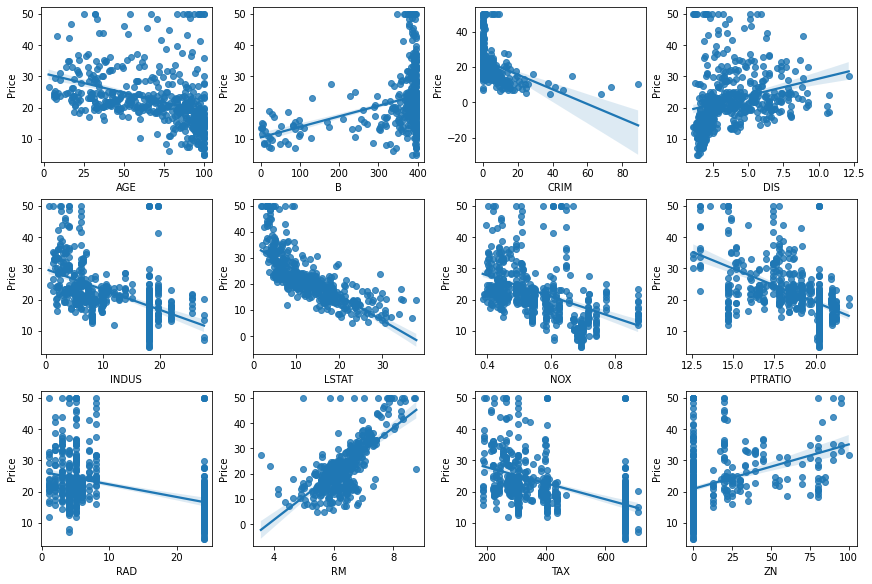

In [30]:
fig, axs = plt.subplots(figsize=(12,8), ncols=4, nrows=3, constrained_layout=True) # 3개의 행과 4개의 열을 가진 subplot 그리기
features = boston.columns.difference(['Price', 'CHAS'])

for i, feature in zip(range(12), features):
    row = int(i/4) # 행번호 설정
    col = i%4 # 열번호 설정
    
    # seaborn의 regplot을 이용해 산점도와 선형 회귀직선을 함께 시각화함
    sns.regplot(x=feature, y=boston['Price'], data=boston, ax=axs[row][col])

In [31]:
### Data split
x = boston[['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']].values
y = boston['Price'].values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [32]:
print('학습데이터세트 PRICE 평균: ', y_train.mean())
print('평가데이터세트 PRICE 평균: ', y_test.mean())

학습데이터세트 PRICE 평균:  22.796534653465343
평가데이터세트 PRICE 평균:  21.488235294117644


In [33]:
### Scaling
scaler = MinMaxScaler()
x_train_scaled = scaler.fit_transform(x_train)

In [34]:
### Modeling
linear = LinearRegression()
linear.fit(x_train_scaled, y_train)

LinearRegression()

In [35]:
### Model evaluation
x_test_scaled = scaler.transform(x_test)
pred = linear.predict(x_test_scaled)

mae = mean_absolute_error(y_test, pred)
mse = mean_squared_error(y_test, pred)
r2 = r2_score(y_test, pred)

print('MAE: {0: .5f}'.format(mae))
print('MSE: {0: .5f}'.format(mse))
print('R2-Score: {0: .5f}'.format(r2))

MAE:  3.23724
MSE:  24.63539
R2-Score:  0.66406


In [36]:
pred_df = pd.DataFrame(pred, columns=['pred Price'])
actual = pd.DataFrame(y_test, columns=['actual Price'])

reg_result = pd.concat([actual, pred_df], axis=1)
reg_result.head()

actual Price  pred Price
0          23.6   29.218660
1          32.4   33.551467
2          13.6   14.810658
3          22.8   25.084725
4          16.1   19.173927

In [37]:
print('절편 값:', linear.intercept_)
print('회귀 계수값:', np.round(linear.coef_, 1))

절편 값: 24.866842302745063
회귀 계수값: [-10.6   3.2   1.6  -7.9  22.1  -0.5 -16.1   6.6  -6.3  -8.9   5.1 -19. ]


In [38]:
# 회귀 계수를 큰 값 순으로 정렬하기 위해 Series로 생성. index가 칼럼명에 유의
coeff = pd.Series(data=np.round(linear.coef_, 1), index=features)
coeff.sort_values(ascending=False)

INDUS      22.1
PTRATIO     6.6
TAX         5.1
B           3.2
CRIM        1.6
LSTAT      -0.5
RAD        -6.3
DIS        -7.9
RM         -8.9
AGE       -10.6
NOX       -16.1
ZN        -19.0
dtype: float64

In [39]:
# cross_val_score()로 5 Fold 셋으로 MSE 를 구한 뒤 이를 기반으로 다시  RMSE 구함. 
neg_mse_scores = cross_val_score(LinearRegression(), x, y, scoring="neg_mean_squared_error", cv=5)
rmse_scores  = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

# cross_val_score(scoring="neg_mean_squared_error")로 반환된 값은 모두 음수 
print(' 5 folds 의 개별 Negative MSE scores: ', np.round(neg_mse_scores, 2))
print(' 5 folds 의 개별 RMSE scores : ', np.round(rmse_scores, 2))
print(' 5 folds 의 평균 RMSE : {0:.3f} '.format(avg_rmse))

 5 folds 의 개별 Negative MSE scores:  [-12.67 -24.28 -27.84 -82.08 -36.51]
 5 folds 의 개별 RMSE scores :  [3.56 4.93 5.28 9.06 6.04]
 5 folds 의 평균 RMSE : 5.773 


## Hyperparameter Optimization

### (1) Grid Search
- 모든 가능한 조합을 수행

In [40]:
x_train, x_test, y_train, y_test=train_test_split(x_titanic_df, y_titanic_df, test_size=0.2, random_state=11)

In [41]:
parameters = {'max_depth': [2, 3, 5, 10], 'min_samples_split': [2, 3, 5], 'min_samples_leaf': [1, 5, 8]}

grid_dclf = GridSearchCV(dt_clf , param_grid=parameters , scoring='accuracy', cv=5)
grid_dclf.fit(x_train, y_train)

print('GridSearchCV 최적 하이퍼 파라미터 :', grid_dclf.best_params_)
print('GridSearchCV 최고 정확도: {0:.4f}'.format(grid_dclf.best_score_))
best_dclf = grid_dclf.best_estimator_

# GridSearchCV의 최적 하이퍼 파라미터로 학습된 Estimator로 예측 및 평가 수행. 
dpredictions = best_dclf.predict(x_test)
accuracy = accuracy_score(y_test , dpredictions)
print('테스트 세트에서의 DecisionTreeClassifier 정확도 : {0:.4f}'.format(accuracy))

GridSearchCV 최적 하이퍼 파라미터 : {'max_depth': 3, 'min_samples_leaf': 5, 'min_samples_split': 2}
GridSearchCV 최고 정확도: 0.7992
테스트 세트에서의 DecisionTreeClassifier 정확도 : 0.8715


### (2) Randomized Search
- 특정 범위에서 파라미터를 랜덤으로 선택

In [42]:
param_distribs = {'max_depth': [2, 3, 5, 10], 'min_samples_split': [2, 3, 5], 'min_samples_leaf': [1, 5, 8]}
rand_dclf = RandomizedSearchCV(dt_clf, param_distributions=param_distribs, n_iter=5, cv=5, scoring='accuracy')
rand_dclf.fit(x_train, y_train)

print('RandomizedSearch 최적 하이퍼 파라미터 :', rand_dclf.best_params_)
print('RandomizedSearch 최고 정확도: {0:.4f}'.format(rand_dclf.best_score_))
best_dclf = rand_dclf.best_estimator_

# RandomizedSearchCV의 최적 하이퍼 파라미터로 학습된 Estimator로 예측 및 평가 수행. 
dpredictions = best_dclf.predict(x_test)
accuracy = accuracy_score(y_test , dpredictions)
print('테스트 세트에서의 DecisionTreeClassifier 정확도 : {0:.4f}'.format(accuracy))

RandomizedSearch 최적 하이퍼 파라미터 : {'min_samples_split': 2, 'min_samples_leaf': 5, 'max_depth': 5}
RandomizedSearch 최고 정확도: 0.7894
테스트 세트에서의 DecisionTreeClassifier 정확도 : 0.8547


### (3) Bayesian Optimization

In [43]:
# !pip install hyperopt
from hyperopt import hp
from hyperopt import STATUS_OK
from hyperopt import fmin, tpe, Trials

In [44]:
# -10 ~ 10까지 1간격을 가지는 입력 변수 x와 -15 ~ 15까지 1간격으로 입력 변수 y 설정.
search_space = {'x': hp.quniform('x', -10, 10, 1), 'y': hp.quniform('y', -15, 15, 1)}

In [45]:
# 목적 함수 생성. 변숫값과 변수 검색 공간을 가지는 딕셔너리를 인자로 받고, 특정 값을 반환
def objective_func(search_space):
    x = search_space['x']
    y = search_space['y']
    retval = x**2 - 20*y
    
    return retval

In [46]:
# 입력 결괏값을 저장한 Trials 객체값 생성.
trial_val = Trials()

# 목적 함수의 최솟값을 반환하는 최적 입력 변숫값을 5번의 입력값 시도(max_evals=5)로 찾아냄.
best_01 = fmin(fn=objective_func, space=search_space, algo=tpe.suggest, max_evals=5
               , trials=trial_val, rstate=np.random.default_rng(seed=0))
print('best:', best_01)

100%|████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 508.18trial/s, best loss: -224.0]
best: {'x': -4.0, 'y': 12.0}


In [47]:
trial_val = Trials()

# max_evals를 20회로 늘려서 재테스트
best_02 = fmin(fn=objective_func, space=search_space, algo=tpe.suggest, max_evals=20
               , trials=trial_val, rstate=np.random.default_rng(seed=0))
print('best:', best_02)

100%|██████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 656.06trial/s, best loss: -296.0]
best: {'x': 2.0, 'y': 15.0}


In [48]:
# fmin( )에 인자로 들어가는 Trials 객체의 result 속성에 파이썬 리스트로 목적 함수 반환값들이 저장됨
# 리스트 내부의 개별 원소는 {'loss':함수 반환값, 'status':반환 상태값} 와 같은 딕셔너리임. 
print(trial_val.results)

[{'loss': -64.0, 'status': 'ok'}, {'loss': -184.0, 'status': 'ok'}, {'loss': 56.0, 'status': 'ok'}, {'loss': -224.0, 'status': 'ok'}, {'loss': 61.0, 'status': 'ok'}, {'loss': -296.0, 'status': 'ok'}, {'loss': -40.0, 'status': 'ok'}, {'loss': 281.0, 'status': 'ok'}, {'loss': 64.0, 'status': 'ok'}, {'loss': 100.0, 'status': 'ok'}, {'loss': 60.0, 'status': 'ok'}, {'loss': -39.0, 'status': 'ok'}, {'loss': 1.0, 'status': 'ok'}, {'loss': -164.0, 'status': 'ok'}, {'loss': 21.0, 'status': 'ok'}, {'loss': -56.0, 'status': 'ok'}, {'loss': 284.0, 'status': 'ok'}, {'loss': 176.0, 'status': 'ok'}, {'loss': -171.0, 'status': 'ok'}, {'loss': 0.0, 'status': 'ok'}]


In [49]:
# Trials 객체의 vals 속성에 {'입력변수명':개별 수행 시마다 입력된 값 리스트} 형태로 저장됨.
print(trial_val.vals)

{'x': [-6.0, -4.0, 4.0, -4.0, 9.0, 2.0, 10.0, -9.0, -8.0, -0.0, -0.0, 1.0, 9.0, 6.0, 9.0, 2.0, -2.0, -4.0, 7.0, -0.0], 'y': [5.0, 10.0, -2.0, 12.0, 1.0, 15.0, 7.0, -10.0, 0.0, -5.0, -3.0, 2.0, 4.0, 10.0, 3.0, 3.0, -14.0, -8.0, 11.0, -0.0]}


In [50]:
# results에서 loss 키값에 해당하는 밸류들을 추출하여 list로 생성. 
losses = [loss_dict['loss'] for loss_dict in trial_val.results]

# DataFrame으로 생성.
result_df = pd.DataFrame({'x': trial_val.vals['x'], 'y': trial_val.vals['y'], 'losses': losses})
result_df

x     y  losses
0   -6.0   5.0   -64.0
1   -4.0  10.0  -184.0
2    4.0  -2.0    56.0
3   -4.0  12.0  -224.0
4    9.0   1.0    61.0
5    2.0  15.0  -296.0
6   10.0   7.0   -40.0
7   -9.0 -10.0   281.0
8   -8.0   0.0    64.0
9   -0.0  -5.0   100.0
10  -0.0  -3.0    60.0
11   1.0   2.0   -39.0
12   9.0   4.0     1.0
13   6.0  10.0  -164.0
14   9.0   3.0    21.0
15   2.0   3.0   -56.0
16  -2.0 -14.0   284.0
17  -4.0  -8.0   176.0
18   7.0  11.0  -171.0
19  -0.0  -0.0     0.0

## Model Evaluation

### (1) Classification
- Accuracy: 정답의 개수. 데이터 구성에 따라 성능이 왜곡될 가능성 있음
- Confusion Matrix: Accuray의 한계점 보완
- Precision, Recall: Positive 예측에 집중한 지표. Positive 중 실제 Positive 비율 / 실제 Positive 중 예측된 Positive 비율
- F1-score: Precision, Recall의 조화평균
- ROC curve, AUC: FPR(False Positive Rate) 대비 TPR(True Positive Rate)의 변화와 그 비율을 판단
- Gain chart, Lift chart
    - 이익(Gain): 목표 범주에 속하는 개체들이 각 등급에 얼마나 분포하고 있는지 나타냄
    - 향상도(Lift): 랜덤 모델 대비 얼마나 모델의 성과가 얼마나 있는지 등급별로 파악

In [51]:
x_train, x_test, y_train, y_test = train_test_split(x_titanic_df, y_titanic_df, test_size=0.2, random_state=11)

In [52]:
### Accuracy
accuracy_score(y_test, lr_pred)

0.8659217877094972

In [53]:
### Confusion matrix
confusion_matrix(y_test, lr_pred)

array([[108,  10],
       [ 14,  47]])

In [54]:
### Precision
precision_score(y_test, lr_pred)

0.8245614035087719

In [55]:
### Recall
recall_score(y_test, lr_pred)

0.7704918032786885

In [56]:
### Precision & Recall, trade-offs
# predict_proba()
pred_proba = lr_clf.predict_proba(x_test)
pred  = lr_clf.predict(x_test)
print('pred_proba()결과 Shape : {0}'.format(pred_proba.shape))
print('pred_proba array에서 앞 3개만 샘플로 추출 \n:', pred_proba[:3])

# 예측 확률 array 와 예측 결과값 array 를 concatenate 하여 예측 확률과 결과값을 한눈에 확인
pred_proba_result = np.concatenate([pred_proba , pred.reshape(-1, 1)], axis=1)
print('두개의 class 중에서 더 큰 확률을 클래스 값으로 예측 \n',pred_proba_result[:3])

pred_proba()결과 Shape : (179, 2)
pred_proba array에서 앞 3개만 샘플로 추출 
: [[0.44935225 0.55064775]
 [0.86335511 0.13664489]
 [0.86429643 0.13570357]]
두개의 class 중에서 더 큰 확률을 클래스 값으로 예측 
 [[0.44935225 0.55064775 1.        ]
 [0.86335511 0.13664489 0.        ]
 [0.86429643 0.13570357 0.        ]]


In [57]:
from sklearn.preprocessing import Binarizer

In [58]:
def get_clf_eval(y_test , pred):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    print('오차 행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}'.format(accuracy , precision ,recall))

In [59]:
#Binarizer의 threshold 설정값. 분류 결정 임곗값임.  
custom_threshold = 0.5

# predict_proba( ) 반환값의 두번째 컬럼 , 즉 Positive 클래스 컬럼 하나만 추출하여 Binarizer를 적용
pred_proba_1 = pred_proba[:,1].reshape(-1, 1)

binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_1) 
custom_predict = binarizer.transform(pred_proba_1)

get_clf_eval(y_test, custom_predict)

오차 행렬
[[108  10]
 [ 14  47]]
정확도: 0.8659, 정밀도: 0.8246, 재현율: 0.7705


In [60]:
# Binarizer의 threshold 설정값을 0.4로 설정. 즉 분류 결정 임곗값을 0.5에서 0.4로 낮춤  
custom_threshold = 0.4
pred_proba_1 = pred_proba[:,1].reshape(-1, 1)
binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_1) 
custom_predict = binarizer.transform(pred_proba_1)

get_clf_eval(y_test , custom_predict)

오차 행렬
[[97 21]
 [11 50]]
정확도: 0.8212, 정밀도: 0.7042, 재현율: 0.8197


In [61]:
# 테스트를 수행할 모든 임곗값을 리스트 객체로 저장. 
thresholds = [0.4, 0.45, 0.50, 0.55, 0.60]

def get_eval_by_threshold(y_test , pred_proba_c1, thresholds):
    # thresholds list객체내의 값을 차례로 iteration하면서 Evaluation 수행.
    for custom_threshold in thresholds:
        binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_c1) 
        custom_predict = binarizer.transform(pred_proba_c1)
        print('임곗값:',custom_threshold)
        get_clf_eval(y_test , custom_predict)

get_eval_by_threshold(y_test ,pred_proba[:,1].reshape(-1, 1), thresholds)

임곗값: 0.4
오차 행렬
[[97 21]
 [11 50]]
정확도: 0.8212, 정밀도: 0.7042, 재현율: 0.8197
임곗값: 0.45
오차 행렬
[[105  13]
 [ 13  48]]
정확도: 0.8547, 정밀도: 0.7869, 재현율: 0.7869
임곗값: 0.5
오차 행렬
[[108  10]
 [ 14  47]]
정확도: 0.8659, 정밀도: 0.8246, 재현율: 0.7705
임곗값: 0.55
오차 행렬
[[111   7]
 [ 16  45]]
정확도: 0.8715, 정밀도: 0.8654, 재현율: 0.7377
임곗값: 0.6
오차 행렬
[[113   5]
 [ 17  44]]
정확도: 0.8771, 정밀도: 0.8980, 재현율: 0.7213


In [62]:
### precision_recall_curve
# 레이블 값이 1일때의 예측 확률을 추출 
pred_proba_class1 = lr_clf.predict_proba(x_test)[:, 1] 

# 실제값 데이터 셋과 레이블 값이 1일 때의 예측 확률을 precision_recall_curve 인자로 입력 
precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_class1)
print('반환된 분류 결정 임곗값 배열의 Shape:', thresholds.shape)
print('반환된 precisions 배열의 Shape:', precisions.shape)
print('반환된 recalls 배열의 Shape:', recalls.shape)

print("thresholds 5 sample:", thresholds[:5])
print("precisions 5 sample:", precisions[:5])
print("recalls 5 sample:", recalls[:5])

#반환된 임계값 배열 로우가 147건이므로 샘플로 10건만 추출하되, 임곗값을 15 Step으로 추출. 
thr_index = np.arange(0, thresholds.shape[0], 15)
print('샘플 추출을 위한 임계값 배열의 index 10개:', thr_index)
print('샘플용 10개의 임곗값: ', np.round(thresholds[thr_index], 2))

# 15 step 단위로 추출된 임계값에 따른 정밀도와 재현율 값 
print('샘플 임계값별 정밀도: ', np.round(precisions[thr_index], 3))
print('샘플 임계값별 재현율: ', np.round(recalls[thr_index], 3))

반환된 분류 결정 임곗값 배열의 Shape: (147,)
반환된 precisions 배열의 Shape: (148,)
반환된 recalls 배열의 Shape: (148,)
thresholds 5 sample: [0.11573102 0.11636722 0.11819212 0.12102774 0.1234948 ]
precisions 5 sample: [0.37888199 0.375      0.37735849 0.37974684 0.38216561]
recalls 5 sample: [1.         0.98360656 0.98360656 0.98360656 0.98360656]
샘플 추출을 위한 임계값 배열의 index 10개: [  0  15  30  45  60  75  90 105 120 135]
샘플용 10개의 임곗값:  [0.12 0.13 0.15 0.17 0.26 0.38 0.49 0.63 0.76 0.9 ]
샘플 임계값별 정밀도:  [0.379 0.424 0.455 0.519 0.618 0.676 0.797 0.93  0.964 1.   ]
샘플 임계값별 재현율:  [1.    0.967 0.902 0.902 0.902 0.82  0.77  0.656 0.443 0.213]


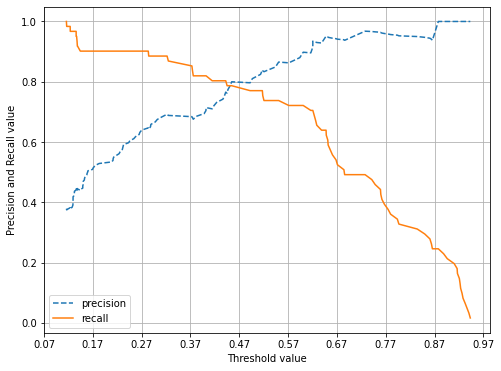

In [63]:
def precision_recall_curve_plot(y_test , pred_proba_c1):
    # threshold ndarray와 이 threshold에 따른 정밀도, 재현율 ndarray 추출. 
    precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_c1)
    
    # X축을 threshold값으로, Y축은 정밀도, 재현율 값으로 각각 Plot 수행. 정밀도는 점선으로 표시
    plt.figure(figsize=(8,6))
    threshold_boundary = thresholds.shape[0]
    sns.lineplot(thresholds, precisions[0:threshold_boundary], linestyle='dashed', label='precision')
    sns.lineplot(thresholds, recalls[0:threshold_boundary], label='recall')
    
    # threshold 값 X 축의 Scale을 0.1 단위로 변경
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    
    # x축, y축 label과 legend, 그리고 grid 설정
    plt.xlabel('Threshold value'); plt.ylabel('Precision and Recall value')
    plt.legend(); plt.grid()
    plt.show()
    
precision_recall_curve_plot(y_test, lr_clf.predict_proba(x_test)[:, 1])


In [64]:
f1_score(y_test , pred)

0.7966101694915254

In [65]:
def get_clf_eval(y_test , pred):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    # F1 스코어 추가
    f1 = f1_score(y_test,pred)
    print('오차 행렬')
    print(confusion)
    # f1 score print 추가
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1:{3:.4f}'.format(accuracy, precision, recall, f1))

thresholds = [0.4 , 0.45 , 0.50 , 0.55 , 0.60]
pred_proba = lr_clf.predict_proba(x_test)
get_eval_by_threshold(y_test, pred_proba[:, 1].reshape(-1, 1), thresholds)

임곗값: 0.4
오차 행렬
[[97 21]
 [11 50]]
정확도: 0.8212, 정밀도: 0.7042, 재현율: 0.8197, F1:0.7576
임곗값: 0.45
오차 행렬
[[105  13]
 [ 13  48]]
정확도: 0.8547, 정밀도: 0.7869, 재현율: 0.7869, F1:0.7869
임곗값: 0.5
오차 행렬
[[108  10]
 [ 14  47]]
정확도: 0.8659, 정밀도: 0.8246, 재현율: 0.7705, F1:0.7966
임곗값: 0.55
오차 행렬
[[111   7]
 [ 16  45]]
정확도: 0.8715, 정밀도: 0.8654, 재현율: 0.7377, F1:0.7965
임곗값: 0.6
오차 행렬
[[113   5]
 [ 17  44]]
정확도: 0.8771, 정밀도: 0.8980, 재현율: 0.7213, F1:0.8000


In [66]:
### ROC & AUC
# 레이블 값이 1일때의 예측 확률을 추출 
pred_proba_class1 = lr_clf.predict_proba(x_test)[:, 1] 

fprs , tprs , thresholds = roc_curve(y_test, pred_proba_class1)
# 반환된 임곗값 배열에서 샘플로 데이터를 추출하되, 임곗값을 5 Step으로 추출. 
# thresholds[0]은 max(예측확률)+1로 임의 설정됨. 이를 제외하기 위해 np.arange는 1부터 시작
thr_index = np.arange(1, thresholds.shape[0], 5)
print('샘플 추출을 위한 임곗값 배열의 index:', thr_index)
print('샘플 index로 추출한 임곗값: ', np.round(thresholds[thr_index], 2))

# 5 step 단위로 추출된 임계값에 따른 FPR, TPR 값
print('샘플 임곗값별 FPR: ', np.round(fprs[thr_index], 3))
print('샘플 임곗값별 TPR: ', np.round(tprs[thr_index], 3))

샘플 추출을 위한 임곗값 배열의 index: [ 1  6 11 16 21 26 31 36 41 46]
샘플 index로 추출한 임곗값:  [0.94 0.73 0.62 0.52 0.44 0.28 0.15 0.14 0.13 0.12]
샘플 임곗값별 FPR:  [0.    0.008 0.025 0.076 0.127 0.254 0.576 0.61  0.746 0.847]
샘플 임곗값별 TPR:  [0.016 0.492 0.705 0.738 0.803 0.885 0.902 0.951 0.967 1.   ]


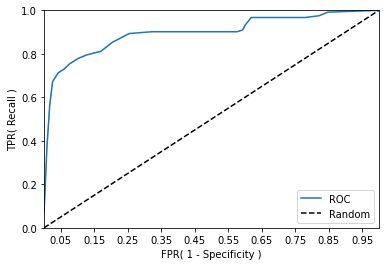

In [67]:
def roc_curve_plot(y_test , pred_proba_c1):
    # 임곗값에 따른 FPR, TPR 값을 반환 받음. 
    fprs , tprs , thresholds = roc_curve(y_test ,pred_proba_c1)

    sns.lineplot(fprs , tprs, ci=False, label='ROC')
    sns.lineplot([0, 1], [0, 1], color='black', linestyle='dashed', label='Random')
    
    # FPR X 축의 Scale을 0.1 단위로 변경, X,Y 축명 설정등   
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    plt.xlim(0,1); plt.ylim(0,1)
    plt.xlabel('FPR( 1 - Specificity )'); plt.ylabel('TPR( Recall )')
    plt.legend()
    plt.show()
    
roc_curve_plot(y_test, lr_clf.predict_proba(x_test)[:, 1])

In [68]:
pred_proba = lr_clf.predict_proba(x_test)[:, 1]
roc_auc_score(y_test, pred_proba)

0.8986524034454015

In [69]:
# Class가 명확하게 정의된 데이터에서만 가능
### Gain table generate
def get_gain_table(clf, X, y, num_group=10):
    res_df = pd.DataFrame()
    res_df['response'] = y
    class_idx = np.where(clf.classes_==1)[0][0]
    
    res_df['prob'] = clf.predict_proba(X)[:, class_idx]
    res_df = res_df.sort_values('prob', ascending=False).reset_index(drop=True) ## 확률값으로 내림차순
    res_df['temp'] = range(len(res_df))
    labels = list(range(1, num_group+1))
    res_df['group'] = pd.qcut(res_df['temp'], num_group, labels = labels) ## 데이터 num_group 수만큼 분할
    res_df = res_df.groupby('group').agg({'response':['sum', 'count']}).reset_index() ## 
    res_df.columns = ['group','num_of_response', 'num_of_data']
    res_df = res_df.sort_values('group')
    res_df['individual_gain'] = res_df['num_of_response']/np.sum(y) ## 구간별 gain
    res_df['gain'] = res_df['individual_gain'].cumsum() ## gain
    
    return res_df

### Lift table generate
def get_lift_table(clf, X, y, num_group=10):
    res_df = pd.DataFrame()
    res_df['response'] = y
    class_idx = np.where(clf.classes_==1)[0][0]
    res_df['prob'] = clf.predict_proba(X)[:, class_idx]
    res_df = res_df.sort_values('prob', ascending=False).reset_index(drop=True) ## 확률값으로 내림차순
    res_df['temp'] = range(len(res_df))
    labels = list(range(1, num_group+1))
    res_df['group'] = pd.qcut(res_df['temp'], num_group, labels = labels) ## 데이터 num_group 수만큼 분할
    res_df = res_df.groupby('group').agg({'response':['sum', 'count', 'mean']}).reset_index() ## 
    res_df.columns = ['group','num_of_response', 'num_of_data', 'response_rate']
    res_df = res_df.sort_values('group')
    baseline_lift = np.sum(y)/len(y)
    res_df['lift'] = res_df['response_rate']/baseline_lift ## 구간별 gain
    
    return res_df

In [70]:
gain_df = get_gain_table(lr_clf, x_test, y_test)
gain_df

group  num_of_response  num_of_data  individual_gain      gain
0     1               17           18         0.278689  0.278689
1     2               17           18         0.278689  0.557377
2     3               11           18         0.180328  0.737705
3     4                5           18         0.081967  0.819672
4     5                5           18         0.081967  0.901639
5     6                0           17         0.000000  0.901639
6     7                0           18         0.000000  0.901639
7     8                4           18         0.065574  0.967213
8     9                2           18         0.032787  1.000000
9    10                0           18         0.000000  1.000000

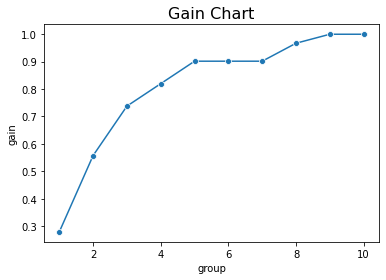

In [71]:
sns.lineplot(gain_df['group'], gain_df['gain'], marker='o')

plt.title('Gain Chart', fontsize=16)
plt.show()

In [72]:
lift_df = get_lift_table(lr_clf, x_test, y_test)
lift_df

group  num_of_response  num_of_data  response_rate      lift
0     1               17           18       0.944444  2.771403
1     2               17           18       0.944444  2.771403
2     3               11           18       0.611111  1.793260
3     4                5           18       0.277778  0.815118
4     5                5           18       0.277778  0.815118
5     6                0           17       0.000000  0.000000
6     7                0           18       0.000000  0.000000
7     8                4           18       0.222222  0.652095
8     9                2           18       0.111111  0.326047
9    10                0           18       0.000000  0.000000

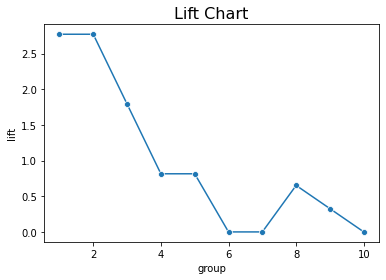

In [73]:
sns.lineplot(lift_df['group'], lift_df['lift'], marker='o')
plt.title('Lift Chart', fontsize=16)
plt.show()

### (2) Regression
- MAE(Mean Absolute Error): 에러 크기 그대로 반영. 이상치 영향 받음
- MSE(Mean Squared Error): 에러의 면적합. 이상치 영향 받음
- RMSE(Root Mean Squared Error)
- MSLE(Mean Squared Log Error)
- MAPE(Mean Absolute Percentage Error): 오차가 예측값에서 차지하는 정도
- R-square: 데이터에 대한 모델의 설명 정도. 높을 수록 좋음

In [74]:
def MAPE(y_test, y_pred):
    mape = np.mean(np.abs((y_test - y_pred)/y_test)) * 100
    return mape

In [75]:
### MAE
mean_absolute_error(y_test, pred)

0.1340782122905028

In [76]:
### MSE / RMSE
# squared option으로 조정
mean_squared_error(y_test, pred, squared=False) # RMSE

0.36616691861841205

In [77]:
### MAPE
MAPE(y_test, pred)

inf

In [78]:
### R-square
r2_score(y_test, pred)

0.40316754654070597

In [79]:
# mean_squared_log_error(y_test, pred)
# msle는 positive 변수일때만 사용 가능

## Baseline Model
- 학습되지 않은 기본 모델
- BaseEstimator

In [80]:
from sklearn.base import BaseEstimator

In [81]:
class MyDummyClassifier(BaseEstimator):
    # fit() 메소드는 아무것도 학습하지 않음. 
    def fit(self, X , y=None):
        pass
    
    # predict() 메소드는 단순히 Sex feature가 1 이면 0, 그렇지 않으면 1 로 예측함. 
    def predict(self, X):
        pred = np.zeros( (X.shape[0], 1 ))
        for i in range (X.shape[0]) :
            if X['Sex'].iloc[i] == 1:
                pred[i] = 0
            else :
                pred[i] = 1
        
        return pred

In [82]:
# Null 처리 함수
def fillna(df):
    df['Age'].fillna(df['Age'].mean(), inplace=True)
    df['Cabin'].fillna('N', inplace=True)
    df['Embarked'].fillna('N', inplace=True)
    df['Fare'].fillna(0, inplace=True)
    return df

# 머신러닝 알고리즘에 불필요한 피처 제거
def drop_features(df):
    df.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)
    
    return df

# 레이블 인코딩 수행.
def format_features(df):
    df['Cabin'] = df['Cabin'].str[:1]
    features = ['Cabin', 'Sex', 'Embarked']
    for feature in features:
        le = LabelEncoder()
        le = le.fit(df[feature])
        df[feature] = le.transform(df[feature])
        
    return df

# 앞에서 설정한 데이터 전처리 함수 호출
def transform_features(df):
    df = fillna(df)
    df = drop_features(df)
    df = format_features(df)
    
    return df

In [83]:
# 위에서 생성한 Dummy Classifier를 이용해 학습/예측/평가 수행.
myclf = MyDummyClassifier()
myclf.fit(x_train, y_train)

mypredictions = myclf.predict(x_test)
print('Dummy Classifier의 정확도는: {0:.4f}'.format(accuracy_score(y_test, mypredictions)))

Dummy Classifier의 정확도는: 0.8324


In [84]:
from sklearn.datasets import load_digits

In [85]:
class MyFakeClassifier(BaseEstimator):
    def fit(self, X, y):
        pass
    
    # 입력값으로 들어오는 X 데이터 셋의 크기만큼 모두 0값으로 만들어서 반환
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)

# 사이킷런의 내장 데이터 셋인 load_digits()를 이용하여 MNIST 데이터 로딩
digits = load_digits()

print(digits.data)
print("### digits.data.shape:", digits.data.shape)
print(digits.target)
print("### digits.target.shape:", digits.target.shape)

[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]
### digits.data.shape: (1797, 64)
[0 1 2 ... 8 9 8]
### digits.target.shape: (1797,)


In [86]:
digits.target==7

array([False, False, False, ..., False, False, False])

In [87]:
# digits번호가 7번이면 True이고 이를 astype(int)로 1로 변환, 7번이 아니면 False이고 0으로 변환. 
y = (digits.target == 7).astype(int)
x_train, x_test, y_train, y_test = train_test_split(digits.data, y, random_state=11)

In [88]:
# 불균형한 레이블 데이터 분포도 확인. 
print('레이블 테스트 세트 크기 :', y_test.shape)
print('테스트 세트 레이블 0 과 1의 분포도')
print(pd.Series(y_test).value_counts())

# Dummy Classifier로 학습/예측/정확도 평가
fakeclf = MyFakeClassifier()
fakeclf.fit(x_train , y_train)
fakepred = fakeclf.predict(x_test)
print('모든 예측을 0으로 하여도 정확도는:{:.3f}'.format(accuracy_score(y_test , fakepred)))

레이블 테스트 세트 크기 : (450,)
테스트 세트 레이블 0 과 1의 분포도
0    405
1     45
dtype: int64
모든 예측을 0으로 하여도 정확도는:0.900


In [89]:
# 앞절의 예측 결과인 fakepred와 실제 결과인 y_test의 Confusion Matrix출력
confusion_matrix(y_test , fakepred)

array([[405,   0],
       [ 45,   0]])

In [90]:
print("정밀도:", precision_score(y_test, fakepred))
print("재현율:", recall_score(y_test, fakepred))

정밀도: 0.0
재현율: 0.0


## ML Pipeline - Regression

In [91]:
housing = pd.read_csv('./handson-ml2/datasets/housing/housing.csv')
housing.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY

### Data split
- 소득 별로 분할하여 Stratified split
- x, y split

In [92]:
housing["income_cat"] = pd.cut(housing["median_income"], bins=[0., 1.5, 3.0, 4.5, 6, np.inf], labels=[1, 2, 3, 4, 5])
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train = housing.loc[train_index]
    strat_test = housing.loc[test_index]
    
for set_ in (strat_train, strat_test):
    set_.drop("income_cat", axis=1, inplace=True)

In [93]:
### split X, y
housing = strat_train.drop("median_house_value", axis=1)
housing_labels = strat_train["median_house_value"].copy()

### Pipeline class

In [94]:
num_attribs = list(housing.columns.difference(["ocean_proximity"]))
cat_attribs = ["ocean_proximity"]

num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    ('std_scaler', StandardScaler())
])

full_pipeline = ColumnTransformer([ # compose
    ("num", num_pipeline, num_attribs),
    ("cat", OneHotEncoder(), cat_attribs)
])

housing_prepared = full_pipeline.fit_transform(housing)

### Modeling

In [95]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR

from sklearn.ensemble import RandomForestRegressor

In [96]:
### Modeling
lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared, housing_labels)

DecisionTreeRegressor()

In [97]:
### validation
housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_mse # train set으로 검증하여 overfitting

0.0

In [98]:
### Random Forest
forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)
forest_reg.fit(housing_prepared, housing_labels)
housing_predictions = forest_reg.predict(housing_prepared)
forest_mse = mean_squared_error(housing_labels, housing_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

18354.32660078079

In [99]:
### SVRegressor
svm_reg = SVR(kernel="linear")
svm_reg.fit(housing_prepared, housing_labels)
housing_predictions = svm_reg.predict(housing_prepared)
svm_mse = mean_squared_error(housing_labels, housing_predictions)
svm_rmse = np.sqrt(svm_mse)
svm_rmse

111802.67909771342

In [100]:
### Pipeline with modeling
full_pipeline_with_predictor = Pipeline([
        ("preparation", full_pipeline),
        ("linear", LinearRegression())
    ])

full_pipeline_with_predictor.fit(housing, housing_labels)
full_pipeline_with_predictor.predict(housing)

array([ 88983.14806384, 305351.35385026, 153334.71183453, ...,
       221487.30785916, 241041.31494299, 100662.66960931])

In [101]:
import joblib

In [102]:
### model save
my_model = full_pipeline_with_predictor
# joblib.dump(my_model, "my_model.pkl")

In [103]:
# model load
# my_model_loaded = joblib.load("my_model.pkl")

### Cross validation

In [104]:
def display_scores(scores):
    print("점수:", scores)
    print("평균:", scores.mean())
    print("표준 편차:", scores.std())

In [105]:
score = cross_val_score(tree_reg, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10) 
tree_rmse_scores = np.sqrt(-score) # error의 경우 부호를 반대로 해야 함
display_scores(tree_rmse_scores)

점수: [70427.96437939 68225.44413138 63292.97108217 69915.46730116
 69244.01502742 68876.48221612 71613.81806703 70548.19078252
 66931.07797811 71072.68931854]
평균: 69014.81202838315
표준 편차: 2322.182237809405


In [106]:
lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

점수: [72229.03469752 65318.2240289  67706.39604745 69368.53738998
 66767.61061621 73003.75273869 70522.24414582 69440.77896541
 66930.32945876 70756.31946074]
평균: 69204.32275494763
표준 편차: 2372.0707910559167


In [107]:
forest_scores = cross_val_score(forest_reg, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

점수: [50923.53091459 48756.23719693 45969.28992846 50425.06420104
 47315.50397092 49565.99829302 51661.37721208 48765.83227917
 47441.5583286  53279.1051467 ]
평균: 49410.34974715087
표준 편차: 2105.389732909047


In [108]:
svr_scores = cross_val_score(svm_reg, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10)
svr_rmse_scores = np.sqrt(-svr_scores)
display_scores(svr_rmse_scores)

점수: [111059.94607445 113687.87132915 107597.3277054  114213.41574463
 108461.30158859 116616.25904798 113850.21483718 112395.74942581
 113807.23691329 112686.31474177]
평균: 112437.56374082548
표준 편차: 2593.2605559090666


### HPO

In [109]:
### Grid search
param_grid = [
    # 12(=3×4)개의 하이퍼파라미터 조합을 시도합니다.
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    # bootstrap은 False로 하고 6(=2×3)개의 조합을 시도합니다.
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

forest_reg = RandomForestRegressor(random_state=42)
# 다섯 개의 폴드로 훈련하면 총 (12+6)*5=90번의 훈련이 일어납니다.
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)
grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [110]:
grid_search.best_params_

{'max_features': 8, 'n_estimators': 30}

In [111]:
grid_search.best_estimator_

RandomForestRegressor(max_features=8, n_estimators=30, random_state=42)

그리드서치에서 테스트한 하이퍼파라미터 조합의 점수를 확인합니다:

In [112]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

63431.39640971009 {'max_features': 2, 'n_estimators': 3}
55231.0994452969 {'max_features': 2, 'n_estimators': 10}
52687.43729305644 {'max_features': 2, 'n_estimators': 30}
58658.96229064063 {'max_features': 4, 'n_estimators': 3}
52461.14854595965 {'max_features': 4, 'n_estimators': 10}
50585.732906463636 {'max_features': 4, 'n_estimators': 30}
59958.61890275374 {'max_features': 6, 'n_estimators': 3}
52472.19755628397 {'max_features': 6, 'n_estimators': 10}
50304.75311648137 {'max_features': 6, 'n_estimators': 30}
59310.283644281546 {'max_features': 8, 'n_estimators': 3}
52165.07685997051 {'max_features': 8, 'n_estimators': 10}
49950.90705039208 {'max_features': 8, 'n_estimators': 30}
60683.81325043492 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
53925.458082570185 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
59063.86438191684 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
53232.44592670202 {'bootstrap': False, 'max_features': 3, 'n_estimators': 

In [113]:
cvres

{'mean_fit_time': array([0.0662734 , 0.21269846, 0.61908712, 0.10097051, 0.33349724,
        0.9993681 , 0.14070702, 0.45940785, 1.36940846, 0.17747059,
        0.5877965 , 1.77123675, 0.09784722, 0.33367639, 0.12965927,
        0.42580924, 0.16083717, 0.53532195]),
 'std_fit_time': array([0.00204152, 0.00362938, 0.00620335, 0.0015109 , 0.00350685,
        0.00442571, 0.00252941, 0.00448295, 0.0073975 , 0.00256508,
        0.00369777, 0.02823015, 0.00191812, 0.0102395 , 0.00212818,
        0.00126057, 0.00177717, 0.00534917]),
 'mean_score_time': array([0.0048871 , 0.01113973, 0.03028069, 0.00383596, 0.01093411,
        0.03077536, 0.00388441, 0.01073527, 0.03088498, 0.00383558,
        0.01078038, 0.03061776, 0.00437317, 0.01233058, 0.00446968,
        0.01235719, 0.00423503, 0.01209955]),
 'std_score_time': array([1.41570865e-03, 3.67438493e-04, 8.47523645e-04, 2.56299835e-04,
        2.56347009e-04, 6.85972861e-04, 2.21316795e-04, 2.29824875e-04,
        8.86012033e-04, 7.29876494e-

In [114]:
from scipy.stats import randint
from scipy.stats import geom, expon

In [115]:
### Randomized search
param_distribs = {
        'n_estimators': randint(low=1, high=200),
        'max_features': randint(low=1, high=8),
    }

forest_reg = RandomForestRegressor(random_state=42)
rnd_search = RandomizedSearchCV(forest_reg, param_distributions=param_distribs,
                                n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42)
rnd_search.fit(housing_prepared, housing_labels)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   param_distributions={'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fe1909b2fd0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fe1909c5c40>},
                   random_state=42, scoring='neg_mean_squared_error')

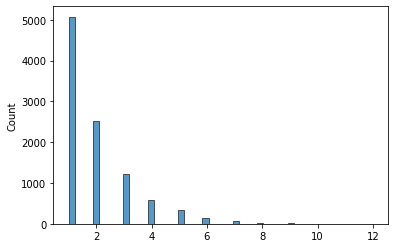

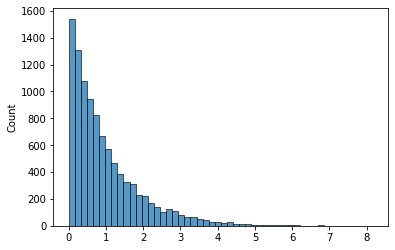

In [116]:
### geom, exponential parameters
geom_distrib=geom(0.5).rvs(10000, random_state=42)
expon_distrib=expon(scale=1).rvs(10000, random_state=42)

sns.histplot(geom_distrib, bins=50)
plt.show()
sns.histplot(expon_distrib, bins=50)
plt.show()

In [117]:
cvres = rnd_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

49144.641428187395 {'max_features': 7, 'n_estimators': 180}
51286.08249116196 {'max_features': 5, 'n_estimators': 15}
50749.58030665889 {'max_features': 3, 'n_estimators': 72}
50827.10531910473 {'max_features': 5, 'n_estimators': 21}
49252.98196637613 {'max_features': 7, 'n_estimators': 122}
50727.697083335304 {'max_features': 3, 'n_estimators': 75}
50633.571693907565 {'max_features': 3, 'n_estimators': 88}
49402.49449649643 {'max_features': 5, 'n_estimators': 100}
50375.764969385185 {'max_features': 3, 'n_estimators': 150}
64229.31653679898 {'max_features': 5, 'n_estimators': 2}


### Best model, Feature importance

In [118]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([2.58590709e-02, 4.90035162e-02, 1.01000774e-01, 1.13084315e-01,
       4.49914762e-01, 3.86382813e-02, 2.84663951e-02, 3.08007564e-02,
       1.16198673e-02, 1.40120455e-01, 7.24281863e-05, 2.18027514e-03,
       9.23910340e-03])

In [119]:
extra_attribs = ["rooms_per_hhold", "pop_per_hhold", "bedrooms_per_room"]

cat_encoder = full_pipeline.named_transformers_["cat"]
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attribs + extra_attribs + cat_one_hot_attribs
sorted(zip(feature_importances, attributes), reverse=True)

[(0.4499147620859369, 'median_income'),
 (0.1401204552927923, 'pop_per_hhold'),
 (0.11308431493871018, 'longitude'),
 (0.10100077376373191, 'latitude'),
 (0.04900351622597163, 'housing_median_age'),
 (0.038638281268360365, 'population'),
 (0.030800756442082574, 'total_rooms'),
 (0.028466395086199844, 'total_bedrooms'),
 (0.02585907088468502, 'households'),
 (0.011619867281741325, 'rooms_per_hhold'),
 (0.009239103399093158, 'INLAND'),
 (0.00218027514438822, '<1H OCEAN'),
 (7.242818630655396e-05, 'bedrooms_per_room')]

### Test model

In [120]:
### Test set 사용
final_model = grid_search.best_estimator_

x_test = strat_test.drop("median_house_value", axis=1)
y_test = strat_test["median_house_value"].copy()

x_test_prepared = full_pipeline.transform(x_test)
final_predictions = final_model.predict(x_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
final_rmse

47766.34153125065

In [121]:
from scipy import stats

In [122]:
# 95% CI for Test RMSE
confidence = 0.95
squared_errors = (final_predictions - y_test) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1,
                         loc=squared_errors.mean(),
                         scale=stats.sem(squared_errors)))

array([45847.46771481, 49611.05190076])

In [123]:
# z-score
mean = squared_errors.mean()

zscore = stats.norm.ppf((1 + confidence) / 2)
zmargin = zscore * squared_errors.std(ddof=1) / np.sqrt(len(squared_errors))
np.sqrt(mean - zmargin), np.sqrt(mean + zmargin)

(45848.04225163724, 49610.52094316534)

## ML Pipeline - Classification

In [124]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', version=1, as_frame=False)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [125]:
x, y = mnist["data"], mnist["target"]
print(x.shape, y.shape)

(70000, 784) (70000,)


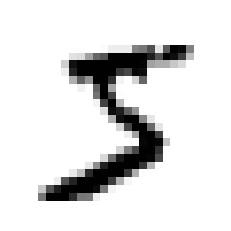

5


In [126]:
some_digit = x[0]
some_digit_image = some_digit.reshape(28, 28)

plt.imshow(some_digit_image, cmap=mpl.cm.binary)
plt.axis("off")
plt.show()

print(y[0])

In [127]:
# y type 변환
y = y.astype(np.uint8)
y

array([5, 0, 4, ..., 4, 5, 6], dtype=uint8)

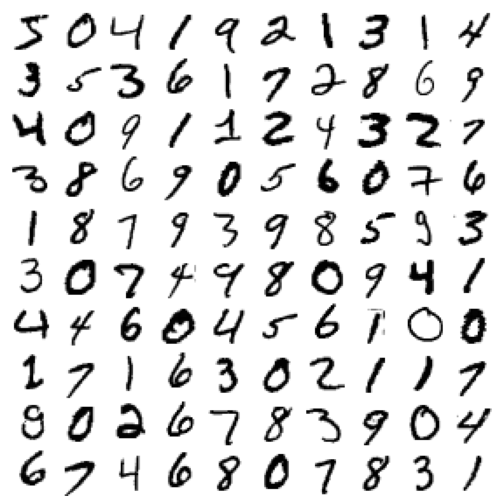

In [128]:
def plot_digit(data):
    image = data.reshape(28, 28)
    plt.imshow(image, cmap = mpl.cm.binary,
               interpolation="nearest")
    plt.axis("off")

# 숫자 그림을 위한 추가 함수
def plot_digits(instances, images_per_row=10, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    # n_rows = ceil(len(instances) / images_per_row) 와 동일합니다.
    n_rows = (len(instances) - 1) // images_per_row + 1

    # 필요하면 그리드 끝을 채우기 위해 빈 이미지를 추가합니다:
    n_empty = n_rows * images_per_row - len(instances)
    padded_instances = np.concatenate([instances, np.zeros((n_empty, size * size))], axis=0)

    # 배열의 크기를 바꾸어 28×28 이미지를 담은 그리드로 구성합니다:
    image_grid = padded_instances.reshape((n_rows, images_per_row, size, size))

    # 축 0(이미지 그리드의 수직축)과 2(이미지의 수직축)를 합치고 축 1과 3(두 수평축)을 합칩니다. 
    # 먼저 transpose()를 사용해 결합하려는 축을 옆으로 이동한 다음 합칩니다:
    big_image = image_grid.transpose(0, 2, 1, 3).reshape(n_rows * size,
                                                         images_per_row * size)
    # 하나의 큰 이미지를 얻었으므로 출력하면 됩니다:
    plt.imshow(big_image, cmap = mpl.cm.binary, **options)
    plt.axis("off")
    
plt.figure(figsize=(9,9))
example_images = x[:100]
plot_digits(example_images, images_per_row=10)
plt.show()

### Data split

In [129]:
x_train, x_test, y_train, y_test = x[:60000], x[60000:], y[:60000], y[60000:]

In [130]:
### Scaling
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train.astype(np.float64))

### Modeling - Binary

In [131]:
### Biranry case로 변경
y_train_5 = (y_train==5)
y_test_5 = (y_test==5)

In [132]:
from sklearn.linear_model import SGDClassifier

In [133]:
sgd_clf = SGDClassifier(max_iter=1000, tol=1e-3, random_state=42)
sgd_clf.fit(x_train_scaled, y_train_5)

SGDClassifier(random_state=42)

### Cross validation

In [134]:
cross_val_score(sgd_clf, x_train_scaled, y_train_5, cv=3, scoring="accuracy")

array([0.9713 , 0.9669 , 0.96785])

In [135]:
from sklearn.model_selection import StratifiedKFold

from sklearn.base import clone
from sklearn.base import BaseEstimator
from sklearn.dummy import DummyClassifier

In [136]:
skfolds = StratifiedKFold(n_splits=3, random_state=42, shuffle=True)
for train_index, test_index in skfolds.split(x_train_scaled, y_train_5):
    clone_clf = clone(sgd_clf)
    x_train_folds = x_train_scaled[train_index]
    y_train_folds = y_train_5[train_index]
    x_test_fold = x_train_scaled[test_index]
    y_test_fold = y_train_5[test_index]

    clone_clf.fit(x_train_folds, y_train_folds)
    y_pred = clone_clf.predict(x_test_fold)
    n_correct = sum(y_pred == y_test_fold)
    print(n_correct / len(y_pred))

0.96855
0.9686
0.9704


In [137]:
### Base model
class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)
    
never_5_clf = Never5Classifier()
cross_val_score(never_5_clf, x_train_scaled, y_train_5, cv=3, scoring="accuracy")

array([0.91125, 0.90855, 0.90915])

In [138]:
### Base model
dmy_clf = DummyClassifier(strategy='prior')
y_probas_dmy = cross_val_predict(dmy_clf, x_train_scaled, y_train_5, cv=3, method="predict_proba")
y_scores_dmy = y_probas_dmy[:, 1]

### Evaluation

In [139]:
y_train_pred = cross_val_predict(sgd_clf, x_train_scaled, y_train_5, cv=3)

In [140]:
confusion_matrix(y_train_5, y_train_pred)

array([[53931,   648],
       [ 1231,  4190]])

In [141]:
print("Precision:", precision_score(y_train_5, y_train_pred))
print("Recall:", recall_score(y_train_5, y_train_pred))
print("F1-score:", f1_score(y_train_5, y_train_pred))

Precision: 0.8660603555188094
Recall: 0.7729201254381111
F1-score: 0.8168437469538942


In [142]:
### score 추출
y_scores = cross_val_predict(sgd_clf, x_train_scaled, y_train_5, cv=3, method="decision_function")

In [143]:
precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

In [144]:
### Curve functions
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    sns.lineplot(thresholds, precisions[:-1], color='blue', label="Precision", linewidth=2)
    sns.lineplot(thresholds, recalls[:-1], color='green', label="Recall", linewidth=2)
    plt.legend(loc="center right", fontsize=16)
    plt.xlabel("Threshold", fontsize=16)
    plt.axis([-1000, 1000, 0, 1])   
    plt.grid(True) 

def plot_precision_vs_recall(precisions, recalls):
    sns.lineplot(recalls, precisions, color="blue", linewidth=2)
    plt.xlabel("Recall", fontsize=16)
    plt.ylabel("Precision", fontsize=16)
    plt.grid(True)
    
def custom_plot_roc_curve(fpr, tpr, label=None):
    sns.lineplot(fpr, tpr, linewidth=2, label=label)
    sns.lineplot([0, 1], [0, 1], color='black', linestyle='dashed') # 대각 점선
    plt.xlabel('False Positive Rate (Fall-Out)', fontsize=16)
    plt.ylabel('True Positive Rate (Recall)', fontsize=16)
    plt.grid(True)

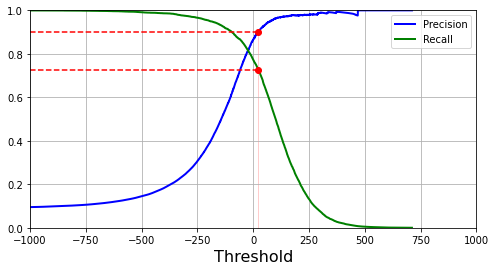

In [145]:
# 90% precision 목표
recall_90_precision = recalls[np.argmax(precisions >= 0.90)]
threshold_90_precision = thresholds[np.argmax(precisions >= 0.90)]

plt.figure(figsize=(8, 4))
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
sns.lineplot([threshold_90_precision, threshold_90_precision], [0., 0.9], color='red', linestyle='dashed')
sns.lineplot([-1000, threshold_90_precision], [0.9, 0.9], color='red', linestyle='dashed') 
sns.lineplot([-1000, threshold_90_precision], [recall_90_precision, recall_90_precision], color='red', linestyle='dashed')
sns.lineplot([threshold_90_precision], [0.9], color='red', linestyle='dashed')
plt.plot([threshold_90_precision], [0.9], "ro")
plt.plot([threshold_90_precision], [recall_90_precision], "ro")
plt.show()

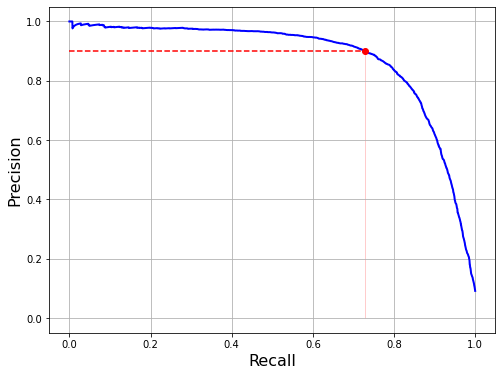

In [146]:
plt.figure(figsize=(8, 6))
plot_precision_vs_recall(precisions, recalls)
sns.lineplot([recall_90_precision, recall_90_precision], [0., 0.9], color='red', linestyle='dashed')
sns.lineplot([0.0, recall_90_precision], [0.9, 0.9], color='red', linestyle='dashed')
sns.lineplot([recall_90_precision], [0.9], color='red', linestyle='dashed')
plt.plot([recall_90_precision], [0.9], "ro")
plt.show()

In [147]:
threshold_90_precision = thresholds[np.argmax(precisions >= 0.90)]
threshold_90_precision

22.472524841848383

In [148]:
y_train_pred_90 = (y_scores >= threshold_90_precision)

print("Precision:", precision_score(y_train_5, y_train_pred_90))
print("Recall:", recall_score(y_train_5, y_train_pred_90))
print("F1-score:", f1_score(y_train_5, y_train_pred_90))

Precision: 0.9000456412596988
Recall: 0.7275410440878067
F1-score: 0.804651637253902


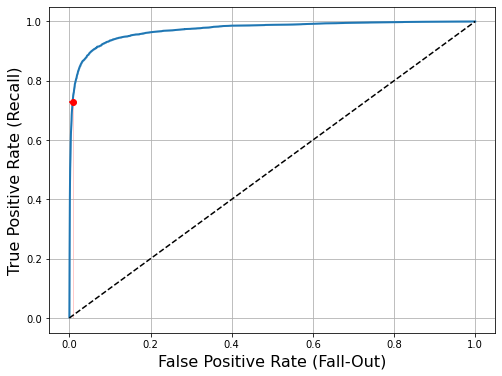

In [149]:
### ROC curve
fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

plt.figure(figsize=(8, 6)) 
custom_plot_roc_curve(fpr, tpr)
fpr_90 = fpr[np.argmax(tpr >= recall_90_precision)]

sns.lineplot([fpr_90, fpr_90], [0., recall_90_precision], color='red', linestyle='dashed')
sns.lineplot([0.0, fpr_90], [recall_90_precision, recall_90_precision], color='red', linestyle='dashed')
plt.plot([fpr_90], [recall_90_precision], "ro")  
plt.show()

In [150]:
roc_auc_score(y_train_5, y_scores)

0.9726681225154626

In [151]:
from sklearn.ensemble import RandomForestClassifier

In [152]:
### Add classifier
forest_clf = RandomForestClassifier(n_estimators=100, random_state=42)

In [153]:
y_train_pred_forest = cross_val_predict(forest_clf, x_train_scaled, y_train_5, cv=3)

print("Precision:", precision_score(y_train_5, y_train_pred_forest))
print("Recall:", recall_score(y_train_5, y_train_pred_forest))
print("F1-score:", f1_score(y_train_5, y_train_pred_forest))

Precision: 0.9905083315756169
Recall: 0.8662608374838591
F1-score: 0.9242275142688446


In [154]:
y_probas_forest = cross_val_predict(forest_clf, x_train_scaled, y_train_5, cv=3, method="predict_proba")

y_scores_forest = y_probas_forest[:, 1] # 점수 = 양성 클래스의 확률
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5, y_scores_forest)

In [155]:
roc_auc_score(y_train_5, y_scores_forest)

0.9983414120257013

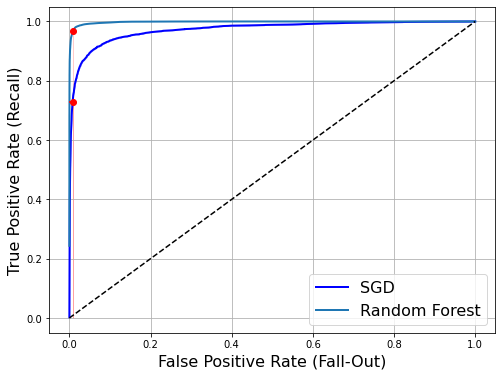

In [156]:
recall_for_forest = tpr_forest[np.argmax(fpr_forest >= fpr_90)]

plt.figure(figsize=(8, 6))
sns.lineplot(fpr, tpr, color='blue', linewidth=2, label="SGD")
custom_plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")

sns.lineplot([fpr_90, fpr_90], [0., recall_90_precision], color='red', linestyle='dashed')
sns.lineplot([0.0, fpr_90], [recall_90_precision, recall_90_precision], color='red', linestyle='dashed')
plt.plot([fpr_90], [recall_90_precision], "ro")
sns.lineplot([fpr_90, fpr_90], [0., recall_for_forest], color='red', linestyle='dashed')
plt.plot([fpr_90], [recall_for_forest], "ro")
plt.grid(True)
plt.legend(loc="lower right", fontsize=16)
plt.show()

### Modeling - Multiclass
- OvR (One-versus-the-rest): 분류 시 가장 높은 결정 점수를 클래스로 결정
- OvO (One-versus-one): 각 조합마다 이진 분류기 훈련
    - Logistic Regression, SVClassifier 등 이진 분류만 가능한 알고리즘
    - Train set의 크기에 영향을 많이 받는 알고리즘 (SVClassifier)

In [157]:
from sklearn.svm import SVC

In [158]:
svm_clf = SVC(gamma="auto", random_state=42)
svm_clf.fit(x_train_scaled[:1000], y_train[:1000])

SVC(gamma='auto', random_state=42)

In [159]:
svm_clf.classes_

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [160]:
from sklearn.multiclass import OneVsRestClassifier

In [161]:
### OvO 또는 OvR 강제
ovr_clf = OneVsRestClassifier(SVC(gamma="auto", random_state=42))
ovr_clf.fit(x_train[:1000], y_train[:1000])

OneVsRestClassifier(estimator=SVC(gamma='auto', random_state=42))

In [162]:
len(ovr_clf.estimators_)

10

### Classification errors

In [163]:
y_train_pred = cross_val_predict(sgd_clf, x_train_scaled, y_train, cv=3)
conf_mx = confusion_matrix(y_train, y_train_pred)
conf_mx

array([[5577,    0,   22,    5,    8,   43,   36,    6,  225,    1],
       [   0, 6400,   37,   24,    4,   44,    4,    7,  212,   10],
       [  27,   27, 5220,   92,   73,   27,   67,   36,  378,   11],
       [  22,   17,  117, 5227,    2,  203,   27,   40,  403,   73],
       [  12,   14,   41,    9, 5182,   12,   34,   27,  347,  164],
       [  27,   15,   30,  168,   53, 4444,   75,   14,  535,   60],
       [  30,   15,   42,    3,   44,   97, 5552,    3,  131,    1],
       [  21,   10,   51,   30,   49,   12,    3, 5684,  195,  210],
       [  17,   63,   48,   86,    3,  126,   25,   10, 5429,   44],
       [  25,   18,   30,   64,  118,   36,    1,  179,  371, 5107]])

In [164]:
def plot_confusion_matrix(matrix):
    """If you prefer color and a colorbar"""
    fig = plt.figure(figsize=(8,8))
    ax = fig.add_subplot(111)
    cax = ax.matshow(matrix)
    fig.colorbar(cax)

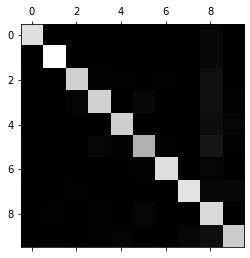

In [165]:
plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.show()

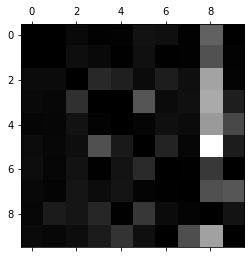

In [166]:
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums

np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plt.show()

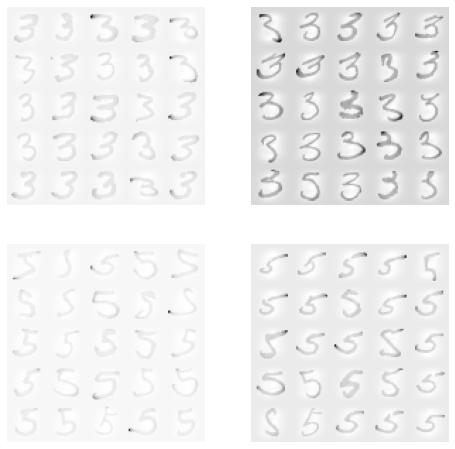

In [167]:
cl_a, cl_b = 3, 5
x_aa = x_train_scaled[(y_train == cl_a) & (y_train_pred == cl_a)]
x_ab = x_train_scaled[(y_train == cl_a) & (y_train_pred == cl_b)]
x_ba = x_train_scaled[(y_train == cl_b) & (y_train_pred == cl_a)]
x_bb = x_train_scaled[(y_train == cl_b) & (y_train_pred == cl_b)]

plt.figure(figsize=(8,8))
plt.subplot(221); plot_digits(x_aa[:25], images_per_row=5)
plt.subplot(222); plot_digits(x_ab[:25], images_per_row=5)
plt.subplot(223); plot_digits(x_ba[:25], images_per_row=5)
plt.subplot(224); plot_digits(x_bb[:25], images_per_row=5)
plt.show()

### Multi-label classification
- 하나의 케이스가 여러 label을 갖는 경우

In [168]:
from sklearn.neighbors import KNeighborsClassifier

In [169]:
# 두 가지 label 생성
y_train_large = (y_train >= 7)
y_train_odd = (y_train % 2 == 1)

y_multilabel = np.c_[y_train_large, y_train_odd]

In [170]:
knn_clf = KNeighborsClassifier()
knn_clf.fit(x_train, y_multilabel)

KNeighborsClassifier()

In [171]:
y_train_knn_pred = cross_val_predict(knn_clf, x_train, y_multilabel, cv=3)
f1_score(y_multilabel, y_train_knn_pred, average="macro") # 불균형 클래스의 경우, average="weighted"

0.976410265560605

### Multi-output classification
- Multi-label에서, label이 Multiclass의 성질을 갖는 것

In [172]:
noise = np.random.randint(0, 100, (len(x_train), 784))
x_train_mod = x_train + noise
noise = np.random.randint(0, 100, (len(x_test), 784))
x_test_mod = x_test + noise

y_train_mod = x_train
y_test_mod = x_test

In [173]:
knn_clf.fit(x_train_mod, y_train_mod)
clean_digit = knn_clf.predict([x_test_mod[2]])

## Linear Regression
- 입력 특성에 따른 선형함수를 만들어 예측
- Least Squares Method(STAT), Gradient Descent(ML)

In [11]:
data = pd.read_csv('./ADP_book_ver01/data/insurance.csv')

In [12]:
x = data['age']
y = data['charges']

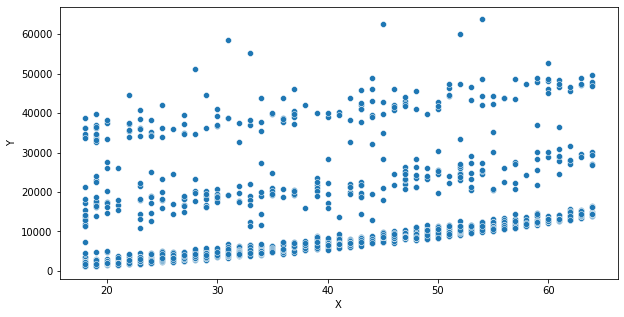

In [13]:
plt.figure(figsize=(10,5))
sns.scatterplot(x=x.ravel(), y=y.ravel())
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [14]:
x = np.array(data['age'])
y = np.array(data['charges'])

In [15]:
x = x.reshape(len(x), 1)
y = y.reshape(len(y), 1)

### (1) LinearRegressor

In [16]:
from sklearn.linear_model import LinearRegression

In [180]:
### Model fit
lr = LinearRegression()
lr.fit(x, y) # 2D array 필요

LinearRegression()

In [181]:
print('선형 회귀 모델 결과')
print('절편', lr.intercept_, '계수', lr.coef_)

선형 회귀 모델 결과
절편 [3165.88500606] 계수 [[257.72261867]]


In [182]:
print(lr.score(x, y))

0.08940589967885804


In [183]:
# predict new data
x_new = [[19],[64]]
y_pred = lr.predict(x_new)
print(y_pred)

[[ 8062.61476073]
 [19660.13260074]]


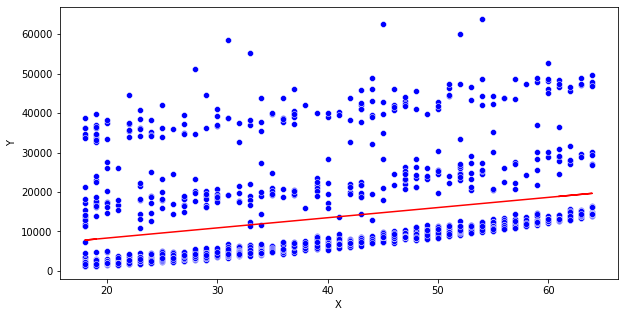

In [184]:
plt.figure(figsize=(10,5))

sns.scatterplot(x=x.ravel(), y=y.ravel(), color='blue')
plt.plot(x, lr.coef_*x + lr.intercept_, color='red')

plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [20]:
### Weighted Model
x_weight = x + 5
w_lr = LinearRegression()
w_lr.fit(x, y, sample_weight=x_weight.ravel()) # 2D array 필요

LinearRegression()

In [21]:
print('선형 회귀 모델 결과')
print('절편', w_lr.intercept_, '계수', w_lr.coef_)

선형 회귀 모델 결과
절편 [2776.05842125] 계수 [[266.6494531]]


In [185]:
### Result 파일 저장
# reg_result.to_csv('reg_result.csv', index=False, encoding='utf-8-sig')

### (2) SGDRegressor
- Gradient Descent

In [186]:
from sklearn.linear_model import SGDRegressor

In [187]:
x = np.array(data['age'])
y = np.array(data['charges'])

In [188]:
x = x.reshape(len(x), 1)
y = y.reshape(len(y), 1)

In [189]:
sgd_reg = SGDRegressor(max_iter=1000, random_state=34)
sgd_reg.fit(x, y.ravel()) 

SGDRegressor(random_state=34)

In [190]:
x

array([[19],
       [18],
       [28],
       ...,
       [18],
       [21],
       [61]])

In [191]:
print('SGD 회귀 모델 결과')
print('절편', sgd_reg.intercept_, '계수', sgd_reg.coef_)

SGD 회귀 모델 결과
절편 [6159.32587214] 계수 [89.07765947]


In [192]:
# predict new data
x_new = [[19],[64]]
y_pred = sgd_reg.predict(x_new)
print(y_pred)

[ 7851.801402   11860.29607798]


In [193]:
x.shape

(1338, 1)

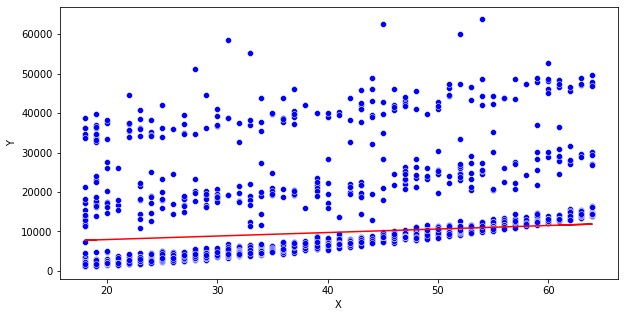

In [194]:
plt.figure(figsize=(10,5))

sns.scatterplot(x=x.ravel(), y=y.ravel(), color='blue')
plt.plot(x, sgd_reg.coef_*x + sgd_reg.intercept_, color='red')

plt.xlabel('X')
plt.ylabel('Y')
plt.show()

## Polynomial Regression
- Overfitting을 주의해야 함

### (1) Polynomial Function

In [195]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [196]:
# 다항식으로 변환한 단항식 생성, [[0,1],[2,3]]의 2X2 행렬 생성
x = np.arange(4).reshape(2,2)
print('일차 단항식 계수 feature:\n', x)

# degree = 2 인 2차 다항식으로 변환하기 위해 PolynomialFeatures를 이용하여 변환
poly = PolynomialFeatures(degree=2)
poly.fit(x)
poly_ftr = poly.transform(x)
print('변환된 2차 다항식 계수 feature:\n', poly_ftr)

일차 단항식 계수 feature:
 [[0 1]
 [2 3]]
변환된 2차 다항식 계수 feature:
 [[1. 0. 1. 0. 0. 1.]
 [1. 2. 3. 4. 6. 9.]]


In [197]:
def polynomial_func(X):
    y = 1 + 2*X[:,0] + 3*X[:,0]**2 + 4*X[:,1]**3
    print(X[:, 0])
    print(X[:, 1])
    return y

x = np.arange(0,4).reshape(2,2)

print('일차 단항식 계수 feature: \n', x)
y = polynomial_func(x)
print('삼차 다항식 결정값: \n', y)

일차 단항식 계수 feature: 
 [[0 1]
 [2 3]]
[0 2]
[1 3]
삼차 다항식 결정값: 
 [  5 125]


In [198]:
# 3 차 다항식 변환 
poly_ftr = PolynomialFeatures(degree=3).fit_transform(x)
print('3차 다항식 계수 feature: \n',poly_ftr)

# Linear Regression에 3차 다항식 계수 feature와 3차 다항식 결정값으로 학습 후 회귀 계수 확인
model = LinearRegression()
model.fit(poly_ftr, y)
print('Polynomial 회귀 계수\n' , np.round(model.coef_, 2))
print('Polynomial 회귀 Shape :', model.coef_.shape)

3차 다항식 계수 feature: 
 [[ 1.  0.  1.  0.  0.  1.  0.  0.  0.  1.]
 [ 1.  2.  3.  4.  6.  9.  8. 12. 18. 27.]]
Polynomial 회귀 계수
 [0.   0.18 0.18 0.36 0.54 0.72 0.72 1.08 1.62 2.34]
Polynomial 회귀 Shape : (10,)


In [199]:
def polynomial_func(X):
    y = 1 + 2*X[:,0] + 3*X[:,0]**2 + 4*X[:,1]**3 
    return y

# Pipeline 객체로 Streamline 하게 Polynomial Feature변환과 Linear Regression을 연결
model = Pipeline([('poly', PolynomialFeatures(degree=3)),
                  ('linear', LinearRegression())])

x = np.arange(4).reshape(2,2)
y = polynomial_func(x)

model = model.fit(x, y)
print('Polynomial 회귀 계수\n', np.round(model.named_steps['linear'].coef_, 2))

Polynomial 회귀 계수
 [0.   0.18 0.18 0.36 0.54 0.72 0.72 1.08 1.62 2.34]


### (1) Simple Polynomial Regression

In [200]:
# 임의의 값으로 구성된 X값에 대해 코사인 변환 값을 반환.
def true_fun(X):
    return np.cos(1.5 * np.pi * X)

# x는 0부터 1까지 30개의 임의의 값을 순서대로 샘플링한 데이터입니다.
np.random.seed(0)
n_samples = 30
x = np.sort(np.random.rand(n_samples))

# y 값은 코사인 기반의 true_fun()에서 약간의 노이즈 변동 값을 더한 값입니다.
y = true_fun(x) + np.random.randn(n_samples) * 0.1

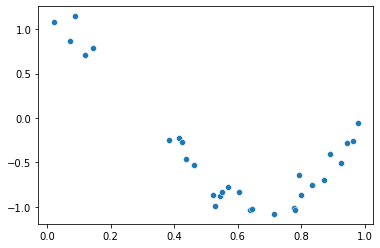

In [201]:
sns.scatterplot(x=x, y=y)
plt.show()


Degree 1 회귀 계수는 [-1.61] 입니다.
Degree 1 MSE 는 0.40772896250986845 입니다.

Degree 4 회귀 계수는 [  0.47 -17.79  23.59  -7.26] 입니다.
Degree 4 MSE 는 0.04320874987232062 입니다.

Degree 15 회귀 계수는 [-2.98291000e+03  1.03898770e+05 -1.87415056e+06  2.03715126e+07
 -1.44872551e+08  7.09311979e+08 -2.47064676e+09  6.24558367e+09
 -1.15676035e+10  1.56894317e+10 -1.54005437e+10  1.06456871e+10
 -4.91375763e+09  1.35919168e+09 -1.70380199e+08] 입니다.
Degree 15 MSE 는 180526263.01880735 입니다.


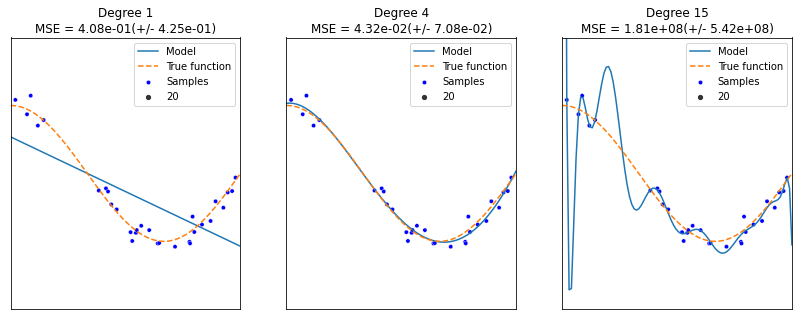

In [202]:
plt.figure(figsize=(14, 5))
degrees = [1, 4, 15]

# 다항 회귀의 차수(degree)를 1, 4, 15로 각각 변화시키면서 비교합니다.
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)
    plt.setp(ax, xticks=(), yticks=())
    
    # 개별 degree별로 Polynomial 변환합니다.
    polynomial_features = PolynomialFeatures(degree=degrees[i], include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", linear_regression)])
    pipeline.fit(x.reshape(-1, 1), y)
    
    # 교차 검증으로 다항 회귀를 평가합니다.
    scores = cross_val_score(pipeline, x.reshape(-1, 1), y, scoring="neg_mean_squared_error", cv=10)
    # Pipeline을 구성하는 세부 객체를 접근하는 named_steps['객체명']을 이용해 회귀계수 추출
    coefficients = pipeline.named_steps['linear_regression'].coef_
    print('\nDegree {0} 회귀 계수는 {1} 입니다.'.format(degrees[i], np.round(coefficients, 2)))
    print('Degree {0} MSE 는 {1} 입니다.'.format(degrees[i], -1*np.mean(scores)))
          
    # 0 부터 1까지 테스트 데이터 세트를 100개로 나눠 예측을 수행합니다.
    # 테스트 데이터 세트에 회귀 예측을 수행하고 예측 곡선과 실제 곡선을 그려서 비교합니다.
    x_test = np.linspace(0, 1, 100)
    # 예측값 곡선
    sns.lineplot(x_test, pipeline.predict(x_test[:, np.newaxis]), label="Model")
    # 실제 값 곡선
    sns.lineplot(x_test, true_fun(x_test), linestyle='dashed', label="True function")
    sns.scatterplot(x=x, y=y, color='blue', size=20, label="Samples")
    plt.xlabel("x"); plt.ylabel("y"); plt.xlim((0, 1)); plt.ylim((-2, 2)); plt.legend(loc="best")
    plt.title("Degree {}\nMSE = {:.2e}(+/- {:.2e})".format(degrees[i], -scores.mean(), scores.std()))
    
plt.show()

In [203]:
### cereal data
cereal = pd.read_csv('./ADP_book_ver01/data/cereal.csv')
cereal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      77 non-null     object 
 1   mfr       77 non-null     object 
 2   type      77 non-null     object 
 3   calories  77 non-null     int64  
 4   protein   77 non-null     int64  
 5   fat       77 non-null     int64  
 6   sodium    77 non-null     int64  
 7   fiber     77 non-null     float64
 8   carbo     77 non-null     float64
 9   sugars    77 non-null     int64  
 10  potass    77 non-null     int64  
 11  vitamins  77 non-null     int64  
 12  shelf     77 non-null     int64  
 13  weight    77 non-null     float64
 14  cups      77 non-null     float64
 15  rating    77 non-null     float64
dtypes: float64(5), int64(8), object(3)
memory usage: 9.8+ KB


In [204]:
cereal = cereal[cereal.columns[3:]]
cereal = cereal[cereal.sugars >= 0]
cereal.head()

calories  protein  fat  sodium  fiber  carbo  sugars  potass  vitamins  \
0        70        4    1     130   10.0    5.0       6     280        25   
1       120        3    5      15    2.0    8.0       8     135         0   
2        70        4    1     260    9.0    7.0       5     320        25   
3        50        4    0     140   14.0    8.0       0     330        25   
4       110        2    2     200    1.0   14.0       8      -1        25   

   shelf  weight  cups     rating  
0      3     1.0  0.33  68.402973  
1      3     1.0  1.00  33.983679  
2      3     1.0  0.33  59.425505  
3      3     1.0  0.50  93.704912  
4      3     1.0  0.75  34.384843

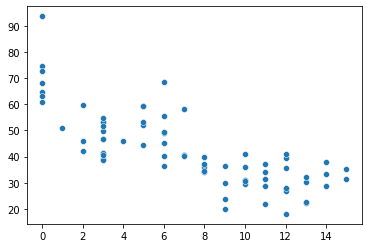

In [205]:
cereal2 = cereal[['sugars', 'rating']]
cereal2.sort_values(by=['sugars'], inplace =True)
cereal2.reset_index(drop=True, inplace =True)

x = cereal2['sugars'].values
y = cereal2['rating'].values

sns.scatterplot(x=x, y=y)
plt.show()

In [206]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

print(x_train.shape, x_test.shape)
print(y_train.shape, y_test.shape)

(53,) (23,)
(53,) (23,)


In [207]:
from sklearn.linear_model import LinearRegression

In [208]:
### Extract poly features
poly_reg = PolynomialFeatures(degree=2) # 2차
x_poly = poly_reg.fit_transform(x_train.reshape(-1, 1))

In [209]:
### Model fit
reg = LinearRegression()
reg.fit(x_poly, y_train)

LinearRegression()

In [210]:
### Predict
x_test_poly = poly_reg.transform(x_test.reshape(-1,1))
pred = reg.predict(x_test_poly)

In [211]:
np.set_printoptions(precision=2) # 소수점 둘째자리까지 표현
print(np.concatenate((pred.reshape(len(pred), 1), y_test.reshape(len(y_test), 1)), 1))

[[51.63 46.66]
 [32.1  28.74]
 [55.79 59.64]
 [31.08 37.84]
 [32.1  31.44]
 [44.46 44.33]
 [38.82 40.4 ]
 [41.45 55.33]
 [41.45 49.12]
 [31.38 27.75]
 [36.56 34.38]
 [34.7  29.92]
 [65.25 63.01]
 [33.21 31.07]
 [44.46 52.08]
 [38.82 40.45]
 [51.63 53.13]
 [36.56 33.98]
 [41.45 49.51]
 [31.04 22.74]
 [31.38 39.26]
 [31.5  31.23]
 [32.1  21.87]]


In [212]:
mse = mean_squared_error(y_test, pred)
mae = mean_absolute_error(y_test, pred)
rmse = np.sqrt(mse)
acc = reg.score(poly_reg.transform(x_test.reshape(-1, 1)), y_test)

print('MSE\t{}'.format(round(mse, 3)))
print('MAE\t{}'.format(round(mae, 3)))
print('RMSE\t{}'.format(round(rmse, 3)))
print('ACC\t{}%'.format(round(acc * 100, 3)))

MSE	33.565
MAE	4.606
RMSE	5.794
ACC	74.376%


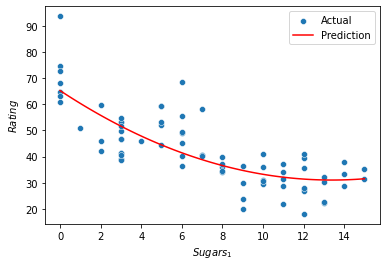

In [213]:
x_new = np.linspace(0, 15, 100).reshape(100, 1)
x_new_poly = poly_reg.transform(x_new)
y_new = reg.predict(x_new_poly)

sns.scatterplot(x=x, y=y, label='Actual')
plt.plot(x_new, y_new, 'r-', label ='Prediction')
plt.legend(loc='upper right')
plt.xlabel('$Sugars_1$')
plt.ylabel('$Rating$')
plt.show()

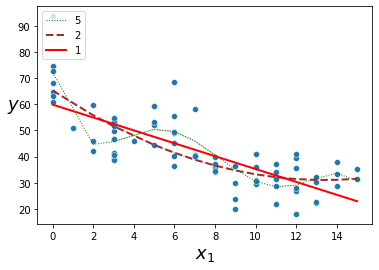

In [214]:
# Degree 별 그래프 변화
for color, style, width, degree in (("green", "dotted", 1, 5), ("brown", "dashed", 2, 2), ("red", "solid", 2, 1)):
    polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()
    polynomial_regression = Pipeline([
            ("poly_features", polybig_features),
            ("std_scaler", std_scaler),
            ("lin_reg", lin_reg),
        ])
    polynomial_regression.fit(x_train.reshape(-1, 1), y_train)
    y_newbig = polynomial_regression.predict(x_test.reshape(-1, 1))
    sns.lineplot(x=x_test, y=y_newbig, color=color, linestyle=style, label=str(degree), linewidth=width)

sns.scatterplot(x=x, y=y)
plt.legend(loc="upper left")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.show()

### (2) Multi-variable Polynomial Regression

In [215]:
x = cereal.iloc[:,:-1].values
y = cereal.iloc[:,-1].values

In [216]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(53, 12) (23, 12) (53,) (23,)


In [217]:
### Scaling
sc = StandardScaler()
x_train = sc.fit_transform(x_train) 
x_test = sc.transform(x_test)

In [218]:
poly_reg = PolynomialFeatures(degree=2)
x_poly = poly_reg.fit_transform(x_train)
reg = LinearRegression()
reg.fit(x_poly, y_train)

LinearRegression()

In [219]:
### Predict
x_test_poly = poly_reg.transform(x_test)
pred = reg.predict(x_test_poly)

In [220]:
mse = mean_squared_error(y_test, pred)
mae = mean_absolute_error(y_test, pred)
rmse = np.sqrt(mse)
acc = reg.score(poly_reg.transform(x_test), y_test)

print('MSE\t{}'.format(round(mse, 3)))
print('MAE\t{}'.format(round(mae, 3)))
print('RMSE\t{}'.format(round(rmse, 3)))
print('ACC\t{}%'.format(round(acc * 100, 3)))

MSE	9.81
MAE	2.193
RMSE	3.132
ACC	92.476%


## Multiple Regression
- 여러 개의 독립변수로 회귀분석
- Overfitting 방지를 위해, 다양한 규제 적용 필요
- 변수선택법은 주로 통계적 회귀분석에 적용됨

### (1) Ridge Regression
- L2 penalty 추가
- 계수 추정치가 0으로 수렴 (not 0)
- alpha: 0이면 규제 없음. 커질수록 강한 규제

In [221]:
from sklearn.datasets import load_diabetes

In [222]:
diabetes = load_diabetes()
x = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
y = diabetes.target

In [223]:
from sklearn.linear_model import Ridge

In [224]:
ridge_reg = Ridge(alpha=1, solver="cholesky", random_state=42) # 정규방정식
ridge_reg.fit(x, y)
ridge_reg.predict(x.iloc[1].values.reshape(1, -1))

array([91.])

In [225]:
sgd_reg = SGDRegressor(penalty="l2", max_iter=1000, tol=1e-3, random_state=42)  # 확률적 경사 하강법
sgd_reg.fit(x, y.ravel())
sgd_reg.predict(x.iloc[1].values.reshape(1, -1))

array([88.26])

In [226]:
alpha = np.logspace(-3, 1, 5)

data = list()
for i, a in enumerate(alpha):
    ridge = Ridge(alpha=a)
    ridge.fit(x, y)
    data.append(pd.Series(np.hstack([ridge.coef_])))

df_ridge = pd.DataFrame(data, index=alpha)
df_ridge.columns = x.columns
df_ridge

age         sex         bmi          bp          s1          s2  \
0.001   -9.551414 -239.090354  520.363367  323.828627 -712.328205  413.383794   
0.010   -7.199457 -234.552930  520.583136  320.523356 -380.607066  150.483752   
0.100    1.307349 -207.194814  489.691080  301.769437  -83.466074  -70.828096   
1.000   29.465746  -83.154885  306.351627  201.629434    5.909369  -29.515927   
10.000  19.812822   -0.918458   75.416167   55.025419   19.924600   13.948686   

                s3          s4          s5          s6  
0.001    65.811629  167.513774  720.944468   68.122100  
0.010   -78.591232  130.313059  592.349587   71.133768  
0.100  -188.680164  115.712703  443.814054   86.748539  
1.000  -152.040465  117.311715  262.944995  111.878718  
10.000  -47.553816   48.259420   70.144068   44.213876

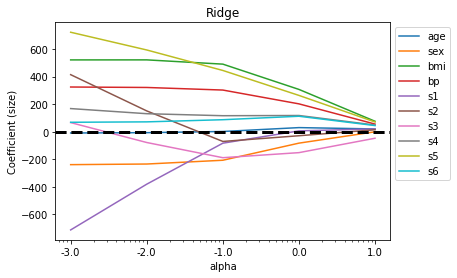

In [227]:
### Log graph
plt.semilogx(df_ridge) 
plt.xticks(alpha, labels=np.log10(alpha))
plt.legend(labels=df_ridge.columns, bbox_to_anchor=(1, 1))
plt.title('Ridge')
plt.xlabel('alpha')
plt.ylabel('Coefficient (size)')
plt.axhline(y=0, linestyle='--', color='black', linewidth=3)
plt.show()

In [228]:
from sklearn.linear_model import LinearRegression

In [229]:
lr = LinearRegression()
lr.fit(x, y)

LinearRegression()

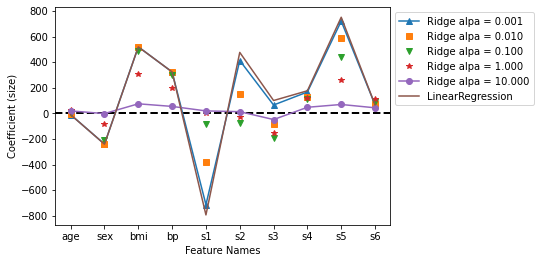

In [230]:
### 일반적인 Regression과 비교
plt.axhline(y=0, linestyle='--', color='black', linewidth=2)
plt.plot(df_ridge.loc[0.001], '^-', label='Ridge alpa = 0.001')
plt.plot(df_ridge.loc[0.010], 's', label='Ridge alpa = 0.010')
plt.plot(df_ridge.loc[0.100], 'v', label='Ridge alpa = 0.100')
plt.plot(df_ridge.loc[1.000], '*', label='Ridge alpa = 1.000')
plt.plot(df_ridge.loc[10.000], 'o-', label='Ridge alpa = 10.000')
plt.plot(lr.coef_, label='LinearRegression')

plt.xlabel('Feature Names')
plt.ylabel('Coefficient (size)')
plt.legend(bbox_to_anchor=(1,1))
plt.show()

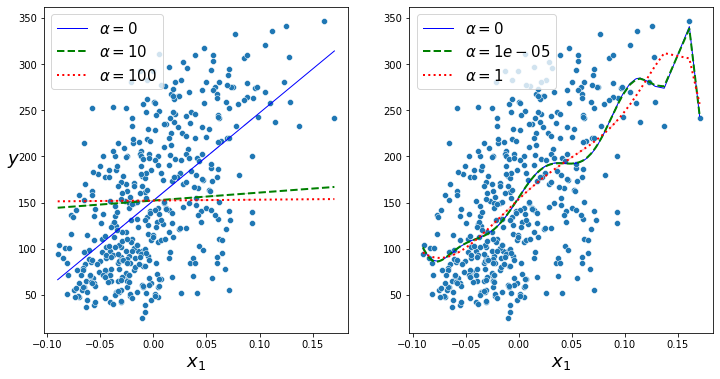

In [231]:
def plot_model(model_class, polynomial, alphas, **model_kargs):
    sns.scatterplot(x.loc[:, 'bmi'], y)
    for alpha, style in zip(alphas, (("blue", "solid"), ("green", "dashed"), ("red","dotted"))):
        model = model_class(alpha, **model_kargs) if alpha > 0 else LinearRegression()
        if polynomial:
            model = Pipeline([
                    ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
                    ("std_scaler", StandardScaler()),
                    ("regul_reg", model),
                ])
        model.fit(x.loc[:, 'bmi'].values.reshape(-1, 1), y)
        x_new = x.loc[:, 'bmi']
        y_new_regul = model.predict(x_new.values.reshape(-1, 1))
        lw = 2 if alpha > 0 else 1
        sns.lineplot(x_new, y_new_regul, color=style[0], linestyle=style[1], linewidth=lw, label=r"$\alpha = {}$".format(alpha))

    plt.legend(loc="upper left", fontsize=15)
    plt.xlabel("$x_1$", fontsize=18)

plt.figure(figsize=(12, 6))
plt.subplot(121)
plot_model(Ridge, polynomial=False, alphas=(0, 10, 100), random_state=42)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(122)
plot_model(Ridge, polynomial=True, alphas=(0, 10**-5, 1), random_state=42)
plt.show()

In [232]:
### Boston data
x = boston[['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']].values
y = boston['Price'].values

In [233]:
# alpha값에 따른 회귀 모델의 폴드 평균 RMSE를 출력하고 회귀 계수값들을 DataFrame으로 반환 
def get_linear_reg_eval(model_name, params=None, X_data_n=None, y_target_n=None, verbose=True, return_coeff=True):
    coeff_df = pd.DataFrame()
    if verbose : print('####### ', model_name , '#######')
    for param in params:
        if model_name =='Ridge': model = Ridge(alpha=param)
        elif model_name =='Lasso': model = Lasso(alpha=param)
        elif model_name =='ElasticNet': model = ElasticNet(alpha=param, l1_ratio=0.7)
        neg_mse_scores = cross_val_score(model, X_data_n, y_target_n, scoring="neg_mean_squared_error", cv=5)
        avg_rmse = np.mean(np.sqrt(-1 * neg_mse_scores))
        print('alpha {0}일 때 5 폴드 세트의 평균 RMSE: {1:.3f} '.format(param, avg_rmse))
        
        # cross_val_score는 evaluation metric만 반환하므로 모델을 다시 학습하여 회귀 계수 추출
        model.fit(X_data_n , y_target_n)
        if return_coeff:
            # alpha에 따른 피처별 회귀 계수를 Series로 변환하고 이를 DataFrame의 컬럼으로 추가. 
            coeff = pd.Series(data=model.coef_, index=features)
            colname='alpha:' + str(param)
            coeff_df[colname] = coeff
    
    return coeff_df

In [234]:
# alpha 파라미터의 값들을 정의하고 get_linear_reg_eval() 함수 호출
ridge_alphas = [0, 0.1, 1, 10, 100]
coeff_ridge_df = get_linear_reg_eval('Ridge', params=ridge_alphas, X_data_n=x, y_target_n=y)

#######  Ridge #######
alpha 0일 때 5 폴드 세트의 평균 RMSE: 5.773 
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 5.741 
alpha 1일 때 5 폴드 세트의 평균 RMSE: 5.645 
alpha 10일 때 5 폴드 세트의 평균 RMSE: 5.555 
alpha 100일 때 5 폴드 세트의 평균 RMSE: 5.347 


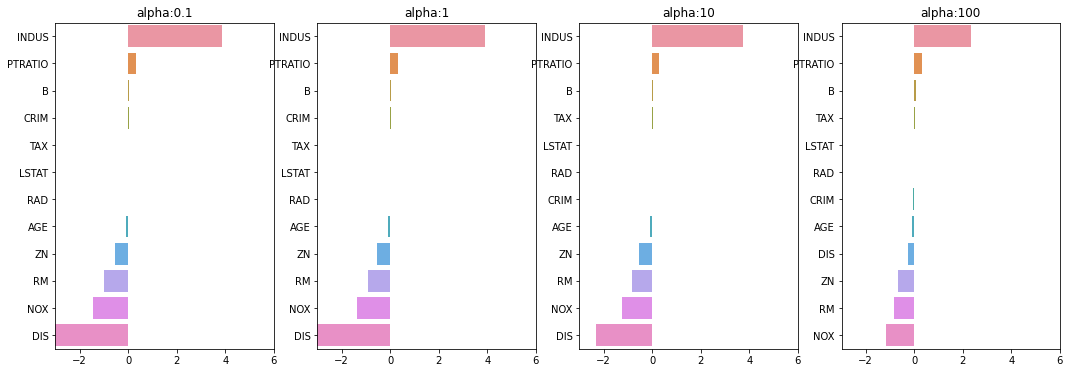

In [235]:
alphas = [0.1, 1, 10, 100]

# 각 alpha에 따른 회귀 계수 값을 시각화하기 위해 5개의 열로 된 맷플롯립 축 생성  
fig , axs = plt.subplots(figsize=(18,6) , nrows=1 , ncols=4)
# 각 alpha에 따른 회귀 계수 값을 데이터로 저장하기 위한 DataFrame 생성  
coeff_df = pd.DataFrame()

# alphas 리스트 값을 차례로 입력해 회귀 계수 값 시각화 및 데이터 저장. pos는 axis의 위치 지정
for pos, alpha in enumerate(alphas) :
    ridge = Ridge(alpha = alpha)
    ridge.fit(x, y)
    # alpha에 따른 피처별 회귀 계수를 Series로 변환하고 이를 DataFrame의 컬럼으로 추가.  
    coeff = pd.Series(data=ridge.coef_, index=features)
    colname='alpha:' + str(alpha)
    coeff_df[colname] = coeff
    # 막대 그래프로 각 alpha 값에서의 회귀 계수를 시각화. 회귀 계수값이 높은 순으로 표현
    coeff = coeff.sort_values(ascending=False)
    axs[pos].set_title(colname)
    axs[pos].set_xlim(-3, 6)
    sns.barplot(x=coeff.values, y=coeff.index, ax=axs[pos])

# for 문 바깥에서 맷플롯립의 show 호출 및 alpha에 따른 피처별 회귀 계수를 DataFrame으로 표시
plt.show()

In [236]:
# 반환된 coeff_ridge_df를 첫번째 컬럼순으로 내림차순 정렬하여 회귀계수 DataFrame출력
sort_column = 'alpha:'+str(ridge_alphas[0])
coeff_ridge_df.sort_values(by=sort_column, ascending=False)

alpha:0  alpha:0.1    alpha:1  alpha:10  alpha:100
INDUS     3.850492   3.858334   3.890827  3.727496   2.339810
PTRATIO   0.328311   0.325699   0.311668  0.296401   0.320815
B         0.047052   0.047197   0.048026  0.050017   0.054656
CRIM      0.040311   0.035732   0.010595 -0.027579  -0.047854
TAX       0.009741   0.009794   0.010074  0.010335   0.009486
LSTAT     0.002784   0.001832  -0.003288 -0.008940   0.001833
RAD      -0.013756  -0.013831  -0.014251 -0.015008  -0.016184
AGE      -0.113139  -0.112582  -0.109545 -0.105290  -0.103453
ZN       -0.534158  -0.535288  -0.542158 -0.566095  -0.663160
RM       -0.990958  -0.979006  -0.914063 -0.828463  -0.838930
NOX      -1.485374  -1.469729  -1.384179 -1.259663  -1.157028
DIS     -17.366999 -16.311641 -10.546404 -2.332452  -0.261259

In [237]:
### 변수변환 추가
# method는 표준 정규 분포 변환(Standard), 최대값/최소값 정규화(MinMax), 로그변환(Log) 결정
# p_degree는 다향식 특성을 추가할 때 적용. p_degree는 2이상 부여하지 않음. 
def get_scaled_data(method='None', p_degree=None, input_data=None):
    if method == 'Standard':
        scaled_data = StandardScaler().fit_transform(input_data)
    elif method == 'MinMax':
        scaled_data = MinMaxScaler().fit_transform(input_data)
    elif method == 'Log':
        scaled_data = np.log1p(input_data)
    else:
        scaled_data = input_data

    if p_degree != None:
        scaled_data = PolynomialFeatures(degree=p_degree, include_bias=False).fit_transform(scaled_data)
    
    return scaled_data

In [238]:
# Ridge의 alpha값을 다르게 적용하고 다양한 데이터 변환방법에 따른 RMSE 추출. 
# 변환 방법은 모두 6개, 원본 그대로, 표준정규분포, 표준정규분포+다항식 특성
# 최대/최소 정규화, 최대/최소 정규화+다항식 특성, 로그변환 
scale_methods=[(None, None), ('Standard', None), ('Standard', 2), 
               ('MinMax', None), ('MinMax', 2), ('Log', None)]

for scale_method in scale_methods:
    x_scaled = get_scaled_data(method=scale_method[0], p_degree=scale_method[1], 
                                    input_data=x)
    print(x_scaled.shape, x.shape)
    print('\n## 변환 유형:{0}, Polynomial Degree:{1}'.format(scale_method[0], scale_method[1]))
    get_linear_reg_eval('Ridge', params=alphas, X_data_n=x_scaled, y_target_n=y, verbose=False, return_coeff=False)

(506, 12) (506, 12)

## 변환 유형:None, Polynomial Degree:None
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 5.741 
alpha 1일 때 5 폴드 세트의 평균 RMSE: 5.645 
alpha 10일 때 5 폴드 세트의 평균 RMSE: 5.555 
alpha 100일 때 5 폴드 세트의 평균 RMSE: 5.347 
(506, 12) (506, 12)

## 변환 유형:Standard, Polynomial Degree:None
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 5.771 
alpha 1일 때 5 폴드 세트의 평균 RMSE: 5.751 
alpha 10일 때 5 폴드 세트의 평균 RMSE: 5.609 
alpha 100일 때 5 폴드 세트의 평균 RMSE: 5.466 
(506, 90) (506, 12)

## 변환 유형:Standard, Polynomial Degree:2
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 8.621 
alpha 1일 때 5 폴드 세트의 평균 RMSE: 6.673 
alpha 10일 때 5 폴드 세트의 평균 RMSE: 5.246 
alpha 100일 때 5 폴드 세트의 평균 RMSE: 4.661 
(506, 12) (506, 12)

## 변환 유형:MinMax, Polynomial Degree:None
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 5.712 
alpha 1일 때 5 폴드 세트의 평균 RMSE: 5.441 
alpha 10일 때 5 폴드 세트의 평균 RMSE: 5.830 
alpha 100일 때 5 폴드 세트의 평균 RMSE: 7.705 
(506, 90) (506, 12)

## 변환 유형:MinMax, Polynomial Degree:2
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 4.954 
alpha 1일 때 5 폴드 세트의 평균 RMSE: 4.264 
alpha 10일 때 5 폴드 세트의 평균 RMSE:

### (2) Lasso Regression
- L1 panelty 추가
- 변수 개수가 많은 경우, Ridge 해석의 어려움을 해결하기 위한 방법
- 덜 중요한 특징의 가중치를 없앰 (Sparse model)
- 특성 수(p)가 데이터 수(n)보다 많거나, 강하게 연관된 경우 추천하지 않음 (ElasticNet 권장)

In [239]:
x = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
y = diabetes.target

In [240]:
from sklearn.linear_model import Lasso

In [241]:
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(x, y)
lasso_reg.predict(x.iloc[1].values.reshape(1, -1))

array([73.84])

In [242]:
alpha = np.logspace(-3, 1, 5)

data = list()
for i, a in enumerate(alpha):
    lasso = Lasso(alpha=a)
    lasso.fit(x, y)
    data.append(pd.Series(np.hstack([lasso.coef_])))

df_lasso = pd.DataFrame(data, index=alpha)
df_lasso.columns=x.columns
df_lasso

age         sex         bmi          bp          s1          s2  \
0.001  -8.998449 -238.899740  520.261362  323.429484 -720.251734  421.405141   
0.010  -1.306575 -228.822331  525.560658  316.175320 -307.013677   89.321688   
0.100  -0.000000 -155.362882  517.182017  275.082351  -52.540269   -0.000000   
1.000   0.000000   -0.000000  367.701852    6.301904    0.000000    0.000000   
10.000  0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   

                s3          s4          s5         s6  
0.001    66.734168  164.448873  725.340440  67.475538  
0.010  -105.081398  119.597989  571.330871  65.007316  
0.100  -210.159753    0.000000  483.914409  33.672821  
1.000    -0.000000    0.000000  307.605700   0.000000  
10.000   -0.000000    0.000000    0.000000   0.000000

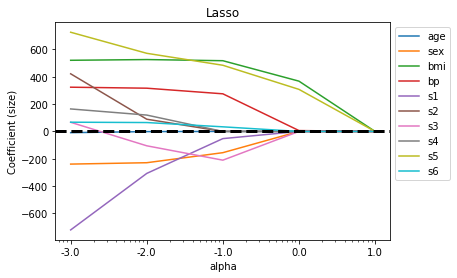

In [243]:
### Log graph
plt.semilogx(df_lasso)
plt.xticks(alpha, labels=np.log10(alpha))
plt.legend(labels=df_lasso.columns, bbox_to_anchor=(1, 1))
plt.title('Lasso')
plt.xlabel('alpha')
plt.ylabel('Coefficient (size)')
plt.axhline(y=0, linestyle='--', color='black', linewidth=3)
plt.show()

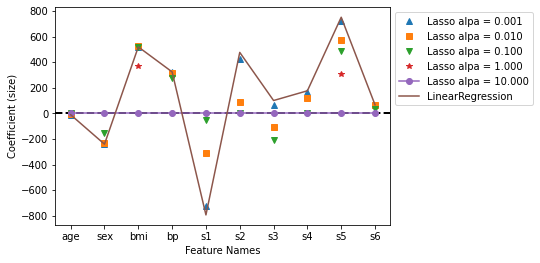

In [244]:
plt.axhline(y=0, linestyle='--', color='black', linewidth=2)
plt.plot(df_lasso.loc[0.001], '^', label='Lasso alpa = 0.001')
plt.plot(df_lasso.loc[0.010], 's', label='Lasso alpa = 0.010')
plt.plot(df_lasso.loc[0.100], 'v', label='Lasso alpa = 0.100')
plt.plot(df_lasso.loc[1.000], '*', label='Lasso alpa = 1.000')
plt.plot(df_lasso.loc[10.000], 'o-', label='Lasso alpa = 10.000')
plt.plot(lr.coef_,label='LinearRegression')

plt.xlabel('Feature Names')
plt.ylabel('Coefficient (size)')
plt.legend(bbox_to_anchor=(1,1))
plt.show()

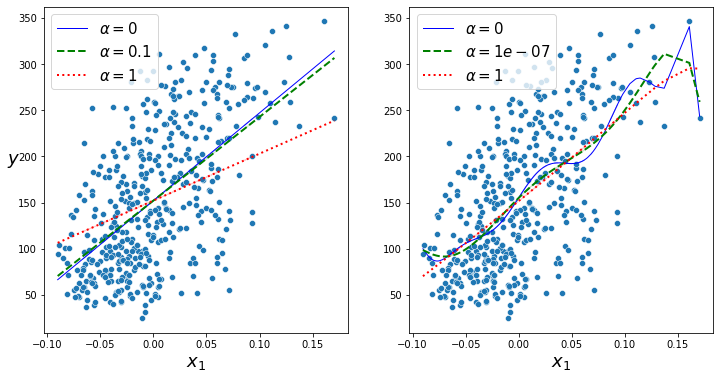

In [245]:
plt.figure(figsize=(12,6))
plt.subplot(121)
plot_model(Lasso, polynomial=False, alphas=(0, 0.1, 1), random_state=42)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(122)
plot_model(Lasso, polynomial=True, alphas=(0, 10**-7, 1), random_state=42)

plt.show()

In [246]:
### Boston data
x = boston[['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']].values
y = boston['Price'].values

In [247]:
# 라쏘에 사용될 alpha 파라미터의 값들을 정의하고 get_linear_reg_eval() 함수 호출
lasso_alphas = [0.07, 0.1, 0.5, 1, 3]
coeff_lasso_df =get_linear_reg_eval('Lasso', params=lasso_alphas, X_data_n=x, y_target_n=y)

#######  Lasso #######
alpha 0.07일 때 5 폴드 세트의 평균 RMSE: 5.631 
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 5.627 
alpha 0.5일 때 5 폴드 세트의 평균 RMSE: 5.669 
alpha 1일 때 5 폴드 세트의 평균 RMSE: 5.776 
alpha 3일 때 5 폴드 세트의 평균 RMSE: 6.189 


In [248]:
# 반환된 coeff_lasso_df를 첫번째 컬럼순으로 내림차순 정렬하여 회귀계수 DataFrame출력
sort_column = 'alpha:'+str(lasso_alphas[0])
coeff_lasso_df.sort_values(by=sort_column, ascending=False)

alpha:0.07  alpha:0.1  alpha:0.5   alpha:1   alpha:3
INDUS      3.809254   3.716204   2.498212  0.949811  0.000000
PTRATIO    0.283357   0.282979   0.277451  0.264206  0.061864
B          0.049369   0.049418   0.049544  0.049165  0.037231
TAX        0.010467   0.010395   0.009469  0.008247  0.006510
DIS       -0.000000  -0.000000  -0.000000 -0.000000  0.000000
LSTAT     -0.010392  -0.009162   0.003604  0.020910  0.042495
RAD       -0.015034  -0.015065  -0.015442 -0.015212 -0.008602
CRIM      -0.030656  -0.028984  -0.005253 -0.000000 -0.000000
AGE       -0.101042  -0.099791  -0.083289 -0.063437 -0.000000
ZN        -0.565260  -0.571985  -0.656290 -0.761115 -0.807679
RM        -0.787939  -0.785859  -0.758752 -0.722966 -0.265072
NOX       -1.184970  -1.166124  -0.936605 -0.668790 -0.000000

### (3) ElasticNet
- Ridge + Lasso
- r(l1_ratio)로 두 규제항의 비율 조정. 0이면 Ridge, 1이면 Lasso

In [249]:
from sklearn.linear_model import ElasticNet

In [250]:
x = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
y = diabetes.target

In [251]:
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5, random_state=42)
elastic_net.fit(x, y)
elastic_net.predict(x.iloc[1].values.reshape(1, -1))

array([141.86])

In [252]:
alpha = np.logspace(-3, 1, 5)

data = list()
for i, a in enumerate(alpha):
    ela = ElasticNet(alpha=a, l1_ratio=0.5)
    ela.fit(x, y)
    data.append(pd.Series(np.hstack([ela.coef_])))

df_ela = pd.DataFrame(data, index=alpha)
df_ela.columns=x.columns
df_ela

age         sex         bmi          bp         s1         s2  \
0.001    8.705295 -178.076275  450.881224  281.072686 -44.049984 -77.944846   
0.010   33.147202  -35.245609  211.023930  144.560115  21.931533   0.000000   
0.100   10.286327    0.285976   37.464643   27.544899  11.108850   8.355884   
1.000    0.359018    0.000000    3.259767    2.204356   0.528646   0.250935   
10.000   0.000000    0.000000    0.000000    0.000000   0.000000   0.000000   

                s3          s4          s5         s6  
0.001  -188.958313  119.794742  393.703478  98.943695  
0.010  -115.620017  100.658838  185.326334  96.257214  
0.100   -24.120808   25.505488   35.465757  22.894981  
1.000    -1.861363    2.114454    3.105841   1.769851  
10.000   -0.000000    0.000000    0.000000   0.000000

In [253]:
np.hstack([ela.coef_]).shape

(10,)

In [254]:
ela.coef_.shape

(10,)

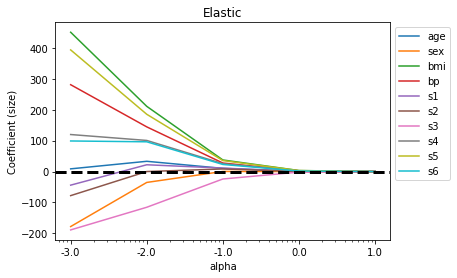

In [255]:
plt.semilogx(df_ela)
plt.xticks(alpha, labels=np.log10(alpha))
plt.legend(labels=df_ela.columns, bbox_to_anchor=(1, 1))
plt.title('Elastic')
plt.xlabel('alpha')
plt.ylabel('Coefficient (size)')
plt.axhline(y=0, linestyle='--', color='black', linewidth=3)
plt.show()

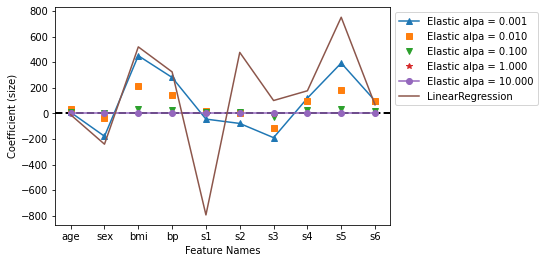

In [256]:
plt.axhline(y=0, linestyle='--', color='black', linewidth=2)
plt.plot(df_ela.loc[0.001], '^-', label='Elastic alpa = 0.001')
plt.plot(df_ela.loc[0.010], 's', label='Elastic alpa = 0.010')
plt.plot(df_ela.loc[0.100], 'v', label='Elastic alpa = 0.100')
plt.plot(df_ela.loc[1.000], '*', label='Elastic alpa = 1.000')
plt.plot(df_ela.loc[10.000], 'o-', label='Elastic alpa = 10.000')
plt.plot(lr.coef_,label='LinearRegression')

plt.xlabel('Feature Names')
plt.ylabel('Coefficient (size)')
plt.legend(bbox_to_anchor=(1,1))
plt.show()

In [257]:
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5, random_state=42)
elastic_net.fit(x, y)
elastic_net.predict(x.iloc[1].values.reshape(1, -1))

array([141.86])

In [258]:
### Boston data
x = boston[['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']].values
y = boston['Price'].values

In [259]:
# 엘라스틱넷에 사용될 alpha 파라미터의 값들을 정의하고 get_linear_reg_eval() 함수 호출
# l1_ratio는 0.7로 고정
elastic_alphas = [0.07, 0.1, 0.5, 1, 3]
coeff_elastic_df = get_linear_reg_eval('ElasticNet', params=elastic_alphas, X_data_n=x, y_target_n=y)

#######  ElasticNet #######
alpha 0.07일 때 5 폴드 세트의 평균 RMSE: 5.567 
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 5.544 
alpha 0.5일 때 5 폴드 세트의 평균 RMSE: 5.467 
alpha 1일 때 5 폴드 세트의 평균 RMSE: 5.597 
alpha 3일 때 5 폴드 세트의 평균 RMSE: 6.068 


In [260]:
# 반환된 coeff_elastic_df를 첫번째 컬럼순으로 내림차순 정렬하여 회귀계수 DataFrame출력
sort_column = 'alpha:'+str(elastic_alphas[0])
coeff_elastic_df.sort_values(by=sort_column, ascending=False)

alpha:0.07  alpha:0.1  alpha:0.5   alpha:1   alpha:3
INDUS      3.591279   3.426235   1.918418  0.938789  0.000000
PTRATIO    0.290334   0.291917   0.300761  0.289299  0.146846
B          0.050405   0.050836   0.052878  0.052136  0.038268
TAX        0.010325   0.010215   0.009114  0.008320  0.007020
LSTAT     -0.008909  -0.007367   0.007760  0.020348  0.043446
RAD       -0.015214  -0.015321  -0.016046 -0.016218 -0.011417
CRIM      -0.034366  -0.034926  -0.023252 -0.000000 -0.000000
AGE       -0.102095  -0.101155  -0.089070 -0.073577 -0.019058
DIS       -0.149727  -0.000000  -0.000000 -0.000000 -0.000000
ZN        -0.579412  -0.591089  -0.693861 -0.760457 -0.800368
RM        -0.800311  -0.800232  -0.790970 -0.738672 -0.423065
NOX       -1.196861  -1.179384  -0.975902 -0.725174 -0.031208

### (4) Early Stopping

In [261]:
np.random.seed(42)
m = 100
x = 6 * np.random.rand(m, 1) - 3
y = 2 + x + 0.5 * x**2 + np.random.randn(m, 1)

x_train, x_val, y_train, y_val = train_test_split(x[:50], y[:50].ravel(), test_size=0.5, random_state=10)

In [262]:
from copy import deepcopy

In [263]:
poly_scaler = Pipeline([
        ("poly_features", PolynomialFeatures(degree=90, include_bias=False)),
        ("std_scaler", StandardScaler())
    ])

x_train_poly_scaled = poly_scaler.fit_transform(x_train)
x_val_poly_scaled = poly_scaler.transform(x_val)

sgd_reg = SGDRegressor(max_iter=1, tol=-np.infty, warm_start=True,
                       penalty=None, learning_rate="constant", eta0=0.0005, random_state=42)

minimum_val_error = float("inf")
best_epoch = None
best_model = None
for epoch in range(1000):
    sgd_reg.fit(x_train_poly_scaled, y_train)  # 중지된 곳에서 다시 시작합니다
    y_val_predict = sgd_reg.predict(x_val_poly_scaled)
    val_error = mean_squared_error(y_val, y_val_predict)
    if val_error < minimum_val_error:
        minimum_val_error = val_error
        best_epoch = epoch
        best_model = deepcopy(sgd_reg)

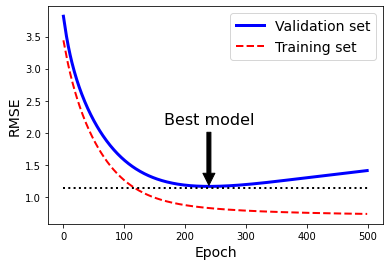

In [264]:
### Graph
sgd_reg = SGDRegressor(max_iter=1, tol=-np.infty, warm_start=True,
                       penalty=None, learning_rate="constant", eta0=0.0005, random_state=42)

n_epochs = 500
train_errors, val_errors = [], []
for epoch in range(n_epochs):
    sgd_reg.fit(x_train_poly_scaled, y_train)
    y_train_predict = sgd_reg.predict(x_train_poly_scaled)
    y_val_predict = sgd_reg.predict(x_val_poly_scaled)
    train_errors.append(mean_squared_error(y_train, y_train_predict))
    val_errors.append(mean_squared_error(y_val, y_val_predict))

best_epoch = np.argmin(val_errors)
best_val_rmse = np.sqrt(val_errors[best_epoch])
best_val_rmse -= 0.03  # just to make the graph look better

sns.lineplot(x=range(n_epochs), y=np.sqrt(val_errors), color="blue", linewidth=3, label="Validation set")
sns.lineplot(x=range(n_epochs), y=np.sqrt(train_errors), color="red", linestyle="dashed", linewidth=2, label="Training set")
sns.lineplot([0, n_epochs], [best_val_rmse, best_val_rmse], color="black", linestyle="dotted", linewidth=2)
plt.legend(loc="upper right", fontsize=14)
plt.xlabel("Epoch", fontsize=14)
plt.ylabel("RMSE", fontsize=14)

plt.annotate('Best model',
             xy=(best_epoch, best_val_rmse),
             xytext=(best_epoch, best_val_rmse + 1),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.05),
             fontsize=16,
            )

plt.show()

In [265]:
best_epoch, best_model

(239,
 SGDRegressor(eta0=0.0005, learning_rate='constant', max_iter=1, penalty=None,
              random_state=42, tol=-inf, warm_start=True))

## Logistic Regression
- 반응변수(Y)가 특정 Class에 속할 확률 모델링 (Logit 함수를 선형 모델링)
- Logit: Log Odds = log(p/1-p)
    - Odds는 실패 대비 성공할 확률 (p/1-p)
    - X가 Unit 증가하면, Odds * exp(계수) 만큼의 Y=1 확률 증가
- Sigmoid(Logistic) Function
- MLE 기법을 사용하여 계수 추정
- 선형 회귀 모델을 기반으로 하기 때문에 결정 경계는 선형이며, Penalty도 줄 수 있음(default=L2, C=1.0)
- C는 alpha의 역수로, C가 높을수록 규제가 줄어듦

### (1) Binary

In [266]:
body = pd.read_csv('./ADP_book_ver01/data/bodyPerformance.csv')
body

age gender  height_cm  weight_kg  body fat_%  diastolic  systolic  \
0      27.0      M      172.3      75.24        21.3       80.0     130.0   
1      25.0      M      165.0      55.80        15.7       77.0     126.0   
2      31.0      M      179.6      78.00        20.1       92.0     152.0   
3      32.0      M      174.5      71.10        18.4       76.0     147.0   
4      28.0      M      173.8      67.70        17.1       70.0     127.0   
...     ...    ...        ...        ...         ...        ...       ...   
13388  25.0      M      172.1      71.80        16.2       74.0     141.0   
13389  21.0      M      179.7      63.90        12.1       74.0     128.0   
13390  39.0      M      177.2      80.50        20.1       78.0     132.0   
13391  64.0      F      146.1      57.70        40.4       68.0     121.0   
13392  34.0      M      164.0      66.10        19.5       82.0     150.0   

       gripForce  sit and bend forward_cm  sit-ups counts  broad jump_cm class  
0           54.9                     18.4            60.0          217.0     C  
1           36.4                     16.3            53.0          229.0     A  
2           44.8                     12.0            49.0          181.0     C  
3           41.4                     15.2            53.0          219.0     B  
4           43.5                     27.1            45.0          217.0     B  
...          ...                      ...             ...            ...   ...  
13388       35.8                     17.4            47.0          198.0     C  
13389       33.0                      1.1            48.0          167.0     D  
13390       63.5                     16.4            45.0          229.0     A  
13391       19.3                      9.2             0.0           75.0     D  
13392       35.9                      7.1            51.0          180.0     C  

[13393 rows x 12 columns]

In [267]:
body['gender'] = np.where(body['gender']=='M', 0, 1) # gender encoding
body['class_1'] = np.where(body['class']=='A', 1, 0) # Binary class로 변경
body

age  gender  height_cm  weight_kg  body fat_%  diastolic  systolic  \
0      27.0       0      172.3      75.24        21.3       80.0     130.0   
1      25.0       0      165.0      55.80        15.7       77.0     126.0   
2      31.0       0      179.6      78.00        20.1       92.0     152.0   
3      32.0       0      174.5      71.10        18.4       76.0     147.0   
4      28.0       0      173.8      67.70        17.1       70.0     127.0   
...     ...     ...        ...        ...         ...        ...       ...   
13388  25.0       0      172.1      71.80        16.2       74.0     141.0   
13389  21.0       0      179.7      63.90        12.1       74.0     128.0   
13390  39.0       0      177.2      80.50        20.1       78.0     132.0   
13391  64.0       1      146.1      57.70        40.4       68.0     121.0   
13392  34.0       0      164.0      66.10        19.5       82.0     150.0   

       gripForce  sit and bend forward_cm  sit-ups counts  broad jump_cm  \
0           54.9                     18.4            60.0          217.0   
1           36.4                     16.3            53.0          229.0   
2           44.8                     12.0            49.0          181.0   
3           41.4                     15.2            53.0          219.0   
4           43.5                     27.1            45.0          217.0   
...          ...                      ...             ...            ...   
13388       35.8                     17.4            47.0          198.0   
13389       33.0                      1.1            48.0          167.0   
13390       63.5                     16.4            45.0          229.0   
13391       19.3                      9.2             0.0           75.0   
13392       35.9                      7.1            51.0          180.0   

      class  class_1  
0         C        0  
1         A        1  
2         C        0  
3         B        0  
4         B        0  
...     ...      ...  
13388     C        0  
13389     D        0  
13390     A        1  
13391     D        0  
13392     C        0  

[13393 rows x 13 columns]

In [268]:
feature_columns = list(body.columns.difference(['class', 'class_1'])) 
x = body[feature_columns]
y = body['class_1']

In [269]:
train_x, test_x, train_y, test_y = train_test_split(x, y, stratify=y, train_size=0.7, random_state=1)
print(train_x.shape, test_x.shape, train_y.shape, test_y.shape)

(9375, 11) (4018, 11) (9375,) (4018,)


In [270]:
from sklearn.linear_model import LogisticRegression

In [271]:
### Modeling
logistic=LogisticRegression()
logistic.fit(train_x, train_y)

LogisticRegression()

In [272]:
proba = pd.DataFrame(logistic.predict_proba(train_x))
cs = logistic.decision_function(train_x) # Decision function: confidence score. x=0 인 hyperplane을 기준으로 양/음수 여부와 얼만큼 멀리 떨어져있는가 측정

df = pd.concat([proba, pd.DataFrame(cs)], axis=1)
df.columns=['Not A', 'A', 'decision_function']

df.sort_values(['decision_function'], inplace=True)
df.reset_index(inplace=True, drop=True)
df

Not A             A  decision_function
0     1.000000  1.879379e-08         -17.789740
1     1.000000  7.502933e-08         -16.405387
2     1.000000  7.505109e-08         -16.405097
3     1.000000  9.650251e-08         -16.153697
4     1.000000  1.150121e-07         -15.978228
...        ...           ...                ...
9370  0.001643  9.983575e-01           6.409883
9371  0.001588  9.984124e-01           6.443922
9372  0.001553  9.984472e-01           6.466168
9373  0.000606  9.993939e-01           7.407820
9374  0.000000  1.000000e+00          46.511561

[9375 rows x 3 columns]

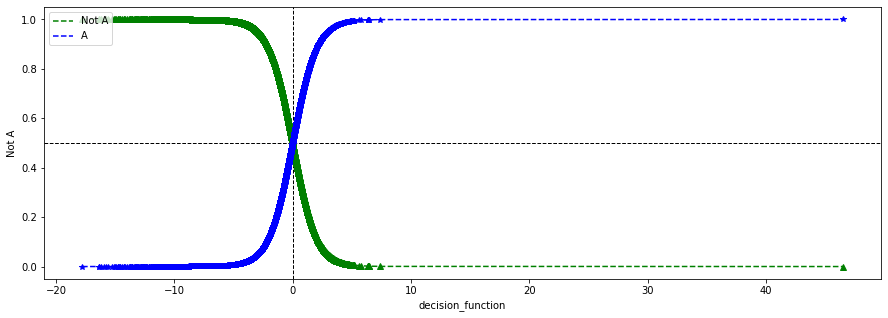

In [273]:
plt.figure(figsize=(15,5))

plt.axhline(y=0.5, linestyle='--', color='black', linewidth=1)
plt.axvline(x=0, linestyle='--', color='black', linewidth=1)

sns.lineplot(df['decision_function'], df['Not A'], color='green', linestyle='dashed', label='Not A')
plt.plot(df['decision_function'], df['Not A'], 'g^')
sns.lineplot(df['decision_function'], df['A'], color='blue', linestyle='dashed', label='A')
plt.plot(df['decision_function'], df['A'], 'b*')

plt.xlabel
plt.ylabel
plt.legend(loc='upper left')

plt.show()

In [274]:
pred = logistic.predict(test_x)

test_cm = confusion_matrix(test_y, pred)
test_acc = accuracy_score(test_y, pred)
test_prc = precision_score(test_y, pred)
test_rcll = recall_score(test_y, pred)
test_f1 = f1_score(test_y, pred)

print(test_cm)
print('\n')
print('정확도\t{}%'.format(round(test_acc*100,2)))
print('정밀도\t{}%'.format(round(test_prc*100,2)))
print('재현율\t{}%'.format(round(test_rcll*100,2)))
print('F1\t{}%'.format(round(test_f1*100,2)))

[[2766  248]
 [ 346  658]]


정확도	85.22%
정밀도	72.63%
재현율	65.54%
F1	68.9%


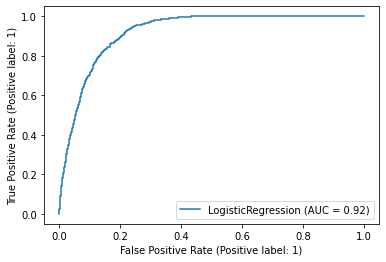

In [275]:
plot_roc_curve(logistic, test_x, test_y)
plt.show()

In [276]:
logistic.predict_proba(test_x)

array([[0.52, 0.48],
       [0.09, 0.91],
       [0.19, 0.81],
       ...,
       [1.  , 0.  ],
       [0.62, 0.38],
       [0.72, 0.28]])

In [277]:
test_y.shape

(4018,)

In [278]:
gain_df = get_gain_table(logistic, test_x, test_y)
gain_df

group  num_of_response  num_of_data  individual_gain      gain
0     1              324          402         0.322709  0.322709
1     2              270          402         0.268924  0.591633
2     3              210          402         0.209163  0.800797
3     4              128          401         0.127490  0.928287
4     5               56          402         0.055777  0.984064
5     6               15          402         0.014940  0.999004
6     7                1          401         0.000996  1.000000
7     8                0          402         0.000000  1.000000
8     9                0          402         0.000000  1.000000
9    10                0          402         0.000000  1.000000

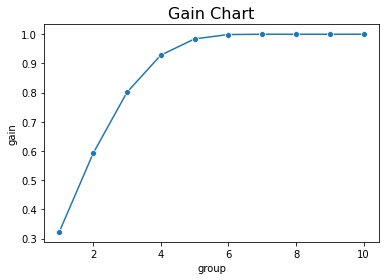

In [279]:
sns.lineplot(gain_df['group'], gain_df['gain'], marker='o')

plt.title('Gain Chart', fontsize=16)
plt.show()

In [280]:
lift_df = get_lift_table(logistic, test_x, test_y)
lift_df

group  num_of_response  num_of_data  response_rate      lift
0     1              324          402       0.805970  3.225486
1     2              270          402       0.671642  2.687905
2     3              210          402       0.522388  2.090593
3     4              128          401       0.319202  1.277444
4     5               56          402       0.139303  0.557491
5     6               15          402       0.037313  0.149328
6     7                1          401       0.002494  0.009980
7     8                0          402       0.000000  0.000000
8     9                0          402       0.000000  0.000000
9    10                0          402       0.000000  0.000000

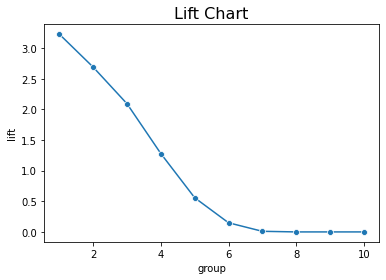

In [281]:
sns.lineplot(lift_df['group'], lift_df['lift'], marker='o')
plt.title('Lift Chart', fontsize=16)
plt.show()

In [282]:
### Iris data
iris = load_iris()
iris = pd.DataFrame(iris.data, columns=iris.feature_names)
iris['Class'] = load_iris().target

In [283]:
x = iris.iloc[:, 3:4]  # 꽃잎 너비
y = (iris["Class"] == 2).astype(int)  # Iris virginica이면 1 아니면 0

In [284]:
log_reg = LogisticRegression(solver="lbfgs", random_state=42)
log_reg.fit(x, y)

LogisticRegression(random_state=42)

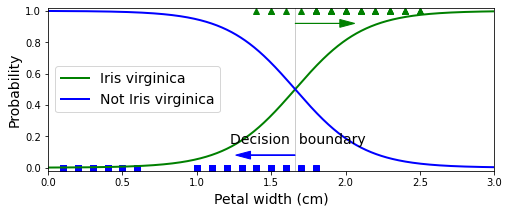

In [285]:
x_new = np.linspace(0, 3, 1000)
y_proba = log_reg.predict_proba(x_new.reshape(-1, 1))
decision_boundary = x_new[y_proba[:, 1] >= 0.5][0]

plt.figure(figsize=(8, 3))

plt.plot(x[y==0], y[y==0], "bs")
plt.plot(x[y==1], y[y==1], "g^")
sns.lineplot([decision_boundary, decision_boundary], [-1, 2], color="black", linestyle="dashed", linewidth=2)
sns.lineplot(x_new, y_proba[:, 1], color="green", linewidth=2, label="Iris virginica")
sns.lineplot(x_new, y_proba[:, 0], color="blue", linewidth=2, label="Not Iris virginica")

plt.text(decision_boundary+0.02, 0.15, "Decision  boundary", fontsize=14, color="k", ha="center")
plt.arrow(decision_boundary, 0.08, -0.3, 0, head_width=0.05, head_length=0.1, fc='b', ec='b')
plt.arrow(decision_boundary, 0.92, 0.3, 0, head_width=0.05, head_length=0.1, fc='g', ec='g')
plt.xlabel("Petal width (cm)", fontsize=14)
plt.ylabel("Probability", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 3, -0.02, 1.02])
plt.show()

In [286]:
decision_boundary

1.6606606606606606

In [287]:
log_reg.predict([[1.7], [1.5]])

array([1, 0])

In [288]:
x = iris.iloc[:, 2:4]  # petal length, petal width
y = (iris["Class"]==2).astype(int)

log_reg = LogisticRegression(solver="lbfgs", C=10**10, random_state=42) # 높은 C 값으로 규제 줄임
log_reg.fit(x, y)

LogisticRegression(C=10000000000, random_state=42)

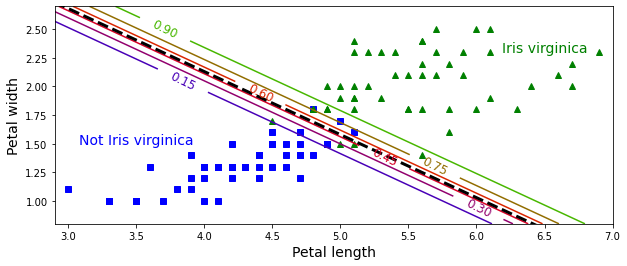

In [289]:
x0, x1 = np.meshgrid(
        np.linspace(2.9, 7, 500).reshape(-1, 1),
        np.linspace(0.8, 2.7, 200).reshape(-1, 1),
    )
x_new = np.c_[x0.ravel(), x1.ravel()]

y_proba = log_reg.predict_proba(x_new)

plt.figure(figsize=(10, 4))
plt.plot(x.iloc[:, 0][y==0], x.iloc[:, 1][y==0], "bs")
plt.plot(x.iloc[:, 0][y==1], x.iloc[:, 1][y==1], "g^")

zz = y_proba[:, 1].reshape(x0.shape)
contour = plt.contour(x0, x1, zz, cmap=plt.cm.brg)

left_right = np.array([2.9, 7])
boundary = -(log_reg.coef_[0][0] * left_right + log_reg.intercept_[0]) / log_reg.coef_[0][1]

plt.clabel(contour, inline=1, fontsize=12)
sns.lineplot(left_right, boundary, color="black", linestyle="dashed", linewidth=3)
plt.text(3.5, 1.5, "Not Iris virginica", fontsize=14, color="b", ha="center")
plt.text(6.5, 2.3, "Iris virginica", fontsize=14, color="g", ha="center")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.axis([2.9, 7, 0.8, 2.7])
plt.show()

In [290]:
### Pima diabetest
diabetes_data = pd.read_csv('./data/diabetes.csv')
print(diabetes_data['Outcome'].value_counts())
diabetes_data.head(3)

0    500
1    268
Name: Outcome, dtype: int64


Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1

In [291]:
diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [292]:
diabetes_data.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

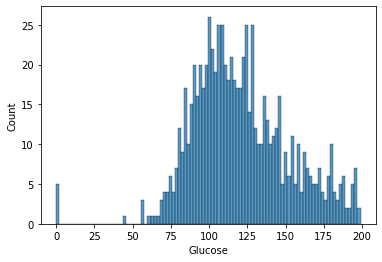

In [293]:
sns.histplot(diabetes_data['Glucose'], bins=100)
plt.show()

In [294]:
# 0값을 검사할 피처명 리스트 객체 설정
zero_features = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

# 전체 데이터 건수
total_count = diabetes_data['Glucose'].count()

# 피처별로 반복 하면서 데이터 값이 0 인 데이터 건수 추출하고, 퍼센트 계산
for feature in zero_features:
    zero_count = diabetes_data[diabetes_data[feature] == 0][feature].count()
    print('{0} 0 건수는 {1}, 퍼센트는 {2:.2f} %'.format(feature, zero_count, 100*zero_count/total_count))

Glucose 0 건수는 5, 퍼센트는 0.65 %
BloodPressure 0 건수는 35, 퍼센트는 4.56 %
SkinThickness 0 건수는 227, 퍼센트는 29.56 %
Insulin 0 건수는 374, 퍼센트는 48.70 %
BMI 0 건수는 11, 퍼센트는 1.43 %


In [295]:
# zero_features 리스트 내부에 저장된 개별 피처들에 대해서 0값을 평균 값으로 대체
mean_zero_features = diabetes_data[zero_features].mean()
diabetes_data[zero_features] = diabetes_data[zero_features].replace(0, mean_zero_features)

In [296]:
def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    f1 = f1_score(y_test,pred)
    roc_auc = roc_auc_score(y_test, pred_proba)
    
    print('오차 행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))
    
def get_eval_by_threshold(y_test , pred_proba_c1, thresholds):
    # thresholds 리스트 객체내의 값을 차례로 iteration하면서 Evaluation 수행.
    for custom_threshold in thresholds:
        binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_c1) 
        custom_predict = binarizer.transform(pred_proba_c1)
        print('임곗값:',custom_threshold)
        get_clf_eval(y_test , custom_predict, pred_proba_c1)

In [297]:
# 피처 데이터 세트 X, 레이블 데이터 세트 y를 추출. 
# 맨 끝이 Outcome 컬럼으로 레이블 값임. 컬럼 위치 -1을 이용해 추출 
x = diabetes_data.iloc[:, :-1]
y = diabetes_data.iloc[:, -1]

# StandardScaler 클래스를 이용해 피처 데이터 세트에 일괄적으로 스케일링 적용
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=156, stratify=y)

# 로지스틱 회귀로 학습,예측 및 평가 수행. 
lr_clf = LogisticRegression(solver='liblinear')
lr_clf.fit(x_train , y_train)

pred = lr_clf.predict(x_test)
pred_proba = lr_clf.predict_proba(x_test)[:, 1]

get_clf_eval(y_test, pred, pred_proba)

오차 행렬
[[90 10]
 [21 33]]
정확도: 0.7987, 정밀도: 0.7674, 재현율: 0.6111, F1: 0.6804, AUC:0.8433


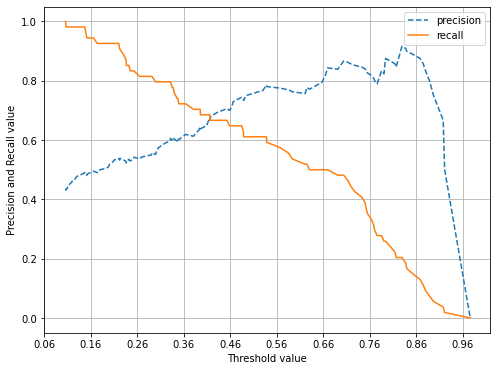

In [298]:
pred_proba_c1 = lr_clf.predict_proba(x_test)[:, 1]
precision_recall_curve_plot(y_test, pred_proba_c1)

In [299]:
thresholds = [0.36, 0.39, 0.42, 0.45, 0.48, 0.50]
pred_proba = lr_clf.predict_proba(x_test)
get_eval_by_threshold(y_test, pred_proba[:,1].reshape(-1, 1), thresholds)

임곗값: 0.36
오차 행렬
[[76 24]
 [15 39]]
정확도: 0.7468, 정밀도: 0.6190, 재현율: 0.7222, F1: 0.6667, AUC:0.8433
임곗값: 0.39
오차 행렬
[[78 22]
 [16 38]]
정확도: 0.7532, 정밀도: 0.6333, 재현율: 0.7037, F1: 0.6667, AUC:0.8433
임곗값: 0.42
오차 행렬
[[84 16]
 [18 36]]
정확도: 0.7792, 정밀도: 0.6923, 재현율: 0.6667, F1: 0.6792, AUC:0.8433
임곗값: 0.45
오차 행렬
[[85 15]
 [18 36]]
정확도: 0.7857, 정밀도: 0.7059, 재현율: 0.6667, F1: 0.6857, AUC:0.8433
임곗값: 0.48
오차 행렬
[[88 12]
 [19 35]]
정확도: 0.7987, 정밀도: 0.7447, 재현율: 0.6481, F1: 0.6931, AUC:0.8433
임곗값: 0.5
오차 행렬
[[90 10]
 [21 33]]
정확도: 0.7987, 정밀도: 0.7674, 재현율: 0.6111, F1: 0.6804, AUC:0.8433


In [300]:
# 임곗값를 0.48로 설정한 Binarizer 생성
binarizer = Binarizer(threshold=0.48)

# 위에서 구한 lr_clf의 predict_proba() 예측 확률 array에서 1에 해당하는 컬럼값을 Binarizer변환. 
pred_th_048 = binarizer.fit_transform(pred_proba[:, 1].reshape(-1, 1)) 

get_clf_eval(y_test , pred_th_048, pred_proba[:, 1])

오차 행렬
[[88 12]
 [19 35]]
정확도: 0.7987, 정밀도: 0.7447, 재현율: 0.6481, F1: 0.6931, AUC:0.8433


In [302]:
from sklearn.datasets import load_breast_cancer

In [303]:
### Breast cancer data
cancer = load_breast_cancer()

In [304]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(cancer.data)

x_train, x_test, y_train, y_test = train_test_split(data_scaled, cancer.target, test_size=0.3, random_state=0)

In [305]:
# 로지스틱 회귀를 이용하여 학습 및 예측 수행.
# solver 인자값을 생성자로 입력하지 않으면 solver='lbfgs'
lr_clf = LogisticRegression()
lr_clf.fit(x_train, y_train)
lr_preds = lr_clf.predict(x_test)

# accuracy와 roc_auc 측정
print('accuracy: {0:.3f}, roc_auc:{1:.3f}'.format(accuracy_score(y_test, lr_preds),
                                                  roc_auc_score(y_test , lr_preds)))

accuracy: 0.977, roc_auc:0.972


In [306]:
solvers = ['lbfgs', 'liblinear', 'newton-cg', 'sag', 'saga']

# 여러개의 solver 값별로 LogisticRegression 학습 후 성능 평가
for solver in solvers:
    lr_clf = LogisticRegression(solver=solver, max_iter=600)
    lr_clf.fit(x_train, y_train)
    lr_preds = lr_clf.predict(x_test)
    
    # accuracy와 roc_auc 측정
    print('solver:{0}, accuracy: {1:.3f}, roc_auc:{2:.3f}'.format(solver,
                                                                  accuracy_score(y_test, lr_preds),
                                                                  roc_auc_score(y_test , lr_preds)))

solver:lbfgs, accuracy: 0.977, roc_auc:0.972
solver:liblinear, accuracy: 0.982, roc_auc:0.979
solver:newton-cg, accuracy: 0.977, roc_auc:0.972
solver:sag, accuracy: 0.982, roc_auc:0.979
solver:saga, accuracy: 0.982, roc_auc:0.979


In [307]:
params={'solver':['liblinear', 'lbfgs'],
        'penalty':['l2', 'l1'],
        'C':[0.01, 0.1, 1, 1, 5, 10]}

lr_clf = LogisticRegression()

grid_clf = GridSearchCV(lr_clf, param_grid=params, scoring='accuracy', cv=3)
grid_clf.fit(data_scaled, cancer.target)
print('최적 하이퍼 파라미터:{0}, 최적 평균 정확도:{1:.3f}'.format(grid_clf.best_params_,
                                                  grid_clf.best_score_))

최적 하이퍼 파라미터:{'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}, 최적 평균 정확도:0.979


In [308]:
### IMDB text - Sentiment Analysis
review_df = pd.read_csv('./data/labeledTrainData.tsv', header=0, sep="\t", quoting=3)
review_df.head(3)

id  sentiment                                             review
0  "5814_8"          1  "With all this stuff going down at the moment ...
1  "2381_9"          1  "\"The Classic War of the Worlds\" by Timothy ...
2  "7759_3"          0  "The film starts with a manager (Nicholas Bell...

In [309]:
print(review_df['review'][0])

"With all this stuff going down at the moment with MJ i've started listening to his music, watching the odd documentary here and there, watched The Wiz and watched Moonwalker again. Maybe i just want to get a certain insight into this guy who i thought was really cool in the eighties just to maybe make up my mind whether he is guilty or innocent. Moonwalker is part biography, part feature film which i remember going to see at the cinema when it was originally released. Some of it has subtle messages about MJ's feeling towards the press and also the obvious message of drugs are bad m'kay.<br /><br />Visually impressive but of course this is all about Michael Jackson so unless you remotely like MJ in anyway then you are going to hate this and find it boring. Some may call MJ an egotist for consenting to the making of this movie BUT MJ and most of his fans would say that he made it for the fans which if true is really nice of him.<br /><br />The actual feature film bit when it finally sta

In [310]:
# <br> html 태그는 replace 함수로 공백으로 변환
review_df['review'] = review_df['review'].str.replace('<br />',' ')

# re를 이용하여 영어 문자열이 아닌 문자는 모두 공백으로 변환 
review_df['review'] = review_df['review'].apply( lambda x: re.sub("[^a-zA-Z]", " ", x) )

In [311]:
class_df = review_df['sentiment']
feature_df = review_df.drop(['id', 'sentiment'], axis=1, inplace=False)

x_train, x_test, y_train, y_test= train_test_split(feature_df, class_df, test_size=0.3, random_state=156)
x_train.shape, x_test.shape

((17500, 1), (7500, 1))

In [312]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [313]:
# 스톱 워드는 English, filtering, ngram은 (1,2)로 설정해 CountVectorization수행. 
# LogisticRegression의 C는 10으로 설정. 
pipeline = Pipeline([
    ('cnt_vect', CountVectorizer(stop_words='english', ngram_range=(1, 2))),
    ('lr_clf', LogisticRegression(solver='liblinear', C=10))])

# Pipeline 객체를 이용하여 fit(), predict()로 학습/예측 수행. predict_proba()는 roc_auc때문에 수행.  
pipeline.fit(x_train['review'], y_train)
pred = pipeline.predict(x_test['review'])
pred_probs = pipeline.predict_proba(x_test['review'])[:,1]

print('예측 정확도는 {0:.4f}, ROC-AUC는 {1:.4f}'.format(accuracy_score(y_test ,pred),
                                         roc_auc_score(y_test, pred_probs)))

예측 정확도는 0.8860, ROC-AUC는 0.9503


In [314]:
# 스톱 워드는 english, filtering, ngram은 (1, 2)로 설정해 TF-IDF 벡터화 수행. 
# LogisticRegression의 C는 10으로 설정. 
pipeline = Pipeline([
    ('tfidf_vect', TfidfVectorizer(stop_words='english', ngram_range=(1, 2))),
    ('lr_clf', LogisticRegression(solver='liblinear', C=10))])

pipeline.fit(x_train['review'], y_train)
pred = pipeline.predict(x_test['review'])
pred_probs = pipeline.predict_proba(x_test['review'])[:,1]

print('예측 정확도는 {0:.4f}, ROC-AUC는 {1:.4f}'.format(accuracy_score(y_test ,pred),
                                         roc_auc_score(y_test, pred_probs)))

예측 정확도는 0.8936, ROC-AUC는 0.9598


In [315]:
### Korean rating data
train_df = pd.read_csv('./data/ratings_train.txt', sep='\t')
test_df = pd.read_csv('./data/ratings_test.txt', sep='\t')
train_df.head(3)

id                           document  label
0   9976970                아 더빙.. 진짜 짜증나네요 목소리      0
1   3819312  흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나      1
2  10265843                  너무재밓었다그래서보는것을추천한다      0

In [316]:
train_df['label'].value_counts( )

0    75173
1    74827
Name: label, dtype: int64

In [317]:
train_df = train_df.fillna(' ')

# 정규 표현식을 이용하여 숫자를 공백으로 변경(정규 표현식으로 \d 는 숫자를 의미함.) 
train_df['document'] = train_df['document'].apply( lambda x: re.sub(r"\d+", " ", x) )

test_df = test_df.fillna(' ')
test_df['document'] = test_df['document'].apply( lambda x: re.sub(r"\d+", " ", x) )

# id 칼럼 삭제 수행
train_df.drop('id', axis=1, inplace=True) 
test_df.drop('id', axis=1, inplace=True)


In [318]:
from konlpy.tag import Twitter

In [319]:
twitter = Twitter()
def tw_tokenizer(text):
    # 입력 인자로 들어온 text 를 형태소 단어로 토큰화 하여 list 객체 반환
    tokens_ko = twitter.morphs(text)
    return tokens_ko

In [320]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [321]:
# Twitter 객체의 morphs( ) 객체를 이용한 tokenizer를 사용. ngram_range는 (1,2) 
tfidf_vect = TfidfVectorizer(tokenizer=tw_tokenizer, ngram_range=(1, 2), min_df=3, max_df=0.9)
tfidf_vect.fit(train_df['document'])
tfidf_matrix_train = tfidf_vect.transform(train_df['document'])

In [322]:
# Logistic Regression 을 이용하여 감성 분석 Classification 수행. 
lg_clf = LogisticRegression(random_state=0, solver='liblinear')

# Parameter C 최적화를 위해 GridSearchCV 를 이용. 
params = {'C': [1, 3.5, 4.5, 5.5, 10]}
grid_cv = GridSearchCV(lg_clf, param_grid=params, cv=3, scoring='accuracy', verbose=1)
grid_cv.fit(tfidf_matrix_train, train_df['label'])
print(grid_cv.best_params_, round(grid_cv.best_score_,4))

Fitting 3 folds for each of 5 candidates, totalling 15 fits
{'C': 3.5} 0.8593


In [323]:
# 학습 데이터를 적용한 TfidfVectorizer를 이용하여 테스트 데이터를 TF-IDF 값으로 Feature 변환함. 
tfidf_matrix_test = tfidf_vect.transform(test_df['document'])

# classifier 는 GridSearchCV에서 최적 파라미터로 학습된 classifier를 그대로 이용
best_estimator = grid_cv.best_estimator_
preds = best_estimator.predict(tfidf_matrix_test)

print('Logistic Regression 정확도: ', accuracy_score(test_df['label'], preds))

Logistic Regression 정확도:  0.86172


### (2) Multiclass (Multinomial: Softmax)

In [324]:
body['gender'] = np.where(body['gender']=='M', 0, 1) # gender 변수 전처리

mapping={'A':0, 'B':1, 'C':2, 'D':4} # class 변수 전처리
body['class_2'] = body['class'].map(mapping)
body

age  gender  height_cm  weight_kg  body fat_%  diastolic  systolic  \
0      27.0       1      172.3      75.24        21.3       80.0     130.0   
1      25.0       1      165.0      55.80        15.7       77.0     126.0   
2      31.0       1      179.6      78.00        20.1       92.0     152.0   
3      32.0       1      174.5      71.10        18.4       76.0     147.0   
4      28.0       1      173.8      67.70        17.1       70.0     127.0   
...     ...     ...        ...        ...         ...        ...       ...   
13388  25.0       1      172.1      71.80        16.2       74.0     141.0   
13389  21.0       1      179.7      63.90        12.1       74.0     128.0   
13390  39.0       1      177.2      80.50        20.1       78.0     132.0   
13391  64.0       1      146.1      57.70        40.4       68.0     121.0   
13392  34.0       1      164.0      66.10        19.5       82.0     150.0   

       gripForce  sit and bend forward_cm  sit-ups counts  broad jump_cm  \
0           54.9                     18.4            60.0          217.0   
1           36.4                     16.3            53.0          229.0   
2           44.8                     12.0            49.0          181.0   
3           41.4                     15.2            53.0          219.0   
4           43.5                     27.1            45.0          217.0   
...          ...                      ...             ...            ...   
13388       35.8                     17.4            47.0          198.0   
13389       33.0                      1.1            48.0          167.0   
13390       63.5                     16.4            45.0          229.0   
13391       19.3                      9.2             0.0           75.0   
13392       35.9                      7.1            51.0          180.0   

      class  class_1  class_2  
0         C        0        2  
1         A        1        0  
2         C        0        2  
3         B        0        1  
4         B        0        1  
...     ...      ...      ...  
13388     C        0        2  
13389     D        0        4  
13390     A        1        0  
13391     D        0        4  
13392     C        0        2  

[13393 rows x 14 columns]

In [325]:
feature_columns = list(body.columns.difference(['class', 'class_2']))
x = body[feature_columns]
y = body['class_2']

In [326]:
train_x, test_x, train_y, test_y = train_test_split(x, y, stratify=y, train_size=0.7, random_state=1)
print(train_x.shape, test_x.shape, train_y.shape, test_y.shape)

(9375, 12) (4018, 12) (9375,) (4018,)


In [327]:
softmax = LogisticRegression(multi_class='multinomial', solver='lbfgs', C=10) # multi_class parameter 입력
softmax.fit(train_x, train_y)

LogisticRegression(C=10, multi_class='multinomial')

In [328]:
pred = softmax.predict(test_x)

test_cm = confusion_matrix(test_y, pred)
test_acc = accuracy_score(test_y, pred)

print(test_cm)
print('\n')
print('정확도\t{}%'.format(round(test_acc * 100, 2)))

[[726 244  34   0]
 [246 440 285  33]
 [ 83 228 499 195]
 [ 14  65 151 775]]


정확도	60.73%


In [329]:
softmax.predict([test_x.iloc[-1,:]])

array([0])

In [330]:
softmax.predict_proba([test_x.iloc[-1,:]])

array([[0.72, 0.24, 0.04, 0.  ]])

In [331]:
x = iris.iloc[:, 2:4]  # 꽃잎 길이, 꽃잎 너비
y = iris["Class"]

In [332]:
softmax_reg = LogisticRegression(multi_class="multinomial", solver="lbfgs", C=10, random_state=42)
softmax_reg.fit(x, y)

LogisticRegression(C=10, multi_class='multinomial', random_state=42)

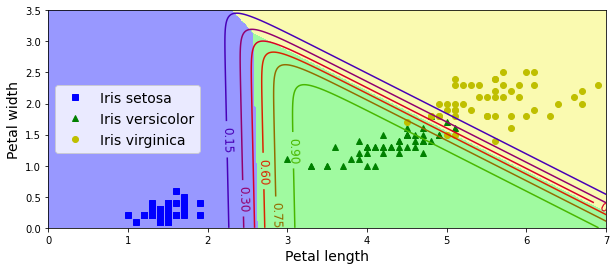

In [333]:
x0, x1 = np.meshgrid(
        np.linspace(0, 8, 500).reshape(-1, 1),
        np.linspace(0, 3.5, 200).reshape(-1, 1),
    )
x_new = np.c_[x0.ravel(), x1.ravel()]

y_proba = softmax_reg.predict_proba(x_new)
y_predict = softmax_reg.predict(x_new)

zz1 = y_proba[:, 1].reshape(x0.shape)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(x.iloc[:, 0][y==0], x.iloc[:, 1][y==0], "bs", label="Iris setosa")
plt.plot(x.iloc[:, 0][y==1], x.iloc[:, 1][y==1], "g^", label="Iris versicolor")
plt.plot(x.iloc[:, 0][y==2], x.iloc[:, 1][y==2], "yo", label="Iris virginica")

plt.contourf(x0, x1, zz, cmap=ListedColormap(['#9898ff', '#a0faa0', '#fafab0']))
contour = plt.contour(x0, x1, zz1, cmap=plt.cm.brg)
plt.clabel(contour, inline=1, fontsize=12)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 7, 0, 3.5])
plt.show()

In [334]:
softmax_reg.predict([[5, 2]])

array([2])

In [335]:
softmax_reg.predict_proba([[5, 2]])

array([[6.38e-07, 5.75e-02, 9.43e-01]])

In [336]:
from sklearn.datasets import fetch_20newsgroups

In [337]:
###newsgroup text data
news_data = fetch_20newsgroups(subset='all',random_state=156)

In [338]:
print(news_data.keys())

dict_keys(['data', 'filenames', 'target_names', 'target', 'DESCR'])


In [339]:
print('target 클래스의 값과 분포도 \n', pd.Series(news_data.target).value_counts().sort_index())
print('target 클래스의 이름들 \n', news_data.target_names)

target 클래스의 값과 분포도 
 0     799
1     973
2     985
3     982
4     963
5     988
6     975
7     990
8     996
9     994
10    999
11    991
12    984
13    990
14    987
15    997
16    910
17    940
18    775
19    628
dtype: int64
target 클래스의 이름들 
 ['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']


In [340]:
print(news_data.data[0])

From: egreen@east.sun.com (Ed Green - Pixel Cruncher)
Subject: Re: Observation re: helmets
Organization: Sun Microsystems, RTP, NC
Lines: 21
Distribution: world
Reply-To: egreen@east.sun.com
NNTP-Posting-Host: laser.east.sun.com

In article 211353@mavenry.altcit.eskimo.com, maven@mavenry.altcit.eskimo.com (Norman Hamer) writes:
> 
> The question for the day is re: passenger helmets, if you don't know for 
>certain who's gonna ride with you (like say you meet them at a .... church 
>meeting, yeah, that's the ticket)... What are some guidelines? Should I just 
>pick up another shoei in my size to have a backup helmet (XL), or should I 
>maybe get an inexpensive one of a smaller size to accomodate my likely 
>passenger? 

If your primary concern is protecting the passenger in the event of a
crash, have him or her fitted for a helmet that is their size.  If your
primary concern is complying with stupid helmet laws, carry a real big
spare (you can put a big or small head in a big helmet, bu

In [341]:
# subset='train'으로 학습용(Train) 데이터만 추출, remove=('headers', 'footers', 'quotes')로 내용만 추출
train_news = fetch_20newsgroups(subset='train', remove=('headers', 'footers', 'quotes'), random_state=156)
x_train = train_news.data
y_train = train_news.target
print(type(x_train))

# subset='test'으로 테스트(Test) 데이터만 추출, remove=('headers', 'footers', 'quotes')로 내용만 추출
test_news = fetch_20newsgroups(subset='test',remove=('headers', 'footers','quotes'),random_state=156)
x_test = test_news.data
y_test = test_news.target
print('학습 데이터 크기 {0} , 테스트 데이터 크기 {1}'.format(len(train_news.data) , len(test_news.data)))

<class 'list'>
학습 데이터 크기 11314 , 테스트 데이터 크기 7532


In [342]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [343]:
# Count Vectorization으로 feature extraction 변환 수행. 
cnt_vect = CountVectorizer()

cnt_vect.fit(x_train)
x_train_cnt_vect = cnt_vect.transform(x_train)

# 학습 데이터로 fit( )된 CountVectorizer를 이용하여 테스트 데이터를 feature extraction 변환 수행. 
x_test_cnt_vect = cnt_vect.transform(x_test)

print('학습 데이터 Text의 CountVectorizer Shape:', x_train_cnt_vect.shape)

학습 데이터 Text의 CountVectorizer Shape: (11314, 101631)


In [344]:
# LogisticRegression을 이용하여 학습/예측/평가 수행. 
lr_clf = LogisticRegression(solver='liblinear')
lr_clf.fit(x_train_cnt_vect , y_train)
pred = lr_clf.predict(x_test_cnt_vect)
print('CountVectorized Logistic Regression 의 예측 정확도는 {0:.3f}'.format(accuracy_score(y_test, pred)))

CountVectorized Logistic Regression 의 예측 정확도는 0.617


In [345]:
# TF-IDF Vectorization 적용하여 학습 데이터셋과 테스트 데이터 셋 변환. 
# stop words 필터링을 추가하고 ngram을 (1, 2)로 변경하여 Feature Vectorization 적용
tfidf_vect = TfidfVectorizer(stop_words='english', ngram_range=(1,2), max_df=300)
tfidf_vect.fit(x_train)
x_train_tfidf_vect = tfidf_vect.transform(x_train)
x_test_tfidf_vect = tfidf_vect.transform(x_test)

# LogisticRegression을 이용하여 학습/예측/평가 수행. 
lr_clf = LogisticRegression(solver='liblinear')
lr_clf.fit(x_train_tfidf_vect , y_train)
pred = lr_clf.predict(x_test_tfidf_vect)
print('TF-IDF Logistic Regression 의 예측 정확도는 {0:.3f}'.format(accuracy_score(y_test ,pred)))

TF-IDF Logistic Regression 의 예측 정확도는 0.690


In [346]:
### Pipeline 사용
# TfidfVectorizer 객체를 tfidf_vect 객체명으로, LogisticRegression객체를 lr_clf 객체명으로 생성하는 Pipeline생성
pipeline = Pipeline([
    ('tfidf_vect', TfidfVectorizer(stop_words='english', ngram_range=(1, 2), max_df=300)),
    ('lr_clf', LogisticRegression(solver='liblinear'))
])

# 별도의 TfidfVectorizer객체의 fit_transform( )과 LogisticRegression의 fit(), predict( )가 필요 없음. 
# pipeline의 fit( ) 과 predict( ) 만으로 한꺼번에 Feature Vectorization과 ML 학습/예측이 가능. 
pipeline.fit(x_train, y_train)
pred = pipeline.predict(x_test)
print('Pipeline을 통한 Logistic Regression 의 예측 정확도는 {0:.3f}'.format(accuracy_score(y_test ,pred)))

Pipeline을 통한 Logistic Regression 의 예측 정확도는 0.690


In [347]:
from sklearn.model_selection import GridSearchCV

In [348]:
## GridSearch with pipeline
pipeline = Pipeline([
    ('tfidf_vect', TfidfVectorizer(stop_words='english')),
    ('lr_clf', LogisticRegression(solver='liblinear'))
])

# Pipeline에 기술된 각각의 객체 변수에 언더바(_)2개를 연달아 붙여 GridSearchCV에 사용될 
# 파라미터/하이퍼 파라미터 이름과 값을 설정. . 
params = { 'tfidf_vect__ngram_range': [(1,1), (1,2)],
           'tfidf_vect__max_df': [100, 300],
           'lr_clf__C': [1, 5, 10]
}

# GridSearchCV의 생성자에 Estimator가 아닌 Pipeline 객체 입력
grid_cv_pipe = GridSearchCV(pipeline, param_grid=params, cv=2, scoring='accuracy', verbose=1)
grid_cv_pipe.fit(x_train , y_train)
print(grid_cv_pipe.best_params_ , grid_cv_pipe.best_score_)

pred = grid_cv_pipe.predict(x_test)
print('Pipeline을 통한 Logistic Regression 의 예측 정확도는 {0:.3f}'.format(accuracy_score(y_test, pred)))

Fitting 2 folds for each of 12 candidates, totalling 24 fits
{'lr_clf__C': 10, 'tfidf_vect__max_df': 300, 'tfidf_vect__ngram_range': (1, 2)} 0.7424429909846209
Pipeline을 통한 Logistic Regression 의 예측 정확도는 0.704


## Support Vector Machine (SVM)
- 최대 마진을 갖는 선형 초평면 찾기 (Classifier)
- 마진 안에 최대한 많은 샘플이 들어가도록 fit (Regressor)
- Kernel: 두 관측치들의 유사성을 수량화하는 함수. 비선형 자료에 사용
    - RBF (Random Forest), Linear, Poly
- 이상치에 민감한 편

### (1) SVClassifier

In [349]:
c = pd.read_csv('./ADP_book_ver01/data/classification.csv')
c

age   interest  success
0    23.657801  18.859917      0.0
1    22.573729  17.969223      0.0
2    32.553424  29.463651      0.0
3     6.718035  25.704665      1.0
4    14.401919  16.770856      0.0
..         ...        ...      ...
292  27.697220  18.799309      0.0
293  15.150959  72.000352      1.0
294  22.264378  68.453459      1.0
295  25.677420  90.118212      1.0
296  21.215594  48.265520      1.0

[297 rows x 3 columns]

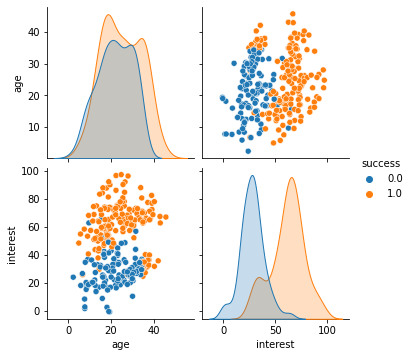

In [350]:
sns.pairplot(hue='success', data=c)
plt.show()

In [351]:
x = c[['age', 'interest']]
y = c['success']

In [352]:
train_x, test_x, train_y, test_y = train_test_split(x, y, stratify=y, train_size=0.7, random_state=1)
print(train_x.shape, test_x.shape, train_y.shape, test_y.shape)

(207, 2) (90, 2) (207,) (90,)


In [353]:
### Scaling
scaler = StandardScaler()
train_x = scaler.fit_transform(train_x)

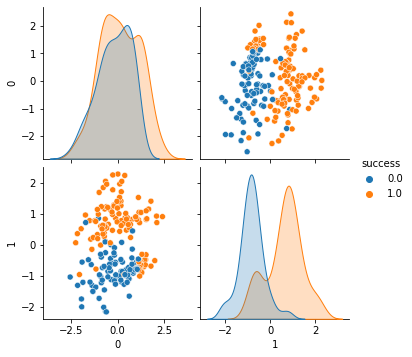

In [354]:
sns.pairplot(data=pd.concat([pd.DataFrame(train_x), train_y.reset_index(drop=True)], axis=1), hue='success')
plt.show()

#### SVC

In [355]:
from sklearn.svm import SVC

In [356]:
### Modeling
# C = 오차 허용량
clf = SVC(C = 0.5)
clf.fit(train_x, train_y)

SVC(C=0.5)

In [357]:
test_x_scal = scaler.transform(test_x)
pred = clf.predict(test_x_scal)

test_cm = confusion_matrix(test_y, pred)
test_acc = accuracy_score(test_y, pred)
test_prc = precision_score(test_y, pred)
test_rcll = recall_score(test_y, pred)
test_f1 = f1_score(test_y, pred)

print(test_cm)
print('\n')
print('정확도\t{}%'.format(round(test_acc*100,2)))
print('정밀도\t{}%'.format(round(test_prc*100,2)))
print('재현율\t{}%'.format(round(test_rcll*100,2)))
print('F1\t{}%'.format(round(test_f1*100,2)))

[[37  2]
 [ 2 49]]


정확도	95.56%
정밀도	96.08%
재현율	96.08%
F1	96.08%


#### LinearSVC

In [358]:
from sklearn.svm import LinearSVC

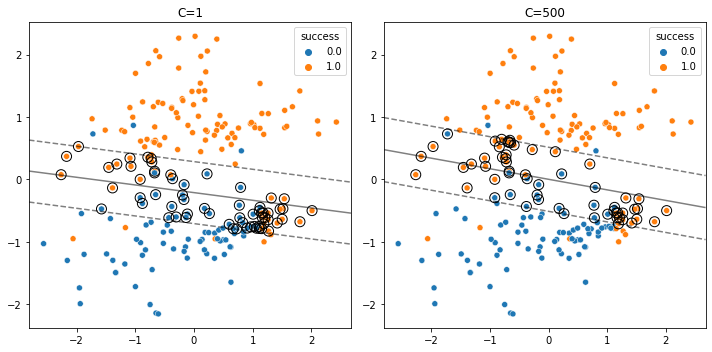

In [359]:
### Linear SVC
plt.figure(figsize=(10, 5))
for i, C in enumerate([1, 500]):
    clf = LinearSVC(C=C, loss="hinge", random_state=42).fit(train_x, train_y)
    
    # decision function으로 서포트벡터 얻기
    decision_function = clf.decision_function(train_x)
    support_vector_indices = np.where(np.abs(decision_function) <= 1 + 1e-15)[0]
    support_vectors = train_x[support_vector_indices]

    plt.subplot(1, 2, i + 1) # subplot 생성
    sns.scatterplot(x=train_x[:, 0], y=train_x[:, 1], hue=train_y)
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    xx, yy = np.meshgrid(
        np.linspace(xlim[0], xlim[1], 50), np.linspace(ylim[0], ylim[1], 50)
    )
    Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contour(
        xx,
        yy,
        Z,
        colors="k",
        levels=[-1, 0, 1],
        alpha=0.5,
        linestyles=["--", "-", "--"],
    )
    plt.scatter(
        support_vectors[:, 0],
        support_vectors[:, 1],
        s=100,
        linewidth=1,
        facecolors="none",
        edgecolors="k",
    )
    plt.title("C="+str(C))
plt.tight_layout()
plt.show()

In [360]:
### Iris data
x = iris.iloc[:, 2:4]  # 꽃잎 길이, 꽃잎 너비
y = iris["Class"]

svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("linear_svc", LinearSVC(C=1, random_state=42)),
    ])

svm_clf.fit(x, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('linear_svc', LinearSVC(C=1, random_state=42))])

In [361]:
svm_clf.predict([[5.5, 1.7]])

array([2])

#### PolynomialSVC

In [362]:
x, y = make_moons(n_samples=100, noise=0.15, random_state=42) # 반달 모양 데이터셋 만들기

### Polynomial SVM
polynomial_svm_clf = Pipeline([
        ("poly_features", PolynomialFeatures(degree=3)),
        ("scaler", StandardScaler()),
        ("svm_clf", LinearSVC(C=10, loss="hinge", random_state=42))
    ])

polynomial_svm_clf.fit(x, y)

Pipeline(steps=[('poly_features', PolynomialFeatures(degree=3)),
                ('scaler', StandardScaler()),
                ('svm_clf', LinearSVC(C=10, loss='hinge', random_state=42))])

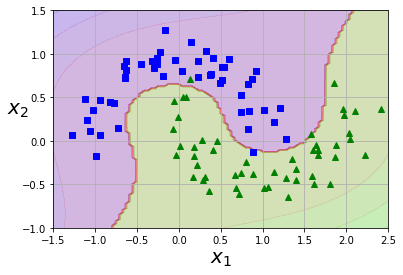

In [363]:
def plot_dataset(X, y, axes):
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^"),
    plt.axis(axes)
    plt.grid(True, which='both')
    plt.xlabel(r"$x_1$", fontsize=20)
    plt.ylabel(r"$x_2$", fontsize=20, rotation=0)

def plot_predictions(clf, axes):
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    y_decision = clf.decision_function(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
    plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)

plot_predictions(polynomial_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(x, y, [-1.5, 2.5, -1, 1.5])
plt.show()

#### Kernels

In [364]:
### Polynomial Kernel
poly_kernel_svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="poly", degree=3, coef0=1, C=5))
    ])
poly_kernel_svm_clf.fit(x, y)

poly100_kernel_svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="poly", degree=10, coef0=100, C=5)) # coef0: 모델이 높은 차수와 낮은 차수에 얼마나 영향받을지 조정
    ])
poly100_kernel_svm_clf.fit(x, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=5, coef0=100, degree=10, kernel='poly'))])

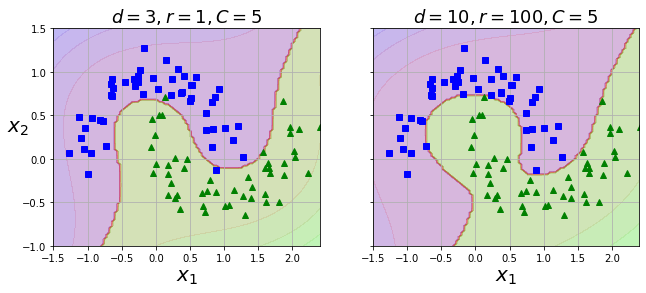

In [365]:
fig, axes = plt.subplots(ncols=2, figsize=(10.5, 4), sharey=True)

plt.sca(axes[0])
plot_predictions(poly_kernel_svm_clf, [-1.5, 2.45, -1, 1.5])
plot_dataset(x, y, [-1.5, 2.4, -1, 1.5])
plt.title(r"$d=3, r=1, C=5$", fontsize=18)

plt.sca(axes[1])
plot_predictions(poly100_kernel_svm_clf, [-1.5, 2.45, -1, 1.5])
plot_dataset(x, y, [-1.5, 2.4, -1, 1.5])
plt.title(r"$d=10, r=100, C=5$", fontsize=18)
plt.ylabel("")
plt.show()

In [366]:
### Gaussian RBF Kernel
# gamma: 종 모양의 강도. 높을수록 좁아져서 결정 경계가 불규칙해짐
# C: 오차 허용 정도
rbf_kernel_svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="rbf", gamma=5, C=0.001))
    ])
rbf_kernel_svm_clf.fit(x, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=0.001, gamma=5))])

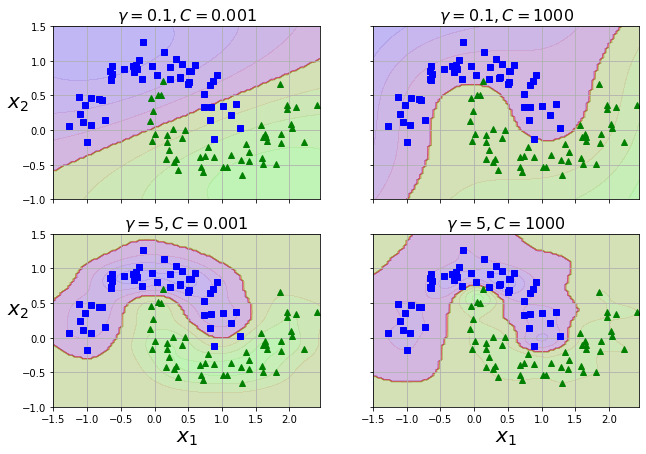

In [367]:
gamma1, gamma2 = 0.1, 5
C1, C2 = 0.001, 1000
hyperparams = (gamma1, C1), (gamma1, C2), (gamma2, C1), (gamma2, C2)

svm_clfs = []
for gamma, C in hyperparams:
    rbf_kernel_svm_clf = Pipeline([
            ("scaler", StandardScaler()),
            ("svm_clf", SVC(kernel="rbf", gamma=gamma, C=C))
        ])
    rbf_kernel_svm_clf.fit(x, y)
    svm_clfs.append(rbf_kernel_svm_clf)

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10.5, 7), sharex=True, sharey=True)

for i, svm_clf in enumerate(svm_clfs):
    plt.sca(axes[i // 2, i % 2])
    plot_predictions(svm_clf, [-1.5, 2.45, -1, 1.5])
    plot_dataset(x, y, [-1.5, 2.45, -1, 1.5])
    gamma, C = hyperparams[i]
    plt.title(r"$\gamma = {}, C = {}$".format(gamma, C), fontsize=16)
    if i in (0, 1):
        plt.xlabel("")
    if i in (1, 3):
        plt.ylabel("")

plt.show()

### (2) SVRegressor

#### LinearSVR

In [368]:
### 샘플 data 생성
np.random.seed(42)
m = 50
x = 2 * np.random.rand(m, 1)
y = (4 + 3 * x + np.random.randn(m, 1)).ravel()

print(x.shape, y.shape)

(50, 1) (50,)


In [369]:
from sklearn.svm import LinearSVR

In [370]:
### Modeling
svm_reg1 = LinearSVR(epsilon=1.5, random_state=42)
svm_reg2 = LinearSVR(epsilon=0.5, random_state=42)
svm_reg1.fit(x, y)
svm_reg2.fit(x, y)

def find_support_vectors(svm_reg, x, y):
    y_pred = svm_reg.predict(x)
    off_margin = (np.abs(y - y_pred) >= svm_reg.epsilon)
    return np.argwhere(off_margin)

svm_reg1.support_ = find_support_vectors(svm_reg1, x, y)
svm_reg2.support_ = find_support_vectors(svm_reg2, x, y)

In [371]:
eps_x1 = 1
eps_y_pred = svm_reg1.predict([[eps_x1]])
eps_y_pred

array([6.53])

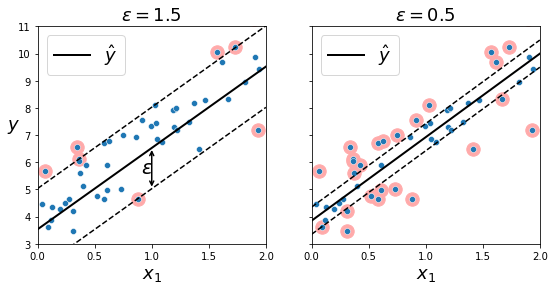

In [372]:
def plot_svm_regression(svm_reg, X, y, axes):
    x1s = np.linspace(axes[0], axes[1], 100)
    y_pred = svm_reg.predict(x1s.reshape(-1, 1))
    
    plt.scatter(X[svm_reg.support_], y[svm_reg.support_], s=180, facecolors='#FFAAAA')
    sns.lineplot(x1s, y_pred, color="black", linewidth=2, label=r"$\hat{y}$")
    sns.lineplot(x1s, y_pred + svm_reg.epsilon, color="black", linestyle="dashed")
    sns.lineplot(x1s, y_pred - svm_reg.epsilon, color="black", linestyle="dashed")
    
    sns.scatterplot(X.reshape(1, -1)[0], y)
    plt.xlabel(r"$x_1$", fontsize=18)
    plt.legend(loc="upper left", fontsize=18)
    plt.axis(axes)

fig, axes = plt.subplots(ncols=2, figsize=(9, 4), sharey=True)
plt.sca(axes[0])
plot_svm_regression(svm_reg1, x, y, [0, 2, 3, 11])
plt.title(r"$\epsilon = {}$".format(svm_reg1.epsilon), fontsize=18)
plt.ylabel(r"$y$", fontsize=18, rotation=0)

plt.annotate(
        '', xy=(eps_x1, eps_y_pred), xycoords='data',
        xytext=(eps_x1, eps_y_pred - svm_reg1.epsilon),
        textcoords='data', arrowprops={'arrowstyle': '<->', 'linewidth': 1.5}
    )
plt.text(0.91, 5.6, r"$\epsilon$", fontsize=20)

plt.sca(axes[1])
plot_svm_regression(svm_reg2, x, y, [0, 2, 3, 11])
plt.title(r"$\epsilon = {}$".format(svm_reg2.epsilon), fontsize=18)
plt.show()

#### Non-linear SVR

In [373]:
### 샘플 data 생성
np.random.seed(42)
m = 100
x = 2 * np.random.rand(m, 1) - 1
y = (0.2 + 0.1 * x + 0.5 * x**2 + np.random.randn(m, 1)/10).ravel()
print(x.shape, y.shape)

(100, 1) (100,)


In [374]:
svm_poly_reg1 = SVR(kernel="poly", degree=2, C=100, epsilon=0.1, gamma="scale")
svm_poly_reg2 = SVR(kernel="poly", degree=2, C=0.01, epsilon=0.1, gamma="scale")
svm_poly_reg1.fit(x, y)
svm_poly_reg2.fit(x, y)

SVR(C=0.01, degree=2, kernel='poly')

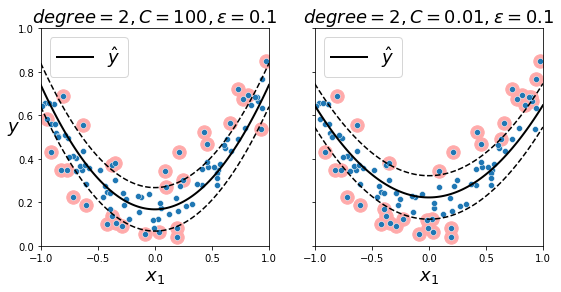

In [375]:
fig, axes = plt.subplots(ncols=2, figsize=(9, 4), sharey=True)
plt.sca(axes[0])
plot_svm_regression(svm_poly_reg1, x, y, [-1, 1, 0, 1])
plt.title(r"$degree={}, C={}, \epsilon = {}$".format(svm_poly_reg1.degree, svm_poly_reg1.C, svm_poly_reg1.epsilon), fontsize=18)
plt.ylabel(r"$y$", fontsize=18, rotation=0)

plt.sca(axes[1])
plot_svm_regression(svm_poly_reg2, x, y, [-1, 1, 0, 1])
plt.title(r"$degree={}, C={}, \epsilon = {}$".format(svm_poly_reg2.degree, svm_poly_reg2.C, svm_poly_reg2.epsilon), fontsize=18)
plt.show()

In [376]:
### 샘플데이터 생성하기
x = np.sort(5 * np.random.rand(40, 1), axis=0)
y = np.sin(x).ravel()

print(x[0:6], '\n\n', y[0:10])

[[0.08]
 [0.12]
 [0.49]
 [0.7 ]
 [0.85]
 [0.89]] 

 [0.08 0.12 0.47 0.64 0.75 0.77 0.83 0.99 0.99 1.  ]


In [377]:
### 타깃데이터에 노이즈 추가하기
y[::5] += 3 * (0.5 - np.random.rand(8))

print(y[0:10])

[-0.85  0.12  0.47  0.64  0.75 -0.33  0.83  0.99  0.99  1.  ]


In [378]:
from sklearn.svm import SVR

In [379]:
### Model fit
svr_rbf = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=0.1)
svr_lin = SVR(kernel='linear', C=100, gamma='auto')
svr_poly = SVR(kernel='poly', C=100, gamma='auto', degree=3, epsilon=0.1, coef0=1)

svr_rbf.fit(x, y)
svr_lin.fit(x, y)
svr_poly.fit(x, y)

SVR(C=100, coef0=1, gamma='auto', kernel='poly')

In [380]:
rbf_pred = svr_rbf.predict(x)
lin_pred = svr_lin.predict(x)
poly_pred = svr_poly.predict(x)

preds = [rbf_pred, lin_pred, poly_pred]
kernel = ['Random_Forest', 'Linear', 'Polynomial']
evls = ['mse', 'rmse', 'mae']

results = pd.DataFrame(index=kernel, columns=evls)

for pred, nm in zip(preds, kernel):
    mse = mean_squared_error(y, pred)
    mae = mean_absolute_error(y, pred)
    rmse = np.sqrt(mse)
    
    results.loc[nm]['mse'] = round(mse,2)
    results.loc[nm]['rmse'] = round(rmse,2)
    results.loc[nm]['mae'] = round(mae,2)

results

mse  rmse   mae
Random_Forest  0.11  0.33   0.2
Linear         0.35  0.59  0.39
Polynomial     0.11  0.33  0.17

In [381]:
### support vector의 index 추출 -> array 반환
print(svr_rbf.support_)
print(svr_lin.support_)
print(svr_poly.support_)

[ 0  1  2  4  5  6  7  9 10 23 24 25 26 27 28 29 30 31 35 39]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 25
 27 28 29 30 31 32 35 39]
[ 0  1  2  5 10 16 18 20 23 25 30 35 36 37]


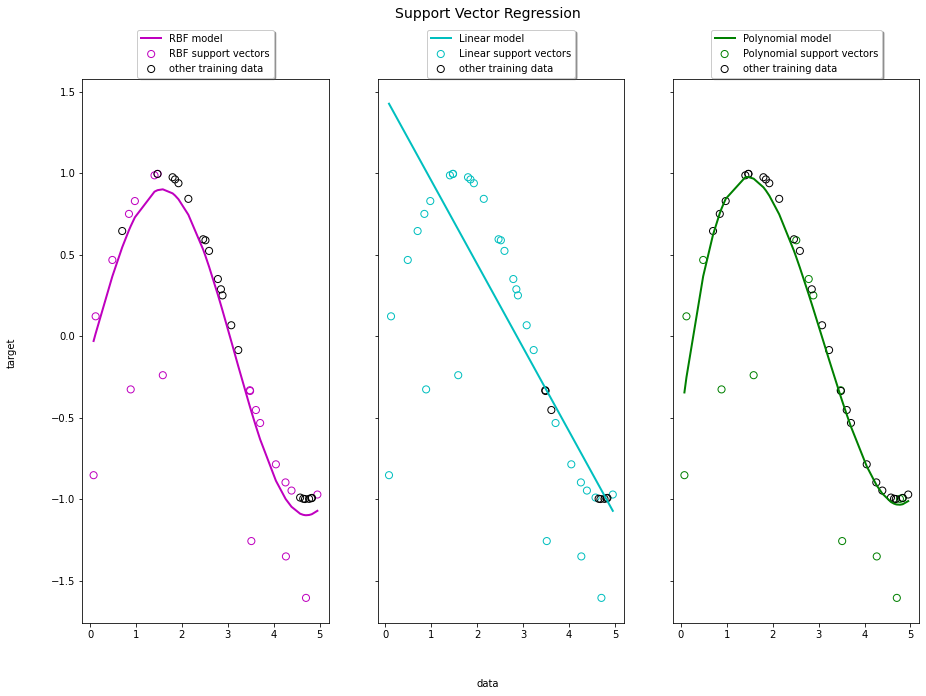

In [382]:
lw = 2

svrs = [svr_rbf, svr_lin, svr_poly]
kernel_label = ["RBF", "Linear", "Polynomial"]
model_color = ["m", "c", "g"]

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 10), sharey=True)
for ix, svr in enumerate(svrs):
    axes[ix].plot(
        x,
        svr.fit(x, y).predict(x),
        color=model_color[ix],
        lw=lw,
        label="{} model".format(kernel_label[ix]),
    )
    axes[ix].scatter(
        x[svr.support_],
        y[svr.support_],
        facecolor="none",
        edgecolor=model_color[ix],
        s=50,
        label="{} support vectors".format(kernel_label[ix]),
    )
    axes[ix].scatter(
        x[np.setdiff1d(np.arange(len(x)), svr.support_)],
        y[np.setdiff1d(np.arange(len(x)), svr.support_)],
        facecolor="none",
        edgecolor="k",
        s=50,
        label="other training data",
    )
    axes[ix].legend(
        loc="upper center",
        bbox_to_anchor=(0.5, 1.1),
        ncol=1,
        fancybox=True,
        shadow=True,
    )

fig.text(0.5, 0.04, "data", ha="center", va="center")
fig.text(0.06, 0.5, "target", ha="center", va="center", rotation="vertical")
fig.suptitle("Support Vector Regression", fontsize=14)
plt.show()

## K-Nearest Neighbor (K-NN)
- K 개의 근접 이웃에 따른 라벨링/회귀선 도출 (default=5)
- 비모수적인 방법으로 결정경계가 불규칙한 경우에 유리
- K 값이 클 수록 경계 모호성이 줄어듦

### (1) KNN-Classifier

In [33]:
### Loan default data
loan200 = pd.read_csv("./Practical_Statictics/data/loan200.csv")

predictors = ['payment_inc_ratio', 'dti']
outcome = 'outcome'

newloan = loan200.loc[0:0, predictors]

In [34]:
x = loan200.loc[1:, predictors]
y = loan200.loc[1:, outcome]
pd.concat([x, y], axis=1)

payment_inc_ratio    dti   outcome
1              5.46933  21.33   default
2              6.90294   8.97  paid off
3             11.14800   1.83  paid off
4              3.72120  10.81   default
5              1.89923  11.34  paid off
..                 ...    ...       ...
196           11.66300  26.09   default
197            2.97641  16.41   default
198            1.96846  19.98   default
199            9.64200  20.17  paid off
200            7.03924  13.88  paid off

[200 rows x 3 columns]

In [36]:
from sklearn.neighbors import KNeighborsClassifier

In [37]:
knn = KNeighborsClassifier(n_neighbors=20)
knn.fit(x, y)
knn.predict(newloan)
knn.predict_proba(newloan)

array([[0.45, 0.55]])

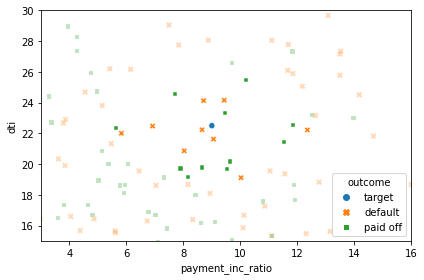

In [43]:
nbrs = knn.kneighbors(newloan)
maxDistance = np.max(nbrs[0][0])

sns.scatterplot(x='payment_inc_ratio', y='dti', style='outcome', 
                hue='outcome', data=loan200, alpha=0.3)
sns.scatterplot(x='payment_inc_ratio', y='dti', style='outcome', hue='outcome', 
                data=pd.concat([loan200.loc[0:0, :], loan200.loc[nbrs[1][0] + 1,:]]), legend=False)
plt.xlim(3, 16)
plt.ylim(15, 30)

plt.tight_layout()
plt.show()

In [53]:
### Add scaler
loan_data = pd.read_csv("./Practical_Statictics/data/loan_data.csv.gz")
loan_data = loan_data.drop(columns=['Unnamed: 0', 'status'])
loan_data['outcome'] = pd.Categorical(loan_data['outcome'], categories=['paid off', 'default'], ordered=True)

predictors = ['payment_inc_ratio', 'dti', 'revol_bal', 'revol_util']
outcome = 'outcome'

newloan = loan_data.loc[0:0, predictors]

x = loan_data.loc[:, predictors]
y = loan_data.loc[:, outcome]

In [61]:
scaler = StandardScaler()
scaler.fit(x * 1.0)

x_std = scaler.transform(x * 1.0)
newloan_std = scaler.transform(newloan * 1.0)

knn = KNeighborsClassifier(n_neighbors=20)
knn.fit(x_std, y)

nbrs = knn.kneighbors(newloan_std)
x.iloc[nbrs[1][0], :].head()

payment_inc_ratio   dti  revol_bal  revol_util
0                2.39320  1.00       1687         9.4
2080             2.61091  1.03       1218         9.7
1438             2.34343  0.51        278         9.9
30215            2.71200  1.34       1075         8.5
28542            2.39760  0.74       2917         7.4

In [57]:
### KNN as a feature
loan_data['borrower_score'] = knn.predict_proba(x)[:, 0]
print(loan_data['borrower_score'].describe())

count    45342.000000
mean         0.502365
std          0.024868
min          0.300000
25%          0.500000
50%          0.500000
75%          0.500000
max          0.950000
Name: borrower_score, dtype: float64


array([0.5, 0.5, 0.5, ..., 0.5, 0.5, 0.5])

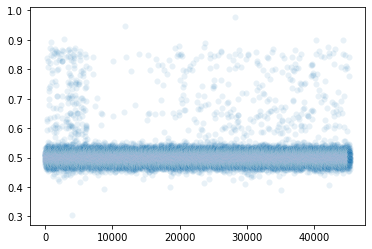

In [59]:
sns.scatterplot(range(len(x)), [bs + random.gauss(0, 0.015) for bs in knn.predict_proba(x)[:, 0]], 
            alpha=0.1)
knn.predict_proba(x)[:, 0]

In [383]:
liver = pd.read_csv('./ADP_book_ver01/data/indian_liver_patient.csv')
print(liver.Dataset.unique())
liver.head()

[1 2]


Age  Gender  Total_Bilirubin  Direct_Bilirubin  Alkaline_Phosphotase  \
0   65  Female              0.7               0.1                   187   
1   62    Male             10.9               5.5                   699   
2   62    Male              7.3               4.1                   490   
3   58    Male              1.0               0.4                   182   
4   72    Male              3.9               2.0                   195   

   Alamine_Aminotransferase  Aspartate_Aminotransferase  Total_Protiens  \
0                        16                          18             6.8   
1                        64                         100             7.5   
2                        60                          68             7.0   
3                        14                          20             6.8   
4                        27                          59             7.3   

   Albumin  Albumin_and_Globulin_Ratio  Dataset  
0      3.3                        0.90        1  
1      3.2                        0.74        1  
2      3.3                        0.89        1  
3      3.4                        1.00        1  
4      2.4                        0.40        1

In [384]:
liver.Gender = np.where(liver.Gender=='Female', 0, 1) # target encoding
liver.head()

Age  Gender  Total_Bilirubin  Direct_Bilirubin  Alkaline_Phosphotase  \
0   65       0              0.7               0.1                   187   
1   62       1             10.9               5.5                   699   
2   62       1              7.3               4.1                   490   
3   58       1              1.0               0.4                   182   
4   72       1              3.9               2.0                   195   

   Alamine_Aminotransferase  Aspartate_Aminotransferase  Total_Protiens  \
0                        16                          18             6.8   
1                        64                         100             7.5   
2                        60                          68             7.0   
3                        14                          20             6.8   
4                        27                          59             7.3   

   Albumin  Albumin_and_Globulin_Ratio  Dataset  
0      3.3                        0.90        1  
1      3.2                        0.74        1  
2      3.3                        0.89        1  
3      3.4                        1.00        1  
4      2.4                        0.40        1

In [385]:
### NA 탐색
print(liver.isna().sum())

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64


In [386]:
### drop NA
liver.dropna(axis=0, inplace=True)
print(liver.isna().sum())

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    0
Dataset                       0
dtype: int64


In [387]:
x = liver[liver.columns.difference(['Dataset'])]
y = liver['Dataset']

In [388]:
train_x, test_x, train_y, test_y = train_test_split(x, y, stratify=y, train_size=0.7, random_state=1)
print(train_x.shape, test_x.shape, train_y.shape, test_y.shape)

(405, 10) (174, 10) (405,) (174,)


In [390]:
### Modeling
clf = KNeighborsClassifier(n_neighbors=15, weights='uniform')
clf.fit(train_x, train_y)

KNeighborsClassifier(n_neighbors=15)

In [391]:
pred = clf.predict(test_x)

test_cm = confusion_matrix(test_y, pred)
test_acc = accuracy_score(test_y, pred)
test_prc = precision_score(test_y, pred)
test_rcll = recall_score(test_y, pred)
test_f1 = f1_score(test_y, pred)

print(test_cm)
print('\n')
print('정확도\t{}%'.format(round(test_acc*100,2)))
print('정밀도\t{}%'.format(round(test_prc*100,2)))
print('재현율\t{}%'.format(round(test_rcll*100,2)))
print('F1\t{}%'.format(round(test_f1 * 100, 2)))

[[106  18]
 [ 39  11]]


정확도	67.24%
정밀도	73.1%
재현율	85.48%
F1	78.81%


### (2) KNN-Regressor

In [392]:
# 임의의 샘플데이터 생성하기
np.random.seed(0)
x = np.sort(5 * np.random.rand(400, 1), axis=0)
T = np.linspace(0, 5, 500)[:, np.newaxis]
y = np.sin(x).ravel()

print(x[:10])
print(T[:10])

[[0.02]
 [0.06]
 [0.06]
 [0.07]
 [0.08]
 [0.08]
 [0.09]
 [0.09]
 [0.1 ]
 [0.1 ]]
[[0.  ]
 [0.01]
 [0.02]
 [0.03]
 [0.04]
 [0.05]
 [0.06]
 [0.07]
 [0.08]
 [0.09]]


In [393]:
# 타깃데이터에 노이즈 추가하기
y[::1] += 1 * (0.5 - np.random.rand(400))

In [394]:
train_x, test_x, train_y, test_y = train_test_split(x, y, train_size=0.7, random_state=1)
print(train_x.shape, test_x.shape, train_y.shape, test_y.shape)

(280, 1) (120, 1) (280,) (120,)


In [395]:
from sklearn.neighbors import KNeighborsRegressor

In [396]:
### Modeling
# uniform/distance. distance의 경우 가까운 이웃에 가중치가 있음
knn_uni = KNeighborsRegressor(n_neighbors=20, weights='uniform')
knn_dis = KNeighborsRegressor(n_neighbors=20, weights='distance')

knn_uni.fit(train_x, train_y)
knn_dis.fit(train_x, train_y)

KNeighborsRegressor(n_neighbors=20, weights='distance')

In [397]:
uni_pred = knn_uni.predict(test_x)
dis_pred = knn_dis.predict(test_x)

preds = [uni_pred, dis_pred]
weights = ['uniform', 'distance']
evls = ['mse', 'rmse', 'mae']

results = pd.DataFrame(index=weights, columns=evls)

for pred, nm in zip(preds, weights):
    mse = mean_squared_error(test_y, pred)
    mae = mean_absolute_error(test_y, pred)
    rmse = np.sqrt(mse)
    
    results.loc[nm]['mse']=round(mse,2)
    results.loc[nm]['rmse']=round(rmse,2)
    results.loc[nm]['mae']=round(mae,2)

results

mse  rmse   mae
uniform    0.1  0.31  0.27
distance  0.11  0.34  0.28

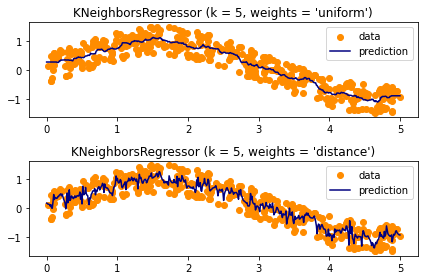

In [398]:
for i, weights in enumerate(["uniform", "distance"]):
    knn = KNeighborsRegressor(n_neighbors=20, weights=weights)
    
    y_ = knn.fit(x, y).predict(T)
    
    plt.subplot(2, 1, i + 1)
    plt.scatter(x, y, color="darkorange", label="data")
    plt.plot(T, y_, color="navy", label="prediction")
    plt.axis("tight")
    plt.legend()
    plt.title("KNeighborsRegressor (k = %i, weights = '%s')" % (5, weights))

plt.tight_layout()
plt.show()

## Decision Tree
- 의사결정 규칙을 Tree 구조로 나타내어 분류하거나 예측 -> 설명하기 쉽다
- input/target에 어떤 데이터 형태이든 사용 가능하며, 선형성/정규성 등 가정이 들어가지 않는다
- train data의 변화에 민감(Data의 회전 등)
- 노드 내 동질성, 노드 간 이질성이 커지도록 최적화
     - 분류: Chi-square statistic (크게), Gini index/Entropy index (작게)
     - 회귀: F-statistic, Variance reduction (크게)
- CART 알고리즘이 사용됨
- Root node, Parent/Child node, Terminal node
- Pruning으로 모형 단순화하여 Overfitting 방지 필요 (Overfitting 가능성 높음)
- 변수 중요도: 0-1 사이 숫차로 표현되며, 총 합은 1

### (1) DecisionTreeClassifier

In [399]:
from sklearn.datasets import make_classification

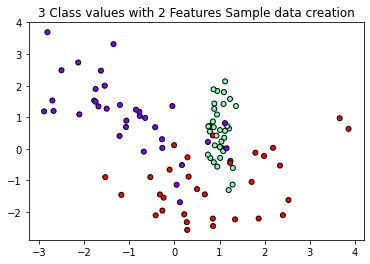

In [400]:
plt.title("3 Class values with 2 Features Sample data creation")

# 2차원 시각화를 위해서 feature는 2개, 결정값 클래스는 3가지 유형의 classification 샘플 데이터 생성. 
x_features, y_labels = make_classification(n_features=2, n_redundant=0, n_informative=2,
                             n_classes=3, n_clusters_per_class=1, random_state=0)

# plot 형태로 2개의 feature로 2차원 좌표 시각화, 각 클래스값은 다른 색깔로 표시됨. 
plt.scatter(x_features[:, 0], x_features[:, 1], marker='o', c=y_labels, s=25, cmap='rainbow', edgecolor='k')
plt.show()

In [401]:
# Classifier의 Decision Boundary를 시각화 하는 함수
def visualize_boundary(model, X, y):
    fig,ax = plt.subplots()
    
    # 학습 데이타 scatter plot으로 나타내기
    ax.scatter(X[:, 0], X[:, 1], c=y, s=25, cmap='rainbow', edgecolor='k',
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim_start , xlim_end = ax.get_xlim()
    ylim_start , ylim_end = ax.get_ylim()
    
    # 호출 파라미터로 들어온 training 데이타로 model 학습 . 
    model.fit(X, y)
    # meshgrid 형태인 모든 좌표값으로 예측 수행. 
    xx, yy = np.meshgrid(np.linspace(xlim_start,xlim_end, num=200),np.linspace(ylim_start,ylim_end, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    
    # contourf() 를 이용하여 class boundary 를 visualization 수행. 
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap='rainbow', clim=(y.min(), y.max()),
                           zorder=1)

In [402]:
from sklearn.tree import DecisionTreeClassifier

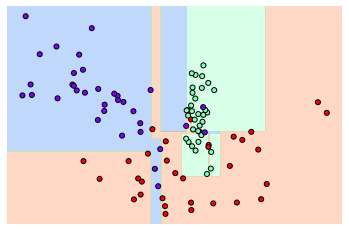

In [403]:
# 특정한 트리 생성 제약없는 결정 트리의 Decsion Boundary 시각화.
dt_clf = DecisionTreeClassifier(random_state=156).fit(x_features, y_labels)
visualize_boundary(dt_clf, x_features, y_labels)

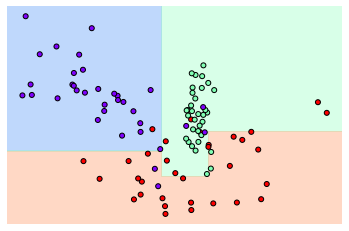

In [404]:
# min_samples_leaf=6 으로 트리 생성 조건을 제약한 Decision Boundary 시각화
dt_clf = DecisionTreeClassifier(min_samples_leaf=6, random_state=156).fit(x_features, y_labels)
visualize_boundary(dt_clf, x_features, y_labels)

In [405]:
### credit data
credit = pd.read_csv('./ADP_book_ver01/data/credit_final.csv')
credit.head()

credit.rating  account.balance  credit.duration.months  \
0              1                1                      18   
1              1                1                       9   
2              1                2                      12   
3              1                1                      12   
4              1                1                      12   

   previous.credit.payment.status  credit.purpose  credit.amount  savings  \
0                               3               2           1049        1   
1                               3               4           2799        1   
2                               2               4            841        2   
3                               3               4           2122        1   
4                               3               4           2171        1   

   employment.duration  installment.rate  marital.status  ...  \
0                    1                 4               1  ...   
1                    2                 2               3  ...   
2                    3                 2               1  ...   
3                    2                 3               3  ...   
4                    2                 4               3  ...   

   residence.duration  current.assets  age  other.credits  apartment.type  \
0                   4               2   21              2               1   
1                   2               1   36              2               1   
2                   4               1   23              2               1   
3                   2               1   39              2               1   
4                   4               2   38              1               2   

   bank.credits  occupation  dependents  telephone  foreign.worker  
0             1           3           1          1               1  
1             2           3           2          1               1  
2             1           2           1          1               1  
3             2           2           2          1               2  
4             2           2           1          1               2  

[5 rows x 21 columns]

In [406]:
feature_columns = list(credit.columns.difference(['credit.rating']))
x = credit[feature_columns]
y = credit['credit.rating']

In [407]:
x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y, test_size=0.3, random_state=1)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(700, 20)
(300, 20)
(700,)
(300,)


In [408]:
### Modeling
clf = DecisionTreeClassifier(max_depth=5, min_samples_leaf=4) # gini 불순도(default) 기준으로 하며, 두 개의 규제가 있음. 최대 노드 깊이, 노드 당 데이터 수
clf.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=4)

In [409]:
pred = clf.predict(x_test)
test_cm = confusion_matrix(y_test, pred)
test_acc = accuracy_score(y_test, pred)
test_prc = precision_score(y_test, pred)
test_rcll = recall_score(y_test, pred)
test_f1 = f1_score(y_test, pred)

print(test_cm)
print('\n')
print('정확도\t{}%'.format(round(test_acc *100,2)))
print('정밀도\t{}%'.format(round(test_prc *100,2)))
print('재현율\t{}%'.format(round(test_rcll *100,2)))
print('F1\t{}%'.format(round(test_f1 * 100, 2)))

[[ 32  58]
 [ 31 179]]


정확도	70.33%
정밀도	75.53%
재현율	85.24%
F1	80.09%


In [410]:
report = classification_report(y_test, pred)
print(report)

              precision    recall  f1-score   support

           0       0.51      0.36      0.42        90
           1       0.76      0.85      0.80       210

    accuracy                           0.70       300
   macro avg       0.63      0.60      0.61       300
weighted avg       0.68      0.70      0.69       300



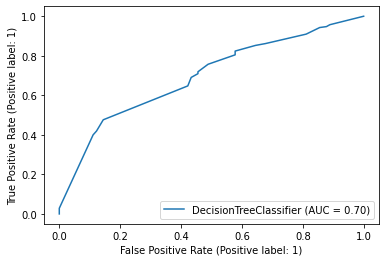

In [411]:
plot_roc_curve(clf, x_test, y_test)
plt.show()

In [412]:
R_A_score = roc_auc_score(y_test, clf.predict_proba(x_test)[:, 1])
print('ROC_AUC_score : ', R_A_score)

ROC_AUC_score :  0.6954232804232805


In [413]:
importances = clf.feature_importances_ # 0~1 사이의 값
column_nm = pd.DataFrame(x.columns)
feature_importances = pd.concat([column_nm, pd.DataFrame(importances)], axis=1)
feature_importances.columns = ['feature_nm', 'importances']
print(feature_importances)

                        feature_nm  importances
0                  account.balance     0.276525
1                              age     0.075409
2                   apartment.type     0.022754
3                     bank.credits     0.000000
4                    credit.amount     0.109753
5           credit.duration.months     0.200911
6                   credit.purpose     0.043163
7                   current.assets     0.000000
8                       dependents     0.000000
9              employment.duration     0.007947
10                  foreign.worker     0.000000
11                       guarantor     0.025057
12                installment.rate     0.000000
13                  marital.status     0.000000
14                      occupation     0.008224
15                   other.credits     0.050822
16  previous.credit.payment.status     0.114132
17              residence.duration     0.009553
18                         savings     0.055750
19                       telephone     0

In [414]:
### OS에 설치 필요할 수 있음
# !brew (yum, dnf) install graphviz
import pydot
import pydotplus
import graphviz

from sklearn.tree import export_graphviz
from IPython.display import Image

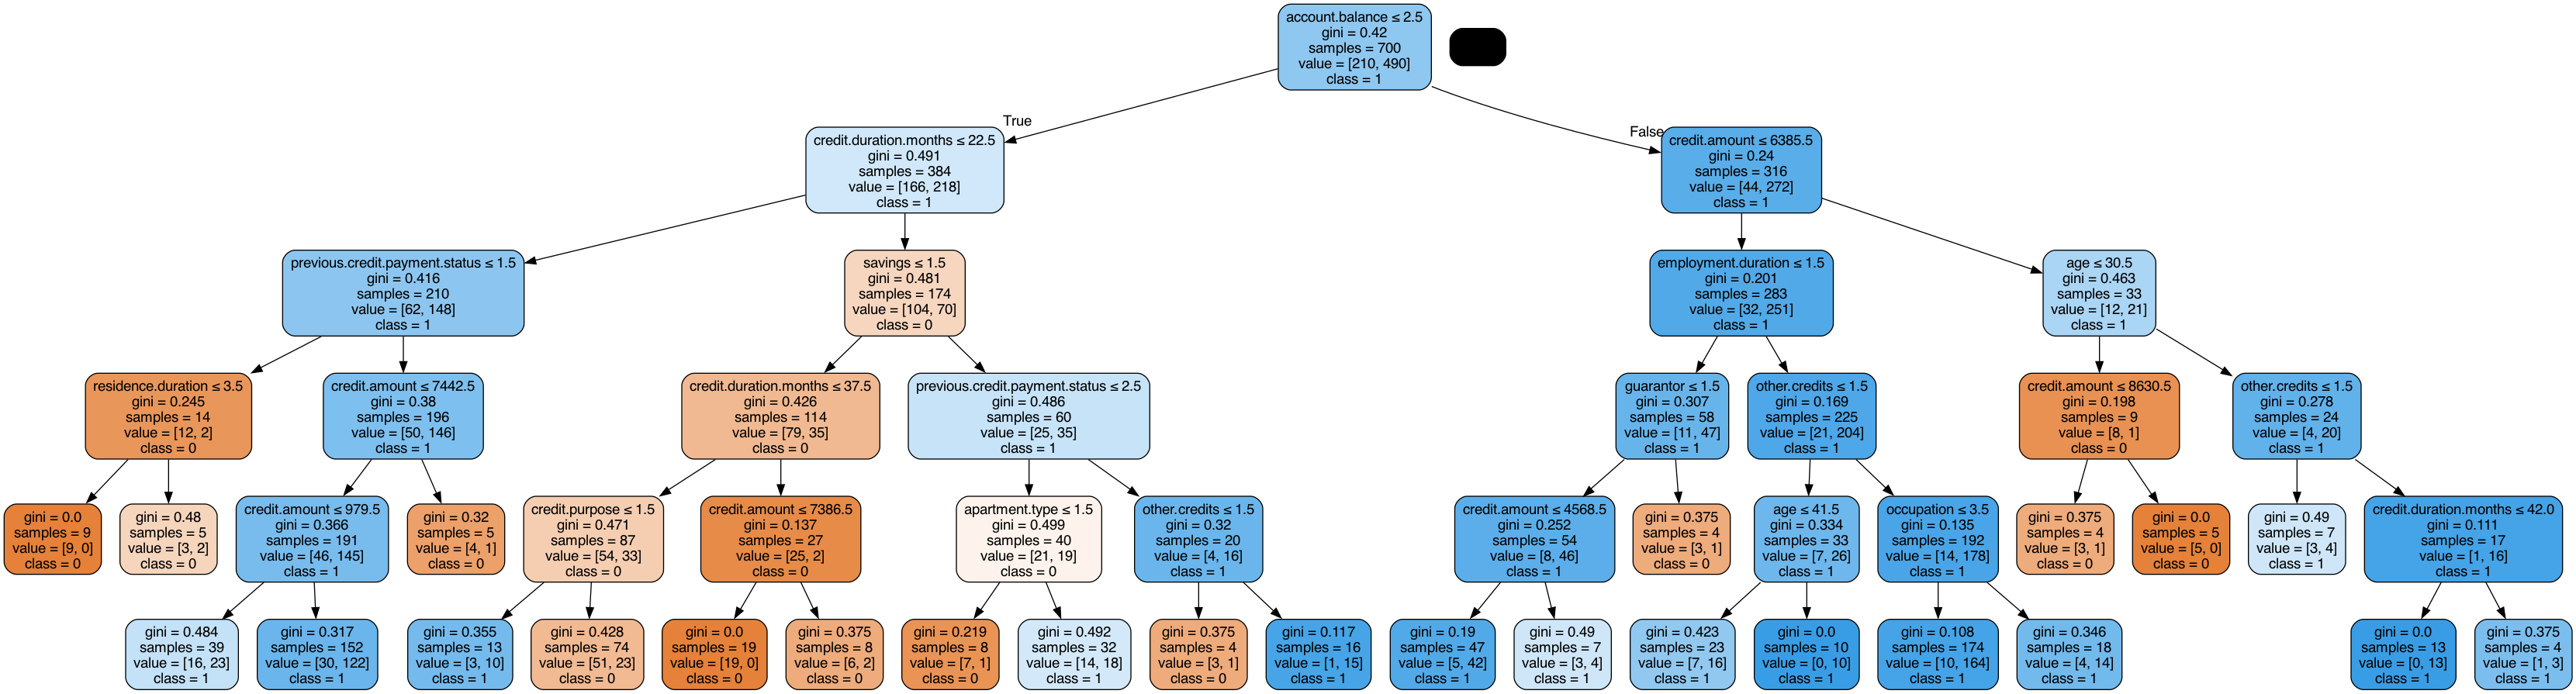

In [415]:
### Tree 시각화
feature_names = feature_columns
target_names = np.array(['0', '1'])

dt_dot_data = export_graphviz(clf, feature_names = feature_names,
                              class_names = target_names,
                              filled=True, rounded =True,
                              special_characters=True)
dt_graph=pydotplus.graph_from_dot_data(dt_dot_data)
Image(dt_graph.create_png())

In [416]:
# Binary class & 숫자 label로 변경 -> ROC, AUC를 구해보기 위함
### Iris data
iris = load_iris()
iris = pd.DataFrame(iris.data, columns=iris.feature_names)
iris['Class'] = load_iris().target
iris['Class'] = iris['Class'].map({0: 'Setosa', 1: 'Versicolour', 2: 'Virginica'})

iris = iris[iris.Class != 'Setosa']
iris['Class'] = np.where(iris.Class=='Virginica', 1, 0) 

In [417]:
iris.Class.unique()

array([0, 1])

In [418]:
iris.shape

(100, 5)

In [419]:
iris.isna().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
Class                0
dtype: int64

In [420]:
### Data split
x_train, x_test, y_train, y_test = train_test_split(iris.drop('Class', axis=1), iris['Class'], test_size=0.2, random_state=0, stratify=iris['Class'])

In [421]:
### Modeling
dtree_clf_5 = DecisionTreeClassifier(max_depth=5, random_state=100, criterion="entropy") # entropy를 분류기준으로
dtree_clf_3 = DecisionTreeClassifier(max_depth=3, random_state=100, criterion="entropy")
dtree_clf_1 = DecisionTreeClassifier(max_depth=1, random_state=100, criterion="entropy")

In [422]:
### Cross validation
scores = cross_val_score(dtree_clf_5, x_train, y_train, scoring='accuracy', cv=10) # dataset 10개로 분할
print('교차검증 정확도: ', np.round(scores, 3))
print('평균 검증 정확도: ', np.round(np.mean(scores), 4))

scores = cross_val_score(dtree_clf_3, x_train, y_train, scoring='accuracy', cv=10)
print('교차검증 정확도: ', np.round(scores, 3))
print('평균 검증 정확도: ', np.round(np.mean(scores), 4))

scores = cross_val_score(dtree_clf_1, x_train, y_train, scoring='accuracy', cv=10)
print('교차검증 정확도: ', np.round(scores, 3))
print('평균 검증 정확도: ', np.round(np.mean(scores), 4))

교차검증 정확도:  [0.75 0.88 0.88 0.88 0.88 1.   1.   0.88 0.75 0.88]
평균 검증 정확도:  0.875
교차검증 정확도:  [0.75 0.88 0.88 0.88 0.88 1.   1.   0.88 0.75 0.88]
평균 검증 정확도:  0.875
교차검증 정확도:  [0.88 0.88 0.75 0.88 0.88 1.   1.   0.88 0.88 0.88]
평균 검증 정확도:  0.8875


In [423]:
dtree_clf_5.fit(x_train, y_train)
pred = dtree_clf_5.predict(x_test)

print('의사결정나무(교차검증 후) 예측 정확도: {0:.5f}'.format(accuracy_score(y_test, pred)))

# pos_label default=1, 1이 아닌 경우 지정해 줘야 함
print('의사결정나무 Virginica Precision: {0:.5f}'.format(precision_score(y_test, pred)))
print('의사결정나무 Virginica Recall: {0:.5f}'.format(recall_score(y_test, pred)))
print('의사결정나무 Virginica F1: {0:.5f}'.format(f1_score(y_test, pred)))

의사결정나무(교차검증 후) 예측 정확도: 1.00000
의사결정나무 Virginica Precision: 1.00000
의사결정나무 Virginica Recall: 1.00000
의사결정나무 Virginica F1: 1.00000


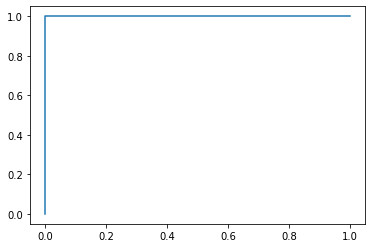

1.0

In [424]:
### ROC, AUC
# FPR, TPR, 임곗값 할당하기
fpr, tpr, thres = roc_curve(y_test, pred)
    
# ROC 곡선 그리기
plt.plot(fpr, tpr)
plt.show()

# AUC
auc(fpr, tpr)

In [425]:
### Confusion matrix
cm = confusion_matrix(y_test, pred)
cm

array([[10,  0],
       [ 0, 10]])

In [426]:
### Model evaluation
pred = pd.DataFrame(pred, columns=['pred Species'])
actual = pd.DataFrame(y_test.values, columns=['actual Species'])

classify_result = pd.concat([actual, pred], axis=1)
classify_result.head()

actual Species  pred Species
0               1             1
1               1             1
2               0             0
3               1             1
4               1             1

In [427]:
### Class probability
dtree_clf_5.predict_proba([[5, 1.5, 1.5, 3]])

array([[0., 1.]])

In [428]:
dtree_clf_5.predict([[5, 1.5, 1.5, 3]])

array([1])

In [429]:
### Result 파일 저장
# classify_result.to_csv('clf_result.csv', index=False, encoding='utf-8-sig')

In [430]:
iris

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
50                 7.0               3.2                4.7               1.4   
51                 6.4               3.2                4.5               1.5   
52                 6.9               3.1                4.9               1.5   
53                 5.5               2.3                4.0               1.3   
54                 6.5               2.8                4.6               1.5   
..                 ...               ...                ...               ...   
145                6.7               3.0                5.2               2.3   
146                6.3               2.5                5.0               1.9   
147                6.5               3.0                5.2               2.0   
148                6.2               3.4                5.4               2.3   
149                5.9               3.0                5.1               1.8   

     Class  
50       0  
51       0  
52       0  
53       0  
54       0  
..     ...  
145      1  
146      1  
147      1  
148      1  
149      1  

[100 rows x 5 columns]

In [431]:
export_graphviz(dtree_clf_5, out_file="tree.dot", class_names='Class', feature_names = iris.columns.difference(['Class']), impurity=True, filled=True)

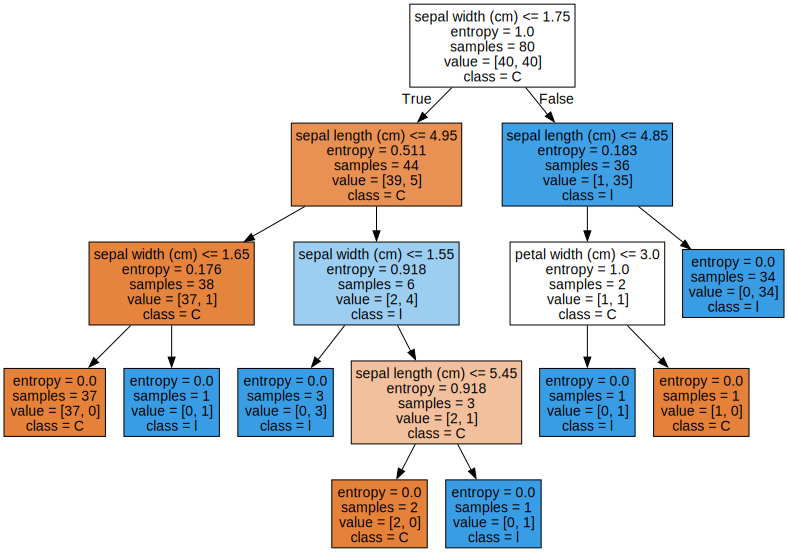

In [432]:
# 위에서 생성된 tree.dot 파일을 Graphviz 읽어서 Jupyter Notebook상에서 시각화 
with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

Feature importances:
[0.   0.03 0.22 0.75]
petal length (cm) : 0.000
petal width (cm) : 0.025
sepal length (cm) : 0.221
sepal width (cm) : 0.754


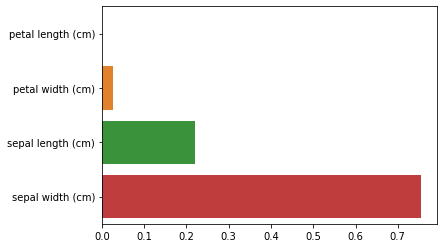

In [433]:
# feature importance 추출 
print("Feature importances:\n{0}".format(np.round(dtree_clf_5.feature_importances_, 3)))

# feature별 importance 매핑
for name, value in zip(iris.columns.difference(['Class']), dtree_clf_5.feature_importances_):
    print('{0} : {1:.3f}'.format(name, value))

# feature importance를 column 별로 시각화 하기 
sns.barplot(x=dtree_clf_5.feature_importances_ , y=iris.columns.difference(['Class']))
plt.show()

In [434]:
### stageC data
stagec = pd.read_csv('./data/stagec.csv')

In [435]:
stagec.isna().sum()

pgtime     0
pgstat     0
age        0
eet        2
g2         7
grade      0
gleason    3
ploidy     0
dtype: int64

In [436]:
### dropNA
stagec = stagec.dropna()
stagec.head()

pgtime  pgstat  age  eet     g2  grade  gleason      ploidy
0     6.1       0   64  2.0  10.26      2      4.0     diploid
2     5.2       1   59  2.0   9.99      3      7.0     diploid
3     3.2       1   62  2.0   3.57      2      4.0     diploid
4     1.9       1   64  2.0  22.56      4      8.0  tetraploid
5     4.8       0   69  1.0   6.14      3      7.0     diploid

In [437]:
### Data split
x_train, x_test, y_train, y_test = train_test_split(stagec.drop('ploidy', axis=1), stagec['ploidy'], test_size=0.2, random_state=0, stratify=stagec['ploidy'])

In [438]:
dtree_clf = DecisionTreeClassifier(max_depth=3, random_state=100)
dtree_clf.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=100)

In [439]:
y_pred = dtree_clf.predict(x_test)

In [440]:
pred = dtree_clf.predict(x_test)
test_cm = confusion_matrix(y_test, pred)
test_acc = accuracy_score(y_test, pred)

print(test_cm)
print('\n')
print('정확도\t{}%'.format(round(test_acc *100,2)))

[[ 0  1  0]
 [ 1 12  0]
 [ 0  0 13]]


정확도	92.59%


In [441]:
feature_columns = list(stagec.columns.difference(['ploidy']))

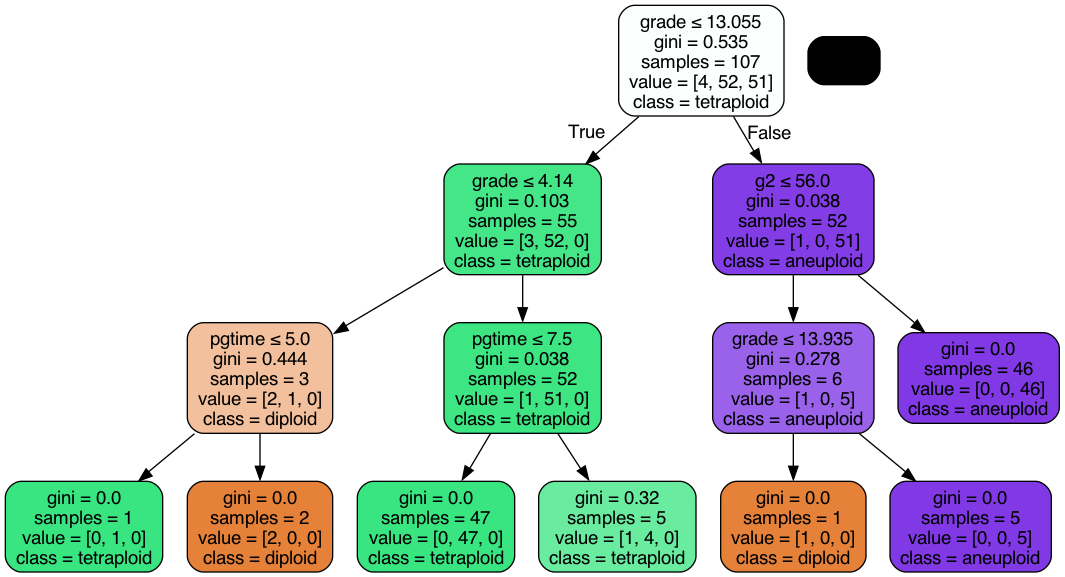

In [442]:
### Tree 시각화
feature_names = feature_columns
target_names = np.array(list(stagec.ploidy.unique()))

dt_dot_data = export_graphviz(dtree_clf, feature_names = feature_names,
                              class_names = target_names,
                              filled=True, rounded =True,
                              special_characters=True)
dt_graph=pydotplus.graph_from_dot_data(dt_dot_data)
Image(dt_graph.create_png())

In [443]:
### Human activity data
# features.txt 파일에는 피처 이름 index와 피처명이 공백으로 분리되어 있음. 이를 DataFrame으로 로드.
feature_name_df = pd.read_csv('./data/human_activity/features.txt', sep='\s+', header=None, names=['column_index','column_name'])

# 피처명 index를 제거하고, 피처명만 리스트 객체로 생성한 뒤 샘플로 10개만 추출
feature_name = feature_name_df.iloc[:, 1].values.tolist()
print('전체 피처명에서 10개만 추출:', feature_name[:10])

전체 피처명에서 10개만 추출: ['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z', 'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z', 'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z', 'tBodyAcc-max()-X']


In [444]:
# feature 중복 확인
feature_dup_df = feature_name_df.groupby('column_name').count()
print(feature_dup_df[feature_dup_df['column_index'] > 1].count())
feature_dup_df[feature_dup_df['column_index'] > 1].head()

column_index    42
dtype: int64


column_index
column_name                               
fBodyAcc-bandsEnergy()-1,16              3
fBodyAcc-bandsEnergy()-1,24              3
fBodyAcc-bandsEnergy()-1,8               3
fBodyAcc-bandsEnergy()-17,24             3
fBodyAcc-bandsEnergy()-17,32             3

In [445]:
def get_new_feature_name_df(old_feature_name_df):
    feature_dup_df = pd.DataFrame(data=old_feature_name_df.groupby('column_name').cumcount(), columns=['dup_cnt'])
    feature_dup_df = feature_dup_df.reset_index()
    new_feature_name_df = pd.merge(old_feature_name_df.reset_index(), feature_dup_df, how='outer')
    new_feature_name_df['column_name'] = new_feature_name_df[['column_name', 'dup_cnt']].apply(lambda x : x[0]+'_'+str(x[1]) if x[1] >0 else x[0] ,  axis=1)
    new_feature_name_df = new_feature_name_df.drop(['index'], axis=1)
    
    return new_feature_name_df

In [446]:
def get_human_dataset( ):
    # 각 데이터 파일들은 공백으로 분리되어 있으므로 read_csv에서 공백 문자를 sep으로 할당.
    feature_name_df = pd.read_csv('./data/human_activity/features.txt', sep='\s+', header=None, names=['column_index','column_name'])
    
    # 중복된 피처명을 수정하는 get_new_feature_name_df()를 이용, 신규 피처명 DataFrame생성. 
    new_feature_name_df = get_new_feature_name_df(feature_name_df)
    
    # DataFrame에 피처명을 컬럼으로 부여하기 위해 리스트 객체로 다시 변환
    feature_name = new_feature_name_df.iloc[:, 1].values.tolist()
    
    # 학습 피처 데이터 셋과 테스트 피처 데이터을 DataFrame으로 로딩. 컬럼명은 feature_name 적용
    X_train = pd.read_csv('./data/human_activity/train/X_train.txt',sep='\s+', names=feature_name)
    X_test = pd.read_csv('./data/human_activity/test/X_test.txt',sep='\s+', names=feature_name)
    
    # 학습 레이블과 테스트 레이블 데이터을 DataFrame으로 로딩하고 컬럼명은 action으로 부여
    y_train = pd.read_csv('./data/human_activity/train/y_train.txt', sep='\s+', header=None, names=['action'])
    y_test = pd.read_csv('./data/human_activity/test/y_test.txt', sep='\s+', header=None, names=['action'])
    
    # 로드된 학습/테스트용 DataFrame을 모두 반환 
    return X_train, X_test, y_train, y_test

x_train, x_test, y_train, y_test = get_human_dataset()

In [447]:
print('## 학습 피처 데이터셋 info()')
print(x_train.info())

## 학습 피처 데이터셋 info()
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 561 entries, tBodyAcc-mean()-X to angle(Z,gravityMean)
dtypes: float64(561)
memory usage: 31.5 MB
None


In [448]:
print(y_train['action'].value_counts())

6    1407
5    1374
4    1286
1    1226
2    1073
3     986
Name: action, dtype: int64


In [449]:
dt_clf = DecisionTreeClassifier(random_state=156)
dt_clf.fit(x_train , y_train)
pred = dt_clf.predict(x_test)
accuracy = accuracy_score(y_test, pred)
print('결정 트리 예측 정확도: {0:.4f}'.format(accuracy))

# DecisionTreeClassifier의 하이퍼 파라미터 추출
print('DecisionTreeClassifier 기본 하이퍼 파라미터:\n', dt_clf.get_params())

결정 트리 예측 정확도: 0.8548
DecisionTreeClassifier 기본 하이퍼 파라미터:
 {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': 156, 'splitter': 'best'}


In [450]:
params = {'max_depth': [6, 8 ,10, 12, 16 ,20, 24]}

grid_cv = GridSearchCV(dt_clf, param_grid=params, scoring='accuracy', cv=5, verbose=1)
grid_cv.fit(x_train , y_train)
print('GridSearchCV 최고 평균 정확도 수치:{0:.4f}'.format(grid_cv.best_score_))
print('GridSearchCV 최적 하이퍼 파라미터:', grid_cv.best_params_)

Fitting 5 folds for each of 7 candidates, totalling 35 fits
GridSearchCV 최고 평균 정확도 수치:0.8513
GridSearchCV 최적 하이퍼 파라미터: {'max_depth': 16}


In [451]:
# GridSearchCV객체의 cv_results_ 속성을 DataFrame으로 생성. 
cv_results_df = pd.DataFrame(grid_cv.cv_results_)

# max_depth 파라미터 값과 그때의 테스트(Evaluation)셋, 학습 데이터 셋의 정확도 수치 추출
cv_results_df[['param_max_depth', 'mean_test_score']]

param_max_depth  mean_test_score
0               6         0.850791
1               8         0.851069
2              10         0.851209
3              12         0.844135
4              16         0.851344
5              20         0.850800
6              24         0.849440

In [452]:
max_depths = [6, 8 ,10, 12, 16 ,20, 24]
# max_depth 값을 변화 시키면서 그때마다 학습과 테스트 셋에서의 예측 성능 측정
for depth in max_depths:
    dt_clf = DecisionTreeClassifier(max_depth=depth, min_samples_split=16, random_state=156)
    dt_clf.fit(x_train , y_train)
    pred = dt_clf.predict(x_test)
    accuracy = accuracy_score(y_test, pred)
    print('max_depth = {0} 정확도: {1:.4f}'.format(depth , accuracy))

max_depth = 6 정확도: 0.8551
max_depth = 8 정확도: 0.8717
max_depth = 10 정확도: 0.8599
max_depth = 12 정확도: 0.8571
max_depth = 16 정확도: 0.8599
max_depth = 20 정확도: 0.8565
max_depth = 24 정확도: 0.8565


In [453]:
params = {
    'max_depth' : [8 , 12, 16, 20], 
    'min_samples_split' : [16, 24]
}

grid_cv = GridSearchCV(dt_clf, param_grid=params, scoring='accuracy', cv=5, verbose=1)
grid_cv.fit(x_train , y_train)
print('GridSearchCV 최고 평균 정확도 수치: {0:.4f}'.format(grid_cv.best_score_))
print('GridSearchCV 최적 하이퍼 파라미터:', grid_cv.best_params_)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
GridSearchCV 최고 평균 정확도 수치: 0.8549
GridSearchCV 최적 하이퍼 파라미터: {'max_depth': 8, 'min_samples_split': 16}


In [454]:
best_df_clf = grid_cv.best_estimator_
pred1 = best_df_clf.predict(x_test)
accuracy = accuracy_score(y_test , pred1)
print('결정 트리 예측 정확도:{0:.4f}'.format(accuracy))

결정 트리 예측 정확도:0.8717


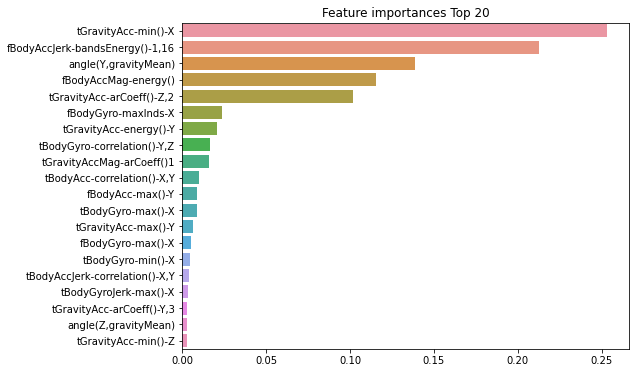

In [455]:
ftr_importances_values = best_df_clf.feature_importances_

# Top 중요도로 정렬을 쉽게 하고, 시본(Seaborn)의 막대그래프로 쉽게 표현하기 위해 Series변환
ftr_importances = pd.Series(ftr_importances_values, index=x_train.columns)
# 중요도값 순으로 Series를 정렬
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]

plt.figure(figsize=(8,6))
plt.title('Feature importances Top 20')
sns.barplot(x=ftr_top20, y=ftr_top20.index)
plt.show()

### (2) DecisionTreeRegressor

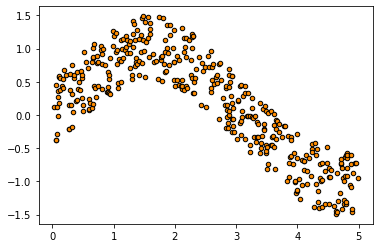

In [456]:
# 임의 데이터 생성하기
np.random.seed(0)
x = np.sort(5 * np.random.rand(400, 1), axis = 0)
T = np.linspace(0, 5, 500)[:, np.newaxis]
y = np.sin(x).ravel()

#노이즈 추가하기
y[::1] +=1 * (0.5 - np.random.rand(400))

plt.scatter(x, y, s=20, edgecolor="black", c="darkorange", label="data")
plt.show()

In [457]:
train_x, test_x, train_y, test_y = train_test_split(x, y, train_size=0.7, random_state=1)
print(train_x.shape, test_x.shape, train_y.shape, test_y.shape)

(280, 1) (120, 1) (280,) (120,)


In [458]:
from sklearn.tree import DecisionTreeRegressor

In [459]:
regr_1 = DecisionTreeRegressor(max_depth=2)
regr_2 = DecisionTreeRegressor(max_depth=5)

In [460]:
y_1 = regr_1.fit(train_x, train_y).predict(test_x)
y_2 = regr_2.fit(train_x, train_y).predict(test_x)

preds = [y_1, y_2]
weights = ["max depth = 2", "max depth = 5"]
evls = ['mse', 'rmse', 'mae']

results = pd.DataFrame(index=weights, columns=evls)
for pred, nm in zip(preds, weights):
    mse = mean_squared_error(test_y, pred)
    mae = mean_absolute_error(test_y, pred)
    rmse = np.sqrt(mse)
    
    results.loc[nm]['mse'] = round(mse,2)
    results.loc[nm]['rmse'] = round(rmse,2)
    results.loc[nm]['mae'] = round(mae,2)

results

mse  rmse   mae
max depth = 2  0.12  0.35  0.29
max depth = 5  0.12  0.35   0.3

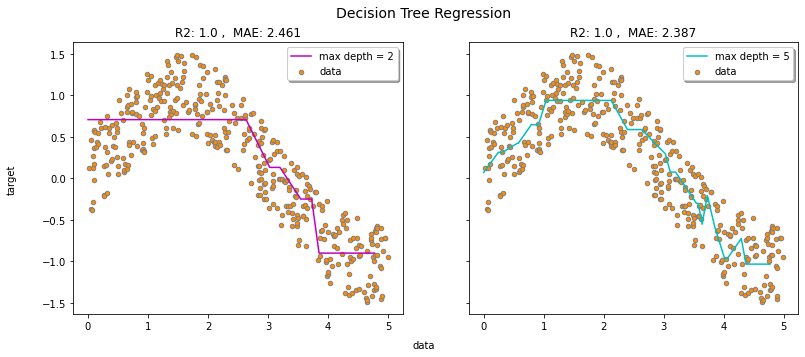

In [461]:
x_test = np.sort(5 * np.random.rand(40, 1), axis=0)

regrs=[regr_1, regr_2]
depths=["max depth = 2", "max depth = 5"]
model_color=["m", "c"]
fig, axes = plt.subplots(nrows=1, ncols=2, sharey=True, figsize=(13, 5))
for ix, regr in enumerate(regrs):
    pred = regr.fit(x, y).predict(x_test)
    r2 = regr.score(x_test, pred)
    mae = mean_absolute_error(x_test, pred)
    
    axes[ix].plot(x_test,
                  pred,
                  color=model_color[ix],
                  label="{}".format(depths[ix])
                 )
    axes[ix].scatter(x, y, 
                     s=20, 
                     edgecolor="gray", 
                     c="darkorange", 
                     label="data")
    axes[ix].legend(loc="upper right",
                   ncol=1,
                   fancybox=True,
                   shadow=True)
    axes[ix].set_title("R2: {r} ,  MAE: {m}".format(r=round(r2,3), m=round(mae, 3)))
    
fig.text(0.5, 0.04, "data", ha="center", va="center")
fig.text(0.06, 0.5, "target", ha="center", va="center", rotation="vertical")
fig.suptitle("Decision Tree Regression", fontsize =14)
plt.show()

In [462]:
# 2차식으로 만든 데이터셋 + 잡음
np.random.seed(42)
m = 200
x = np.random.rand(m, 1)
y = 4 * (x - 0.5) ** 2
y = y + np.random.randn(m, 1) / 10

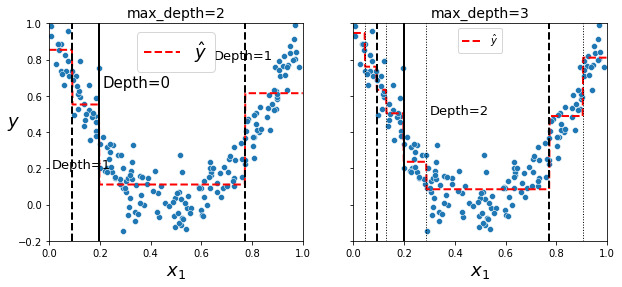

In [463]:
tree_reg1 = DecisionTreeRegressor(random_state=42, max_depth=2)
tree_reg2 = DecisionTreeRegressor(random_state=42, max_depth=3)
tree_reg1.fit(x, y)
tree_reg2.fit(x, y)

def plot_regression_predictions(tree_reg, X, y, axes=[0, 1, -0.2, 1], ylabel="$y$"):
    x1 = np.linspace(axes[0], axes[1], 500)
    y_pred = tree_reg.predict(x1.reshape(-1, 1))
    plt.axis(axes)
    plt.xlabel("$x_1$", fontsize=18)
    if ylabel:
        plt.ylabel(ylabel, fontsize=18, rotation=0)
    sns.scatterplot(X.reshape(1, -1)[0], y.reshape(1, -1)[0])
    sns.lineplot(x1, y_pred, color="red", linestyle="dashed", linewidth=2, label=r"$\hat{y}$")

fig, axes = plt.subplots(ncols=2, figsize=(10, 4), sharey=True)
plt.sca(axes[0])
plot_regression_predictions(tree_reg1, x, y)
for split, style in ((0.1973, "k-"), (0.0917, "k--"), (0.7718, "k--")):
    plt.plot([split, split], [-0.2, 1], style, linewidth=2)
plt.text(0.21, 0.65, "Depth=0", fontsize=15)
plt.text(0.01, 0.2, "Depth=1", fontsize=13)
plt.text(0.65, 0.8, "Depth=1", fontsize=13)
plt.legend(loc="upper center", fontsize=18)
plt.title("max_depth=2", fontsize=14)

plt.sca(axes[1])
plot_regression_predictions(tree_reg2, x, y, ylabel=None)
for split, style in ((0.1973, "k-"), (0.0917, "k--"), (0.7718, "k--")):
    plt.plot([split, split], [-0.2, 1], style, linewidth=2)
for split in (0.0458, 0.1298, 0.2873, 0.9040):
    plt.plot([split, split], [-0.2, 1], "k:", linewidth=1)
plt.text(0.3, 0.5, "Depth=2", fontsize=13)
plt.title("max_depth=3", fontsize=14)

plt.show()

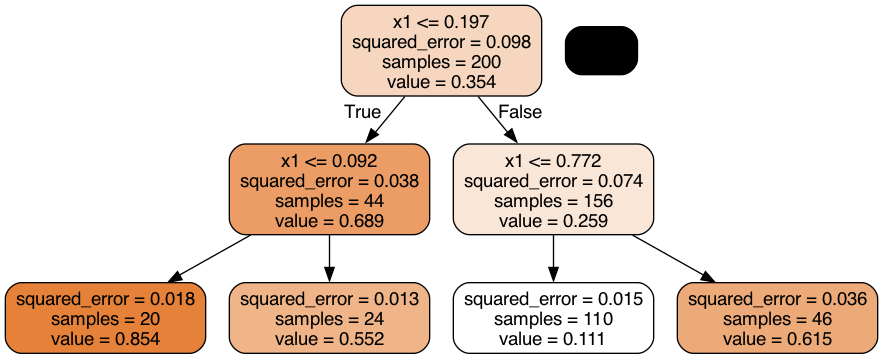

In [464]:
dt_reg = export_graphviz(tree_reg1, feature_names=["x1"], rounded=True, filled=True)
dt_graph = pydotplus.graph_from_dot_data(dt_reg)
Image(dt_graph.create_png())

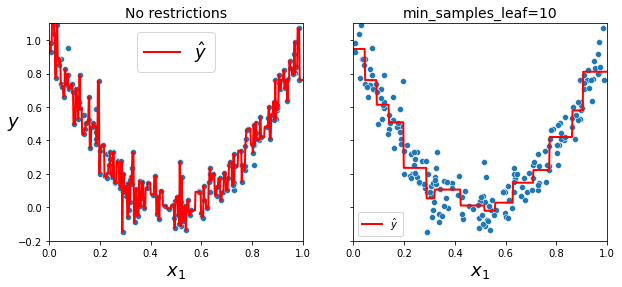

In [465]:
tree_reg1 = DecisionTreeRegressor(random_state=42)
tree_reg2 = DecisionTreeRegressor(random_state=42, min_samples_leaf=10)
tree_reg1.fit(x, y)
tree_reg2.fit(x, y)

x1 = np.linspace(0, 1, 500).reshape(-1, 1)
y_pred1 = tree_reg1.predict(x1)
y_pred2 = tree_reg2.predict(x1)

fig, axes = plt.subplots(ncols=2, figsize=(10, 4), sharey=True)

plt.sca(axes[0])
sns.lineplot(x1.reshape(1, -1)[0], y_pred1, color="red", linewidth=2, label=r"$\hat{y}$")
sns.scatterplot(x.reshape(1, -1)[0], y.reshape(1, -1)[0])
plt.axis([0, 1, -0.2, 1.1])
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", fontsize=18, rotation=0)
plt.legend(loc="upper center", fontsize=18)
plt.title("No restrictions", fontsize=14)

plt.sca(axes[1])
sns.lineplot(x1.reshape(1, -1)[0], y_pred2, color="red", linewidth=2, label=r"$\hat{y}$")
sns.scatterplot(x.reshape(1, -1)[0], y.reshape(1, -1)[0])
plt.axis([0, 1, -0.2, 1.1])
plt.xlabel("$x_1$", fontsize=18)
plt.title("min_samples_leaf={}".format(tree_reg2.min_samples_leaf), fontsize=14)

plt.show()

In [466]:
### air quality data
air = pd.read_csv('./r_csv/datasets/airquality.csv', index_col='Unnamed: 0')
air.head()

Ozone  Solar.R  Wind  Temp  Month  Day
1   41.0    190.0   7.4    67      5    1
2   36.0    118.0   8.0    72      5    2
3   12.0    149.0  12.6    74      5    3
4   18.0    313.0  11.5    62      5    4
5    NaN      NaN  14.3    56      5    5

In [467]:
air = air.dropna()
air.head()

Ozone  Solar.R  Wind  Temp  Month  Day
1   41.0    190.0   7.4    67      5    1
2   36.0    118.0   8.0    72      5    2
3   12.0    149.0  12.6    74      5    3
4   18.0    313.0  11.5    62      5    4
7   23.0    299.0   8.6    65      5    7

In [468]:
train_x, test_x, train_y, test_y = train_test_split(air.drop('Ozone', axis=1), air['Ozone'], train_size=0.8, random_state=1)

In [469]:
regr = DecisionTreeRegressor(max_depth=3)
regr.fit(train_x, train_y)

DecisionTreeRegressor(max_depth=3)

In [470]:
pred = regr.predict(test_x)

mse = mean_squared_error(test_y, pred)
mae = mean_absolute_error(test_y, pred)
rmse = np.sqrt(mse)
r2 = r2_score(test_y, pred)

print(f'mse: {mse}')
print(f'mae: {mae}')
print(f'R2: {r2}')

mse: 326.6441916428406
mae: 13.438405797101451
R2: 0.4602018762954526


In [471]:
### Boston data
x = boston[['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']].values
y = boston['Price'].values

In [472]:
dt_reg = DecisionTreeRegressor(random_state=0, max_depth=4)
neg_mse_scores = cross_val_score(dt_reg, x, y, scoring="neg_mean_squared_error", cv=5)
rmse_scores  = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

print(' 5 교차 검증의 개별 Negative MSE scores: ', np.round(neg_mse_scores, 2))
print(' 5 교차 검증의 개별 RMSE scores : ', np.round(rmse_scores, 2))
print(' 5 교차 검증의 평균 RMSE : {0:.3f} '.format(avg_rmse))

 5 교차 검증의 개별 Negative MSE scores:  [-11.94 -36.25 -33.48 -46.05 -65.56]
 5 교차 검증의 개별 RMSE scores :  [3.46 6.02 5.79 6.79 8.1 ]
 5 교차 검증의 평균 RMSE : 6.029 


<AxesSubplot:>

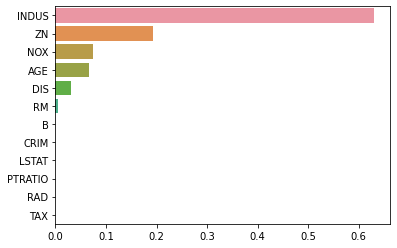

In [473]:
dt_reg.fit(x, y)
feature_series = pd.Series(data=dt_reg.feature_importances_, index=features)
feature_series = feature_series.sort_values(ascending=False)
sns.barplot(x=feature_series, y=feature_series.index)

(100, 2)


<Figure size 432x288 with 0 Axes>

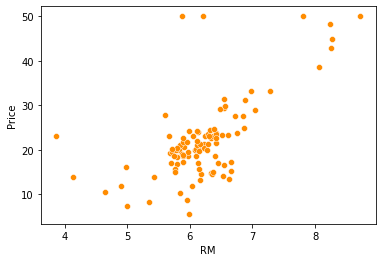

<Figure size 432x288 with 0 Axes>

In [474]:
boston_sample = boston[['RM', 'Price']]
boston_sample = boston_sample.sample(n=100,random_state=0)
print(boston_sample.shape)

sns.scatterplot(boston_sample.RM , boston_sample.Price, color="darkorange")
plt.figure()

In [475]:
rf_reg2 = DecisionTreeRegressor(max_depth=2)
rf_reg7 = DecisionTreeRegressor(max_depth=7)

# 실제 예측을 적용할 테스트용 데이터 셋을 4.5 ~ 8.5 까지 100개 데이터 셋 생성. 
x_test = np.arange(4.5, 8.5, 0.04).reshape(-1, 1)

# 보스턴 주택가격 데이터에서 시각화를 위해 피처는 RM만, 그리고 결정 데이터인 Price 추출
x_feature = boston_sample['RM'].values.reshape(-1, 1)
y_target = boston_sample['Price'].values.reshape(-1, 1)

# 학습과 예측 수행. 
rf_reg2.fit(x_feature, y_target)
rf_reg7.fit(x_feature, y_target)

pred_rf2 = rf_reg2.predict(x_test)
pred_rf7 = rf_reg7.predict(x_test)

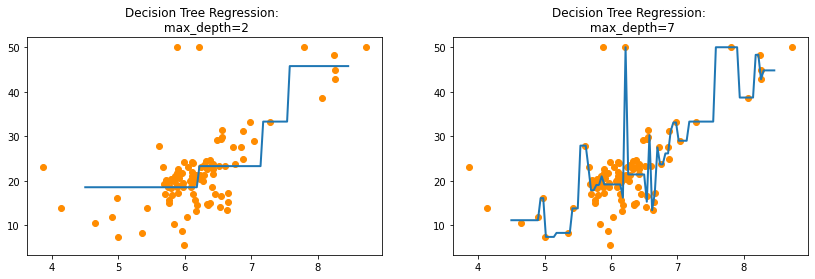

In [476]:
fig , (ax1, ax2) = plt.subplots(figsize=(14, 4), ncols=2)

# X축값을 4.5 ~ 8.5로 변환하며 입력했을 때, 트리 회귀 예측 선 시각화
# DecisionTreeRegressor의 max_depth를 2로 했을 때 회귀 예측선 
ax1.set_title('Decision Tree Regression: \n max_depth=2')
ax1.scatter(boston_sample.RM, boston_sample.Price, c="darkorange")
ax1.plot(x_test, pred_rf2, label="max_depth:3", linewidth=2)

# DecisionTreeRegressor의 max_depth를 7로 했을 때 회귀 예측선 
ax2.set_title('Decision Tree Regression: \n max_depth=7')
ax2.scatter(boston_sample.RM, boston_sample.Price, c="darkorange")
ax2.plot(x_test, pred_rf7, label="max_depth:7", linewidth=2)

## Ensemble models
- 여러 예측 모델을 연결하여 더 강력한 모델을 만드는 것
- 편향, 잡음 및 분산으로 인한 오류를 먹고, Overfitting 방지
- Bagging (Bootstrap aggregating)
    - 크기가 같은 표본을 단순 임의 복원추출하여 여러 개의 모델을 만듦
    - Bootstraping -> Modeling -> Voting
    - 분산이 적은 모델을 만드는 것이 목표이고, 각 과정은 병렬로 이루어짐
- Pasting
    - Bagging과 동일 과정을 거치나, 비복원추출 진행하는 것이 다른 점
    - 성능이 떨어져서 잘 사용하지 않음
- Boosting
    - Bootstrap 샘플링 과정에서, 분류가 잘못된 데이터의 가중치를 높임
    - 예측력이 약한 모델을 결합에 강한 예측모형을 만드는 것
    - Overfitting 위험 있음
- Random Forest
    - Bagging에 랜덤 과정을 추가한 방법
    - 예측변수들을 임의로 추출하여 Bootstrap 샘플 구성
    - input 변수가 많을수록 좋은 성능
- Staking (Stacked generalization)
    - 여러 모델의 예측을 취합하는 새로운 모델(Blender, Meta learner) 훈련
    - 수행 시간 대비 성능이 좋은 편은 아님

### (1) Bagging

#### Classifier

In [477]:
breast = pd.read_csv('./ADP_book_ver01/data/breast-cancer.csv')

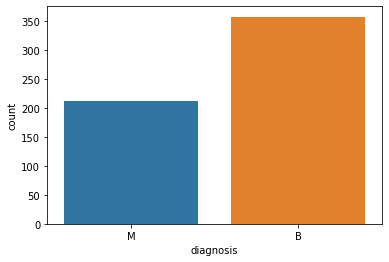

In [478]:
sns.countplot(x='diagnosis', data=breast)
plt.show()

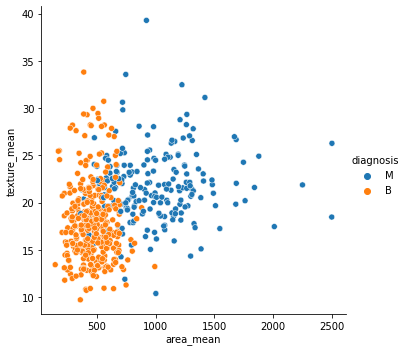

In [479]:
sns.relplot(x='area_mean', y='texture_mean', hue='diagnosis', data=breast)
plt.show()

In [480]:
breast["diagnosis"] = np.where(breast["diagnosis"]=="M", 1, 0) # target 변수 처리
features = ["area_mean", "area_worst"]
x = breast[features]
y = breast["diagnosis"]

In [481]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, stratify=y, random_state=1)
print(x_train.shape, x_test.shape)
print(y_train.shape, y_test.shape)

(398, 2) (171, 2)
(398,) (171,)


In [482]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

In [483]:
### Modeling
clf = BaggingClassifier(base_estimator=DecisionTreeClassifier())
pred = clf.fit(x_train, y_train).predict(x_test)
print("Accuracy Score : ", clf.score(x_test, pred))

Accuracy Score :  1.0


In [484]:
pd.DataFrame(confusion_matrix(y_test, pred),
             index=['True[0]', 'True[1]'],
             columns=['Pred[0]','Pred[1]'])

Pred[0]  Pred[1]
True[0]      103        4
True[1]        9       55

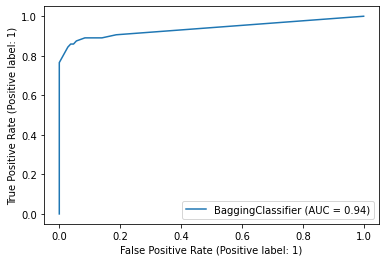

In [485]:
plot_roc_curve(clf, x_test, y_test)
plt.show()

In [486]:
### oob_score
# Out of bag
# Bootstrap 시 선택되지 않은 데이터로 평가한 결과
clf_oob = BaggingClassifier(base_estimator=DecisionTreeClassifier(), oob_score=True)
oob = clf_oob.fit(x, y).oob_score_
print(oob)

0.9191564147627417


In [487]:
### iris data
x = iris.drop('Class', axis=1)
y = iris['Class']

In [488]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y, random_state=1)
print(x_train.shape, x_test.shape)
print(y_train.shape, y_test.shape)

(80, 4) (20, 4)
(80,) (20,)


In [489]:
### Modeling
clf = BaggingClassifier(base_estimator=DecisionTreeClassifier())
pred = clf.fit(x_train, y_train).predict(x_test)
print("Accuracy Score : ", clf.score(x_test, pred))

Accuracy Score :  1.0


In [490]:
pd.DataFrame(confusion_matrix(y_test, pred),
             index=['True[0]', 'True[1]'],
             columns=['Pred[0]','Pred[1]'])

Pred[0]  Pred[1]
True[0]       10        0
True[1]        1        9

In [491]:
x, y = make_moons(n_samples=500, noise=0.30, random_state=42)
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42)

In [492]:
bag_clf = BaggingClassifier(
    DecisionTreeClassifier(), n_estimators=500,
    max_samples=100, bootstrap=True, random_state=42)
bag_clf.fit(x_train, y_train)
y_pred = bag_clf.predict(x_test)

In [493]:
print(accuracy_score(y_test, y_pred)) # Bagging accuracy

0.904


In [494]:
tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(x_train, y_train)
y_pred_tree = tree_clf.predict(x_test)
print(accuracy_score(y_test, y_pred_tree))

0.856


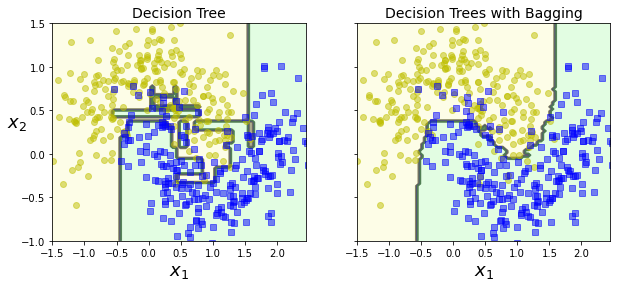

In [495]:
def plot_decision_boundary(clf, X, y, axes=[-1.5, 2.45, -1, 1.5], alpha=0.5, contour=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if contour:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", alpha=alpha)
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", alpha=alpha)
    plt.axis(axes)
    plt.xlabel(r"$x_1$", fontsize=18)
    plt.ylabel(r"$x_2$", fontsize=18, rotation=0)
    
fig, axes = plt.subplots(ncols=2, figsize=(10,4), sharey=True)
plt.sca(axes[0])
plot_decision_boundary(tree_clf, x, y)
plt.title("Decision Tree", fontsize=14)
plt.sca(axes[1])
plot_decision_boundary(bag_clf, x, y)
plt.title("Decision Trees with Bagging", fontsize=14)
plt.ylabel("")
plt.show()

In [496]:
bag_clf = BaggingClassifier(
    DecisionTreeClassifier(), n_estimators=500,
    bootstrap=True, oob_score=True, random_state=40) # oob_score option 활성화

bag_clf.fit(x_train, y_train)
bag_clf.oob_score_

0.8986666666666666

In [497]:
bag_clf.oob_decision_function_[:10]

array([[0.32, 0.68],
       [0.34, 0.66],
       [1.  , 0.  ],
       [0.  , 1.  ],
       [0.  , 1.  ],
       [0.09, 0.91],
       [0.31, 0.69],
       [0.02, 0.98],
       [0.97, 0.03],
       [0.98, 0.02]])

In [498]:
y_pred = bag_clf.predict(x_test)
accuracy_score(y_test, y_pred)

0.912

#### Regressor

In [499]:
car = pd.read_csv('./ADP_book_ver01/data/CarPrice_Assignment.csv')
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [500]:
car_num = car.select_dtypes(['number'])
features = list(car_num.columns.difference(['car_ID', 'symboling', 'price']))
x = car_num[features]
y = car_num['price']
print(x.shape, y.shape)

(205, 13) (205,)


In [501]:
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor

In [502]:
reg = BaggingRegressor(base_estimator=DecisionTreeRegressor(), oob_score=True)
reg = reg.fit(x, y)
reg.oob_score_

0.8859047952850826

### (2) Boosting

#### AdaBoost - Classifier

In [503]:
features = ["area_mean", "texture_mean"]
x = breast[features]
y = breast["diagnosis"]

In [504]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, stratify=y, random_state=1)
print(x_train.shape, x_test.shape)
print(y_train.shape, y_test.shape)

(398, 2) (171, 2)
(398,) (171,)


In [505]:
from sklearn.ensemble import AdaBoostClassifier

In [506]:
clf = AdaBoostClassifier(base_estimator=None)
pred = clf.fit(x_train, y_train).predict(x_test)
print("정확도 : ", clf.score(x_test, y_test))

정확도 :  0.9122807017543859


In [507]:
pred = clf.predict(x_test)
test_cm = confusion_matrix(y_test, pred)
test_acc = accuracy_score(y_test, pred)
test_prc = precision_score(y_test, pred)
test_rcll = recall_score(y_test, pred)
test_f1 = f1_score(y_test, pred)

print(test_cm)
print('\n')
print('정확도\t{}%'.format(round(test_acc * 100, 2)))
print('정밀도\t{}%'.format(round(test_prc * 100, 2)))
print('재현율\t{}%'.format(round(test_rcll * 100, 2)))
print('F1\t{}%'.format(round(test_f1 * 100, 2)))

[[102   5]
 [ 10  54]]


정확도	91.23%
정밀도	91.53%
재현율	84.38%
F1	87.8%


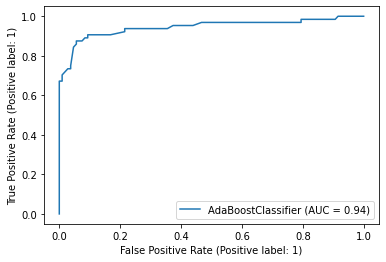

In [508]:
plot_roc_curve(clf, x_test, y_test)
plt.show()

In [509]:
importances = clf.feature_importances_
column_nm = pd.DataFrame(["area_mean", "texture_mean"])
feature_importances = pd.concat([column_nm,
                                 pd.DataFrame(importances)],
                                axis=1)
feature_importances.columns = ['feature_nm', 'importances']
print(feature_importances)

     feature_nm  importances
0     area_mean         0.56
1  texture_mean         0.44


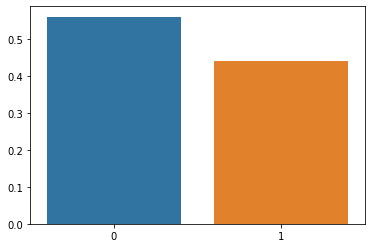

In [510]:
f = features
xtick_label_position = list(range(len(f)))
plt.xticks(xtick_label_position, f)
sns.barplot([x for x in range(len(importances))], importances)
plt.show()

In [511]:
### iris data
x = iris.drop('Class', axis=1)
y = iris['Class']

In [512]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y, random_state=1)
print(x_train.shape, x_test.shape)
print(y_train.shape, y_test.shape)

(80, 4) (20, 4)
(80,) (20,)


In [513]:
clf = AdaBoostClassifier(base_estimator=None)
pred = clf.fit(x_train, y_train).predict(x_test)
print("정확도 : ", clf.score(x_test, y_test))

정확도 :  0.95


In [514]:
pred = clf.predict(x_test)
test_cm = confusion_matrix(y_test, pred)
test_acc = accuracy_score(y_test, pred)

print(test_cm)
print('\n')
print('정확도\t{}%'.format(round(test_acc * 100, 2)))

[[10  0]
 [ 1  9]]


정확도	95.0%


In [515]:
importances = clf.feature_importances_
importances

array([0.16, 0.26, 0.18, 0.4 ])

#### AdaBoost - Regressor

In [516]:
car_num = car.select_dtypes(['number'])
features = list(car_num.columns.difference(['car_ID', 'symboling', 'price']))
x = car_num[features]
y = car_num['price']

In [517]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(143, 13)
(62, 13)
(143,)
(62,)


In [518]:
from sklearn.ensemble import AdaBoostRegressor

In [519]:
reg = AdaBoostRegressor(base_estimator=None)
pred = reg.fit(x_train, y_train).predict(x_test)

In [520]:
mse = mean_squared_error(y_test, pred)
mae = mean_absolute_error(y_test, pred)
rmse = np.sqrt(mse)
acc = reg.score(x_test, y_test)

print('MSE\t{}'.format(round(mse, 3)))
print('MAE\t{}'.format(round(mae, 3)))
print('RMSE\t{}'.format(round(rmse, 3)))
print('ACC\t{}%'.format(round(acc * 100, 3)))

MSE	5794172.428
MAE	1806.091
RMSE	2407.109
ACC	90.402%


In [521]:
importances = reg.feature_importances_
column_nm = pd.DataFrame(features)
feature_importances = pd.concat([column_nm,
                                 pd.DataFrame(importances)],
                                axis=1)
feature_importances.columns = ['feature_nm', 'importances']
print(feature_importances)

          feature_nm  importances
0          boreratio     0.011453
1          carheight     0.004992
2          carlength     0.006395
3           carwidth     0.065532
4            citympg     0.007420
5   compressionratio     0.003485
6         curbweight     0.073641
7         enginesize     0.636674
8         highwaympg     0.059167
9         horsepower     0.087963
10           peakrpm     0.007369
11            stroke     0.008376
12         wheelbase     0.027531


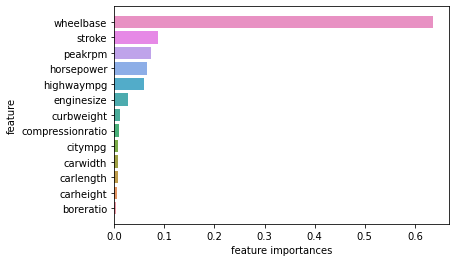

In [522]:
n_features = x_train.shape[1]
importances = pd.Series(reg.feature_importances_, index=x_train.columns).sort_values()
column_nm = features

sns.barplot(x=importances, y=column_nm)
plt.yticks(np.arange(n_features), column_nm)
plt.xlabel("feature importances")
plt.ylabel("feature")
plt.ylim(-1, n_features)
plt.show()

#### Gradient Boosting
- Gradient descent를 이용하여 오류 데이터 가중치 업데이트
- 트리 기반 모델 사용

##### GBM-Classifier

In [523]:
from sklearn.ensemble import GradientBoostingClassifier

In [524]:
x_train, x_test, y_train, y_test = get_human_dataset()

# GBM 수행 시간 측정을 위함. 시작 시간 설정.
start_time = time.time()

gb_clf = GradientBoostingClassifier(random_state=0)
gb_clf.fit(x_train , y_train)
gb_pred = gb_clf.predict(x_test)
gb_accuracy = accuracy_score(y_test, gb_pred)

print('GBM 정확도: {0:.4f}'.format(gb_accuracy))
print("GBM 수행 시간: {0:.1f} 초 ".format(time.time() - start_time))

GBM 정확도: 0.9393
GBM 수행 시간: 861.1 초 


In [525]:
### 아래는 책에서 설명드리지는 않지만 GridSearchCV로 GBM의 하이퍼 파라미터 튜닝을 수행하는 예제 입니다. 
### 사이킷런이 1.X로 업그레이드 되며서 GBM의 학습 속도가 현저하게 저하되는 문제가 오히려 발생합니다. 
### 아래는 수행 시간이 오래 걸리므로 참고용으로만 사용하시면 좋을 것 같습니다. 
# params = {
#     'n_estimators': [100, 500],
#     'learning_rate': [0.05, 0.1]
# }
# grid_cv = GridSearchCV(gb_clf, param_grid=params, cv=2 ,verbose=1)
# grid_cv.fit(x_train , y_train)
# print('최적 하이퍼 파라미터:\n', grid_cv.best_params_)
# print('최고 예측 정확도: {0:.4f}'.format(grid_cv.best_score_))

In [526]:
# GridSearchCV를 이용하여 최적으로 학습된 estimator로 predict 수행. 
# gb_pred = grid_cv.best_estimator_.predict(x_test)
# gb_accuracy = accuracy_score(y_test, gb_pred)
# print('GBM 정확도: {0:.4f}'.format(gb_accuracy))

##### GBM-Regressor

In [527]:
np.random.seed(42)
x = np.random.rand(100, 1) - 0.5
y = 3*x[:, 0]**2 + 0.05 * np.random.randn(100)

In [528]:
from sklearn.ensemble import GradientBoostingRegressor

In [529]:
gbrt = GradientBoostingRegressor(max_depth=2, n_estimators=3, learning_rate=1.0, random_state=42)
gbrt.fit(x, y)

GradientBoostingRegressor(learning_rate=1.0, max_depth=2, n_estimators=3,
                          random_state=42)

In [530]:
gbrt_slow = GradientBoostingRegressor(max_depth=2, n_estimators=200, learning_rate=0.1, random_state=42)
gbrt_slow.fit(x, y)

GradientBoostingRegressor(max_depth=2, n_estimators=200, random_state=42)

In [531]:
def plot_predictions(regressors, X, y, axes, label=None, style="r-", data_style="b.", data_label=None):
    x1 = np.linspace(axes[0], axes[1], 500)
    y_pred = sum(regressor.predict(x1.reshape(-1, 1)) for regressor in regressors)
    plt.plot(X[:, 0], y, data_style, label=data_label)
    plt.plot(x1, y_pred, style, linewidth=2, label=label)
    if label or data_label:
        plt.legend(loc="upper center", fontsize=16)
    plt.axis(axes)

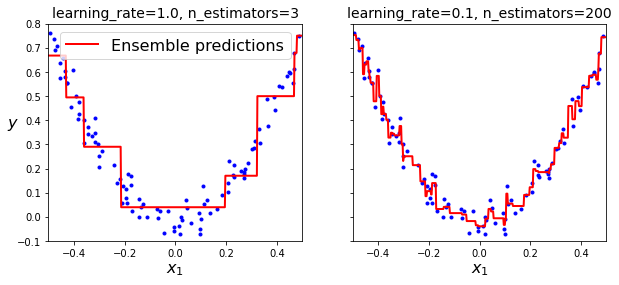

In [532]:
fig, axes = plt.subplots(ncols=2, figsize=(10,4), sharey=True)

plt.sca(axes[0])
plot_predictions([gbrt], x, y, axes=[-0.5, 0.5, -0.1, 0.8], label="Ensemble predictions")
plt.title("learning_rate={}, n_estimators={}".format(gbrt.learning_rate, gbrt.n_estimators), fontsize=14)
plt.xlabel("$x_1$", fontsize=16)
plt.ylabel("$y$", fontsize=16, rotation=0)

plt.sca(axes[1])
plot_predictions([gbrt_slow], x, y, axes=[-0.5, 0.5, -0.1, 0.8])
plt.title("learning_rate={}, n_estimators={}".format(gbrt_slow.learning_rate, gbrt_slow.n_estimators), fontsize=14)
plt.xlabel("$x_1$", fontsize=16)
plt.show()

In [533]:
### Early stopping
x_train, x_val, y_train, y_val = train_test_split(x, y, random_state=49)

gbrt = GradientBoostingRegressor(max_depth=2, n_estimators=120, random_state=42)
gbrt.fit(x_train, y_train)

errors = [mean_squared_error(y_val, y_pred) for y_pred in gbrt.staged_predict(x_val)]
bst_n_estimators = np.argmin(errors) + 1

gbrt_best = GradientBoostingRegressor(max_depth=2, n_estimators=bst_n_estimators, random_state=42)
gbrt_best.fit(x_train, y_train)

GradientBoostingRegressor(max_depth=2, n_estimators=56, random_state=42)

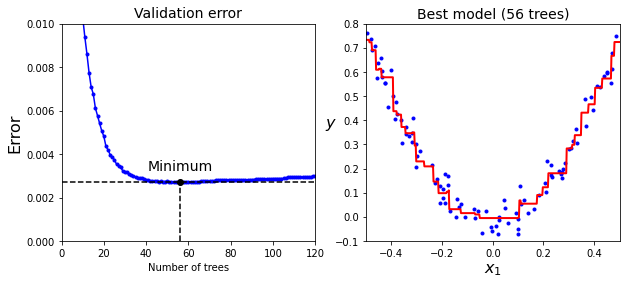

In [534]:
min_error = np.min(errors)

plt.figure(figsize=(10, 4))
plt.subplot(121)
plt.plot(np.arange(1, len(errors) + 1), errors, "b.-")
plt.plot([bst_n_estimators, bst_n_estimators], [0, min_error], "k--")
plt.plot([0, 120], [min_error, min_error], "k--")
plt.plot(bst_n_estimators, min_error, "ko")
plt.text(bst_n_estimators, min_error*1.2, "Minimum", ha="center", fontsize=14)
plt.axis([0, 120, 0, 0.01])
plt.xlabel("Number of trees")
plt.ylabel("Error", fontsize=16)
plt.title("Validation error", fontsize=14)

plt.subplot(122)
plot_predictions([gbrt_best], x, y, axes=[-0.5, 0.5, -0.1, 0.8])
plt.title("Best model (%d trees)" % bst_n_estimators, fontsize=14)
plt.ylabel("$y$", fontsize=16, rotation=0)
plt.xlabel("$x_1$", fontsize=16)

plt.show()

In [535]:
# 유예가 있는 Early stopping
gbrt = GradientBoostingRegressor(max_depth=2, warm_start=True, random_state=42)

min_error = float("inf")
error_going_up = 0
for n_estimators in range(1, 120):
    gbrt.n_estimators = n_estimators
    gbrt.fit(x_train, y_train)
    y_pred = gbrt.predict(x_val)
    val_error = mean_squared_error(y_val, y_pred)
    if val_error < min_error:
        min_error = val_error
        error_going_up = 0
    else:
        error_going_up += 1
        if error_going_up == 5:
            break  # early stopping

In [536]:
print(gbrt.n_estimators)

61


In [537]:
print("Minimum validation MSE:", min_error)

Minimum validation MSE: 0.002712853325235463


##### XGBoost-Classifier
- eXtra Gradient Boost

In [538]:
# !pip install xgboost
import xgboost as xgb
from xgboost import plot_importance
from xgboost import XGBClassifier

In [539]:
dataset = load_breast_cancer()
x_features= dataset.data
y_label = dataset.target

cancer_df = pd.DataFrame(data=x_features, columns=dataset.feature_names)
cancer_df['target']= y_label
cancer_df.head(3)

mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38           122.8     1001.0          0.11840   
1        20.57         17.77           132.9     1326.0          0.08474   
2        19.69         21.25           130.0     1203.0          0.10960   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0                 0.07871  ...          17.33            184.6      2019.0   
1                 0.05667  ...          23.41            158.8      1956.0   
2                 0.05999  ...          25.53            152.5      1709.0   

   worst smoothness  worst compactness  worst concavity  worst concave points  \
0            0.1622             0.6656           0.7119                0.2654   
1            0.1238             0.1866           0.2416                0.1860   
2            0.1444             0.4245           0.4504                0.2430   

   worst symmetry  worst fractal dimension  target  
0          0.4601                  0.11890       0  
1          0.2750                  0.08902       0  
2          0.3613                  0.08758       0  

[3 rows x 31 columns]

In [540]:
print(dataset.target_names)
print(cancer_df['target'].value_counts())

['malignant' 'benign']
1    357
0    212
Name: target, dtype: int64


In [541]:
# cancer_df에서 feature용 DataFrame과 Label용 Series 객체 추출
# 맨 마지막 칼럼이 Label임. Feature용 DataFrame은 cancer_df의 첫번째 칼럼에서 맨 마지막 두번째 칼럼까지를 :-1 슬라이싱으로 추출.
x_features = cancer_df.iloc[:, :-1]
y_label = cancer_df.iloc[:, -1]

# 전체 데이터 중 80%는 학습용 데이터, 20%는 테스트용 데이터 추출
x_train, x_test, y_train, y_test=train_test_split(x_features, y_label, test_size=0.2, random_state=156)

In [542]:
xgb_wrapper = xgb.XGBClassifier(n_estimators=40, learning_rate=0.1, max_depth=3)
xgb_wrapper.fit(x_train, y_train)
w_preds = xgb_wrapper.predict(x_test)
w_pred_proba = xgb_wrapper.predict_proba(x_test)[:, 1]

In [543]:
get_clf_eval(y_test, w_preds, w_pred_proba)

오차 행렬
[[34  3]
 [ 2 75]]
정확도: 0.9561, 정밀도: 0.9615, 재현율: 0.9740, F1: 0.9677, AUC:0.9951


In [544]:
xgb_wrapper = xgb.XGBClassifier(n_estimators=40, learning_rate=0.1, max_depth=3)
evals = [(x_test, y_test)]
xgb_wrapper.fit(x_train, y_train, early_stopping_rounds=10, eval_metric="logloss", eval_set=evals, verbose=True)

ws100_preds = xgb_wrapper.predict(x_test)
ws100_pred_proba = xgb_wrapper.predict_proba(x_test)[:, 1]

[0]	validation_0-logloss:0.61352
[1]	validation_0-logloss:0.54784
[2]	validation_0-logloss:0.49425
[3]	validation_0-logloss:0.44799
[4]	validation_0-logloss:0.40911
[5]	validation_0-logloss:0.37498
[6]	validation_0-logloss:0.34571
[7]	validation_0-logloss:0.32053
[8]	validation_0-logloss:0.29721
[9]	validation_0-logloss:0.27799
[10]	validation_0-logloss:0.26030
[11]	validation_0-logloss:0.24604
[12]	validation_0-logloss:0.23156
[13]	validation_0-logloss:0.22005
[14]	validation_0-logloss:0.20857
[15]	validation_0-logloss:0.19999
[16]	validation_0-logloss:0.19012
[17]	validation_0-logloss:0.18182
[18]	validation_0-logloss:0.17473
[19]	validation_0-logloss:0.16766
[20]	validation_0-logloss:0.15820
[21]	validation_0-logloss:0.15472
[22]	validation_0-logloss:0.14895
[23]	validation_0-logloss:0.14331
[24]	validation_0-logloss:0.13634
[25]	validation_0-logloss:0.13278
[26]	validation_0-logloss:0.12791
[27]	validation_0-logloss:0.12526
[28]	validation_0-logloss:0.11998
[29]	validation_0-loglos

In [545]:
get_clf_eval(y_test, ws100_preds, ws100_pred_proba)

오차 행렬
[[34  3]
 [ 2 75]]
정확도: 0.9561, 정밀도: 0.9615, 재현율: 0.9740, F1: 0.9677, AUC:0.9951


<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

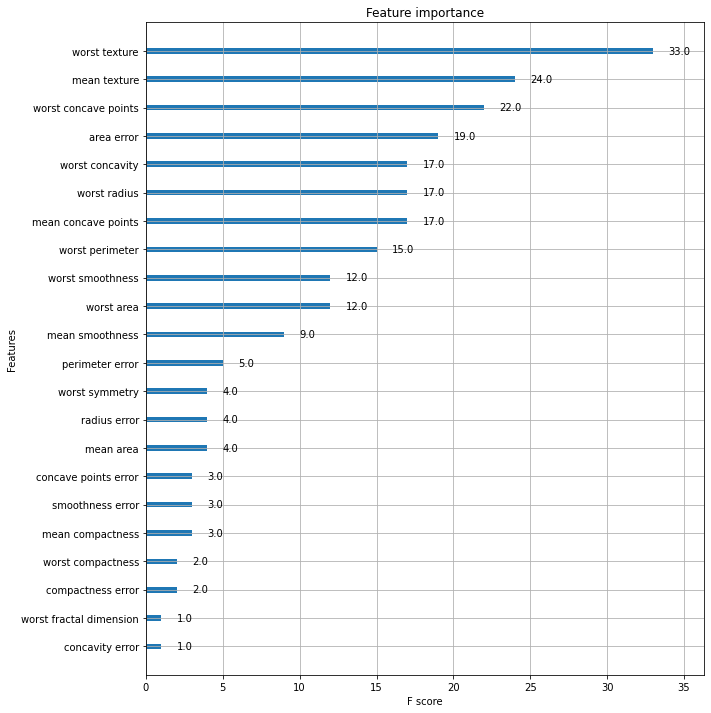

In [546]:
fig, ax = plt.subplots(figsize=(10, 12)) 
plot_importance(xgb_wrapper, ax=ax)

In [547]:
### Bayesian optimization
# max_depth는 5에서 20까지 1간격으로, min_child_weight는 1에서 2까지 1간격으로
# colsample_bytree는 0.5에서 1사이, learning_rate는 0.01에서 0.2 사이 정규 분포된 값으로 검색.
xgb_search_space = {'max_depth': hp.quniform('max_depth', 5, 20, 1), 
                    'min_child_weight': hp.quniform('min_child_weight', 1, 2, 1),
                    'learning_rate': hp.uniform('learning_rate', 0.01, 0.2),
                    'colsample_bytree': hp.uniform('colsample_bytree', 0.5, 1)}

In [548]:
# fmin()에서 입력된 search_space 값으로 입력된 모든 값은 실수형임.
# XGBClassifier의 정수형 하이퍼 파라미터는 정수형 변환을 해줘야 함.
# 정확도는 높을수록 더 좋은 수치임. -1 * 정확도를 곱해서 큰 정확도 값일수록 최소가 되도록 변환
def objective_func(search_space):
    # 수행 시간 절약을 위해 nestimators는 100으로 축소
    xgb_clf = XGBClassifier(n_estimators=100, max_depth=int(search_space['max_depth']),
                            min_child_weight=int(search_space['min_child_weight']),
                            learning_rate=search_space['learning_rate'],
                            colsample_bytree=search_space['colsample_bytree'],
                            eval_metric='logloss')
    accuracy = cross_val_score(xgb_clf, x_train, y_train, scoring='accuracy', cv=3)
    
    # accuracy는 cv=3 개수만큼 roc-auc 결과를 리스트로 가짐. 이를 평균해서 반환하되 -1을 곱함.
    return {'loss':-1 * np.mean(accuracy), 'status': STATUS_OK}


In [549]:
trial_val = Trials()
best = fmin(fn=objective_func,
            space=xgb_search_space,
            algo=tpe.suggest,
            max_evals=50, # 최대 반복 횟수를 지정합니다.
            trials=trial_val, rstate=np.random.default_rng(seed=9))
print('best:', best)

100%|████████████████████████████████████████████████████████| 50/50 [00:13<00:00,  3.76trial/s, best loss: -0.9692401533635412]
best: {'colsample_bytree': 0.548301545497125, 'learning_rate': 0.1840281762576621, 'max_depth': 18.0, 'min_child_weight': 2.0}


In [550]:
print('colsample_bytree:{0}, learning_rate:{1}, max_depth:{2}, min_child_weight:{3}'.format(
    round(best['colsample_bytree'], 5), round(best['learning_rate'], 5),
    int(best['max_depth']), int(best['min_child_weight'])))

colsample_bytree:0.5483, learning_rate:0.18403, max_depth:18, min_child_weight:2


In [551]:
xgb_wrapper = XGBClassifier(n_estimators=400,
                            learning_rate=round(best['learning_rate'], 5),
                            max_depth=int(best['max_depth']),
                            min_child_weight=int(best['min_child_weight']),
                            colsample_bytree=round(best['colsample_bytree'], 5)
                           )

evals = [(x_test, y_test)]
xgb_wrapper.fit(x_train, y_train, early_stopping_rounds=50, eval_metric='logloss',
                eval_set=evals, verbose=True)

preds = xgb_wrapper.predict(x_test)
pred_proba = xgb_wrapper.predict_proba(x_test)[:, 1]

get_clf_eval(y_test, preds, pred_proba)

[0]	validation_0-logloss:0.55589
[1]	validation_0-logloss:0.45931
[2]	validation_0-logloss:0.38810
[3]	validation_0-logloss:0.33142
[4]	validation_0-logloss:0.29020
[5]	validation_0-logloss:0.25921
[6]	validation_0-logloss:0.23350
[7]	validation_0-logloss:0.21451
[8]	validation_0-logloss:0.19965
[9]	validation_0-logloss:0.18635
[10]	validation_0-logloss:0.17603
[11]	validation_0-logloss:0.16677
[12]	validation_0-logloss:0.15963
[13]	validation_0-logloss:0.15370
[14]	validation_0-logloss:0.14650
[15]	validation_0-logloss:0.13967
[16]	validation_0-logloss:0.13696
[17]	validation_0-logloss:0.13422
[18]	validation_0-logloss:0.12932
[19]	validation_0-logloss:0.12861
[20]	validation_0-logloss:0.12518
[21]	validation_0-logloss:0.12045
[22]	validation_0-logloss:0.11971
[23]	validation_0-logloss:0.11918
[24]	validation_0-logloss:0.11717
[25]	validation_0-logloss:0.11652
[26]	validation_0-logloss:0.11605
[27]	validation_0-logloss:0.11693
[28]	validation_0-logloss:0.11714
[29]	validation_0-loglos

In [552]:
### Santander bank data
cust_df = pd.read_csv("./data/train_santander.csv", encoding='latin-1')
print('dataset shape:', cust_df.shape)
cust_df.head(3)

dataset shape: (76020, 371)


ID  var3  var15  imp_ent_var16_ult1  imp_op_var39_comer_ult1  \
0   1     2     23                 0.0                      0.0   
1   3     2     34                 0.0                      0.0   
2   4     2     23                 0.0                      0.0   

   imp_op_var39_comer_ult3  imp_op_var40_comer_ult1  imp_op_var40_comer_ult3  \
0                      0.0                      0.0                      0.0   
1                      0.0                      0.0                      0.0   
2                      0.0                      0.0                      0.0   

   imp_op_var40_efect_ult1  imp_op_var40_efect_ult3  ...  \
0                      0.0                      0.0  ...   
1                      0.0                      0.0  ...   
2                      0.0                      0.0  ...   

   saldo_medio_var33_hace2  saldo_medio_var33_hace3  saldo_medio_var33_ult1  \
0                      0.0                      0.0                     0.0   
1                      0.0                      0.0                     0.0   
2                      0.0                      0.0                     0.0   

   saldo_medio_var33_ult3  saldo_medio_var44_hace2  saldo_medio_var44_hace3  \
0                     0.0                      0.0                      0.0   
1                     0.0                      0.0                      0.0   
2                     0.0                      0.0                      0.0   

   saldo_medio_var44_ult1  saldo_medio_var44_ult3     var38  TARGET  
0                     0.0                     0.0  39205.17       0  
1                     0.0                     0.0  49278.03       0  
2                     0.0                     0.0  67333.77       0  

[3 rows x 371 columns]

In [553]:
print(cust_df['TARGET'].value_counts())
unsatisfied_cnt = cust_df[cust_df['TARGET'] == 1].TARGET.count()
total_cnt = cust_df.TARGET.count()
print('unsatisfied 비율은 {0:.2f}'.format((unsatisfied_cnt / total_cnt)))

0    73012
1     3008
Name: TARGET, dtype: int64
unsatisfied 비율은 0.04


In [554]:
cust_df.describe()

ID           var3         var15  imp_ent_var16_ult1  \
count   76020.000000   76020.000000  76020.000000        76020.000000   
mean    75964.050723   -1523.199277     33.212865           86.208265   
std     43781.947379   39033.462364     12.956486         1614.757313   
min         1.000000 -999999.000000      5.000000            0.000000   
25%     38104.750000       2.000000     23.000000            0.000000   
50%     76043.000000       2.000000     28.000000            0.000000   
75%    113748.750000       2.000000     40.000000            0.000000   
max    151838.000000     238.000000    105.000000       210000.000000   

       imp_op_var39_comer_ult1  imp_op_var39_comer_ult3  \
count             76020.000000             76020.000000   
mean                 72.363067               119.529632   
std                 339.315831               546.266294   
min                   0.000000                 0.000000   
25%                   0.000000                 0.000000   
50%                   0.000000                 0.000000   
75%                   0.000000                 0.000000   
max               12888.030000             21024.810000   

       imp_op_var40_comer_ult1  imp_op_var40_comer_ult3  \
count             76020.000000             76020.000000   
mean                  3.559130                 6.472698   
std                  93.155749               153.737066   
min                   0.000000                 0.000000   
25%                   0.000000                 0.000000   
50%                   0.000000                 0.000000   
75%                   0.000000                 0.000000   
max                8237.820000             11073.570000   

       imp_op_var40_efect_ult1  imp_op_var40_efect_ult3  ...  \
count             76020.000000             76020.000000  ...   
mean                  0.412946                 0.567352  ...   
std                  30.604864                36.513513  ...   
min                   0.000000                 0.000000  ...   
25%                   0.000000                 0.000000  ...   
50%                   0.000000                 0.000000  ...   
75%                   0.000000                 0.000000  ...   
max                6600.000000              6600.000000  ...   

       saldo_medio_var33_hace2  saldo_medio_var33_hace3  \
count             76020.000000             76020.000000   
mean                  7.935824                 1.365146   
std                 455.887218               113.959637   
min                   0.000000                 0.000000   
25%                   0.000000                 0.000000   
50%                   0.000000                 0.000000   
75%                   0.000000                 0.000000   
max               50003.880000             20385.720000   

       saldo_medio_var33_ult1  saldo_medio_var33_ult3  \
count            76020.000000            76020.000000   
mean                12.215580                8.784074   
std                783.207399              538.439211   
min                  0.000000                0.000000   
25%                  0.000000                0.000000   
50%                  0.000000                0.000000   
75%                  0.000000                0.000000   
max             138831.630000            91778.730000   

       saldo_medio_var44_hace2  saldo_medio_var44_hace3  \
count             76020.000000             76020.000000   
mean                 31.505324                 1.858575   
std                2013.125393               147.786584   
min                   0.000000                 0.000000   
25%                   0.000000                 0.000000   
50%                   0.000000                 0.000000   
75%                   0.000000                 0.000000   
max              438329.220000             24650.010000   

       saldo_medio_var44_ult1  saldo_medio_var44_ult3         var38  \
count            76020.000000            76020.000000  7.602000e+04   

In [555]:
cust_df['var3'].value_counts()

 2         74165
 8           138
-999999      116
 9           110
 3           108
           ...  
 231           1
 188           1
 168           1
 135           1
 87            1
Name: var3, Length: 208, dtype: int64

In [557]:
# var3 피처 값 대체 및 ID 피처 드롭
cust_df['var3'].replace(-999999, 2, inplace=True)
cust_df.drop('ID', axis=1, inplace=True)

# 피처 세트와 레이블 세트분리. 레이블 컬럼은 DataFrame의 맨 마지막에 위치해 컬럼 위치 -1로 분리
x_features = cust_df.iloc[:, :-1]
y_labels = cust_df.iloc[:, -1]
print('피처 데이터 shape:{0}'.format(x_features.shape))

KeyError: "['ID'] not found in axis"

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_features, y_labels, test_size=0.2, random_state=0)

train_cnt = y_train.count()
test_cnt = y_test.count()

print('학습 세트 Shape:{0}, 테스트 세트 Shape:{1}'.format(x_train.shape, x_test.shape))

print(' 학습 세트 레이블 값 분포 비율')
print(y_train.value_counts()/train_cnt)
print('\n 테스트 세트 레이블 값 분포 비율')
print(y_test.value_counts()/test_cnt)

# x_train, y_train을 다시 학습과 검증 데이터 세트로 분리. 
x_tr, x_val, y_tr, y_val = train_test_split(x_train, y_train, test_size=0.3, random_state=0)

In [ ]:
# n_estimators는 50으로, learning_rate 0.05, random state는 예제 수행 시마다 동일 예측 결과를 위해 설정. 
xgb_clf = XGBClassifier(n_estimators=50, learning_rate=0.05, random_state=156)

# 성능 평가 지표를 auc로, 조기 중단 파라미터는 20으로 설정하고 학습 수행.
# label 비율이 비대칭이므로
xgb_clf.fit(x_tr, y_tr, early_stopping_rounds=20, eval_metric='auc', eval_set=[(x_tr, y_tr), (x_val, y_val)])

xgb_roc_score = roc_auc_score(y_test, xgb_clf.predict_proba(x_test)[:, 1])
print('ROC AUC: {0:.4f}'.format(xgb_roc_score))

In [ ]:
# max_depth는 5에서 15까지 1간격으로, min_child_weight는 1에서 6까지 1간격으로
# colsample_bytree는 0.5에서 0.95사이, learning_rate는 0.01에서 0.2사이 정규 분포된 값으로 검색. 
xgb_search_space = {'max_depth': hp.quniform('max_depth', 5, 15, 1), 
                    'min_child_weight': hp.quniform('min_child_weight', 1, 6, 1),
                    'colsample_bytree': hp.uniform('colsample_bytree', 0.5, 0.95),
                    'learning_rate': hp.uniform('learning_rate', 0.01, 0.2)
}

In [ ]:
# 목적 함수 설정. 
# 추후 fmin()에서 입력된 search_space값으로 XGBClassifier 교차 검증 학습 후 -1* roc_auc 평균 값을 반환.  
def objective_func(search_space):
    xgb_clf = XGBClassifier(n_estimators=30, max_depth=int(search_space['max_depth']),
                            min_child_weight=int(search_space['min_child_weight']),
                            colsample_bytree=search_space['colsample_bytree'],
                            learning_rate=search_space['learning_rate']
                           )
    # 3개 k-fold 방식으로 평가된 roc_auc 지표를 담는 list
    roc_auc_list= []
    
    # 3개 k-fold방식 적용 
    kf = KFold(n_splits=3)
    # X_train을 다시 학습과 검증용 데이터로 분리
    for tr_index, val_index in kf.split(x_train):
        # kf.split(x_train)으로 추출된 학습과 검증 index값으로 학습과 검증 데이터 세트 분리 
        x_tr, y_tr = x_train.iloc[tr_index], y_train.iloc[tr_index]
        x_val, y_val = x_train.iloc[val_index], y_train.iloc[val_index]
        # early stopping은 20회로 설정하고 추출된 학습과 검증 데이터로 XGBClassifier 학습 수행. 
        xgb_clf.fit(x_tr, y_tr, early_stopping_rounds=20, eval_metric='auc',
                   eval_set=[(x_tr, y_tr), (x_val, y_val)])
    
        # 1로 예측한 확률값 추출후 roc auc 계산하고 평균 roc auc 계산을 위해 list에 결과값 담음. 
        score = roc_auc_score(y_val, xgb_clf.predict_proba(x_val)[:, 1])
        roc_auc_list.append(score)
        
    # 3개 k-fold로 계산된 roc_auc값의 평균값을 반환하되, 
    # HyperOpt는 목적함수의 최소값을 위한 입력값을 찾으므로 -1을 곱한 뒤 반환. 
    return -1 * np.mean(roc_auc_list)

In [ ]:
trials = Trials()

# fmin()함수를 호출. max_evals지정된 횟수만큼 반복 후 목적함수의 최소값을 가지는 최적 입력값 추출.
best = fmin(fn=objective_func,
            space=xgb_search_space,
            algo=tpe.suggest,
            max_evals=5, # 최대 반복 횟수를 지정합니다.
            trials=trials, rstate=np.random.default_rng(seed=30))

print('best:', best)

In [ ]:
# 최적으로 찾은 하이퍼 파라미터를 기반으로 학습과 예측 수행.
xgb_clf = XGBClassifier(n_estimators=100, learning_rate=round(best['learning_rate'], 5),
                        max_depth=int(best['max_depth']), min_child_weight=int(best['min_child_weight']), 
                        colsample_bytree=round(best['colsample_bytree'], 5)   
                       )

# evaluation metric을 auc로, early stopping은 20 으로 설정하고 학습 수행. 
xgb_clf.fit(x_tr, y_tr, early_stopping_rounds=20, eval_metric="auc",eval_set=[(x_tr, y_tr), (x_val, y_val)])

xgb_roc_score = roc_auc_score(y_test, xgb_clf.predict_proba(x_test)[:,1])
print('ROC AUC: {0:.4f}'.format(xgb_roc_score))

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(10,8))
plot_importance(xgb_clf, ax=ax, max_num_features=20, height=0.4)

##### XGBoost-Regressor

In [ ]:
np.random.seed(42)
x = np.random.rand(100, 1) - 0.5
y = 3*x[:, 0]**2 + 0.05 * np.random.randn(100)

In [ ]:
x_train, x_val, y_train, y_val = train_test_split(x, y, random_state=49)

In [ ]:
xgb_reg = xgb.XGBRegressor(random_state=42)
xgb_reg.fit(x_train, y_train)
y_pred = xgb_reg.predict(x_val)
val_error = mean_squared_error(y_val, y_pred)
print("Validation MSE:", val_error)

In [ ]:
xgb_reg.fit(x_train, y_train, eval_set=[(x_val, y_val)], early_stopping_rounds=2) # early stopping
y_pred = xgb_reg.predict(x_val)
val_error = mean_squared_error(y_val, y_pred)
print("Validation MSE:", val_error)

##### LightGBM
- XGBoost보다 더 빠른 학습 속도
- Leaf Wise tree 분할: 비균형 트리 생성

In [ ]:
# !pip install lightgbm
from lightgbm import plot_importance
from lightgbm import early_stopping
from lightgbm import LGBMClassifier

In [ ]:
dataset = load_breast_cancer()
cancer_df = pd.DataFrame(data=dataset.data, columns=dataset.feature_names)
cancer_df['target']= dataset.target
x_features = cancer_df.iloc[:, :-1]
y_label = cancer_df.iloc[:, -1]

# 전체 데이터 중 80%는 학습용 데이터, 20%는 테스트용 데이터 추출
x_train, x_test, y_train, y_test = train_test_split(x_features, y_label, test_size=0.2, random_state=156)

# 위에서 만든 X_train, y_train을 다시 쪼개서 90%는 학습과 10%는 검증용 데이터로 분리
x_tr, x_val, y_tr, y_val= train_test_split(x_train, y_train, test_size=0.1, random_state=156)

# 앞서 XGBoost와 동일하게 n_estimators는 400 설정.
lgbm_wrapper = LGBMClassifier(n_estimators=40, learning_rate=0.05)

# LightGBM도 XGBoost와 동일하게 조기 중단 수행 가능.
evals = [(x_tr, y_tr), (x_val, y_val)]
                   
lgbm_wrapper.fit(x_tr, y_tr, eval_metric="logloss", eval_set=evals, callbacks=[early_stopping(stopping_rounds=10, first_metric_only=False)])
preds = lgbm_wrapper.predict(x_test)
pred_proba = lgbm_wrapper.predict_proba(x_test)[:, 1]

In [ ]:
get_clf_eval(y_test, preds, pred_proba)

In [ ]:
# plot_importance()를 이용하여 feature 중요도 시각화
fig, ax = plt.subplots(figsize=(10, 12))
plot_importance(lgbm_wrapper, ax=ax)

In [ ]:
### Santander bank data
cust_df = pd.read_csv("./data/train_santander.csv", encoding='latin-1')
cust_df['var3'].replace(-999999, 2, inplace=True)
cust_df.drop('ID', axis=1, inplace=True)

x_features = cust_df.iloc[:, :-1]
y_labels = cust_df.iloc[:, -1]

x_train, x_test, y_train, y_test = train_test_split(x_features, y_labels, test_size=0.2, random_state=0)
x_tr, x_val, y_tr, y_val = train_test_split(x_train, y_train, test_size=0.3, random_state=0)

In [ ]:
lgbm_clf = LGBMClassifier(n_estimators=50)

eval_set=[(x_tr, y_tr), (x_val, y_val)]
lgbm_clf.fit(x_tr, y_tr, eval_metric="auc", eval_set=eval_set, callbacks=[early_stopping(stopping_rounds=20, first_metric_only=False)])

lgbm_roc_score = roc_auc_score(y_test, lgbm_clf.predict_proba(x_test)[:, 1])
print('ROC AUC: {0:.4f}'.format(lgbm_roc_score))

In [ ]:
lgbm_search_space = {'num_leaves': hp.quniform('num_leaves', 32, 64, 1),
                     'max_depth': hp.quniform('max_depth', 100, 160, 1),
                     'min_child_samples': hp.quniform('min_child_samples', 60, 100, 1),
                     'subsample': hp.uniform('subsample', 0.7, 1),
                     'learning_rate': hp.uniform('learning_rate', 0.01, 0.2)
                    }

In [558]:
def objective_func(search_space):
    lgbm_clf =  LGBMClassifier(n_estimators=50, num_leaves=int(search_space['num_leaves']),
                               max_depth=int(search_space['max_depth']),
                               min_child_samples=int(search_space['min_child_samples']), 
                               subsample=search_space['subsample'],
                               learning_rate=search_space['learning_rate'])
    # 3개 k-fold 방식으로 평가된 roc_auc 지표를 담는 list
    roc_auc_list = []
    
    # 3개 k-fold방식 적용 
    kf = KFold(n_splits=3)
    # x_train을 다시 학습과 검증용 데이터로 분리
    for tr_index, val_index in kf.split(x_train):
        # kf.split(X_train)으로 추출된 학습과 검증 index값으로 학습과 검증 데이터 세트 분리 
        x_tr, y_tr = x_train.iloc[tr_index], y_train.iloc[tr_index]
        x_val, y_val = x_train.iloc[val_index], y_train.iloc[val_index]

        # early stopping은 20회로 설정하고 추출된 학습과 검증 데이터로 XGBClassifier 학습 수행.
        lgbm_clf.fit(x_tr, y_tr, eval_metric="auc", eval_set=eval_set, callbacks=[early_stopping(stopping_rounds=20, first_metric_only=False)])

        # 1로 예측한 확률값 추출후 roc auc 계산하고 평균 roc auc 계산을 위해 list에 결과값 담음.
        score = roc_auc_score(y_val, lgbm_clf.predict_proba(x_val)[:, 1]) 
        roc_auc_list.append(score)
    
    # 3개 k-fold로 계산된 roc_auc값의 평균값을 반환하되, 
    # HyperOpt는 목적함수의 최소값을 위한 입력값을 찾으므로 -1을 곱한 뒤 반환.
    return -1 * np.mean(roc_auc_list)

In [559]:
trials = Trials()

# fmin()함수를 호출. max_evals지정된 횟수만큼 반복 후 목적함수의 최소값을 가지는 최적 입력값 추출. 
best = fmin(fn=objective_func, space=lgbm_search_space, algo=tpe.suggest,
            max_evals=5, # 최대 반복 횟수를 지정합니다.
            trials=trials, rstate=np.random.default_rng(seed=30))

print('best:', best)

NameError: name 'lgbm_search_space' is not defined

In [560]:
lgbm_clf =  LGBMClassifier(n_estimators=100, num_leaves=int(best['num_leaves']),
                           max_depth=int(best['max_depth']),
                           min_child_samples=int(best['min_child_samples']), 
                           subsample=round(best['subsample'], 5),
                           learning_rate=round(best['learning_rate'], 5)
                          )

# evaluation metric을 auc로, early stopping은 20 으로 설정하고 학습 수행. 
lgbm_clf.fit(x_tr, y_tr, eval_metric="auc", eval_set=eval_set, callbacks=[early_stopping(stopping_rounds=20, first_metric_only=False)])

lgbm_roc_score = roc_auc_score(y_test, lgbm_clf.predict_proba(x_test)[:,1])
print('ROC AUC: {0:.4f}'.format(lgbm_roc_score))

NameError: name 'LGBMClassifier' is not defined

### (3) RandomForest

#### Classifier

In [561]:
features = ["area_mean", "texture_mean"]
x = breast[features]
y = breast["diagnosis"]

In [562]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, stratify=y, random_state=1)
print(x_train.shape, x_test.shape)
print(y_train.shape, y_test.shape)

(398, 2) (171, 2)
(398,) (171,)


In [563]:
from sklearn.ensemble import RandomForestClassifier

In [564]:
clf = RandomForestClassifier(n_estimators=100, min_samples_split=5)

In [565]:
pred = clf.fit(x_train, y_train).predict(x_test)
print("정확도 : ", clf.score(x_test, y_test))

정확도 :  0.8947368421052632


In [566]:
test_cm=confusion_matrix(y_test, pred)
test_acc=accuracy_score(y_test, pred)
test_prc=precision_score(y_test, pred)
test_rcll=recall_score(y_test, pred)
test_f1=f1_score(y_test, pred)

print(test_cm)
print('\n')
print('정확도\t{}%'.format(round(test_acc *100,2)))
print('정밀도\t{}%'.format(round(test_prc *100,2)))
print('재현율\t{}%'.format(round(test_rcll *100,2)))
print('F1\t{}%'.format(round(test_f1 * 100, 2)))

[[102   5]
 [ 13  51]]


정확도	89.47%
정밀도	91.07%
재현율	79.69%
F1	85.0%


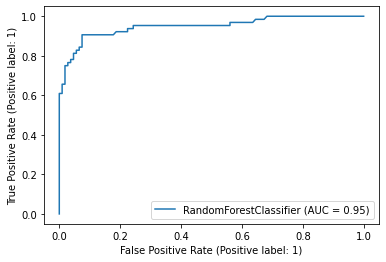

In [567]:
plot_roc_curve(clf, x_test, y_test)
plt.show()

In [568]:
importances = clf.feature_importances_
column_nm = pd.DataFrame(["area_mean", "texture_mean"])
feature_importances = pd.concat([column_nm,
                                 pd.DataFrame(importances)],
                                axis=1)
feature_importances.columns = ['feature_nm', 'importances']
print(feature_importances)

     feature_nm  importances
0     area_mean     0.709804
1  texture_mean     0.290196


<AxesSubplot:>

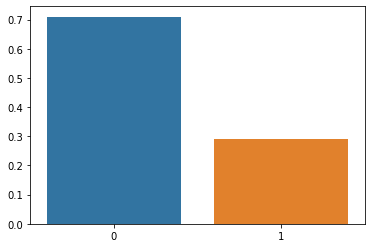

In [569]:
f = features
xtick_label_position = list(range(len(f)))
plt.xticks(xtick_label_position, f)
sns.barplot([x for x in range(len(importances))], importances)

In [570]:
car

car_ID  symboling                   CarName fueltype aspiration  \
0         1          3        alfa-romero giulia      gas        std   
1         2          3       alfa-romero stelvio      gas        std   
2         3          1  alfa-romero Quadrifoglio      gas        std   
3         4          2               audi 100 ls      gas        std   
4         5          2                audi 100ls      gas        std   
..      ...        ...                       ...      ...        ...   
200     201         -1           volvo 145e (sw)      gas        std   
201     202         -1               volvo 144ea      gas      turbo   
202     203         -1               volvo 244dl      gas        std   
203     204         -1                 volvo 246   diesel      turbo   
204     205         -1               volvo 264gl      gas      turbo   

    doornumber      carbody drivewheel enginelocation  wheelbase  ...  \
0          two  convertible        rwd          front       88.6  ...   
1          two  convertible        rwd          front       88.6  ...   
2          two    hatchback        rwd          front       94.5  ...   
3         four        sedan        fwd          front       99.8  ...   
4         four        sedan        4wd          front       99.4  ...   
..         ...          ...        ...            ...        ...  ...   
200       four        sedan        rwd          front      109.1  ...   
201       four        sedan        rwd          front      109.1  ...   
202       four        sedan        rwd          front      109.1  ...   
203       four        sedan        rwd          front      109.1  ...   
204       four        sedan        rwd          front      109.1  ...   

     enginesize  fuelsystem  boreratio  stroke compressionratio horsepower  \
0           130        mpfi       3.47    2.68              9.0        111   
1           130        mpfi       3.47    2.68              9.0        111   
2           152        mpfi       2.68    3.47              9.0        154   
3           109        mpfi       3.19    3.40             10.0        102   
4           136        mpfi       3.19    3.40              8.0        115   
..          ...         ...        ...     ...              ...        ...   
200         141        mpfi       3.78    3.15              9.5        114   
201         141        mpfi       3.78    3.15              8.7        160   
202         173        mpfi       3.58    2.87              8.8        134   
203         145         idi       3.01    3.40             23.0        106   
204         141        mpfi       3.78    3.15              9.5        114   

     peakrpm citympg  highwaympg    price  
0       5000      21          27  13495.0  
1       5000      21          27  16500.0  
2       5000      19          26  16500.0  
3       5500      24          30  13950.0  
4       5500      18          22  17450.0  
..       ...     ...         ...      ...  
200     5400      23          28  16845.0  
201     5300      19          25  19045.0  
202     5500      18          23  21485.0  
203     4800      26          27  22470.0  
204     5400      19          25  22625.0  

[205 rows x 26 columns]

In [571]:
### stageC data
stagec.head()

pgtime  pgstat  age  eet     g2  grade  gleason      ploidy
0     6.1       0   64  2.0  10.26      2      4.0     diploid
2     5.2       1   59  2.0   9.99      3      7.0     diploid
3     3.2       1   62  2.0   3.57      2      4.0     diploid
4     1.9       1   64  2.0  22.56      4      8.0  tetraploid
5     4.8       0   69  1.0   6.14      3      7.0     diploid

In [572]:
### Data split
x_train, x_test, y_train, y_test = train_test_split(stagec.drop('ploidy', axis=1), stagec['ploidy'], test_size=0.2, random_state=0, stratify=stagec['ploidy'])

In [573]:
rand_clf = RandomForestClassifier(n_estimators=100, min_samples_split=5)
rand_clf.fit(x_train, y_train)

RandomForestClassifier(min_samples_split=5)

In [574]:
pred = rand_clf.predict(x_test)
test_cm = confusion_matrix(y_test, pred)
test_acc = accuracy_score(y_test, pred)

print(test_cm)
print('\n')
print('정확도\t{}%'.format(round(test_acc *100,2)))

[[ 0  1  0]
 [ 0 13  0]
 [ 0  0 13]]


정확도	96.3%


In [575]:
importances = rand_clf.feature_importances_
feature_names = stagec.columns.difference(['ploidy'])
std = np.std([tree.feature_importances_ for tree in rand_clf.estimators_], axis=0)

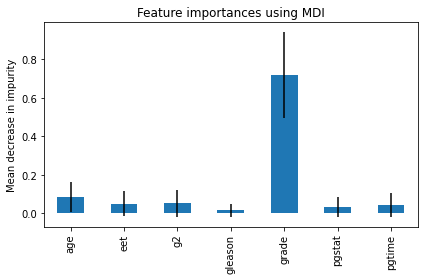

In [576]:
forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

In [577]:
iris.head()

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
50                7.0               3.2                4.7               1.4   
51                6.4               3.2                4.5               1.5   
52                6.9               3.1                4.9               1.5   
53                5.5               2.3                4.0               1.3   
54                6.5               2.8                4.6               1.5   

    Class  
50      0  
51      0  
52      0  
53      0  
54      0

In [578]:
### feature importance of iris data
rnd_clf = RandomForestClassifier(n_estimators=500, random_state=42)
rnd_clf.fit(iris.iloc[:, :4], iris["Class"])
for name, score in zip(iris.columns.difference(['Class']), rnd_clf.feature_importances_):
    print(name, score)

petal length (cm) 0.08952515598716533
petal width (cm) 0.030922148878262813
sepal length (cm) 0.4426339361506208
sepal width (cm) 0.43691875898395105


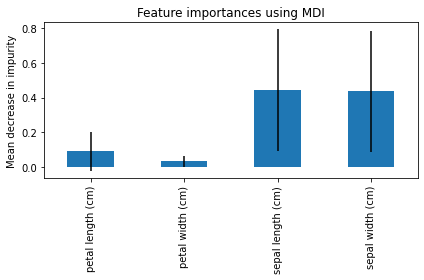

In [579]:
forest_importances = pd.Series(rnd_clf.feature_importances_, index=iris.columns.difference(['Class']))
std = np.std([tree.feature_importances_ for tree in rnd_clf.estimators_], axis=0)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

In [580]:
x, y = make_moons(n_samples=500, noise=0.30, random_state=42)
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42)

In [581]:
rnd_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, random_state=42)
rnd_clf.fit(x_train, y_train)

y_pred_rf = rnd_clf.predict(x_test)

In [582]:
bag_clf = BaggingClassifier(
    DecisionTreeClassifier(max_features="sqrt", max_leaf_nodes=16),
    n_estimators=500, random_state=42)

In [583]:
bag_clf.fit(x_train, y_train)
y_pred = bag_clf.predict(x_test)

In [584]:
### Tree Bagging과 유사한 결과
np.sum(y_pred == y_pred_rf) / len(y_pred)

1.0

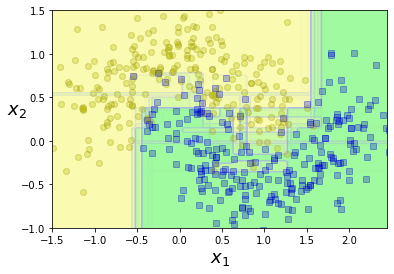

In [585]:
plt.figure(figsize=(6, 4))

for i in range(15):
    tree_clf = DecisionTreeClassifier(max_leaf_nodes=16, random_state=42 + i)
    indices_with_replacement = np.random.randint(0, len(x_train), len(x_train))
    tree_clf.fit(x_train[indices_with_replacement], y_train[indices_with_replacement])
    plot_decision_boundary(tree_clf, x, y, axes=[-1.5, 2.45, -1, 1.5], alpha=0.02, contour=False)

plt.show()

In [586]:
# DTree에서 사용한 get_human_dataset()을 이용해 학습/테스트용 DataFrame 반환
x_train, x_test, y_train, y_test = get_human_dataset()

# 랜덤 포레스트 학습 및 별도의 테스트 셋으로 예측 성능 평가
rf_clf = RandomForestClassifier(random_state=0)
rf_clf.fit(x_train, y_train)

pred = rf_clf.predict(x_test)
accuracy = accuracy_score(y_test, pred)
print('랜덤 포레스트 정확도: {0:.4f}'.format(accuracy))

랜덤 포레스트 정확도: 0.9253


In [587]:
params = {
    'n_estimators': [100],
    'max_depth': [6, 8, 10, 12], 
    'min_samples_leaf': [8, 12, 18],
    'min_samples_split': [8, 16, 20]
}

# RandomForestClassifier 객체 생성 후 GridSearchCV 수행
rf_clf = RandomForestClassifier(random_state=0, n_jobs=-1)
grid_cv = GridSearchCV(rf_clf, param_grid=params, cv=2, n_jobs=-1)
grid_cv.fit(x_train , y_train)

print('최적 하이퍼 파라미터:\n', grid_cv.best_params_)
print('최고 예측 정확도: {0:.4f}'.format(grid_cv.best_score_))

최적 하이퍼 파라미터:
 {'max_depth': 10, 'min_samples_leaf': 8, 'min_samples_split': 8, 'n_estimators': 100}
최고 예측 정확도: 0.9180


In [588]:
rf_clf1 = RandomForestClassifier(n_estimators=100, max_depth=10, min_samples_leaf=8, min_samples_split=8, random_state=0)
rf_clf1.fit(x_train, y_train)
pred = rf_clf1.predict(x_test)
print('예측 정확도: {0:.4f}'.format(accuracy_score(y_test, pred)))

예측 정확도: 0.9196


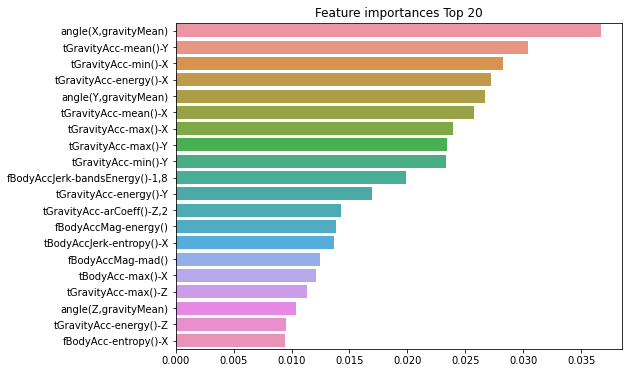

In [589]:
ftr_importances_values = rf_clf1.feature_importances_
ftr_importances = pd.Series(ftr_importances_values,index=x_train.columns)
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]

plt.figure(figsize=(8,6))
plt.title('Feature importances Top 20')
sns.barplot(x=ftr_top20, y=ftr_top20.index)
plt.show()

#### Regressor

In [590]:
car_num = car.select_dtypes(['number'])
features = list(car_num.columns.difference(['car_ID', 'symboling', 'price']))
x = car_num[features]
y = car_num['price']

In [591]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(143, 13)
(62, 13)
(143,)
(62,)


In [592]:
from sklearn.ensemble import RandomForestRegressor

In [593]:
reg = RandomForestRegressor()
pred = reg.fit(x_train, y_train).predict(x_test)

In [594]:
mse = mean_squared_error(y_test, pred)
mae = mean_absolute_error(y_test, pred)
rmse = np.sqrt(mse)
acc = reg.score(x_test, y_test)

print('MSE\t{}'.format(round(mse,3)))
print('MAE\t{}'.format(round(mae,3)))
print('RMSE\t{}'.format(round(rmse,3)))
print('ACC\t{}%'.format(round(acc *100,3)))

MSE	4426379.228
MAE	1379.732
RMSE	2103.896
ACC	92.668%


In [595]:
importances = reg.feature_importances_
column_nm = pd.DataFrame(features)
feature_importances = pd.concat([column_nm,
                                 pd.DataFrame(importances)],
                                axis=1)
feature_importances.columns = ['feature_nm', 'importances']
print(feature_importances)

          feature_nm  importances
0          boreratio     0.005721
1          carheight     0.003067
2          carlength     0.006897
3           carwidth     0.023005
4            citympg     0.009486
5   compressionratio     0.004002
6         curbweight     0.162258
7         enginesize     0.674463
8         highwaympg     0.062149
9         horsepower     0.022721
10           peakrpm     0.006934
11            stroke     0.003200
12         wheelbase     0.016095


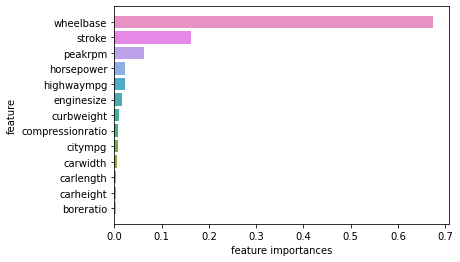

In [596]:
n_features = x_train.shape[1]
importances = pd.Series(reg.feature_importances_, index=x_train.columns).sort_values()
column_nm = features

sns.barplot(x=importances, y=column_nm)
plt.yticks(np.arange(n_features), column_nm)
plt.xlabel("feature importances")
plt.ylabel("feature")
plt.ylim(-1, n_features)
plt.show()

### (4) Voting
- Voting의 결과물이 반드시 좋은 것은 아님

#### Classifier
- Hard voting: 다수결 원칙
- Soft voting: 각 Class의 확률을 평균하여 결정
    - 확률이 높은 투표에 조금 더 비중이 있음

In [597]:
x, y = make_moons(n_samples=500, noise=0.30, random_state=42)
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42)

In [598]:
from sklearn.ensemble import VotingClassifier

In [599]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [600]:
log_clf = LogisticRegression(solver="lbfgs", random_state=42)
rnd_clf = RandomForestClassifier(n_estimators=100, random_state=42)
svm_clf = SVC(gamma="scale", random_state=42, probability=True)

In [601]:
### hard voting
voting_clf = VotingClassifier(
    estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)],
    voting='hard')

voting_clf.fit(x_train, y_train)

VotingClassifier(estimators=[('lr', LogisticRegression(random_state=42)),
                             ('rf', RandomForestClassifier(random_state=42)),
                             ('svc', SVC(probability=True, random_state=42))])

In [602]:
for clf in (log_clf, rnd_clf, svm_clf, voting_clf):
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.864
RandomForestClassifier 0.896
SVC 0.896
VotingClassifier 0.912


In [603]:
### soft voting
voting_clf = VotingClassifier(
    estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)],
    voting='soft')
voting_clf.fit(x_train, y_train)

VotingClassifier(estimators=[('lr', LogisticRegression(random_state=42)),
                             ('rf', RandomForestClassifier(random_state=42)),
                             ('svc', SVC(probability=True, random_state=42))],
                 voting='soft')

In [604]:
for clf in (log_clf, rnd_clf, svm_clf, voting_clf):
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.864
RandomForestClassifier 0.896
SVC 0.896
VotingClassifier 0.92


In [605]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

In [606]:
### Breast cancer data
cancer = load_breast_cancer()

data_df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
data_df.head(3)

mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38           122.8     1001.0          0.11840   
1        20.57         17.77           132.9     1326.0          0.08474   
2        19.69         21.25           130.0     1203.0          0.10960   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   

   mean fractal dimension  ...  worst radius  worst texture  worst perimeter  \
0                 0.07871  ...         25.38          17.33            184.6   
1                 0.05667  ...         24.99          23.41            158.8   
2                 0.05999  ...         23.57          25.53            152.5   

   worst area  worst smoothness  worst compactness  worst concavity  \
0      2019.0            0.1622             0.6656           0.7119   
1      1956.0            0.1238             0.1866           0.2416   
2      1709.0            0.1444             0.4245           0.4504   

   worst concave points  worst symmetry  worst fractal dimension  
0                0.2654          0.4601                  0.11890  
1                0.1860          0.2750                  0.08902  
2                0.2430          0.3613                  0.08758  

[3 rows x 30 columns]

In [607]:
# 개별 모델은 로지스틱 회귀와 KNN
lr_clf = LogisticRegression(solver='liblinear')
knn_clf = KNeighborsClassifier(n_neighbors=8)

# 개별 모델을 소프트 보팅 기반의 앙상블 모델로 구현한 분류기 
vo_clf = VotingClassifier(estimators=[('LR', lr_clf), ('KNN', knn_clf)] , voting='soft')

x_train, x_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size=0.2, random_state=156)

# VotingClassifier 학습/예측/평가. 
vo_clf.fit(x_train , y_train)
pred = vo_clf.predict(x_test)
print('Voting 분류기 정확도: {0:.4f}'.format(accuracy_score(y_test , pred)))

# 개별 모델의 학습/예측/평가.
classifiers = [lr_clf, knn_clf]
for classifier in classifiers:
    classifier.fit(x_train , y_train)
    pred = classifier.predict(x_test)
    class_name= classifier.__class__.__name__
    print('{0} 정확도: {1:.4f}'.format(class_name, accuracy_score(y_test, pred)))

Voting 분류기 정확도: 0.9561
LogisticRegression 정확도: 0.9474
KNeighborsClassifier 정확도: 0.9386


#### Regressor

In [608]:
bike_df = pd.read_csv('./data/bike_train.csv')
print(bike_df.shape)
bike_df.head(3)

(10886, 12)


datetime  season  holiday  workingday  weather  temp   atemp  \
0  2011-01-01 00:00:00       1        0           0        1  9.84  14.395   
1  2011-01-01 01:00:00       1        0           0        1  9.02  13.635   
2  2011-01-01 02:00:00       1        0           0        1  9.02  13.635   

   humidity  windspeed  casual  registered  count  
0        81        0.0       3          13     16  
1        80        0.0       8          32     40  
2        80        0.0       5          27     32

In [609]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [610]:
# 문자열을 datetime 타입으로 변경. 
bike_df['datetime'] = bike_df.datetime.apply(pd.to_datetime)

# datetime 타입에서 년, 월, 일, 시간 추출
bike_df['year'] = bike_df.datetime.apply(lambda x: x.year)
bike_df['month'] = bike_df.datetime.apply(lambda x: x.month)
bike_df['day'] = bike_df.datetime.apply(lambda x: x.day)
bike_df['hour'] = bike_df.datetime.apply(lambda x: x.hour)
bike_df.head(3)

datetime  season  holiday  workingday  weather  temp   atemp  \
0 2011-01-01 00:00:00       1        0           0        1  9.84  14.395   
1 2011-01-01 01:00:00       1        0           0        1  9.02  13.635   
2 2011-01-01 02:00:00       1        0           0        1  9.02  13.635   

   humidity  windspeed  casual  registered  count  year  month  day  hour  
0        81        0.0       3          13     16  2011      1    1     0  
1        80        0.0       8          32     40  2011      1    1     1  
2        80        0.0       5          27     32  2011      1    1     2

In [611]:
drop_columns = ['datetime', 'casual', 'registered']
bike_df.drop(drop_columns, axis=1, inplace=True)

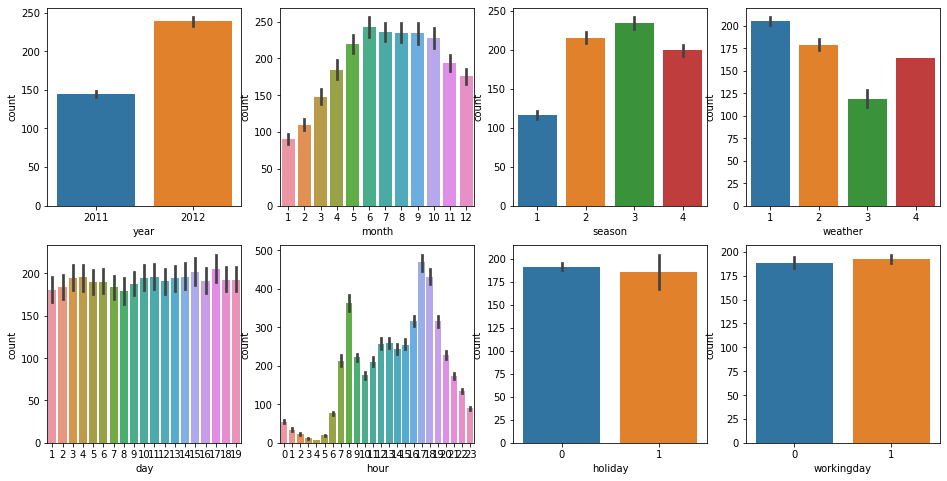

In [612]:
fig, axs = plt.subplots(figsize=(16, 8), ncols=4, nrows=2)
cat_features = ['year', 'month', 'season', 'weather', 'day', 'hour', 'holiday', 'workingday']
# cat_features에 있는 모든 칼럼별로 개별 칼럼값에 따른 count의 합을 barplot으로 시각화
for i, feature in enumerate(cat_features):
    row = int(i/4)
    col = i%4
    # 시본의 barplot을 이용해 칼럼값에 따른 count의 합을 표현
    sns.barplot(x=feature, y='count', data=bike_df, ax=axs[row][col])

In [613]:
# log 값 변환 시 NaN등의 이슈로 log() 가 아닌 log1p() 를 이용하여 RMSLE 계산
def rmsle(y, pred):
    log_y = np.log1p(y)
    log_pred = np.log1p(pred)
    squared_error = (log_y - log_pred) ** 2
    rmsle = np.sqrt(np.mean(squared_error))
    return rmsle

# 사이킷런의 mean_square_error() 를 이용하여 RMSE 계산
def rmse(y,pred):
    return np.sqrt(mean_squared_error(y,pred))

# MSE, RMSE, RMSLE 를 모두 계산 
def evaluate_regr(y,pred):
    rmsle_val = rmsle(y,pred)
    rmse_val = rmse(y,pred)
    # MAE 는 scikit learn의 mean_absolute_error() 로 계산
    mae_val = mean_absolute_error(y,pred)
    print('RMSLE: {0:.3f}, RMSE: {1:.3F}, MAE: {2:.3F}'.format(rmsle_val, rmse_val, mae_val))

In [614]:
x = bike_df.drop(['count'], axis=1, inplace=False)
y = bike_df['count']

<AxesSubplot:>

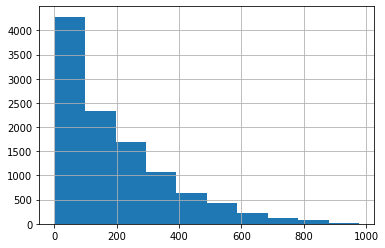

In [615]:
y.hist()

<AxesSubplot:>

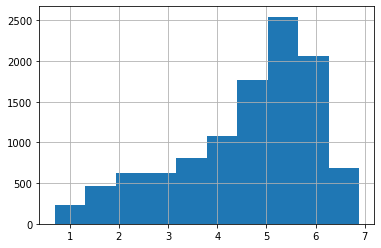

In [616]:
# Log transformation of y
y_log_transform = np.log1p(y)
y_log_transform.hist()

In [617]:
# 'year', month', 'day', hour'등의 피처들을 One Hot Encoding
x_ohe = pd.get_dummies(x, columns=['year', 'month', 'day', 'hour', 'holiday', 'workingday', 'season', 'weather'])

In [618]:
# 타깃 칼럼인 count 값을 log1p로 로그 변환
y_log = np.log1p(y)

# 원-핫 인코딩이 적용된 feature 데이터 세트와 로그 변환된 y_target_log를 반영하여 학습/테스트 데이터 셋 분할
x_train, x_test, y_train, y_test = train_test_split(x_ohe, y_log, test_size=0.3, random_state=0)

In [619]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, VotingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

In [620]:
# 모델과 학습/테스트 데이터 셋을 입력하면 성능 평가 수치를 반환
def get_model_predict(model, X_train, X_test, y_train, y_test, is_expm1=False):
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    if is_expm1 :
        y_test = np.expm1(y_test)
        pred = np.expm1(pred)
    print('###',model.__class__.__name__,'###')
    evaluate_regr(y_test, pred)
# end of function get_model_predict    

In [621]:
# 개별 모델 성능 평가
lr_reg = LinearRegression()
ridge_reg = Ridge(alpha=10)
lasso_reg = Lasso(alpha=0.01)

rf_reg = RandomForestRegressor(n_estimators=50)
gbm_reg = GradientBoostingRegressor(n_estimators=50)
xgb_reg = XGBRegressor(n_estimators=50)
lgbm_reg = LGBMRegressor(n_estimators=50)

# XGBoost의 경우 DataFrame이 입력 될 경우 버전에 따라 오류 발생 가능. ndarray로 변환.
for model in [lr_reg, ridge_reg, lasso_reg, rf_reg, gbm_reg, xgb_reg, lgbm_reg]:
    get_model_predict(model, x_train.values, x_test.values, y_train.values, y_test.values, is_expm1=True)

### LinearRegression ###
RMSLE: 0.590, RMSE: 97.688, MAE: 63.382
### Ridge ###
RMSLE: 0.590, RMSE: 98.529, MAE: 63.893
### Lasso ###
RMSLE: 0.635, RMSE: 113.219, MAE: 72.803
### RandomForestRegressor ###
RMSLE: 0.358, RMSE: 50.780, MAE: 31.334
### GradientBoostingRegressor ###
RMSLE: 0.621, RMSE: 126.684, MAE: 78.591
### XGBRegressor ###
RMSLE: 0.354, RMSE: 57.590, MAE: 35.152
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000327 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 348
[LightGBM] [Info] Number of data points in the train set: 7620, number of used features: 72
[LightGBM] [Info] Start training from score 4.582043
### LGBMRegressor ###
RMSLE: 0.371, RMSE: 64.670, MAE: 40.203


In [622]:
# 개별 모델 Voting
vo_reg = VotingRegressor(estimators=[('LR', lr_reg), ('Ridge', ridge_reg), ('Lasso', lasso_reg), ('RF', rf_reg), ('GBM', gbm_reg), ('XGB', xgb_reg), ('LGBM', lgbm_reg)])

vo_reg.fit(x_train, y_train)
pred = vo_reg.predict(x_test)
y_test = np.expm1(y_test)
pred = np.expm1(pred)

evaluate_regr(y_test, pred)

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000214 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 348
[LightGBM] [Info] Number of data points in the train set: 7620, number of used features: 72
[LightGBM] [Info] Start training from score 4.582043
RMSLE: 0.448, RMSE: 80.744, MAE: 50.780


<AxesSubplot:>

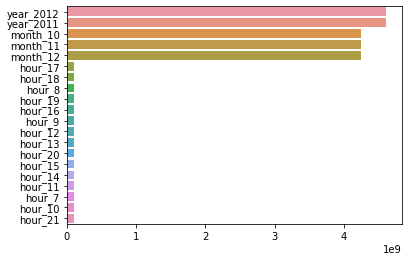

In [623]:
# Linear Regression coef 파악
coef = pd.Series(lr_reg.coef_ , index=x_ohe.columns)
coef_sort = coef.sort_values(ascending=False)[:20]
sns.barplot(x=coef_sort.values , y=coef_sort.index)

In [624]:
def get_top_error_data(y_test, pred, n_tops=5):
    # DataFrame에 컬럼들로 실제 대여횟수(count)와 예측 값을 서로 비교 할 수 있도록 생성. 
    result_df = pd.DataFrame(y_test.values, columns=['real_count'])
    result_df['predicted_count']= np.round(pred)
    result_df['diff'] = np.abs(result_df['real_count'] - result_df['predicted_count'])
    # 예측값과 실제값이 가장 큰 데이터 순으로 출력. 
    print(result_df.sort_values('diff', ascending=False)[:n_tops])
    
get_top_error_data(y_test, pred, n_tops=5)

      real_count  predicted_count   diff
2817       856.0            410.0  446.0
1181       891.0            453.0  438.0
3115       651.0            266.0  385.0
370        686.0            305.0  381.0
565        512.0            141.0  371.0


In [625]:
### mercari price data
mercari_df= pd.read_csv('./data/mercari_train.tsv', sep='\t')
print(mercari_df.shape)
mercari_df.head(3)

(1482535, 8)


train_id                                 name  item_condition_id  \
0         0  MLB Cincinnati Reds T Shirt Size XL                  3   
1         1     Razer BlackWidow Chroma Keyboard                  3   
2         2                       AVA-VIV Blouse                  1   

                                       category_name brand_name  price  \
0                                  Men/Tops/T-shirts        NaN   10.0   
1  Electronics/Computers & Tablets/Components & P...      Razer   52.0   
2                        Women/Tops & Blouses/Blouse     Target   10.0   

   shipping                                   item_description  
0         1                                 No description yet  
1         0  This keyboard is in great condition and works ...  
2         1  Adorable top with a hint of lace and a key hol...

In [626]:
print(mercari_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1482535 entries, 0 to 1482534
Data columns (total 8 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   train_id           1482535 non-null  int64  
 1   name               1482535 non-null  object 
 2   item_condition_id  1482535 non-null  int64  
 3   category_name      1476208 non-null  object 
 4   brand_name         849853 non-null   object 
 5   price              1482535 non-null  float64
 6   shipping           1482535 non-null  int64  
 7   item_description   1482531 non-null  object 
dtypes: float64(1), int64(3), object(4)
memory usage: 90.5+ MB
None


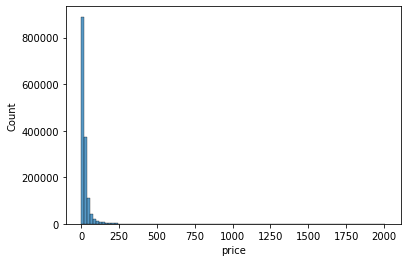

In [627]:
y_train_df = mercari_df['price']

plt.figure(figsize=(6, 4))
sns.histplot(y_train_df, bins=50)
plt.show()

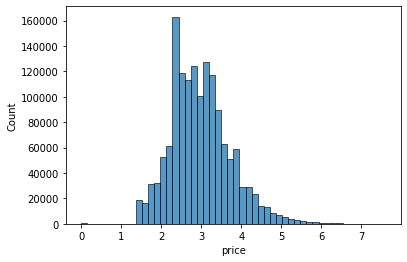

In [628]:
y_train_df = np.log1p(y_train_df)
sns.histplot(y_train_df, bins=50)
plt.show()

In [629]:
mercari_df['price'] = np.log1p(mercari_df['price'])
mercari_df['price'].head(3)

0    2.397895
1    3.970292
2    2.397895
Name: price, dtype: float64

In [630]:
print('Shipping 값 유형:\n', mercari_df['shipping'].value_counts())
print('item_condition_id 값 유형:\n', mercari_df['item_condition_id'].value_counts())

Shipping 값 유형:
 0    819435
1    663100
Name: shipping, dtype: int64
item_condition_id 값 유형:
 1    640549
3    432161
2    375479
4     31962
5      2384
Name: item_condition_id, dtype: int64


In [631]:
boolean_cond = mercari_df['item_description']=='No description yet'
mercari_df[boolean_cond]['item_description'].count()

82489

In [632]:
# apply lambda에서 호출되는 대,중,소 분할 함수 생성, 대,중,소 값을 리스트 반환
def split_cat(category_name):
    try:
        return category_name.split('/')
    except:
        return ['Other_Null' , 'Other_Null' , 'Other_Null']

# 위의 split_cat( )을 apply lambda에서 호출하여 대,중,소 컬럼을 mercari_df에 생성. 
mercari_df['cat_dae'], mercari_df['cat_jung'], mercari_df['cat_so'] = zip(*mercari_df['category_name'].apply(lambda x: split_cat(x)))

# 대분류만 값의 유형과 건수를 살펴보고, 중분류, 소분류는 값의 유형이 많으므로 분류 갯수만 추출
print('대분류 유형 :\n', mercari_df['cat_dae'].value_counts())
print('중분류 갯수 :', mercari_df['cat_jung'].nunique())
print('소분류 갯수 :', mercari_df['cat_so'].nunique())

대분류 유형 :
 Women                     664385
Beauty                    207828
Kids                      171689
Electronics               122690
Men                        93680
Home                       67871
Vintage & Collectibles     46530
Other                      45351
Handmade                   30842
Sports & Outdoors          25342
Other_Null                  6327
Name: cat_dae, dtype: int64
중분류 갯수 : 114
소분류 갯수 : 871


In [633]:
mercari_df['brand_name'] = mercari_df['brand_name'].fillna(value='Other_Null')
mercari_df['category_name'] = mercari_df['category_name'].fillna(value='Other_Null')
mercari_df['item_description'] = mercari_df['item_description'].fillna(value='Other_Null')

# 각 컬럼별로 Null값 건수 확인. 모두 0가 나와야 합니다.
mercari_df.isnull().sum()

train_id             0
name                 0
item_condition_id    0
category_name        0
brand_name           0
price                0
shipping             0
item_description     0
cat_dae              0
cat_jung             0
cat_so               0
dtype: int64

In [634]:
print('brand name 의 유형 건수 :', mercari_df['brand_name'].nunique())
print('brand name sample 5건 : \n', mercari_df['brand_name'].value_counts()[:5])

brand name 의 유형 건수 : 4810
brand name sample 5건 : 
 Other_Null           632682
PINK                  54088
Nike                  54043
Victoria's Secret     48036
LuLaRoe               31024
Name: brand_name, dtype: int64


In [635]:
print('name 의 종류 갯수 :', mercari_df['name'].nunique())
print('name sample 7건 : \n', mercari_df['name'][:7])

name 의 종류 갯수 : 1225273
name sample 7건 : 
 0    MLB Cincinnati Reds T Shirt Size XL
1       Razer BlackWidow Chroma Keyboard
2                         AVA-VIV Blouse
3                  Leather Horse Statues
4                   24K GOLD plated rose
5       Bundled items requested for Ruie
6     Acacia pacific tides santorini top
Name: name, dtype: object


In [636]:
pd.set_option('max_colwidth', 200)

# item_description의 평균 문자열 개수
print('item_description 평균 문자열 개수:', mercari_df['item_description'].str.len().mean())

mercari_df['item_description'][:2]

item_description 평균 문자열 개수: 145.7113889385411


0                                                                                                                                                                              No description yet
1    This keyboard is in great condition and works like it came out of the box. All of the ports are tested and work perfectly. The lights are customizable via the Razer Synapse app on your PC.
Name: item_description, dtype: object

In [637]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [638]:
# name 속성에 대한 feature vectorization 변환
cnt_vec = CountVectorizer()
x_name = cnt_vec.fit_transform(mercari_df.name)

# item_description 에 대한 feature vectorization 변환 
tfidf_descp = TfidfVectorizer(max_features=50000, ngram_range=(1, 3), stop_words='english')
x_descp = tfidf_descp.fit_transform(mercari_df['item_description'])

print('name vectorization shape:', x_name.shape)
print('item_description vectorization shape:', x_descp.shape)

name vectorization shape: (1482535, 105757)
item_description vectorization shape: (1482535, 50000)


In [ ]:
from sklearn.preprocessing import LabelBinarizer

In [ ]:
# brand_name, item_condition_id, shipping 각 피처들을 희소 행렬 원-핫 인코딩 변환
lb_brand_name = LabelBinarizer(sparse_output=True) # 희소 행렬 One-hot encoding에 사용
x_brand = lb_brand_name.fit_transform(mercari_df['brand_name'])

lb_item_cond_id = LabelBinarizer(sparse_output=True)
x_item_cond_id = lb_item_cond_id.fit_transform(mercari_df['item_condition_id'])

lb_shipping= LabelBinarizer(sparse_output=True)
x_shipping = lb_shipping.fit_transform(mercari_df['shipping'])

# cat_dae, cat_jung, cat_so 각 피처들을 희소 행렬 원-핫 인코딩 변환
lb_cat_dae = LabelBinarizer(sparse_output=True)
x_cat_dae= lb_cat_dae.fit_transform(mercari_df['cat_dae'])

lb_cat_jung = LabelBinarizer(sparse_output=True)
x_cat_jung = lb_cat_jung.fit_transform(mercari_df['cat_jung'])

lb_cat_so = LabelBinarizer(sparse_output=True)
x_cat_so = lb_cat_so.fit_transform(mercari_df['cat_so'])

In [641]:
print(type(x_brand), type(x_item_cond_id), type(x_shipping))
print('x_brand_shape:{0}, x_item_cond_id shape:{1}'.format(x_brand.shape, x_item_cond_id.shape))
print('x_shipping shape:{0}, x_cat_dae shape:{1}'.format(x_shipping.shape, x_cat_dae.shape))
print('x_cat_jung shape:{0}, x_cat_so shape:{1}'.format(x_cat_jung.shape, x_cat_so.shape))

<class 'scipy.sparse._csr.csr_matrix'> <class 'scipy.sparse._csr.csr_matrix'> <class 'scipy.sparse._csr.csr_matrix'>
x_brand_shape:(1482535, 4810), x_item_cond_id shape:(1482535, 5)
x_shipping shape:(1482535, 1), x_cat_dae shape:(1482535, 11)
x_cat_jung shape:(1482535, 114), x_cat_so shape:(1482535, 871)


In [642]:
from scipy.sparse import hstack
import gc

In [643]:
sparse_matrix_list = (x_name, x_descp, x_brand, x_item_cond_id,
            x_shipping, x_cat_dae, x_cat_jung, x_cat_so)

# 사이파이 sparse 모듈의 hstack 함수를 이용하여 앞에서 인코딩과 Vectorization을 수행한 데이터 셋을 모두 결합. 
x_features_sparse = hstack(sparse_matrix_list).tocsr()
print(type(x_features_sparse), x_features_sparse.shape)

# 데이터 셋이 메모리를 많이 차지하므로 사용 용도가 끝났으면 바로 메모리에서 삭제. 
del x_features_sparse
gc.collect()

<class 'scipy.sparse._csr.csr_matrix'> (1482535, 161569)


0

In [644]:
from sklearn.linear_model import Ridge
from lightgbm import LGBMRegressor

In [645]:
def rmsle(y, y_pred):
    # underflow, overflow를 막기 위해 log가 아닌 log1p로 rmsle 계산 
    return np.sqrt(np.mean(np.power(np.log1p(y) - np.log1p(y_pred), 2)))

def evaluate_org_price(y_test, preds): 
    # 원본 데이터는 log1p로 변환되었으므로 exmpm1으로 원복 필요. 
    preds_exmpm = np.expm1(preds)
    y_test_exmpm = np.expm1(y_test)
    
    # rmsle로 RMSLE 값 추출
    rmsle_result = rmsle(y_test_exmpm, preds_exmpm)
    return rmsle_result

In [646]:
def model_train_predict(model, matrix_list):
    # scipy.sparse 모듈의 hstack 을 이용하여 sparse matrix 결합
    x = hstack(matrix_list).tocsr()     
    
    x_train, x_test, y_train, y_test=train_test_split(x, mercari_df['price'], 
                                                      test_size=0.2, random_state=156)
    
    # 모델 학습 및 예측
    model.fit(x_train, y_train)
    preds = model.predict(x_test)
    
    del x, x_train, x_test, y_train 
    gc.collect()
    
    return preds , y_test

In [647]:
linear_model = Ridge(solver = "lsqr", fit_intercept=False)

sparse_matrix_list = (x_name, x_brand, x_item_cond_id,
                      x_shipping, x_cat_dae, x_cat_jung, x_cat_so)

linear_preds, y_test = model_train_predict(model=linear_model, matrix_list=sparse_matrix_list)
print('Item Description을 제외했을 때 rmsle 값:', evaluate_org_price(y_test, linear_preds))

sparse_matrix_list = (x_descp, x_name, x_brand, x_item_cond_id,
                      x_shipping, x_cat_dae, x_cat_jung, x_cat_so)
linear_preds, y_test = model_train_predict(model=linear_model, matrix_list=sparse_matrix_list)
print('Item Description을 포함한 rmsle 값:', evaluate_org_price(y_test ,linear_preds))


Item Description을 제외했을 때 rmsle 값: 0.5013204694672296
Item Description을 포함한 rmsle 값: 0.4712212439206555


In [648]:
lgbm_model = LGBMRegressor(n_estimators=50, learning_rate=0.5, num_leaves=125, random_state=156)
lgbm_preds, y_test = model_train_predict(model=lgbm_model, matrix_list=sparse_matrix_list)
print('LightGBM rmsle 값:', evaluate_org_price(y_test, lgbm_preds))

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 168.725738 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1068299
[LightGBM] [Info] Number of data points in the train set: 1186028, number of used features: 65338
[LightGBM] [Info] Start training from score 2.979514
LightGBM rmsle 값: 0.4791994315017268


In [651]:
# 개별 모델 Voting
vo_reg = VotingRegressor(estimators=[('Ridge', linear_model), ('LGBM', lgbm_model)])
vo_preds, y_test = model_train_predict(model=vo_reg, matrix_list=sparse_matrix_list)
print('LightGBM과 Ridge를 ensemble한 최종 rmsle 값:',  evaluate_org_price(y_test, vo_preds))

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 124.938973 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1068299
[LightGBM] [Info] Number of data points in the train set: 1186028, number of used features: 65338
[LightGBM] [Info] Start training from score 2.979514
LightGBM과 Ridge를 ensemble한 최종 rmsle 값: 0.46021542765675766


### (5) Stacking

#### Classifier

In [652]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

In [653]:
cancer_data = load_breast_cancer()
x_data = cancer_data.data
y_label = cancer_data.target

x_train, x_test , y_train , y_test = train_test_split(x_data, y_label, test_size=0.2, random_state=0)

In [654]:
# 개별 ML 모델을 위한 Classifier 생성.
knn_clf  = KNeighborsClassifier(n_neighbors=4)
rf_clf = RandomForestClassifier(n_estimators=100, random_state=0)
dt_clf = DecisionTreeClassifier()
ada_clf = AdaBoostClassifier(n_estimators=100)

# 최종 Stacking 모델을 위한 Classifier생성. 
lr_final = LogisticRegression(C=10)

In [655]:
# 개별 모델들을 학습. 
knn_clf.fit(x_train, y_train)
rf_clf.fit(x_train , y_train)
dt_clf.fit(x_train , y_train)
ada_clf.fit(x_train, y_train)

AdaBoostClassifier(n_estimators=100)

In [656]:
# 학습된 개별 모델들이 각자 반환하는 예측 데이터 셋을 생성하고 개별 모델의 정확도 측정. 
knn_pred = knn_clf.predict(x_test)
rf_pred = rf_clf.predict(x_test)
dt_pred = dt_clf.predict(x_test)
ada_pred = ada_clf.predict(x_test)

print('KNN 정확도: {0:.4f}'.format(accuracy_score(y_test, knn_pred)))
print('랜덤 포레스트 정확도: {0:.4f}'.format(accuracy_score(y_test, rf_pred)))
print('결정 트리 정확도: {0:.4f}'.format(accuracy_score(y_test, dt_pred)))
print('에이다부스트 정확도: {0:.4f}'.format(accuracy_score(y_test, ada_pred)))

KNN 정확도: 0.9211
랜덤 포레스트 정확도: 0.9649
결정 트리 정확도: 0.9123
에이다부스트 정확도: 0.9561


In [657]:
pred = np.array([knn_pred, rf_pred, dt_pred, ada_pred])
print(pred.shape)

# transpose를 이용해 행과 열의 위치 교환. 컬럼 레벨로 각 알고리즘의 예측 결과를 피처로 만듦. 
pred = np.transpose(pred)
print(pred.shape)

(4, 114)
(114, 4)


In [658]:
lr_final.fit(pred, y_test)
final = lr_final.predict(pred)

print('최종 메타 모델의 예측 정확도: {0:.4f}'.format(accuracy_score(y_test , final)))

최종 메타 모델의 예측 정확도: 0.9737


In [659]:
### CV set stacking
# 개별 기반 모델에서 최종 메타 모델이 사용할 학습 및 테스트용 데이터를 생성하기 위한 함수. 
def get_stacking_base_datasets(model, X_train_n, y_train_n, X_test_n, n_folds ):
    # 지정된 n_folds값으로 KFold 생성.
    kf = KFold(n_splits=n_folds, shuffle=False)
    #추후에 메타 모델이 사용할 학습 데이터 반환을 위한 넘파이 배열 초기화 
    train_fold_pred = np.zeros((X_train_n.shape[0], 1))
    test_pred = np.zeros((X_test_n.shape[0],n_folds))
    print(model.__class__.__name__ , ' model 시작')
    
    for folder_counter, (train_index, valid_index) in enumerate(kf.split(X_train_n)):
        #입력된 학습 데이터에서 기반 모델이 학습/예측할 폴드 데이터 셋 추출 
        print('\t 폴드 세트: ',folder_counter,' 시작')
        X_tr = X_train_n[train_index] 
        y_tr = y_train_n[train_index] 
        X_te = X_train_n[valid_index]  
        
        #폴드 세트 내부에서 다시 만들어진 학습 데이터로 기반 모델의 학습 수행.
        model.fit(X_tr , y_tr)       
        #폴드 세트 내부에서 다시 만들어진 검증 데이터로 기반 모델 예측 후 데이터 저장.
        train_fold_pred[valid_index, :] = model.predict(X_te).reshape(-1, 1)
        #입력된 원본 테스트 데이터를 폴드 세트내 학습된 기반 모델에서 예측 후 데이터 저장. 
        test_pred[:, folder_counter] = model.predict(X_test_n)
            
    # 폴드 세트 내에서 원본 테스트 데이터를 예측한 데이터를 평균하여 테스트 데이터로 생성 
    test_pred_mean = np.mean(test_pred, axis=1).reshape(-1, 1)    
    
    #train_fold_pred는 최종 메타 모델이 사용하는 학습 데이터, test_pred_mean은 테스트 데이터
    
    return train_fold_pred , test_pred_mean

In [660]:
knn_train, knn_test = get_stacking_base_datasets(knn_clf, x_train, y_train, x_test, 7)
rf_train, rf_test = get_stacking_base_datasets(rf_clf, x_train, y_train, x_test, 7)
dt_train, dt_test = get_stacking_base_datasets(dt_clf, x_train, y_train, x_test,  7)    
ada_train, ada_test = get_stacking_base_datasets(ada_clf, x_train, y_train, x_test, 7)

KNeighborsClassifier  model 시작
	 폴드 세트:  0  시작
	 폴드 세트:  1  시작
	 폴드 세트:  2  시작
	 폴드 세트:  3  시작
	 폴드 세트:  4  시작
	 폴드 세트:  5  시작
	 폴드 세트:  6  시작
RandomForestClassifier  model 시작
	 폴드 세트:  0  시작
	 폴드 세트:  1  시작
	 폴드 세트:  2  시작
	 폴드 세트:  3  시작
	 폴드 세트:  4  시작
	 폴드 세트:  5  시작
	 폴드 세트:  6  시작
DecisionTreeClassifier  model 시작
	 폴드 세트:  0  시작
	 폴드 세트:  1  시작
	 폴드 세트:  2  시작
	 폴드 세트:  3  시작
	 폴드 세트:  4  시작
	 폴드 세트:  5  시작
	 폴드 세트:  6  시작
AdaBoostClassifier  model 시작
	 폴드 세트:  0  시작
	 폴드 세트:  1  시작
	 폴드 세트:  2  시작
	 폴드 세트:  3  시작
	 폴드 세트:  4  시작
	 폴드 세트:  5  시작
	 폴드 세트:  6  시작


In [661]:
stack_final_x_train = np.concatenate((knn_train, rf_train, dt_train, ada_train), axis=1)
stack_final_x_test = np.concatenate((knn_test, rf_test, dt_test, ada_test), axis=1)
print('원본 학습 피처 데이터 Shape:', x_train.shape, '원본 테스트 피처 Shape:', x_test.shape)
print('스태킹 학습 피처 데이터 Shape:', stack_final_x_train.shape,
      '스태킹 테스트 피처 데이터 Shape:', stack_final_x_test.shape)

원본 학습 피처 데이터 Shape: (455, 30) 원본 테스트 피처 Shape: (114, 30)
스태킹 학습 피처 데이터 Shape: (455, 4) 스태킹 테스트 피처 데이터 Shape: (114, 4)


In [662]:
lr_final.fit(stack_final_x_train, y_train)
stack_final = lr_final.predict(stack_final_x_test)

print('최종 메타 모델의 예측 정확도: {0:.4f}'.format(accuracy_score(y_test, stack_final)))

최종 메타 모델의 예측 정확도: 0.9737


#### Regressor

In [663]:
house_df_org = pd.read_csv('./data/house_price.csv')
house_df = house_df_org.copy()
house_df.head(3)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  

[3 rows x 81 columns]

In [664]:
print('데이터 세트의 Shape:', house_df.shape)
print('\n전체 feature 들의 type \n',house_df.dtypes.value_counts())
isnull_series = house_df.isnull().sum()
print('\nNull 컬럼과 그 건수:\n ', isnull_series[isnull_series > 0].sort_values(ascending=False))

데이터 세트의 Shape: (1460, 81)

전체 feature 들의 type 
 object     43
int64      35
float64     3
dtype: int64

Null 컬럼과 그 건수:
  PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtExposure      38
BsmtFinType2      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
MasVnrType         8
Electrical         1
dtype: int64


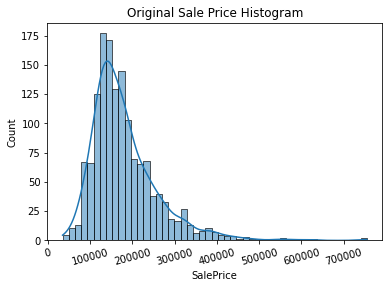

In [665]:
plt.title('Original Sale Price Histogram')
plt.xticks(rotation=15)
sns.histplot(house_df['SalePrice'], kde=True)
plt.show()

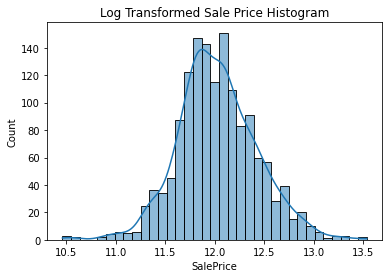

In [666]:
plt.title('Log Transformed Sale Price Histogram')
log_SalePrice = np.log1p(house_df['SalePrice'])
sns.histplot(log_SalePrice, kde=True)
plt.show()

In [667]:
# SalePrice 로그 변환
original_SalePrice = house_df['SalePrice']
house_df['SalePrice'] = np.log1p(house_df['SalePrice'])

# Null 이 너무 많은 컬럼들과 불필요한 컬럼 삭제
house_df.drop(['Id','PoolQC' , 'MiscFeature', 'Alley', 'Fence','FireplaceQu'], axis=1 , inplace=True)
# Drop 하지 않는 숫자형 Null컬럼들은 평균값으로 대체
house_df.fillna(house_df.mean(),inplace=True)

# Null 값이 있는 피처명과 타입을 추출
null_column_count = house_df.isnull().sum()[house_df.isnull().sum() > 0]
print('## Null 피처의 Type :\n', house_df.dtypes[null_column_count.index])

## Null 피처의 Type :
 MasVnrType      object
BsmtQual        object
BsmtCond        object
BsmtExposure    object
BsmtFinType1    object
BsmtFinType2    object
Electrical      object
GarageType      object
GarageFinish    object
GarageQual      object
GarageCond      object
dtype: object


In [668]:
from scipy.stats import skew

In [669]:
# object가 아닌 숫자형 피처의 칼럼 index 객체 추출.
features_index = house_df.dtypes[house_df.dtypes != 'object'].index

# house_df에 칼럼 index를 [ ]로 입력하면 해당하는 칼럼 데이터 세트 반환. apply lambda로 skew()호출
skew_features = house_df[features_index].apply(lambda x : skew(x))

# skew(왜곡) 정도가 1 이상인 칼럼만 추출.
skew_features_top = skew_features[skew_features > 1]
print(skew_features_top.sort_values(ascending=False))

MiscVal          24.451640
PoolArea         14.813135
LotArea          12.195142
3SsnPorch        10.293752
LowQualFinSF      9.002080
KitchenAbvGr      4.483784
BsmtFinSF2        4.250888
ScreenPorch       4.117977
BsmtHalfBath      4.099186
EnclosedPorch     3.086696
MasVnrArea        2.673661
LotFrontage       2.382499
OpenPorchSF       2.361912
BsmtFinSF1        1.683771
WoodDeckSF        1.539792
TotalBsmtSF       1.522688
MSSubClass        1.406210
1stFlrSF          1.375342
GrLivArea         1.365156
dtype: float64


In [670]:
house_df[skew_features_top.index] = np.log1p(house_df[skew_features_top.index])

In [671]:
# One-hot encoding
print('get_dummies() 수행 전 데이터 Shape:', house_df.shape)
house_df_ohe = pd.get_dummies(house_df)
print('get_dummies() 수행 후 데이터 Shape:', house_df_ohe.shape)

null_column_count = house_df_ohe.isnull().sum()[house_df_ohe.isnull().sum() > 0]
print('## Null 피처의 Type :\n', house_df_ohe.dtypes[null_column_count.index])

get_dummies() 수행 전 데이터 Shape: (1460, 75)
get_dummies() 수행 후 데이터 Shape: (1460, 271)
## Null 피처의 Type :
 Series([], dtype: object)


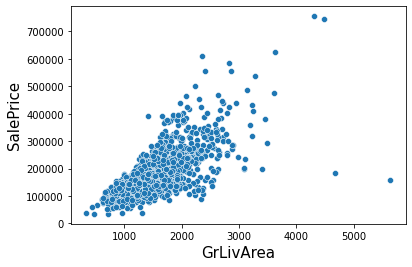

In [672]:
# Outlier 확인
sns.scatterplot(x=house_df_org['GrLivArea'], y=house_df_org['SalePrice'])
plt.ylabel('SalePrice', fontsize=15)
plt.xlabel('GrLivArea', fontsize=15)
plt.show()

In [673]:
# GrLivArea와 SalePrice 모두 로그 변환되었으므로 이를 반영한 조건 생성. 
cond1 = house_df_ohe['GrLivArea'] > np.log1p(4000)
cond2 = house_df_ohe['SalePrice'] < np.log1p(500000)
outlier_index = house_df_ohe[cond1 & cond2].index

print('아웃라이어 레코드 index :', outlier_index.values)
print('아웃라이어 삭제 전 house_df_ohe shape:', house_df_ohe.shape)
# DataFrame의 index를 이용하여 아웃라이어 레코드 삭제. 
house_df_ohe.drop(outlier_index , axis=0, inplace=True)
print('아웃라이어 삭제 후 house_df_ohe shape:', house_df_ohe.shape)

아웃라이어 레코드 index : [ 523 1298]
아웃라이어 삭제 전 house_df_ohe shape: (1460, 271)
아웃라이어 삭제 후 house_df_ohe shape: (1458, 271)


In [674]:
y = house_df_ohe['SalePrice']
x = house_df_ohe.drop('SalePrice', axis=1, inplace=False)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=156)

In [675]:
def get_rmse(model):
    pred = model.predict(x_test)
    mse = mean_squared_error(y_test , pred)
    rmse = np.sqrt(mse)
    print('{0} 로그 변환된 RMSE: {1}'.format(model.__class__.__name__,np.round(rmse, 3)))
    
    return rmse

def get_rmses(models):
    rmses = []
    for model in models:
        rmse = get_rmse(model)
        rmses.append(rmse)
        
    return rmses

In [676]:
def get_top_bottom_coef(model):
    # coef_ 속성을 기반으로 Series 객체를 생성. index는 컬럼명. 
    coef = pd.Series(model.coef_, index=x.columns)
    
    # + 상위 10개 , - 하위 10개 coefficient 추출하여 반환.
    coef_high = coef.sort_values(ascending=False).head(10)
    coef_low = coef.sort_values(ascending=False).tail(10)
    
    return coef_high, coef_low

In [677]:
def visualize_coefficient(models):
    # 3개 회귀 모델의 시각화를 위해 3개의 컬럼을 가지는 subplot 생성
    fig, axs = plt.subplots(figsize=(15, 5), nrows=1, ncols=3)
    fig.tight_layout() 
    # 입력인자로 받은 list객체인 models에서 차례로 model을 추출하여 회귀 계수 시각화. 
    for i_num, model in enumerate(models):
        # 상위 10개, 하위 10개 회귀 계수를 구하고, 이를 판다스 concat으로 결합. 
        coef_high, coef_low = get_top_bottom_coef(model)
        coef_concat = pd.concat( [coef_high , coef_low] )
        # 순차적으로 ax subplot에 barchar로 표현. 한 화면에 표현하기 위해 tick label 위치와 font 크기 조정. 
        axs[i_num].set_title(model.__class__.__name__+' Coeffiecents', size=25)
        axs[i_num].tick_params(axis="y",direction="in", pad=-120)
        for label in (axs[i_num].get_xticklabels() + axs[i_num].get_yticklabels()):
            label.set_fontsize(22)
        sns.barplot(x=coef_concat.values, y=coef_concat.index , ax=axs[i_num])

In [678]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso

In [679]:
def print_best_params(model, params):
    grid_model = GridSearchCV(model, param_grid=params, 
                              scoring='neg_mean_squared_error', cv=5)
    grid_model.fit(x, y)
    rmse = np.sqrt(-1* grid_model.best_score_)
    print('{0} 5 CV 시 최적 평균 RMSE 값: {1}, 최적 alpha:{2}'.format(model.__class__.__name__,
                                        np.round(rmse, 4), grid_model.best_params_))
    return grid_model.best_estimator_

def get_avg_rmse_cv(models):
    for model in models:
        # 분할하지 않고 전체 데이터로 cross_val_score( ) 수행. 모델별 CV RMSE값과 평균 RMSE 출력
        rmse_list = np.sqrt(-cross_val_score(model, x, y,
                                             scoring="neg_mean_squared_error", cv=5))
        rmse_avg = np.mean(rmse_list)
        print('\n{0} CV RMSE 값 리스트: {1}'.format( model.__class__.__name__, np.round(rmse_list, 3)))
        print('{0} CV 평균 RMSE 값: {1}'.format( model.__class__.__name__, np.round(rmse_avg, 3)))

In [680]:
ridge_params = {'alpha': [0.05, 0.1, 1, 5, 8, 10, 12, 15, 20]}
lasso_params = {'alpha': [0.001, 0.005, 0.008, 0.05, 0.03, 0.1, 0.5, 1,5, 10]}
best_ridge = print_best_params(ridge_reg, ridge_params)
best_lasso = print_best_params(lasso_reg, lasso_params)

Ridge 5 CV 시 최적 평균 RMSE 값: 0.1125, 최적 alpha:{'alpha': 8}
Lasso 5 CV 시 최적 평균 RMSE 값: 0.1122, 최적 alpha:{'alpha': 0.001}


In [681]:
# 앞 예제에서 학습한 lr_reg, ridge_reg, lasso_reg 모델의 CV RMSE값 출력           
models = [lr_reg, ridge_reg, lasso_reg]
get_avg_rmse_cv(models)


LinearRegression CV RMSE 값 리스트: [0.12 0.13 0.14 0.11 0.12]
LinearRegression CV 평균 RMSE 값: 0.123

Ridge CV RMSE 값 리스트: [0.1  0.12 0.12 0.1  0.11]
Ridge CV 평균 RMSE 값: 0.112

Lasso CV RMSE 값 리스트: [0.13 0.14 0.15 0.14 0.14]
Lasso CV 평균 RMSE 값: 0.141


LinearRegression 로그 변환된 RMSE: 0.129
Ridge 로그 변환된 RMSE: 0.103
Lasso 로그 변환된 RMSE: 0.1


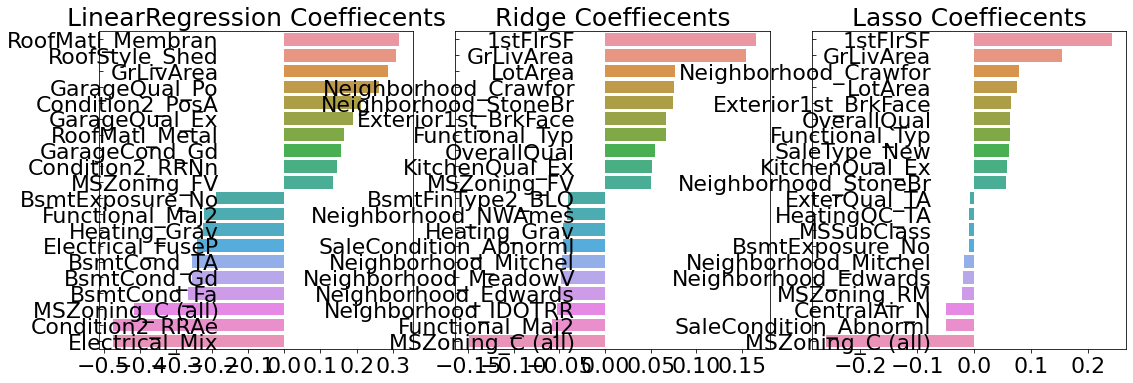

In [682]:
# 앞의 최적화 alpha값으로 학습데이터로 학습, 테스트 데이터로 예측 및 평가 수행. 
lr_reg = LinearRegression()
lr_reg.fit(x_train, y_train)

ridge_reg = Ridge(alpha=10)
ridge_reg.fit(x_train, y_train)

lasso_reg = Lasso(alpha=0.001)
lasso_reg.fit(x_train, y_train)

# 모든 모델의 RMSE 출력
models = [lr_reg, ridge_reg, lasso_reg]
get_rmses(models)

# 모든 모델의 회귀 계수 시각화 
models = [lr_reg, ridge_reg, lasso_reg]
visualize_coefficient(models)

In [683]:
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

In [684]:
xgb_params = {'n_estimators':[100]}
xgb_reg = XGBRegressor(n_estimators=100, learning_rate=0.05, 
                       colsample_bytree=0.5, subsample=0.8)
best_xgb = print_best_params(xgb_reg, xgb_params)

lgbm_params = {'n_estimators':[100]}
lgbm_reg = LGBMRegressor(n_estimators=100, learning_rate=0.05, num_leaves=4, 
                         subsample=0.6, colsample_bytree=0.4, reg_lambda=10, n_jobs=-1)
best_lgbm = print_best_params(lgbm_reg, lgbm_params)

XGBRegressor 5 CV 시 최적 평균 RMSE 값: 0.1502, 최적 alpha:{'n_estimators': 100}
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001835 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3157
[LightGBM] [Info] Number of data points in the train set: 1166, number of used features: 172
[LightGBM] [Info] Start training from score 12.021352
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003754 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3169
[LightGBM] [Info] Number of data points in the train set: 1166, number of used features: 169
[LightGBM] [Info] Start training from score 12.023516
[LightGBM] 

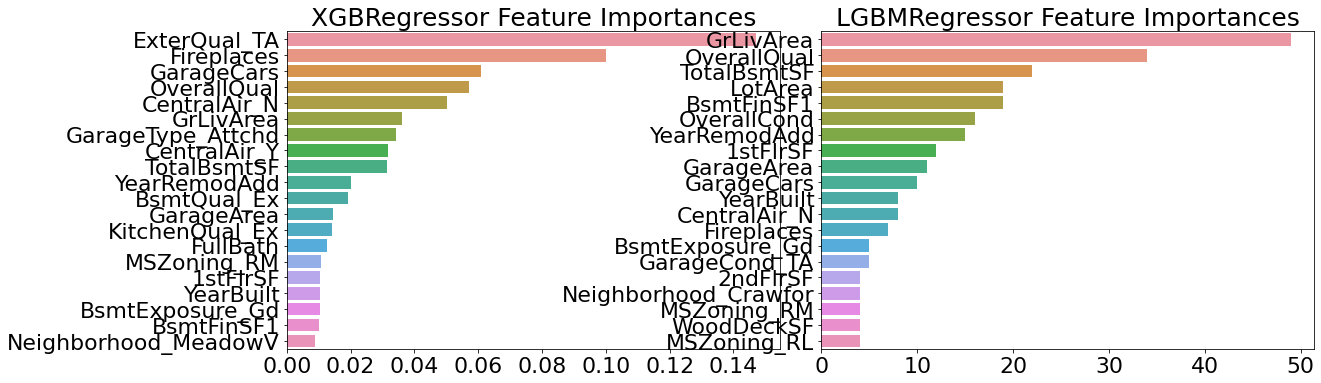

In [685]:
# 모델의 중요도 상위 20개의 피처명과 그때의 중요도값을 Series로 반환.
def get_top_features(model):
    ftr_importances_values = model.feature_importances_
    ftr_importances = pd.Series(ftr_importances_values, index=x.columns)
    ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]
    return ftr_top20

def visualize_ftr_importances(models):
    # 2개 회귀 모델의 시각화를 위해 2개의 컬럼을 가지는 subplot 생성
    fig, axs = plt.subplots(figsize=(15, 5),nrows=1, ncols=2)
    fig.tight_layout() 
    # 입력인자로 받은 list객체인 models에서 차례로 model을 추출하여 피처 중요도 시각화. 
    for i_num, model in enumerate(models):
        # 중요도 상위 20개의 피처명과 그때의 중요도값 추출 
        ftr_top20 = get_top_features(model)
        axs[i_num].set_title(model.__class__.__name__+' Feature Importances', size=25)
        #font 크기 조정.
        for label in (axs[i_num].get_xticklabels() + axs[i_num].get_yticklabels()):
            label.set_fontsize(22)
        sns.barplot(x=ftr_top20.values, y=ftr_top20.index , ax=axs[i_num])

# 앞 예제에서 print_best_params()가 반환한 GridSearchCV로 최적화된 모델의 피처 중요도 시각화    
models = [best_xgb, best_lgbm]
visualize_ftr_importances(models)

In [686]:
def get_rmse_pred(preds):
    for key in preds.keys():
        pred_value = preds[key]
        mse = mean_squared_error(y_test , pred_value)
        rmse = np.sqrt(mse)
        print('{0} 모델의 RMSE: {1}'.format(key, rmse))

# 개별 모델의 학습
ridge_reg = Ridge(alpha=10)
ridge_reg.fit(x_train, y_train)
lasso_reg = Lasso(alpha=0.001)
lasso_reg.fit(x_train, y_train)

xgb_reg = XGBRegressor(n_estimators=100, learning_rate=0.05, 
                       colsample_bytree=0.5, subsample=0.8)
lgbm_reg = LGBMRegressor(n_estimators=100, learning_rate=0.05, num_leaves=4, 
                         subsample=0.6, colsample_bytree=0.4, reg_lambda=10, n_jobs=-1)
xgb_reg.fit(x_train, y_train)
lgbm_reg.fit(x_train, y_train)

# 개별 모델 예측
ridge_pred = ridge_reg.predict(x_test)
lasso_pred = lasso_reg.predict(x_test)
xgb_pred = xgb_reg.predict(x_test)
lgbm_pred = lgbm_reg.predict(x_test)

# 개별 모델 예측값 혼합으로 최종 예측값 도출
pred = 0.2 * ridge_pred + 0.2 * lasso_pred + 0.3 * xgb_pred + 0.3 * lgbm_pred
preds = {'최종 혼합': pred,
         'Ridge': ridge_pred,
         'Lasso': lasso_pred,
         'XGB': xgb_pred,
         'LGBM': lgbm_pred
        }
#최종 혼합 모델, 개별모델의 RMSE 값 출력
get_rmse_pred(preds)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008005 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3176
[LightGBM] [Info] Number of data points in the train set: 1166, number of used features: 173
[LightGBM] [Info] Start training from score 12.025343
최종 혼합 모델의 RMSE: 0.1070669560690982
Ridge 모델의 RMSE: 0.10313416607869504
Lasso 모델의 RMSE: 0.10024170460890018
XGB 모델의 RMSE: 0.142597652897906
LGBM 모델의 RMSE: 0.1259491105489445


In [687]:
# 개별 기반 모델에서 최종 메타 모델이 사용할 학습 및 테스트용 데이터를 생성하기 위한 함수. 
def get_stacking_base_datasets(model, X_train_n, y_train_n, X_test_n, n_folds):
    # 지정된 n_folds값으로 KFold 생성.
    kf = KFold(n_splits=n_folds, shuffle=False)
    #추후에 메타 모델이 사용할 학습 데이터 반환을 위한 넘파이 배열 초기화 
    train_fold_pred = np.zeros((X_train_n.shape[0] ,1 ))
    test_pred = np.zeros((X_test_n.shape[0],n_folds))
    print(model.__class__.__name__ , ' model 시작 ')
    
    for folder_counter , (train_index, valid_index) in enumerate(kf.split(X_train_n)):
        #입력된 학습 데이터에서 기반 모델이 학습/예측할 폴드 데이터 셋 추출 
        print('\t 폴드 세트: ',folder_counter,' 시작 ')
        X_tr = X_train_n[train_index] 
        y_tr = y_train_n[train_index] 
        X_te = X_train_n[valid_index]  
        
        #폴드 세트 내부에서 다시 만들어진 학습 데이터로 기반 모델의 학습 수행.
        model.fit(X_tr , y_tr)       
        #폴드 세트 내부에서 다시 만들어진 검증 데이터로 기반 모델 예측 후 데이터 저장.
        train_fold_pred[valid_index, :] = model.predict(X_te).reshape(-1,1)
        #입력된 원본 테스트 데이터를 폴드 세트내 학습된 기반 모델에서 예측 후 데이터 저장. 
        test_pred[:, folder_counter] = model.predict(X_test_n)
            
    # 폴드 세트 내에서 원본 테스트 데이터를 예측한 데이터를 평균하여 테스트 데이터로 생성 
    test_pred_mean = np.mean(test_pred, axis=1).reshape(-1,1)    
    
    #train_fold_pred는 최종 메타 모델이 사용하는 학습 데이터, test_pred_mean은 테스트 데이터
    return train_fold_pred , test_pred_mean

In [688]:
# get_stacking_base_datasets()은 넘파이 ndarray를 인자로 사용하므로 DataFrame을 넘파이로 변환. 
x_train_n = x_train.values
x_test_n = x_test.values
y_train_n = y_train.values

# 각 개별 기반(Base)모델이 생성한 학습용/테스트용 데이터 반환. 
ridge_train, ridge_test = get_stacking_base_datasets(ridge_reg, x_train_n, y_train_n, x_test_n, 5)
lasso_train, lasso_test = get_stacking_base_datasets(lasso_reg, x_train_n, y_train_n, x_test_n, 5)
xgb_train, xgb_test = get_stacking_base_datasets(xgb_reg, x_train_n, y_train_n, x_test_n, 5)  
lgbm_train, lgbm_test = get_stacking_base_datasets(lgbm_reg, x_train_n, y_train_n, x_test_n, 5)

Ridge  model 시작 
	 폴드 세트:  0  시작 
	 폴드 세트:  1  시작 
	 폴드 세트:  2  시작 
	 폴드 세트:  3  시작 
	 폴드 세트:  4  시작 
Lasso  model 시작 
	 폴드 세트:  0  시작 
	 폴드 세트:  1  시작 
	 폴드 세트:  2  시작 
	 폴드 세트:  3  시작 
	 폴드 세트:  4  시작 
XGBRegressor  model 시작 
	 폴드 세트:  0  시작 
	 폴드 세트:  1  시작 
	 폴드 세트:  2  시작 
	 폴드 세트:  3  시작 
	 폴드 세트:  4  시작 
LGBMRegressor  model 시작 
	 폴드 세트:  0  시작 
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007966 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2926
[LightGBM] [Info] Number of data points in the train set: 932, number of used features: 157
[LightGBM] [Info] Start training from score 12.035561
	 폴드 세트:  1  시작 
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009067 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wi

In [689]:
# 개별 모델이 반환한 학습 및 테스트용 데이터 세트를 Stacking 형태로 결합.  
stack_final_x_train = np.concatenate((ridge_train, lasso_train, 
                                      xgb_train, lgbm_train), axis=1)
stack_final_x_test = np.concatenate((ridge_test, lasso_test, 
                                     xgb_test, lgbm_test), axis=1)

# 최종 메타 모델은 라쏘 모델을 적용. 
meta_model_lasso = Lasso(alpha=0.0005)

#기반 모델의 예측값을 기반으로 새롭게 만들어진 학습 및 테스트용 데이터로 예측하고 RMSE 측정.
meta_model_lasso.fit(stack_final_x_train, y_train)
final = meta_model_lasso.predict(stack_final_x_test)
mse = mean_squared_error(y_test , final)
rmse = np.sqrt(mse)
print('스태킹 회귀 모델의 최종 RMSE 값은:', rmse)

스태킹 회귀 모델의 최종 RMSE 값은: 0.09956333257374468


## Outlier detection

### (1) Classifier
- 분류기를 이용한 이상치(사기) 탐지
- Label 분포 맞추는 것에 유의

In [690]:
card_df = pd.read_csv('./data/creditcard.csv')
card_df.head(3)

Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   

        V26       V27       V28  Amount  Class  
0 -0.189115  0.133558 -0.021053  149.62      0  
1  0.125895 -0.008983  0.014724    2.69      0  
2 -0.139097 -0.055353 -0.059752  378.66      0  

[3 rows x 31 columns]

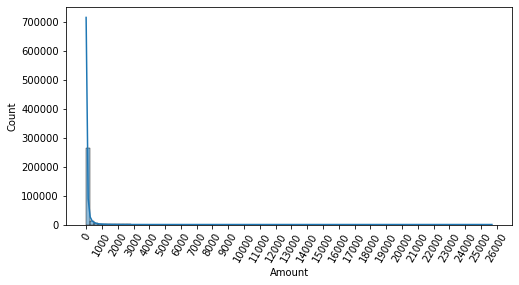

In [691]:
plt.figure(figsize=(8, 4))
plt.xticks(range(0, 30000, 1000), rotation=60)
sns.histplot(card_df['Amount'], bins=100, kde=True)
plt.show()

<AxesSubplot:>

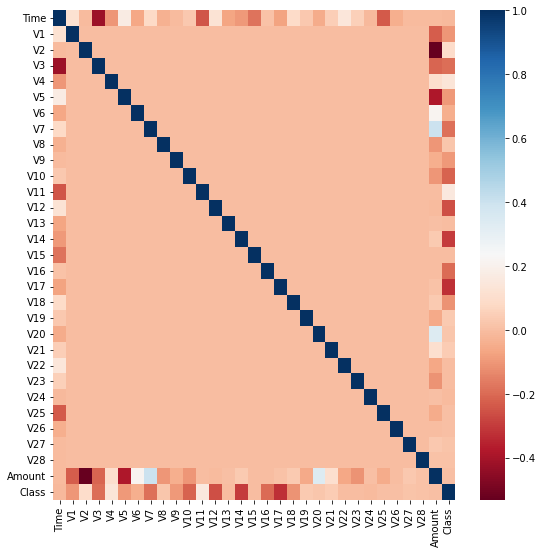

In [692]:
plt.figure(figsize=(9, 9))
corr = card_df.corr()
sns.heatmap(corr, cmap='RdBu')

In [693]:
# 인자로 입력받은 DataFrame을 복사 한 뒤 Time 컬럼만 삭제하고 복사된 DataFrame 반환
# StandardScaler를 이용하여 정규분포 형태로 Amount 피처값 변환 로직 추가
# 로그 변환 후 V14 피처의 이상치 데이터를 삭제하는 로직 추가
def get_preprocessed_df(df=None):
    df_copy = df.copy()
    amount_n = np.log1p(df_copy['Amount'])
    df_copy.insert(0, 'Amount_Scaled', amount_n)
    df_copy.drop(['Time','Amount'], axis=1, inplace=True)
    # 이상치 데이터 삭제하는 로직 추가 
    outlier_index = get_outlier(df=df_copy, column='V14', weight=1.5)
    df_copy.drop(outlier_index, axis=0, inplace=True)
    
    return df_copy

def get_outlier(df=None, column=None, weight=1.5):
    # fraud에 해당하는 column 데이터만 추출, 1/4 분위와 3/4 분위 지점을 np.percentile로 구함. 
    fraud = df[df['Class']==1][column]
    quantile_25 = np.percentile(fraud.values, 25)
    quantile_75 = np.percentile(fraud.values, 75)
    # IQR을 구하고, IQR에 1.5를 곱하여 최대값과 최소값 지점 구함. 
    iqr = quantile_75 - quantile_25
    iqr_weight = iqr * weight
    lowest_val = quantile_25 - iqr_weight
    highest_val = quantile_75 + iqr_weight
    # 최대값 보다 크거나, 최소값 보다 작은 값을 아웃라이어로 설정하고 DataFrame index 반환. 
    outlier_index = fraud[(fraud < lowest_val) | (fraud > highest_val)].index
    return outlier_index

# 사전 데이터 가공 후 학습과 테스트 데이터 세트를 반환하는 함수.
def get_train_test_dataset(df=None):
    # 인자로 입력된 DataFrame의 사전 데이터 가공이 완료된 복사 DataFrame 반환
    df_copy = get_preprocessed_df(df)
    # DataFrame의 맨 마지막 컬럼이 레이블, 나머지는 피처들
    X_features = df_copy.iloc[:, :-1]
    y_target = df_copy.iloc[:, -1]
    # train_test_split( )으로 학습과 테스트 데이터 분할. stratify=y_target으로 Stratified 기반 분할
    X_train, X_test, y_train, y_test = \
    train_test_split(X_features, y_target, test_size=0.3, random_state=0, stratify=y_target)
    # 학습과 테스트 데이터 세트 반환
    return X_train, X_test, y_train, y_test

x_train, x_test, y_train, y_test = get_train_test_dataset(card_df)

In [694]:
# 인자로 사이킷런의 Estimator객체와, 학습/테스트 데이터 세트를 입력 받아서 학습/예측/평가 수행.
def get_model_train_eval(model, ftr_train=None, ftr_test=None, tgt_train=None, tgt_test=None):
    model.fit(ftr_train, tgt_train)
    pred = model.predict(ftr_test)
    pred_proba = model.predict_proba(ftr_test)[:, 1]
    get_clf_eval(tgt_test, pred, pred_proba)

In [695]:
print('학습 데이터 레이블 값 비율')
print(y_train.value_counts()/y_train.shape[0] * 100)
print('테스트 데이터 레이블 값 비율')
print(y_test.value_counts()/y_test.shape[0] * 100)

학습 데이터 레이블 값 비율
0    99.828453
1     0.171547
Name: Class, dtype: float64
테스트 데이터 레이블 값 비율
0    99.829122
1     0.170878
Name: Class, dtype: float64


In [696]:
from sklearn.linear_model import LogisticRegression
from lightgbm import LGBMClassifier

In [697]:
from imblearn.over_sampling import SMOTE

In [698]:
### SMOTE 적용
smote = SMOTE(random_state=0)
x_train_over, y_train_over = smote.fit_resample(x_train, y_train)
print('SMOTE 적용 전 학습용 피처/레이블 데이터 세트: ', x_train.shape, y_train.shape)
print('SMOTE 적용 후 학습용 피처/레이블 데이터 세트: ', x_train_over.shape, y_train_over.shape)
print('SMOTE 적용 후 레이블 값 분포: \n', pd.Series(y_train_over).value_counts())

SMOTE 적용 전 학습용 피처/레이블 데이터 세트:  (199362, 29) (199362,)
SMOTE 적용 후 학습용 피처/레이블 데이터 세트:  (398040, 29) (398040,)
SMOTE 적용 후 레이블 값 분포: 
 0    199020
1    199020
Name: Class, dtype: int64


In [699]:
lr_clf = LogisticRegression()
lgbm_clf = LGBMClassifier(n_estimators=5, num_leaves=32, n_jobs=-1, boost_from_average=False)

# ftr_train과 tgt_train 인자값이 SMOTE 증식된 X_train_over와 y_train_over로 변경됨에 유의
get_model_train_eval(lr_clf, ftr_train=x_train_over, ftr_test=x_test, tgt_train=y_train_over, tgt_test=y_test)
get_model_train_eval(lgbm_clf, ftr_train=x_train_over, ftr_test=x_test, tgt_train=y_train_over, tgt_test=y_test)

오차 행렬
[[82937  2358]
 [   11   135]]
정확도: 0.9723, 정밀도: 0.0542, 재현율: 0.9247, F1: 0.1023, AUC:0.9737
[LightGBM] [Info] Number of positive: 199020, number of negative: 199020
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.029838 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7395
[LightGBM] [Info] Number of data points in the train set: 398040, number of used features: 29
오차 행렬
[[83824  1471]
 [   11   135]]
정확도: 0.9827, 정밀도: 0.0841, 재현율: 0.9247, F1: 0.1541, AUC:0.9785


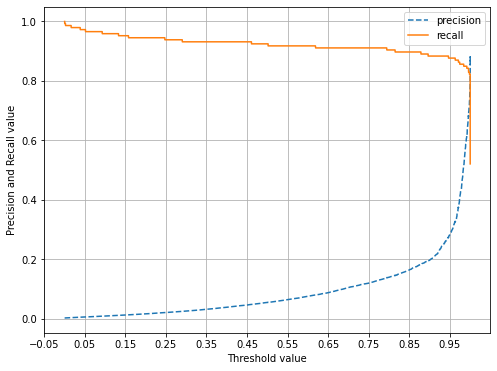

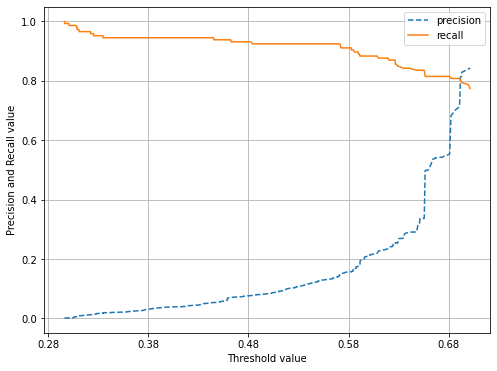

In [700]:
def precision_recall_curve_plot(y_test , pred_proba_c1):
    # threshold ndarray와 이 threshold에 따른 정밀도, 재현율 ndarray 추출. 
    precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_c1)
    
    # X축을 threshold값으로, Y축은 정밀도, 재현율 값으로 각각 Plot 수행. 정밀도는 점선으로 표시
    plt.figure(figsize=(8,6))
    threshold_boundary = thresholds.shape[0]
    sns.lineplot(thresholds, precisions[0:threshold_boundary], linestyle='dashed', label='precision')
    sns.lineplot(thresholds, recalls[0:threshold_boundary], label='recall')
    
    # threshold 값 X 축의 Scale을 0.1 단위로 변경
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1), 2))
    
    # x축, y축 label과 legend, 그리고 grid 설정
    plt.xlabel('Threshold value'); plt.ylabel('Precision and Recall value')
    plt.legend(); plt.grid()
    plt.show()
    
precision_recall_curve_plot(y_test, lr_clf.predict_proba(x_test)[:, 1])
precision_recall_curve_plot(y_test, lgbm_clf.predict_proba(x_test)[:, 1])

## Naive Bayes
- 데이터가 특정 클래스에 속할 확률 계산
- 특징들은 상호 독립적이라는 가정
- 빠르고, 노이즈와 결측치에 강하지만, 독립 가정이 깨지는 경우 문제 발생
- 데이터가 많지 않거나, 미래 예측이 목적일 때 사용
- 라플라스 스무딩: 출현하지 않은 특징의 빈도 조정 (+1)

### (1) GaussianNB
- 연속적인 성질의 데이터를 분류하는 데 사용
- 특징들의 값은 정규분포를 가정하고 조건부 확률 계산

In [701]:
sky = pd.read_csv("./ADP_book_ver01/data/Skyserver.csv")
sky.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   objid      10000 non-null  float64
 1   ra         10000 non-null  float64
 2   dec        10000 non-null  float64
 3   u          10000 non-null  float64
 4   g          10000 non-null  float64
 5   r          10000 non-null  float64
 6   i          10000 non-null  float64
 7   z          10000 non-null  float64
 8   run        10000 non-null  int64  
 9   rerun      10000 non-null  int64  
 10  camcol     10000 non-null  int64  
 11  field      10000 non-null  int64  
 12  specobjid  10000 non-null  float64
 13  class      10000 non-null  object 
 14  redshift   10000 non-null  float64
 15  plate      10000 non-null  int64  
 16  mjd        10000 non-null  int64  
 17  fiberid    10000 non-null  int64  
dtypes: float64(10), int64(7), object(1)
memory usage: 1.4+ MB


In [702]:
sky['class'].unique()

array(['STAR', 'GALAXY', 'QSO'], dtype=object)

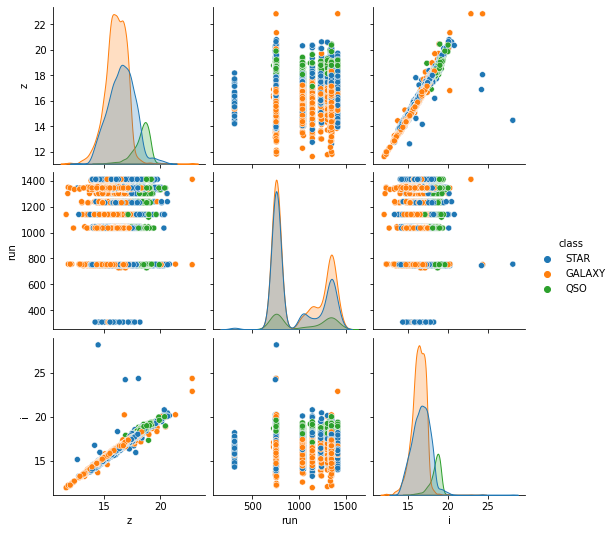

In [703]:
sns.pairplot(hue='class', data=sky[['z', 'run', 'i', 'class']])
plt.show()

In [704]:
features = list(sky.columns)
features.remove('class')
x = sky[features]
y = sky['class']

In [705]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1, stratify=y)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(7000, 17) (7000,)
(3000, 17) (3000,)


In [706]:
from sklearn.naive_bayes import GaussianNB

In [707]:
gnb = GaussianNB()

In [708]:
pred = gnb.fit(x_train, y_train).predict(x_test)
print("Accuracy Score : ", gnb.score(x_test, y_test))

Accuracy Score :  0.799


In [709]:
gnb.predict_proba(x_test)[[0, 13, 68]]

array([[8.27e-01, 4.43e-02, 1.29e-01],
       [5.40e-05, 9.64e-02, 9.04e-01],
       [8.33e-01, 4.48e-02, 1.22e-01]])

In [710]:
gnb.predict(x_test)[[0, 13, 68]]

array(['GALAXY', 'STAR', 'GALAXY'], dtype='<U6')

In [711]:
pred = gnb.predict(x_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

      GALAXY       0.74      0.97      0.84      1499
         QSO       0.00      0.00      0.00       255
        STAR       0.91      0.75      0.83      1246

    accuracy                           0.80      3000
   macro avg       0.55      0.58      0.56      3000
weighted avg       0.75      0.80      0.76      3000



### (2) BernoulliNB
- 이산형 데이터 (1, 0으로 이루어진 데이터)를 input으로 함
- CountVertorizer

In [712]:
spam = pd.read_csv('./ADP_book_ver01/data/spam.csv', encoding='utf-8')
spam.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [713]:
spam.isna().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [714]:
spam.head() # 잘못 로드된 column이 있음

v1  \
0   ham   
1   ham   
2  spam   
3   ham   
4   ham   

                                                                                                                                                            v2  \
0                                              Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...   
1                                                                                                                                Ok lar... Joking wif u oni...   
2  Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's   
3                                                                                                            U dun say so early hor... U c already then say...   
4                                                                                                Nah I don't think he goes to usf, he lives around here though   

  Unnamed: 2 Unnamed: 3 Unnamed: 4  
0        NaN        NaN        NaN  
1        NaN        NaN        NaN  
2        NaN        NaN        NaN  
3        NaN        NaN        NaN  
4        NaN        NaN        NaN

In [715]:
spam = spam[['v1', 'v2']]
spam

v1  \
0      ham   
1      ham   
2     spam   
3      ham   
4      ham   
...    ...   
5567  spam   
5568   ham   
5569   ham   
5570   ham   
5571   ham   

                                                                                                                                                                    v2  
0                                                      Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...  
1                                                                                                                                        Ok lar... Joking wif u oni...  
2          Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's  
3                                                                                                                    U dun say so early hor... U c already then say...  
4                                                                                                        Nah I don't think he goes to usf, he lives around here though  
...                                                                                                                                                                ...  
5567  This is the 2nd time we have tried 2 contact u. U have won the 鶯750 Pound prize. 2 claim is easy, call 087187272008 NOW1! Only 10p per minute. BT-national-rate.  
5568                                                                                                                              Will ? b going to esplanade fr home?  
5569                                                                                                         Pity, * was in mood for that. So...any other suggestions?  
5570                                     The guy did some bitching but I acted like i'd be interested in buying something else next week and he gave it to us for free  
5571                                                                                                                                        Rofl. Its true to its name  

[5572 rows x 2 columns]

In [716]:
spam['v1'].unique()

array(['ham', 'spam'], dtype=object)

In [717]:
spam['label'] = np.where(spam['v1']=='spam', 1, 0) # encoding
spam

v1  \
0      ham   
1      ham   
2     spam   
3      ham   
4      ham   
...    ...   
5567  spam   
5568   ham   
5569   ham   
5570   ham   
5571   ham   

                                                                                                                                                                    v2  \
0                                                      Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...   
1                                                                                                                                        Ok lar... Joking wif u oni...   
2          Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's   
3                                                                                                                    U dun say so early hor... U c already then say...   
4                                                                                                        Nah I don't think he goes to usf, he lives around here though   
...                                                                                                                                                                ...   
5567  This is the 2nd time we have tried 2 contact u. U have won the 鶯750 Pound prize. 2 claim is easy, call 087187272008 NOW1! Only 10p per minute. BT-national-rate.   
5568                                                                                                                              Will ? b going to esplanade fr home?   
5569                                                                                                         Pity, * was in mood for that. So...any other suggestions?   
5570                                     The guy did some bitching but I acted like i'd be interested in buying something else next week and he gave it to us for free   
5571                                                                                                                                        Rofl. Its true to its name   

      label  
0         0  
1         0  
2         1  
3         0  
4         0  
...     ...  
5567      1  
5568      0  
5569      0  
5570      0  
5571      0  

[5572 rows x 3 columns]

In [718]:
x = spam['v2']
y = spam['label']

In [719]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1, stratify=y)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(3900,) (3900,)
(1672,) (1672,)


In [720]:
from sklearn.feature_extraction.text import CountVectorizer 

In [721]:
### Text to count vector
# data를 1, 0으로 변환해야 함
cv = CountVectorizer(binary=True)
x_traincv = cv.fit_transform(x_train)
x_traincv.shape # 메일 수, 단어 수

(3900, 7175)

In [722]:
encoded_input = x_traincv.toarray()
encoded_input

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [723]:
print(cv.inverse_transform(encoded_input[[0]])) # original data 확인

[array(['couple', 'down', 'give', 'me', 'minutes', 'my', 'sure', 'to',
       'track', 'wallet', 'yeah'], dtype='<U34')]


In [724]:
print(cv.get_feature_names_out()[1000:1010], end='')

['at' 'ate' 'athletic' 'athome' 'atlanta' 'atlast' 'atm' 'attach'
 'attached' 'attack']

In [725]:
from sklearn.naive_bayes import BernoulliNB

In [726]:
bnb = BernoulliNB()
bnb.fit(x_traincv, y_train)

BernoulliNB()

In [727]:
x_testcv = cv.transform(x_test)
pred = bnb.predict(x_testcv)

acc = accuracy_score(y_test, pred)
print("Accuracy Score : ", acc)

Accuracy Score :  0.9754784688995215


In [728]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99      1448
           1       0.99      0.82      0.90       224

    accuracy                           0.98      1672
   macro avg       0.98      0.91      0.94      1672
weighted avg       0.98      0.98      0.97      1672



### (3) MultinomialNB
- 이산형 데이터를 input으로 함
- CounterVectorizer (binary=False)
- 출현 횟수에 따라 값이 달라질 때 사용

In [25]:
from sklearn.naive_bayes import MultinomialNB

In [28]:
loan_data = pd.read_csv("./Practical_Statictics/data/loan_data.csv.gz", index_col="Unnamed: 0")

# convert to categorical
loan_data.outcome = loan_data.outcome.astype('category')
loan_data.outcome.cat.reorder_categories(['paid off', 'default'])
loan_data.purpose_ = loan_data.purpose_.astype('category')
loan_data.home_ = loan_data.home_.astype('category')
loan_data.emp_len_ = loan_data.emp_len_.astype('category')

loan_data.head()

status  loan_amnt       term  annual_inc    dti  payment_inc_ratio  \
1  Charged Off       2500  60 months       30000   1.00            2.39320   
2  Charged Off       5600  60 months       40000   5.55            4.57170   
3  Charged Off       5375  60 months       15000  18.08            9.71600   
4  Charged Off       9000  36 months       30000  10.08           12.21520   
5  Charged Off      10000  36 months      100000   7.06            3.90888   

   revol_bal  revol_util             purpose home_ownership  delinq_2yrs_zero  \
1       1687         9.4                 car           RENT                 1   
2       5210        32.6      small_business            OWN                 1   
3       9279        36.5               other           RENT                 1   
4      10452        91.7  debt_consolidation           RENT                 1   
5      11997        55.5               other           RENT                 1   

   pub_rec_zero  open_acc  grade  outcome  emp_length            purpose_  \
1             1         3    4.8  default           1      major_purchase   
2             1        11    1.4  default           5      small_business   
3             1         2    6.0  default           1               other   
4             1         4    4.2  default           1  debt_consolidation   
5             1        14    5.4  default           4               other   

  home_   emp_len_  borrower_score  
1  RENT   > 1 Year            0.65  
2   OWN   > 1 Year            0.80  
3  RENT   > 1 Year            0.60  
4  RENT   > 1 Year            0.50  
5  RENT   > 1 Year            0.55

In [27]:
predictors = ['purpose_', 'home_', 'emp_len_']
outcome = 'outcome'
x = pd.get_dummies(loan_data[predictors], prefix='', prefix_sep='', dtype=int)
y = loan_data[outcome]

In [29]:
x

credit_card  debt_consolidation  home_improvement  major_purchase  \
0                0                   0                 0               1   
1                0                   0                 0               0   
2                0                   0                 0               0   
3                0                   1                 0               0   
4                0                   0                 0               0   
...            ...                 ...               ...             ...   
45337            1                   0                 0               0   
45338            0                   0                 0               0   
45339            0                   1                 0               0   
45340            0                   1                 0               0   
45341            0                   1                 0               0   

       medical  other  small_business  MORTGAGE  OWN  RENT   < 1 Year  \
0            0      0               0         0    0     1          0   
1            0      0               1         0    1     0          0   
2            0      1               0         0    0     1          0   
3            0      0               0         0    0     1          0   
4            0      1               0         0    0     1          0   
...        ...    ...             ...       ...  ...   ...        ...   
45337        0      0               0         0    0     1          0   
45338        0      1               0         1    0     0          0   
45339        0      0               0         1    0     0          0   
45340        0      0               0         1    0     0          0   
45341        0      0               0         1    0     0          0   

        > 1 Year  
0              1  
1              1  
2              1  
3              1  
4              1  
...          ...  
45337          1  
45338          1  
45339          1  
45340          1  
45341          1  

[45342 rows x 12 columns]

In [30]:
naive_model = MultinomialNB(alpha=1e-10, fit_prior=False) # 사후 확률 비계산
naive_model.fit(x, y)

new_loan = x.loc[146:146, :]
print('predicted class: ', naive_model.predict(new_loan)[0])

probabilities = pd.DataFrame(naive_model.predict_proba(new_loan),
                             columns=naive_model.classes_)
print('predicted probabilities',)
print(probabilities)

predicted class:  default
predicted probabilities
    default  paid off
0  0.653699  0.346301


In [729]:
from keras.datasets import imdb

(x_train, y_train), (x_test, y_test) = imdb.load_data()

In [730]:
### word index to text
word_to_index = imdb.get_word_index()
index_to_word = {}

for key, value in word_to_index.items():
    index_to_word[value + 3] = key
for index, token in enumerate(("<pad>", "<sos>", "<unk>")):
    index_to_word[index] = token

train_reviews = []
for x in x_train:
    tmp =' '.join([index_to_word[index] for index in x])
    train_reviews.append(tmp)

test_reviews = []
for x in x_test:
    tmp =' '.join([index_to_word[index] for index in x])
    test_reviews.append(tmp)

train = pd.concat([pd.DataFrame(train_reviews), pd.DataFrame(y_train)], axis =1)
train.columns = ['reviews', 'label']
train['reviews'] = train['reviews'].str[6:]

test = pd.concat([pd.DataFrame(test_reviews), pd.DataFrame(y_test)], axis =1)
test.columns = ['reviews', 'label']
train['reviews'] = train['reviews'].str[6:]

print("<<<<<<<<< Train Dataset for MNB >>>>>>>>>", train)
print("<<<<<<<<< Test Dataset for MNB >>>>>>>>>", test)

<<<<<<<<< Train Dataset for MNB >>>>>>>>>                                                                                                                                                                                                        reviews  \
0      ilm was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert redford's is an amazing actor and now th...   
1      ir big boobs bad music and a giant safety pin these are the words to best describe this terrible movie i love cheesy horror movies and i've seen hundreds but this had got to be on of the worst eve...   
2      as to be one of the worst films of the 1990s when my friends i were watching this film being the target audience it was aimed at we just sat watched the first half an hour with our jaws touching t...   
3      ots excel at storytelling the traditional sort many years after the event i can still see in my mind's eye an e

In [731]:
x_train, x_test = train['reviews'].values, test['reviews'].values
y_train, y_test = train['label'].values, test['label'].values

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(25000,) (25000,)
(25000,) (25000,)


In [732]:
from sklearn.feature_extraction.text import CountVectorizer

In [733]:
cv = CountVectorizer(binary=False) # 개수 세기
x_traincv = cv.fit_transform(x_train)
x_traincv.shape

(25000, 76521)

In [734]:
print(cv.inverse_transform(x_traincv)[0])

['ilm' 'was' 'just' 'brilliant' 'casting' 'location' 'scenery' 'story'
 'direction' 'everyone' 'really' 'suited' 'the' 'part' 'they' 'played'
 'and' 'you' 'could' 'imagine' 'being' 'there' 'robert' 'redford' 'is'
 'an' 'amazing' 'actor' 'now' 'same' 'director' 'norman' 'father' 'came'
 'from' 'scottish' 'island' 'as' 'myself' 'so' 'loved' 'fact' 'real'
 'connection' 'with' 'this' 'film' 'witty' 'remarks' 'throughout' 'were'
 'great' 'it' 'much' 'that' 'bought' 'soon' 'released' 'for' 'retail'
 'would' 'recommend' 'to' 'watch' 'fly' 'fishing' 'cried' 'at' 'end' 'sad'
 'know' 'what' 'say' 'if' 'cry' 'must' 'have' 'been' 'good' 'definitely'
 'also' 'congratulations' 'two' 'little' 'boy' 'of' 'paul' 'children'
 'are' 'often' 'left' 'out' 'praising' 'list' 'think' 'because' 'stars'
 'play' 'them' 'all' 'grown' 'up' 'such' 'big' 'profile' 'whole' 'but'
 'these' 'should' 'be' 'praised' 'done' 'don' 'lovely' 'true' 'someone'
 'life' 'after' 'shared' 'us']


In [735]:
print(cv.get_feature_names_out()[-10:])

['était' 'état' 'étc' 'évery' 'êxtase' 'ís' 'ísnt' 'østbye' 'über'
 'üvegtigris']


In [737]:
mnb = MultinomialNB()
mnb.fit(x_traincv, y_train)

MultinomialNB()

In [738]:
x_testcv = cv.transform(x_test)
pred = mnb.predict(x_testcv)
acc = accuracy_score(y_test, pred)
print("Accuracy Score : ", acc)

Accuracy Score :  0.81932


In [739]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.79      0.87      0.83     12500
           1       0.85      0.77      0.81     12500

    accuracy                           0.82     25000
   macro avg       0.82      0.82      0.82     25000
weighted avg       0.82      0.82      0.82     25000



## Recommendations
- Content based filtering: 사용자가 특정한 아이템을 선호하는 경우, 비슷한 콘텐츠의 다른 아이템을 추천하는 것
- Collaborative filtering: 평점 정보나, 상품 구매 이력과 같은 사용자 행동(User Behavior) 기반 추천
    - NN filtering: 사용자 기반과 아이템 기반으로 구분
        - 사용자 기반: 특정 사용자와 유사한 다른 사용자를 Top-N으로 선정, Top-N이 좋아하는 아이템 추천
        - 아이템 기반: 사용자들의 아이템 선호 평가 척도가 유사한 아이템 추천 (사용자 기반보다 성능 좋음)
    - Latent Factor filtering: 행렬 분해를 이용한 방법. 사용자-아이템 행렬의 잠재 요인 추출 

### (1) Content based filtering

In [740]:
movies =pd.read_csv('./data/tmdb-5000-movie-dataset/tmdb_5000_movies.csv')
print(movies.shape)
movies.head(1)

(4803, 20)


budget  \
0  237000000   

                                                                                                                                   genres  \
0  [{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 878, "name": "Science Fiction"}]   

                      homepage     id  \
0  http://www.avatarmovie.com/  19995   

                                                                                                                                                                                                  keywords  \
0  [{"id": 1463, "name": "culture clash"}, {"id": 2964, "name": "future"}, {"id": 3386, "name": "space war"}, {"id": 3388, "name": "space colony"}, {"id": 3679, "name": "society"}, {"id": 3801, "name...   

  original_language original_title  \
0                en         Avatar   

                                                                                                                                                                          overview  \
0  In the 22nd century, a paraplegic Marine is dispatched to the moon Pandora on a unique mission, but becomes torn between following orders and protecting an alien civilization.   

   popularity  \
0  150.437577   

                                                                                                                                                                                      production_companies  \
0  [{"name": "Ingenious Film Partners", "id": 289}, {"name": "Twentieth Century Fox Film Corporation", "id": 306}, {"name": "Dune Entertainment", "id": 444}, {"name": "Lightstorm Entertainment", "id"...   

                                                                                         production_countries  \
0  [{"iso_3166_1": "US", "name": "United States of America"}, {"iso_3166_1": "GB", "name": "United Kingdom"}]   

  release_date     revenue  runtime  \
0   2009-12-10  2787965087    162.0   

                                                                        spoken_languages  \
0  [{"iso_639_1": "en", "name": "English"}, {"iso_639_1": "es", "name": "Espa\u00f1ol"}]   

     status                      tagline   title  vote_average  vote_count  
0  Released  Enter the World of Pandora.  Avatar           7.2       11800

In [741]:
movies_df = movies[['id','title', 'genres', 'vote_average', 'vote_count',
                 'popularity', 'keywords', 'overview']]

In [742]:
pd.set_option('max_colwidth', 100)
movies_df[['genres','keywords']][:1]

genres  \
0  [{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {...   

                                                                                              keywords  
0  [{"id": 1463, "name": "culture clash"}, {"id": 2964, "name": "future"}, {"id": 3386, "name": "sp...

In [743]:
from ast import literal_eval

In [744]:
movies_df['genres'] = movies_df['genres'].apply(literal_eval) # 문자열을 해석해서 객체로 반환
movies_df['keywords'] = movies_df['keywords'].apply(literal_eval)

In [745]:
movies_df['genres'] = movies_df['genres'].apply(lambda x: [y['name'] for y in x])
movies_df['keywords'] = movies_df['keywords'].apply(lambda x: [y['name'] for y in x])
movies_df[['genres', 'keywords']][:1]

genres  \
0  [Action, Adventure, Fantasy, Science Fiction]   

                                                                                              keywords  
0  [culture clash, future, space war, space colony, society, space travel, futuristic, romance, spa...

In [746]:
from sklearn.feature_extraction.text import CountVectorizer

In [747]:
# CountVectorizer를 적용하기 위해 공백문자로 word 단위가 구분되는 문자열로 변환. 
movies_df['genres_literal'] = movies_df['genres'].apply(lambda x : (' ').join(x))
count_vect = CountVectorizer(min_df=0, ngram_range=(1, 2))
genre_mat = count_vect.fit_transform(movies_df['genres_literal'])
print(genre_mat.shape)

(4803, 276)


In [748]:
from sklearn.metrics.pairwise import cosine_similarity

In [749]:
# 장르 유사도 계산 -> 장르 기반 콘텐츠 필터링
genre_sim = cosine_similarity(genre_mat, genre_mat)
print(genre_sim.shape)
print(genre_sim[:2])

(4803, 4803)
[[1.   0.6  0.45 ... 0.   0.   0.  ]
 [0.6  1.   0.4  ... 0.   0.   0.  ]]


In [750]:
genre_sim_sorted_ind = genre_sim.argsort()[:, ::-1]
print(genre_sim_sorted_ind[:1])

[[   0 3494  813 ... 3038 3037 2401]]


In [751]:
movies_df[['title', 'vote_average', 'vote_count']].sort_values('vote_average', ascending=False)[:10]

title  vote_average  vote_count
3519          Stiff Upper Lips          10.0           1
4247     Me You and Five Bucks          10.0           2
4045     Dancer, Texas Pop. 81          10.0           1
4662            Little Big Top          10.0           1
3992                 Sardaarji           9.5           2
2386            One Man's Hero           9.3           2
2970        There Goes My Baby           8.5           2
1881  The Shawshank Redemption           8.5        8205
2796     The Prisoner of Zenda           8.4          11
3337             The Godfather           8.4        5893

In [752]:
C = movies_df['vote_average'].mean()
m = movies_df['vote_count'].quantile(0.6)
print('C:',round(C,3), 'm:',round(m,3))

C: 6.092 m: 370.2


In [753]:
# 가중 평점 계산
percentile = 0.6
m = movies_df['vote_count'].quantile(percentile)
C = movies_df['vote_average'].mean()

def weighted_vote_average(record):
    v = record['vote_count']
    R = record['vote_average']
    
    return ( (v/(v+m)) * R ) + ( (m/(m+v)) * C )   

movies_df['weighted_vote'] = movies_df.apply(weighted_vote_average, axis=1) 


In [754]:
movies_df[['title','vote_average', 'weighted_vote',' vote_count']].sort_values('weighted_vote',
                                                                          ascending=False)[:10]


KeyError: "[' vote_count'] not in index"

In [ ]:
def find_sim_movie(df, sorted_ind, title_name, top_n=10):
    title_movie = df[df['title'] == title_name]
    title_index = title_movie.index.values
    
    # top_n의 2배에 해당하는 쟝르 유사성이 높은 index 추출 
    similar_indexes = sorted_ind[title_index, :(top_n*2)]
    similar_indexes = similar_indexes.reshape(-1)
# 기준 영화 index는 제외
    similar_indexes = similar_indexes[similar_indexes != title_index]
    
    # top_n의 2배에 해당하는 후보군에서 weighted_vote 높은 순으로 top_n 만큼 추출 
    return df.iloc[similar_indexes].sort_values('weighted_vote', ascending=False)[:top_n]

similar_movies = find_sim_movie(movies_df, genre_sim_sorted_ind, 'The Godfather',10)
similar_movies[['title', 'vote_average', 'weighted_vote']]

### (2) NN-Collaborative filtering

In [ ]:
### Movie rating data
movies = pd.read_csv('./data/ml-latest-small/movies.csv')
ratings = pd.read_csv('./data/ml-latest-small/ratings.csv')
print(movies.shape)
print(ratings.shape)

In [ ]:
movies.head()

In [ ]:
ratings.head()

In [ ]:
# title 컬럼을 얻기 이해 movies 와 조인 수행
rating_movies = pd.merge(ratings, movies, on='movieId')

# columns='title' 로 title 컬럼으로 pivot 수행. 
ratings = ratings[['userId', 'movieId', 'rating']]
ratings_matrix = rating_movies.pivot_table('rating', index='userId', columns='title')

# NaN 값을 모두 0 으로 변환
ratings_matrix = ratings_matrix.fillna(0)
ratings_matrix.head(3)

In [ ]:
ratings_matrix_T = ratings_matrix.transpose()
ratings_matrix_T.head(3)

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
### 영화의 유사도 산출
item_sim = cosine_similarity(ratings_matrix_T, ratings_matrix_T) # 코사인 유사도 계산 시, 행 기준으로 유사도가 계산되므로 Transpose

# cosine_similarity() 로 반환된 넘파이 행렬을 영화명을 매핑하여 DataFrame으로 변환
item_sim_df = pd.DataFrame(data=item_sim, index=ratings_matrix.columns,
                          columns=ratings_matrix.columns)
print(item_sim_df.shape)
item_sim_df.head(3)

In [ ]:
item_sim_df["Godfather, The (1972)"].sort_values(ascending=False)[:6]

In [ ]:
item_sim_df["Inception (2010)"].sort_values(ascending=False)[1:6]

In [ ]:
def predict_rating(ratings_arr, item_sim_arr):
    return ratings_arr.dot(item_sim_arr)/ np.array([np.abs(item_sim_arr).sum(axis=1)])

In [ ]:
ratings_pred = predict_rating(ratings_matrix.values, item_sim_df.values)
ratings_pred_matrix = pd.DataFrame(data=ratings_pred, index= ratings_matrix.index,
                                   columns = ratings_matrix.columns)
ratings_pred_matrix.head(3)

In [ ]:
# 사용자가 평점을 부여한 영화에 대해서만 예측 성능 평가 MSE 를 구함. 
def get_mse(pred, actual):
    # Ignore nonzero terms.
    pred = pred[actual.nonzero()].flatten()
    actual = actual[actual.nonzero()].flatten()
    return mean_squared_error(pred, actual)

print('아이템 기반 모든 인접 이웃 MSE: ', get_mse(ratings_pred, ratings_matrix.values ))

In [ ]:
def predict_rating_topsim(ratings_arr, item_sim_arr, n=20):
    # 사용자-아이템 평점 행렬 크기만큼 0으로 채운 예측 행렬 초기화
    pred = np.zeros(ratings_arr.shape)

    # 사용자-아이템 평점 행렬의 열 크기만큼 Loop 수행. 
    for col in range(ratings_arr.shape[1]):
        # 유사도 행렬에서 유사도가 큰 순으로 n개 데이터 행렬의 index 반환
        top_n_items = [np.argsort(item_sim_arr[:, col])[:-n-1:-1]]
        # 개인화된 예측 평점을 계산
        for row in range(ratings_arr.shape[0]):
            pred[row, col] = item_sim_arr[col, :][top_n_items].dot(ratings_arr[row, :][top_n_items].T) 
            pred[row, col] /= np.sum(np.abs(item_sim_arr[col, :][top_n_items]))
            
    return pred

In [ ]:
ratings_pred = predict_rating_topsim(ratings_matrix.values , item_sim_df.values, n=20)
print('아이템 기반 인접 TOP-20 이웃 MSE: ', get_mse(ratings_pred, ratings_matrix.values))

# 계산된 예측 평점 데이터는 DataFrame으로 재생성
ratings_pred_matrix = pd.DataFrame(data=ratings_pred, index= ratings_matrix.index,
                                   columns = ratings_matrix.columns)


In [ ]:
# 9번 user 아이템 추천
user_rating_id = ratings_matrix.loc[9, :]
user_rating_id[ user_rating_id > 0].sort_values(ascending=False)[:10]

In [ ]:
def get_unseen_movies(ratings_matrix, userId):
    # userId로 입력받은 사용자의 모든 영화정보 추출하여 Series로 반환함. 
    # 반환된 user_rating 은 영화명(title)을 index로 가지는 Series 객체임. 
    user_rating = ratings_matrix.loc[userId,:]
    
    # user_rating이 0보다 크면 기존에 관람한 영화임. 대상 index를 추출하여 list 객체로 만듬
    already_seen = user_rating[ user_rating > 0].index.tolist()
    
    # 모든 영화명을 list 객체로 만듬. 
    movies_list = ratings_matrix.columns.tolist()
    
    # list comprehension으로 already_seen에 해당하는 movie는 movies_list에서 제외함. 
    unseen_list = [ movie for movie in movies_list if movie not in already_seen]
    
    return unseen_list

In [ ]:
def recomm_movie_by_userid(pred_df, userId, unseen_list, top_n=10):
    # 예측 평점 DataFrame에서 사용자id index와 unseen_list로 들어온 영화명 컬럼을 추출하여
    # 가장 예측 평점이 높은 순으로 정렬함. 
    recomm_movies = pred_df.loc[userId, unseen_list].sort_values(ascending=False)[:top_n]
    return recomm_movies
    
# 사용자가 관람하지 않는 영화명 추출   
unseen_list = get_unseen_movies(ratings_matrix, 9)

# 아이템 기반의 인접 이웃 협업 필터링으로 영화 추천 
recomm_movies = recomm_movie_by_userid(ratings_pred_matrix, 9, unseen_list, top_n=10)

# 평점 데이타를 DataFrame으로 생성. 
recomm_movies = pd.DataFrame(data=recomm_movies.values,index=recomm_movies.index,columns=['pred_score'])
recomm_movies

### (3) Latent Fatcor Collaborative filtering

In [ ]:
# 원본 행렬 R 생성, 분해 행렬 P와 Q 초기화, 잠재요인 차원 K는 3 설정. 
R = np.array([[4, np.NaN, np.NaN, 2, np.NaN ],
              [np.NaN, 5, np.NaN, 3, 1 ],
              [np.NaN, np.NaN, 3, 4, 4 ],
              [5, 2, 1, 2, np.NaN ]])
num_users, num_items = R.shape
K = 3

# P와 Q 매트릭스의 크기를 지정하고 정규분포를 가진 random한 값으로 입력합니다. 
np.random.seed(1)
P = np.random.normal(scale=1./K, size=(num_users, K))
Q = np.random.normal(scale=1./K, size=(num_items, K))

In [ ]:
def get_rmse(R, P, Q, non_zeros):
    error = 0
    # 두개의 분해된 행렬 P와 Q.T의 내적으로 예측 R 행렬 생성
    full_pred_matrix = np.dot(P, Q.T)
    
    # 실제 R 행렬에서 널이 아닌 값의 위치 인덱스 추출하여 실제 R 행렬과 예측 행렬의 RMSE 추출
    x_non_zero_ind = [non_zero[0] for non_zero in non_zeros]
    y_non_zero_ind = [non_zero[1] for non_zero in non_zeros]
    R_non_zeros = R[x_non_zero_ind, y_non_zero_ind]
    full_pred_matrix_non_zeros = full_pred_matrix[x_non_zero_ind, y_non_zero_ind]
      
    mse = mean_squared_error(R_non_zeros, full_pred_matrix_non_zeros)
    rmse = np.sqrt(mse)
    
    return rmse

In [ ]:
# R > 0 인 행 위치, 열 위치, 값을 non_zeros 리스트에 저장. 
non_zeros = [ (i, j, R[i,j]) for i in range(num_users) for j in range(num_items) if R[i,j] > 0 ]

steps=1000
learning_rate=0.01
r_lambda=0.01

# SGD 기법으로 P와 Q 매트릭스를 계속 업데이트. 
for step in range(steps):
    for i, j, r in non_zeros:
        # 실제 값과 예측 값의 차이인 오류 값 구함
        eij = r - np.dot(P[i, :], Q[j, :].T)
        # Regularization을 반영한 SGD 업데이트 공식 적용
        P[i,:] = P[i,:] + learning_rate*(eij * Q[j, :] - r_lambda*P[i,:])
        Q[j,:] = Q[j,:] + learning_rate*(eij * P[i, :] - r_lambda*Q[j,:])

    rmse = get_rmse(R, P, Q, non_zeros)
    if (step % 50) == 0 :
        print("### iteration step : ", step," rmse : ", rmse)

In [ ]:
pred_matrix = np.dot(P, Q.T)
print('예측 행렬:\n', np.round(pred_matrix, 3))

In [ ]:
def matrix_factorization(R, K, steps=200, learning_rate=0.01, r_lambda = 0.01):
    num_users, num_items = R.shape
    # P와 Q 매트릭스의 크기를 지정하고 정규분포를 가진 랜덤한 값으로 입력합니다. 
    np.random.seed(1)
    P = np.random.normal(scale=1./K, size=(num_users, K))
    Q = np.random.normal(scale=1./K, size=(num_items, K))
       
    # R > 0 인 행 위치, 열 위치, 값을 non_zeros 리스트 객체에 저장. 
    non_zeros = [ (i, j, R[i,j]) for i in range(num_users) for j in range(num_items) if R[i,j] > 0 ]
   
    # SGD기법으로 P와 Q 매트릭스를 계속 업데이트. 
    for step in range(steps):
        for i, j, r in non_zeros:
            # 실제 값과 예측 값의 차이인 오류 값 구함
            eij = r - np.dot(P[i, :], Q[j, :].T)
            # Regularization을 반영한 SGD 업데이트 공식 적용
            P[i,:] = P[i,:] + learning_rate*(eij * Q[j, :] - r_lambda*P[i,:])
            Q[j,:] = Q[j,:] + learning_rate*(eij * P[i, :] - r_lambda*Q[j,:])
       
        rmse = get_rmse(R, P, Q, non_zeros)
        if (step % 10) == 0 :
            print("### iteration step : ", step," rmse : ", rmse)
            
    return P, Q

In [ ]:
### 평점 data
movies = pd.read_csv('./data/ml-latest-small/movies.csv')
ratings = pd.read_csv('./data/ml-latest-small/ratings.csv')
ratings = ratings[['userId', 'movieId', 'rating']]
ratings_matrix = ratings.pivot_table('rating', index='userId', columns='movieId')

# title 컬럼을 얻기 이해 movies 와 조인 수행
rating_movies = pd.merge(ratings, movies, on='movieId')

# columns='title' 로 title 컬럼으로 pivot 수행. 
ratings_matrix = rating_movies.pivot_table('rating', index='userId', columns='title')

In [ ]:
P, Q = matrix_factorization(ratings_matrix.values, K=50, steps=50, learning_rate=0.01, r_lambda = 0.01)
pred_matrix = np.dot(P, Q.T)

In [ ]:
ratings_pred_matrix = pd.DataFrame(data=pred_matrix, index= ratings_matrix.index,
                                   columns = ratings_matrix.columns)

ratings_pred_matrix.head(3)

In [ ]:
def get_unseen_movies(ratings_matrix, userId):
    # userId로 입력받은 사용자의 모든 영화정보 추출하여 Series로 반환함. 
    # 반환된 user_rating 은 영화명(title)을 index로 가지는 Series 객체임. 
    user_rating = ratings_matrix.loc[userId,:]
    
    # user_rating이 0보다 크면 기존에 관람한 영화임. 대상 index를 추출하여 list 객체로 만듬
    already_seen = user_rating[ user_rating > 0].index.tolist()
    
    # 모든 영화명을 list 객체로 만듬. 
    movies_list = ratings_matrix.columns.tolist()
    
    # list comprehension으로 already_seen에 해당하는 movie는 movies_list에서 제외함. 
    unseen_list = [ movie for movie in movies_list if movie not in already_seen]
    
    return unseen_list

In [ ]:
def recomm_movie_by_userid(pred_df, userId, unseen_list, top_n=10):
    # 예측 평점 DataFrame에서 사용자id index와 unseen_list로 들어온 영화명 컬럼을 추출하여
    # 가장 예측 평점이 높은 순으로 정렬함. 
    recomm_movies = pred_df.loc[userId, unseen_list].sort_values(ascending=False)[:top_n]
    return recomm_movies

In [ ]:
# 사용자가 관람하지 않는 영화명 추출   
unseen_list = get_unseen_movies(ratings_matrix, 9)

# 아이템 기반의 인접 이웃 협업 필터링으로 영화 추천 
recomm_movies = recomm_movie_by_userid(ratings_pred_matrix, 9, unseen_list, top_n=10)

# 평점 데이타를 DataFrame으로 생성. 
recomm_movies = pd.DataFrame(data=recomm_movies.values,index=recomm_movies.index,columns=['pred_score'])
recomm_movies

### (4) Surprise package

In [ ]:
!pip install surprise
from surprise import SVD
from surprise import Dataset 
from surprise import accuracy 
from surprise.model_selection import train_test_split

In [ ]:
data = Dataset.load_builtin('ml-100k')
# 수행 시마다 동일하게 데이터를 분할하기 위해 random_state 값 부여
trainset, testset = train_test_split(data, test_size=.25, random_state=0) 

In [ ]:
algo = SVD(random_state=0)
algo.fit(trainset) 

In [ ]:
predictions = algo.test(testset) # 전체 추천 예측
print('prediction type :',type(predictions), ' size:',len(predictions))
print('prediction 결과의 최초 5개 추출')
predictions[:5]

In [ ]:
[(pred.uid, pred.iid, pred.est) for pred in predictions[:3]]

In [ ]:
# 사용자 아이디, 아이템 아이디는 문자열로 입력해야 함. 
uid = str(196)
iid = str(302)
pred = algo.predict(uid, iid) # 개별 사용자와 아이템에 대한 추천 예측
print(pred)

In [ ]:
accuracy.rmse(predictions)

In [ ]:
### Reader & Dataset
ratings = pd.read_csv('./data/ml-latest-small/ratings.csv')
# ratings_noh.csv 파일로 unload 시 index 와 header를 모두 제거한 새로운 파일 생성.  
ratings.to_csv('./data/ml-latest-small/ratings_noh.csv', index=False, header=False)

In [ ]:
from surprise import Reader, Dataset

In [ ]:
reader = Reader(line_format='user item rating timestamp', sep=',', rating_scale=(0.5, 5)) # 실제 로드는 앞 3개 컬럼만 됨 (유저 아이템 평점)
data = Dataset.load_from_file('./data/ml-latest-small/ratings_noh.csv', reader=reader)

In [ ]:
trainset, testset = train_test_split(data, test_size=.25, random_state=0)

In [ ]:
ratings = pd.read_csv('./data/ml-latest-small/ratings.csv') 
reader = Reader(rating_scale=(0.5, 5.0)) 

# ratings DataFrame 에서 컬럼은 사용자 아이디, 아이템 아이디, 평점 순서를 지켜야 합니다. 
data = Dataset.load_from_df(ratings[['userId', 'movieId', 'rating']], reader)
trainset, testset = train_test_split(data, test_size=.25, random_state=0)

In [ ]:
from surprise.model_selection import cross_validate
from surprise.model_selection import GridSearchCV

In [ ]:
### Cross validataion
algo = SVD(random_state=0)
cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

In [ ]:
# 최적화할 파라미터를 딕셔너리 형태로 지정.
param_grid = {'n_epochs': [20, 40, 60], 'n_factors': [50, 100, 200]}

# CV를 3개 폴드 세트로 지정, 성능 평가는 rmse, mse로 수행하도록 GridSearchCV 구성
gs = GridSearchCV(SVD, param_grid, measures=['rmse', 'mae'], cv=3)
gs.fit(data)

# 최고 RMSE Evaluation 점수와 그때의 하이퍼 파라미터
print(gs.best_score['rmse'])
print(gs.best_params['rmse'])

In [ ]:
from surprise.dataset import DatasetAutoFolds

In [ ]:
### 영화 추천 시스템 구축
reader = Reader(line_format='user item rating timestamp', sep=',', rating_scale=(0.5, 5))
# DatasetAutoFolds 클래스를 ratings_noh.csv 파일 기반으로 생성. 
data_folds = DatasetAutoFolds(ratings_file='./data/ml-latest-small/ratings_noh.csv', reader=reader)

#전체 데이터를 학습데이터로 생성함. 
trainset = data_folds.build_full_trainset()

In [ ]:
algo = SVD(n_epochs=20, n_factors=50, random_state=0)
algo.fit(trainset)

In [ ]:
# 영화에 대한 상세 속성 정보 DataFrame로딩
movies = pd.read_csv('./data/ml-latest-small/movies.csv')

# userId=9 의 movieId 데이터 추출하여 movieId=42 데이터가 있는지 확인. 
movieIds = ratings[ratings['userId']==9]['movieId']
if movieIds[movieIds==42].count() == 0:
    print('사용자 아이디 9는 영화 아이디 42의 평점 없음')

print(movies[movies['movieId']==42])

In [ ]:
uid = str(9)
iid = str(42)

pred = algo.predict(uid, iid, verbose=True)

In [ ]:
def get_unseen_surprise(ratings, movies, userId):
    #입력값으로 들어온 userId에 해당하는 사용자가 평점을 매긴 모든 영화를 리스트로 생성
    seen_movies = ratings[ratings['userId']== userId]['movieId'].tolist()
    
    # 모든 영화들의 movieId를 리스트로 생성. 
    total_movies = movies['movieId'].tolist()
    
    # 모든 영화들의 movieId중 이미 평점을 매긴 영화의 movieId를 제외하여 리스트로 생성
    unseen_movies= [movie for movie in total_movies if movie not in seen_movies]
    print('평점 매긴 영화수:',len(seen_movies), '추천대상 영화수:',len(unseen_movies), \
          '전체 영화수:',len(total_movies))
    
    return unseen_movies

unseen_movies = get_unseen_surprise(ratings, movies, 9)

In [ ]:
def recomm_movie_by_surprise(algo, userId, unseen_movies, top_n=10):
    # 알고리즘 객체의 predict() 메서드를 평점이 없는 영화에 반복 수행한 후 결과를 list 객체로 저장
    predictions = [algo.predict(str(userId), str(movieId)) for movieId in unseen_movies]
    
    # predictions list 객체는 surprise의 Predictions 객체를 원소로 가지고 있음.
    # [Prediction(uid='9', iid='1', est=3.69), Prediction(uid='9', iid='2', est=2.98),,,,]
    # 이를 est 값으로 정렬하기 위해서 아래의 sortkey_est 함수를 정의함.
    # sortkey_est 함수는 list 객체의 sort() 함수의 키 값으로 사용되어 정렬 수행.
    def sortkey_est(pred):
        return pred.est
    
    # sortkey_est( ) 반환값의 내림 차순으로 정렬 수행하고 top_n개의 최상위 값 추출.
    predictions.sort(key=sortkey_est, reverse=True)
    top_predictions= predictions[:top_n]
    
    # top_n으로 추출된 영화의 정보 추출. 영화 아이디, 추천 예상 평점, 제목 추출
    top_movie_ids = [ int(pred.iid) for pred in top_predictions]
    top_movie_rating = [ pred.est for pred in top_predictions]
    top_movie_titles = movies[movies.movieId.isin(top_movie_ids)]['title']
    top_movie_preds = [ (id, title, rating) for id, title, rating in zip(top_movie_ids, top_movie_titles, top_movie_rating)]
    
    return top_movie_preds

unseen_movies = get_unseen_surprise(ratings, movies, 9)
top_movie_preds = recomm_movie_by_surprise(algo, 9, unseen_movies, top_n=10)
print('##### Top-10 추천 영화 리스트 #####')

for top_movie in top_movie_preds:
    print(top_movie[1], ":", top_movie[2])

## Artificial Neural Networks (ANN)
- 동물의 뇌 신경계를 모방하여 만들어진 모형
- Input layer, Hidden layer, Output layer
- 다양한 활성함수들: sign(threshold), step, sigmoid, softman, tanh, gauss

### (1) NN Basics

#### Perceptron
- TLU (Threshold logic unit)
- 입력의 가중치 합을 계산하여, Step function을 통해 결과 출력

In [ ]:
from sklearn.linear_model import Perceptron

In [ ]:
x = iris.iloc[:, 2:4]  # 꽃잎 길이, 꽃잎 너비
y = (iris.Class == 0).astype(np.int)

In [ ]:
per_clf = Perceptron(max_iter=1000, tol=1e-3, random_state=42) # SGDClassifier(loss="perceptron", learning_rate="constant", eta0=1, penalty=None) 와 동일
per_clf.fit(x, y)

y_pred = per_clf.predict([[2, 0.5]])
y_pred

#### Activation functions

In [ ]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def relu(z):
    return np.maximum(0, z)

def derivative(f, z, eps=0.000001):
    return (f(z + eps) - f(z - eps))/(2 * eps)

In [ ]:
z = np.linspace(-5, 5, 200)

plt.figure(figsize=(11,4))

plt.subplot(121)
plt.plot(z, np.sign(z), "r-", linewidth=1, label="Step")
plt.plot(z, sigmoid(z), "g--", linewidth=2, label="Sigmoid")
plt.plot(z, np.tanh(z), "b-", linewidth=2, label="Tanh")
plt.plot(z, relu(z), "m-.", linewidth=2, label="ReLU")
plt.grid(True)
plt.legend(loc="center right", fontsize=14)
plt.title("Activation functions", fontsize=14)
plt.axis([-5, 5, -1.2, 1.2])

plt.subplot(122)
plt.plot(z, derivative(np.sign, z), "r-", linewidth=1, label="Step")
plt.plot(0, 0, "ro", markersize=5)
plt.plot(0, 0, "rx", markersize=10)
plt.plot(z, derivative(sigmoid, z), "g--", linewidth=2, label="Sigmoid")
plt.plot(z, derivative(np.tanh, z), "b-", linewidth=2, label="Tanh")
plt.plot(z, derivative(relu, z), "m-.", linewidth=2, label="ReLU")
plt.grid(True)
#plt.legend(loc="center right", fontsize=14)
plt.title("Derivatives", fontsize=14)
plt.axis([-5, 5, -0.2, 1.2])

plt.show()

#### Multi Perceptron (MLP)
- XOR 문제 해결 가능

In [ ]:
def heaviside(z):
    return (z >= 0).astype(z.dtype)

def mlp_xor(x1, x2, activation=heaviside):
    return activation(-activation(x1 + x2 - 1.5) + activation(x1 + x2 - 0.5) - 0.5)

In [ ]:
x1s = np.linspace(-0.2, 1.2, 100)
x2s = np.linspace(-0.2, 1.2, 100)
x1, x2 = np.meshgrid(x1s, x2s)

z1 = mlp_xor(x1, x2, activation=heaviside)
z2 = mlp_xor(x1, x2, activation=sigmoid)

plt.figure(figsize=(10,4))

plt.subplot(121)
plt.contourf(x1, x2, z1)
plt.plot([0, 1], [0, 1], "gs", markersize=20)
plt.plot([0, 1], [1, 0], "y^", markersize=20)
plt.title("Activation function: heaviside", fontsize=14)
plt.grid(True)

plt.subplot(122)
plt.contourf(x1, x2, z2)
plt.plot([0, 1], [0, 1], "gs", markersize=20)
plt.plot([0, 1], [1, 0], "y^", markersize=20)
plt.title("Activation function: sigmoid", fontsize=14)
plt.grid(True)

### (2) Scikit-learn MLP

#### MLPClassifier

In [ ]:
from sklearn.neural_network import MLPClassifier

In [ ]:
### Iris data
iris = load_iris()
iris = pd.DataFrame(iris.data, columns=iris.feature_names)
iris['Class'] = load_iris().target
iris['Class'] = iris['Class'].map({0: 'Setosa', 1: 'Versicolour', 2: 'Virginica'})

In [ ]:
### Data split
x_train, x_test, y_train, y_test = train_test_split(iris.drop('Class', axis=1), iris['Class'], test_size=0.2, random_state=0, stratify=iris['Class'])

In [ ]:
### Modeling
mlp = MLPClassifier(solver="lbfgs", alpha=1e-5, hidden_layer_sizes=2, max_iter=10000, random_state=1)
mlp.fit(x_train, y_train)

In [ ]:
pred = mlp.predict(x_test)
test_cm = confusion_matrix(y_test, pred)
test_acc = accuracy_score(y_test, pred)
test_prc = precision_score(y_test, pred, average=None)
test_rcll = recall_score(y_test, pred, average=None)
test_f1 = f1_score(y_test, pred, average=None)

print(test_cm)
print('\n')
print('정확도\t{}'.format(test_acc))
print('정밀도\t{}'.format(test_prc))
print('재현율\t{}'.format(test_rcll))
print('F1\t{}'.format(test_f1))

In [ ]:
mlp.coefs_

In [ ]:
### Network visualize
import matplotlib.pyplot as plt
from math import cos, sin, atan


class Neuron():
    def __init__(self, x, y):
        self.x = x
        self.y = y

    def draw(self, neuron_radius):
        circle = plt.Circle((self.x, self.y), radius=neuron_radius, fill=False)
        plt.gca().add_patch(circle)


class Layer():
    def __init__(self, network, number_of_neurons, number_of_neurons_in_widest_layer):
        self.vertical_distance_between_layers = 6
        self.horizontal_distance_between_neurons = 2
        self.neuron_radius = 0.5
        self.number_of_neurons_in_widest_layer = number_of_neurons_in_widest_layer
        self.previous_layer = self.__get_previous_layer(network)
        self.y = self.__calculate_layer_y_position()
        self.neurons = self.__intialise_neurons(number_of_neurons)

    def __intialise_neurons(self, number_of_neurons):
        neurons = []
        x = self.__calculate_left_margin_so_layer_is_centered(number_of_neurons)
        for iteration in range(number_of_neurons):
            neuron = Neuron(x, self.y)
            neurons.append(neuron)
            x += self.horizontal_distance_between_neurons
        return neurons

    def __calculate_left_margin_so_layer_is_centered(self, number_of_neurons):
        return self.horizontal_distance_between_neurons * (self.number_of_neurons_in_widest_layer - number_of_neurons) / 2

    def __calculate_layer_y_position(self):
        if self.previous_layer:
            return self.previous_layer.y + self.vertical_distance_between_layers
        else:
            return 0

    def __get_previous_layer(self, network):
        if len(network.layers) > 0:
            return network.layers[-1]
        else:
            return None

    def __line_between_two_neurons(self, neuron1, neuron2):
        angle = atan((neuron2.x - neuron1.x) / float(neuron2.y - neuron1.y))
        x_adjustment = self.neuron_radius * sin(angle)
        y_adjustment = self.neuron_radius * cos(angle)
        line = plt.Line2D((neuron1.x - x_adjustment, neuron2.x + x_adjustment), (neuron1.y - y_adjustment, neuron2.y + y_adjustment))
        plt.gca().add_line(line)

    def draw(self, layerType=0):
        for neuron in self.neurons:
            neuron.draw(self.neuron_radius)
            if self.previous_layer:
                for previous_layer_neuron in self.previous_layer.neurons:
                    self.__line_between_two_neurons(neuron, previous_layer_neuron)
        # write Text
        x_text = self.number_of_neurons_in_widest_layer * self.horizontal_distance_between_neurons
        if layerType == 0:
            plt.text(x_text, self.y, 'Input Layer', fontsize=12)
        elif layerType == -1:
            plt.text(x_text, self.y, 'Output Layer', fontsize=12)
        else:
            plt.text(x_text, self.y, 'Hidden Layer '+str(layerType), fontsize=12)

class NeuralNetwork():
    def __init__(self, number_of_neurons_in_widest_layer):
        self.number_of_neurons_in_widest_layer = number_of_neurons_in_widest_layer
        self.layers = []
        self.layertype = 0

    def add_layer(self, number_of_neurons):
        layer = Layer(self, number_of_neurons, self.number_of_neurons_in_widest_layer)
        self.layers.append(layer)

    def draw(self):
        plt.figure()
        for i in range(len(self.layers)):
            layer = self.layers[i]
            if i==len(self.layers)-1:
                i = -1
            layer.draw(i)
        plt.axis('scaled')
        plt.axis('off')
        plt.title('Neural Network architecture', fontsize=15)
        plt.show()

class DrawNN():
    def __init__(self, neural_network):
        self.neural_network = neural_network

    def draw(self):
        widest_layer = max(self.neural_network)
        network = NeuralNetwork(widest_layer)
        for l in self.neural_network:
            network.add_layer(l)
        network.draw()

In [ ]:
draw_nn = DrawNN([4, 2, 3])
draw_nn.draw()

In [ ]:
infert = pd.read_csv('./r_csv/datasets/infert.csv', index_col='Unnamed: 0')

In [ ]:
infert.head()

In [ ]:
### Data split
x_train, x_test, y_train, y_test = train_test_split(infert.drop(['case', 'education', 'stratum', 'pooled.stratum'], axis=1), infert['case'], test_size=0.2, random_state=0, stratify=infert['case'])

In [ ]:
### Modeling
mlp = MLPClassifier(solver="lbfgs", alpha=1e-5, hidden_layer_sizes=(2, 1), random_state=1)
mlp.fit(x_train, y_train)

In [ ]:
# 이 모델은 이상해요..
pred = mlp.predict(x_test)
test_cm = confusion_matrix(y_test, pred)
test_acc = accuracy_score(y_test, pred)
test_prc = precision_score(y_test, pred, average=None)
test_rcll = recall_score(y_test, pred, average=None)
test_f1 = f1_score(y_test, pred, average=None)

print(test_cm)
print('\n')
print('정확도\t{}'.format(test_acc))
print('정밀도\t{}'.format(test_prc))
print('재현율\t{}'.format(test_rcll))
print('F1\t{}%'.format(test_f1))

In [ ]:
mlp.coefs_

In [ ]:
plot_roc_curve(mlp, x_test, y_test)
plt.show()

#### MLPRegressor

In [ ]:
from sklearn.neural_network import MLPRegressor

In [ ]:
### random sqrt data
x = np.random.randint(0, 100, 50).reshape(-1, 1)
y = np.sqrt(x)

In [ ]:
### Modeling
mlp = MLPRegressor(solver="lbfgs", alpha=1e-5, hidden_layer_sizes=(10, 8), random_state=1)
mlp.fit(x, y)

In [ ]:
new_x = np.random.randint(0, 100, 10)
new_x

In [ ]:
mlp.predict(new_x.reshape(-1, 1))

### (3) Keras MLP

#### Classification - Sequantial

In [ ]:
### fashion mnist
fashion_mnist = keras.datasets.fashion_mnist
(x_train_full, y_train_full), (x_test, y_test) = fashion_mnist.load_data()

In [ ]:
x_train_full.shape

In [ ]:
x_train_full.dtype

In [ ]:
x_valid, x_train = x_train_full[:5000] / 255., x_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
x_test = x_test / 255.

In [ ]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [ ]:
print(x_valid.shape, x_test.shape)

In [ ]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(x_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

In [ ]:
### Keras model 사전 준비
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [ ]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax") # multiclass. 이진 분류는 sigmoid
])

In [ ]:
model.summary()

In [ ]:
keras.utils.plot_model(model, "my_fashion_mnist_model.png", show_shapes=True)

In [ ]:
model.layers

In [ ]:
hidden1 = model.layers[1]
hidden1.name

In [ ]:
model.get_layer(hidden1.name)

In [ ]:
weights, biases = hidden1.get_weights()

In [ ]:
weights

In [ ]:
weights.shape

In [ ]:
biases

In [ ]:
biases.shape

In [ ]:
### Complie model
model.compile(loss="sparse_categorical_crossentropy", # 배타적인 멀티 클래스. one-hot vector의 경우 categorical_crossentropy 사용
              optimizer="sgd", # 
              metrics=["accuracy"])

In [ ]:
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_valid, y_valid)) # validataion_split=0.1 등으로도 validation 분할 가능

In [ ]:
print(history.params, history.epoch)

In [ ]:
history.history.keys()

In [ ]:
### history plot
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [ ]:
model.evaluate(x_test, y_test)

In [ ]:
x_new = x_test[:3]
y_proba = model.predict(x_new)
y_proba.round(2)

In [ ]:
y_pred = np.argmax(model.predict(x_new), axis=-1)
y_pred

In [ ]:
np.array(class_names)[y_pred]

In [ ]:
y_new = y_test[:3]
y_new

In [ ]:
plt.figure(figsize=(7.2, 2.4))
for index, image in enumerate(x_new):
    plt.subplot(1, 3, index + 1)
    plt.imshow(image, cmap="binary", interpolation="nearest")
    plt.axis('off')
    plt.title(class_names[y_test[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

#### Regression - Sequential

In [ ]:
from sklearn.datasets import fetch_california_housing

housing = fetch_california_housing()

x_train_full, x_test, y_train_full, y_test = train_test_split(housing.data, housing.target, random_state=42)
x_train, x_valid, y_train, y_valid = train_test_split(x_train_full, y_train_full, random_state=42)

### scaling
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_valid = scaler.transform(x_valid)
x_test = scaler.transform(x_test)

In [ ]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [ ]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=x_train.shape[1:]),
    keras.layers.Dense(1)
])

model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(learning_rate=1e-3))
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_valid, y_valid))

In [ ]:
plt.plot(pd.DataFrame(history.history))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [ ]:
mse_test = model.evaluate(x_test, y_test)
x_new = x_test[:3]
y_pred = model.predict(x_new)
y_pred

#### Functional API

In [ ]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [ ]:
input_ = keras.layers.Input(shape=x_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation="relu")(input_)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_, hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.models.Model(inputs=[input_], outputs=[output])

In [ ]:
model.summary()

In [ ]:
keras.utils.plot_model(model, "model.png", show_shapes=True)

In [ ]:
model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(learning_rate=1e-3))
history = model.fit(x_train, y_train, epochs=10,
                    validation_data=(x_valid, y_valid))
mse_test = model.evaluate(x_test, y_test)
y_pred = model.predict(x_new)

In [ ]:
### Multi input
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [ ]:
input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name="output")(concat)
model = keras.models.Model(inputs=[input_A, input_B], outputs=[output])

In [ ]:
model.summary()

In [ ]:
keras.utils.plot_model(model, "model.png", show_shapes=True)

In [ ]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))

x_train_A, x_train_B = x_train[:, :5], x_train[:, 2:]
x_valid_A, x_valid_B = x_valid[:, :5], x_valid[:, 2:]
x_test_A, x_test_B = x_test[:, :5], x_test[:, 2:]
x_new_A, x_new_B = x_test_A[:3], x_test_B[:3]

history = model.fit((x_train_A, x_train_B), y_train, epochs=10,
                    validation_data=((x_valid_A, x_valid_B), y_valid))
mse_test = model.evaluate((x_test_A, x_test_B), y_test)
y_pred = model.predict((x_new_A, x_new_B))

In [ ]:
### Multi input and output
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [ ]:
input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name="main_output")(concat)
aux_output = keras.layers.Dense(1, name="aux_output")(hidden2)
model = keras.models.Model(inputs=[input_A, input_B],
                           outputs=[output, aux_output])

In [ ]:
keras.utils.plot_model(model, "model.png", show_shapes=True)

In [ ]:
model.compile(loss=["mse", "mse"], loss_weights=[0.9, 0.1], optimizer=keras.optimizers.SGD(learning_rate=1e-3)) # 출력마다 손실함수 정의

In [ ]:
history = model.fit([x_train_A, x_train_B], [y_train, y_train], epochs=10,
                    validation_data=([x_valid_A, x_valid_B], [y_valid, y_valid]))

In [ ]:
total_loss, main_loss, aux_loss = model.evaluate([x_test_A, x_test_B], [y_test, y_test])
y_pred_main, y_pred_aux = model.predict([x_new_A, x_new_B])

#### Subclassing API
- 동적 네트워크 구조
- call() 메소드 안에 동작이 정의되므로 모델 복사가 어려움 (pickle 사용)

In [ ]:
class WideAndDeepModel(keras.models.Model):
    def __init__(self, units=30, activation="relu", **kwargs):
        super().__init__(**kwargs)
        self.hidden1 = keras.layers.Dense(units, activation=activation)
        self.hidden2 = keras.layers.Dense(units, activation=activation)
        self.main_output = keras.layers.Dense(1)
        self.aux_output = keras.layers.Dense(1)
        
    def call(self, inputs): # 수행할 연산 기입
        input_A, input_B = inputs
        hidden1 = self.hidden1(input_B)
        hidden2 = self.hidden2(hidden1)
        concat = keras.layers.concatenate([input_A, hidden2])
        main_output = self.main_output(concat)
        aux_output = self.aux_output(hidden2)
        return main_output, aux_output

model = WideAndDeepModel(30, activation="relu")

In [ ]:
model.compile(loss="mse", loss_weights=[0.9, 0.1], optimizer=keras.optimizers.SGD(learning_rate=1e-3))
history = model.fit((x_train_A, x_train_B), (y_train, y_train), epochs=10,
                    validation_data=((x_valid_A, x_valid_B), (y_valid, y_valid)))
total_loss, main_loss, aux_loss = model.evaluate((x_test_A, x_test_B), (y_test, y_test))
y_pred_main, y_pred_aux = model.predict((x_new_A, x_new_B))

#### Model Save & Load
- Subclassing 사용 불가

In [ ]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])    

model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_valid, y_valid))
mse_test = model.evaluate(x_test, y_test)

In [ ]:
### save
model.save("my_keras_model.h5")

In [ ]:
### load
model = keras.models.load_model("my_keras_model.h5")

In [ ]:
model.predict(x_new)

In [ ]:
### weight save & load
model.save_weights("my_keras_weights.ckpt")

In [ ]:
model.load_weights("my_keras_weights.ckpt")

#### Callbacks
- Checkpoint 저장
- Early Stopping 적용

In [ ]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [ ]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])    

In [ ]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model.h5", save_best_only=True)

history = model.fit(x_train, y_train, epochs=10,
                    validation_data=(x_valid, y_valid),
                    callbacks=[checkpoint_cb])

model = keras.models.load_model("my_keras_model.h5") # 최상의 모델로 롤백
mse_test = model.evaluate(x_test, y_test)

In [ ]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)

history = model.fit(x_train, y_train, epochs=50,
                    validation_data=(x_valid, y_valid),
                    callbacks=[checkpoint_cb, early_stopping_cb]) # Multi checkpoint

model = keras.models.load_model("my_keras_model.h5") # 최상의 모델로 롤백
mse_test = model.evaluate(x_test, y_test)

In [ ]:
### Custom callback
class PrintValTrainRatioCallback(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        print("\nval/train: {:.2f}".format(logs["val_loss"] / logs["loss"]))

In [ ]:
val_train_ratio_cb = PrintValTrainRatioCallback()
history = model.fit(x_train, y_train, epochs=2,
                    validation_data=(x_valid, y_valid),
                    callbacks=[val_train_ratio_cb])

#### Hyperparameter Tuning

In [ ]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [ ]:
### build model with hyperparameters
def build_model(n_hidden=1, n_neurons=30, learning_rate=3e-3, input_shape=[8]):
    model = keras.models.Sequential()
    model.add(keras.layers.InputLayer(input_shape=input_shape))
    for layer in range(n_hidden):
        model.add(keras.layers.Dense(n_neurons, activation="relu"))
    model.add(keras.layers.Dense(1))
    optimizer = keras.optimizers.SGD(learning_rate=learning_rate)
    model.compile(loss="mse", optimizer=optimizer)
    
    return model

In [ ]:
keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model) # build_model 함수를 이용하여 모델 생성

In [ ]:
keras_reg.fit(x_train, y_train, epochs=50,
              validation_data=(x_valid, y_valid),
              callbacks=[keras.callbacks.EarlyStopping(patience=2)])

In [ ]:
mse_test = keras_reg.score(x_test, y_test)
mse_test

In [ ]:
y_pred = keras_reg.predict(x_new)
y_pred

In [ ]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [ ]:
from scipy.stats import reciprocal

In [ ]:
param_distribs = {
    "n_hidden": [0, 1, 2, 3],
    "n_neurons": np.arange(1, 10).tolist(),
    "learning_rate": reciprocal(3e-4, 3e-2).rvs(100).tolist(),
}

rnd_search_cv = RandomizedSearchCV(keras_reg, param_distribs, n_iter=10, cv=3, verbose=2)
rnd_search_cv.fit(x_train, y_train, epochs=20,
                  validation_data=(x_valid, y_valid), # CV를 진행하므로 valid data는 Early stopping에만 사용
                  callbacks=[keras.callbacks.EarlyStopping(patience=2)])

In [ ]:
rnd_search_cv.best_params_

In [ ]:
rnd_search_cv.best_score_

In [ ]:
rnd_search_cv.best_estimator_

In [ ]:
rnd_search_cv.score(x_test, y_test)

In [ ]:
model = rnd_search_cv.best_estimator_.model # 최적 모델 저장
model

In [ ]:
model.evaluate(x_test, y_test)

#### Vanishing / Exploding Gradient
- Vanishing: 하위 층으로 갈수록 그레디언트가 점점 작아지는 것
- Exploding: 그레디언트가 점점 커져서 여러 층이 비정상적으로 큰 가중치로 갱신

#####  Initalization
- Xavier(Glorot): 무작위 초기화
- He: ReLU 초기화

In [ ]:
### He 초기화
keras.layers.Dense(10, activation="relu", kernel_initializer="he_normal") # 또는 he_uniform

In [ ]:
init = keras.initializers.VarianceScaling(scale=2., mode='fan_avg', distribution='uniform')
keras.layers.Dense(10, activation="relu", kernel_initializer=init)

##### Non-converging Activation Functions
- 그레디언트 소실/폭주를 줄이기 위한 방법
- LeakyReLU: ReLU와 비슷하지만, 음수 부분이 약간의 기울기를 가짐
     - alpha: 새는 정도. 보통 0.01로 설정
- RReLU: alpha를 train 동안 무작위 선택, test 시 평균
- PReLU: alpha가 train 동안 학습
- ELU (Exponential LU): aplha를 지수적으로 결정. 계산이 느린 편
- ScaledELU (SELU): 각 층의 출력을 평균 0, 표준편차 1로 표준화
    - lecun_normal로 initialization
    - 순차적 구조의 모든 은닉층에 사용하면 Self-normalize 가능
    - 성능이 가장 좋았음

In [ ]:
(x_train_full, y_train_full), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()
x_train_full = x_train_full / 255.0
x_test = x_test / 255.0
x_valid, x_train = x_train_full[:5000], x_train_full[5000:]
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [ ]:
### LeakyReLU
keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, kernel_initializer="he_normal"),
    keras.layers.LeakyReLU(),
    keras.layers.Dense(100, kernel_initializer="he_normal"),
    keras.layers.LeakyReLU(),
    keras.layers.Dense(10, activation="softmax")
])

In [ ]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=1e-3),
              metrics=["accuracy"])

In [ ]:
history = model.fit(x_train, y_train, epochs=10,
                    validation_data=(x_valid, y_valid))

In [ ]:
### PReLU
keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, kernel_initializer="he_normal"),
    keras.layers.PReLU(),
    keras.layers.Dense(100, kernel_initializer="he_normal"),
    keras.layers.PReLU(),
    keras.layers.Dense(10, activation="softmax")
])

In [ ]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=1e-3),
              metrics=["accuracy"])

In [ ]:
history = model.fit(x_train, y_train, epochs=10,
                    validation_data=(x_valid, y_valid))

In [ ]:
### ELU
def elu(z, alpha=1):
    return np.where(z < 0, alpha * (np.exp(z) - 1), z)

In [ ]:
plt.plot(z, elu(z), "b-", linewidth=2)
plt.plot([-5, 5], [0, 0], 'k-')
plt.plot([-5, 5], [-1, -1], 'k--')
plt.plot([0, 0], [-2.2, 3.2], 'k-')
plt.grid(True)
plt.title(r"ELU activation function ($\alpha=1$)", fontsize=14)
plt.axis([-5, 5, -2.2, 3.2])

plt.show()

In [ ]:
# keras.layers.Dense(10, activation="elu")

In [ ]:
from scipy.special import erfc

In [ ]:
### SELU
# alpha와 scale은 평균 0과 표준 편차 1로 자기 정규화합니다
# (논문에 있는 식 14 참조):
alpha_0_1 = -np.sqrt(2 / np.pi) / (erfc(1/np.sqrt(2)) * np.exp(1/2) - 1)
scale_0_1 = (1 - erfc(1 / np.sqrt(2)) * np.sqrt(np.e)) * np.sqrt(2 * np.pi) * (2 * erfc(np.sqrt(2))*np.e**2 + np.pi*erfc(1/np.sqrt(2))**2*np.e - 2*(2+np.pi)*erfc(1/np.sqrt(2))*np.sqrt(np.e)+np.pi+2)**(-1/2)

In [ ]:
def selu(z, scale=scale_0_1, alpha=alpha_0_1):
    return scale * elu(z, alpha)

In [ ]:
plt.plot(z, selu(z), "b-", linewidth=2)
plt.plot([-5, 5], [0, 0], 'k-')
plt.plot([-5, 5], [-1.758, -1.758], 'k--')
plt.plot([0, 0], [-2.2, 3.2], 'k-')
plt.grid(True)
plt.title("SELU activation function", fontsize=14)
plt.axis([-5, 5, -2.2, 3.2])

plt.show()

In [ ]:
np.random.seed(42)
Z = np.random.normal(size=(500, 100)) # 표준화된 입력
for layer in range(1000):
    W = np.random.normal(size=(100, 100), scale=np.sqrt(1 / 100)) # LeCun 초기화
    Z = selu(np.dot(Z, W))
    means = np.mean(Z, axis=0).mean()
    stds = np.std(Z, axis=0).mean()
    if layer % 100 == 0:
        print("Layer {}: mean {:.2f}, std deviation {:.2f}".format(layer, means, stds))

In [ ]:
# keras.layers.Dense(10, activation="selu", kernel_initializer="lecun_normal")

In [ ]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [ ]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="selu",
                             kernel_initializer="lecun_normal"))
for layer in range(99):
    model.add(keras.layers.Dense(100, activation="selu",
                                 kernel_initializer="lecun_normal"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [ ]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=1e-3),
              metrics=["accuracy"])

In [ ]:
### input standardization
pixel_means = x_train.mean(axis=0, keepdims=True)
pixel_stds = x_train.std(axis=0, keepdims=True)

x_train_scaled = (x_train - pixel_means) / pixel_stds
x_valid_scaled = (x_valid - pixel_means) / pixel_stds
x_test_scaled = (x_test - pixel_means) / pixel_stds

In [ ]:
history = model.fit(x_train_scaled, y_train, epochs=5,
                    validation_data=(x_valid_scaled, y_valid))

##### Batch Normalization
- Activation function 전에 연산 추가
- 정규화, 스케일 조정 및 이동
- 첫 번째 층에 추가하면 Train data를 scaling(표준화) 할 필요 없음
- 현재의 미니배치에서 평균과 표준편차 평가
- Test 할땐 최종 입력 평균과 표준편차 사용. 이동 평균으로 추정
- 연산이 추가되지만, 수렴 속도를 더 빠르게 할 수 있음

In [ ]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(10, activation="softmax")
])

In [ ]:
model.summary()

In [ ]:
bn1 = model.layers[1]
[(var.name, var.trainable) for var in bn1.variables]

In [ ]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=1e-3),
              metrics=["accuracy"])

In [ ]:
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_valid, y_valid))

In [ ]:
### Activation function 외 노드에도 붙일 수 있음 (use_bias를 False로 설정)
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(300, use_bias=False),
    keras.layers.BatchNormalization(),
    keras.layers.Activation("relu"),
    keras.layers.Dense(100, use_bias=False),
    keras.layers.BatchNormalization(),
    keras.layers.Activation("relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [ ]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=1e-3),
              metrics=["accuracy"])

In [ ]:
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_valid, y_valid))

##### Gradient Clipping
- 역전파 시 일정 임곗값을 넘기지 않도록 잘라내기
- Batch normalization 적용이 어려운 RNN에 주로 사용

In [ ]:
optimizer = keras.optimizers.SGD(clipvalue=1.0)

In [ ]:
optimizer = keras.optimizers.SGD(clipnorm=1.0)

#### Transfer Learning
- 사전에 학습된 층 사용
- 출력층만 주로 변경해서 사용

In [ ]:
def split_dataset(X, y):
    y_5_or_6 = (y == 5) | (y == 6) # sandals or shirts
    y_A = y[~y_5_or_6]
    y_A[y_A > 6] -= 2 # class indices 7, 8, 9 should be moved to 5, 6, 7
    y_B = (y[y_5_or_6] == 6).astype(np.float32) # binary classification task: is it a shirt (class 6)?
    return ((X[~y_5_or_6], y_A),
            (X[y_5_or_6], y_B))

(x_train_A, y_train_A), (x_train_B, y_train_B) = split_dataset(x_train, y_train)
(x_valid_A, y_valid_A), (x_valid_B, y_valid_B) = split_dataset(x_valid, y_valid)
(x_test_A, y_test_A), (x_test_B, y_test_B) = split_dataset(x_test, y_test)

x_train_B = x_train_B[:200]
y_train_B = y_train_B[:200]

In [ ]:
print(x_train_A.shape, x_train_B.shape)

In [ ]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [ ]:
### Original model: 8개 카테고리 분류
model_A = keras.models.Sequential()
model_A.add(keras.layers.Flatten(input_shape=[28, 28]))
for n_hidden in (300, 100, 50, 50, 50):
    model_A.add(keras.layers.Dense(n_hidden, activation="selu"))
model_A.add(keras.layers.Dense(8, activation="softmax"))

In [ ]:
model_A.compile(loss="sparse_categorical_crossentropy",
                optimizer=keras.optimizers.SGD(learning_rate=1e-3),
                metrics=["accuracy"])

In [ ]:
history = model_A.fit(x_train_A, y_train_A, epochs=10, validation_data=(x_valid_A, y_valid_A))

In [ ]:
model_A.save("my_model_A.h5")

In [ ]:
### New model: 다른 2개 카테고리 분류
model_B = keras.models.Sequential()
model_B.add(keras.layers.Flatten(input_shape=[28, 28]))
for n_hidden in (300, 100, 50, 50, 50):
    model_B.add(keras.layers.Dense(n_hidden, activation="selu"))
model_B.add(keras.layers.Dense(1, activation="sigmoid"))

In [ ]:
model_B.compile(loss="binary_crossentropy",
                optimizer=keras.optimizers.SGD(learning_rate=1e-3),
                metrics=["accuracy"])

In [ ]:
history = model_B.fit(x_train_B, y_train_B, epochs=10, validation_data=(x_valid_B, y_valid_B))

In [ ]:
model_B.summary()

In [ ]:
model_A = keras.models.load_model("my_model_A.h5")
model_B_on_A = keras.models.Sequential(model_A.layers[:-1])
model_B_on_A.add(keras.layers.Dense(1, activation="sigmoid"))

In [ ]:
model_A_clone = keras.models.clone_model(model_A) # Model A도 B on A 학습할 때 영향을 받으므로, 하나 clone
model_A_clone.set_weights(model_A.get_weights())
model_B_on_A = keras.models.Sequential(model_A_clone.layers[:-1])
model_B_on_A.add(keras.layers.Dense(1, activation="sigmoid"))

In [ ]:
# Non-trainable
for layer in model_B_on_A.layers[:-1]:
    layer.trainable = False

model_B_on_A.compile(loss="binary_crossentropy",
                     optimizer=keras.optimizers.SGD(learning_rate=1e-3),
                     metrics=["accuracy"])
history = model_B_on_A.fit(x_train_B, y_train_B, epochs=4, validation_data=(x_valid_B, y_valid_B))

In [ ]:
# Trainable
for layer in model_B_on_A.layers[:-1]:
    layer.trainable = True

model_B_on_A.compile(loss="binary_crossentropy",
                     optimizer=keras.optimizers.SGD(learning_rate=1e-3),
                     metrics=["accuracy"])
history = model_B_on_A.fit(x_train_B, y_train_B, epochs=10, validation_data=(x_valid_B, y_valid_B))

In [ ]:
### Model 평가
model_B.evaluate(x_test_B, y_test_B)

In [ ]:
model_B_on_A.evaluate(x_test_B, y_test_B)

#### Fast Optimizers

##### Optimizers
- Momentum
    - 현재 그레디언트가 얼마인지 확인하고, 모멘텀 벡터를 이용하여 가중치 갱신
    - 그레디언트를 가속도 개념으로 사용
    - 보통 0.9에서 잘 작동하는 편
- Nesterov Accelerated Gradient: 모멘텀 방향으로 조금 나아가서 그레디언트 계산
- AdaGrad
    - 전역 최적점 방향으로 가장 가파른 차원을 따라감
    - 경사가 가파를수록 학습률 감소
    - Adaptive learning rate
    - 간단한 작업에 효과적이며, 모델이 복잡한 경우 전역 최적점에 도착하기 전에 멈추는 경우가 있음
- RMSProp
    - AdaGrad의 문제점 해결
    - 가장 최근 반복의 그레디언트만 추적
    - 감쇄율 (rho)
- Adam
    - Adaptive Moment Estimation
    - Momentum과 RMSProp을 합친 것
    - Adaptive 방식으로, 학습률 튜닝할 필요 없음
- Nadam
    - Adam에 Nesterov 추가
    - Adam보다 더 빠른 수렴

In [ ]:
optimizer = keras.optimizers.SGD(learning_rate=0.001, momentum=0.9)

In [ ]:
optimizer = keras.optimizers.SGD(learning_rate=0.001, momentum=0.9, nesterov=True)

In [ ]:
optimizer = keras.optimizers.Adagrad(learning_rate=0.001)

In [ ]:
optimizer = keras.optimizers.RMSprop(learning_rate=0.001, rho=0.9)

In [ ]:
optimizer = keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999)

In [ ]:
optimizer = keras.optimizers.Adamax(learning_rate=0.001, beta_1=0.9, beta_2=0.999)

In [ ]:
optimizer = keras.optimizers.Nadam(learning_rate=0.001, beta_1=0.9, beta_2=0.999)

##### Learning Rate Scheduling
- Power
    - Step 별로 학습률 감소
    - s번 step 뒤에 학습률 절반으로 감소
- Exponential
    - s번 step 뒤에 학습률 1/10로 감소
    - 쉽고 수렴이 빨라 가장 선호되는 방법
- Piecewise Constant
    - 일정 횟수 epoch동안 일정한 학습률, 그 다름 epoch에 작은 학습률
    - 시행착오가 큰 방법
- Performance
    - 매 N step마다 검증 오차 측정
    - 오차가 줄어들지 않으면 학습률 감소
- 1 Cycle
    - Train 절반 동안 선형적으로 초기 학습률을 증가시키고, 나머지 절반 동안 선형적으로 학습률을 다시 줄임
    - 마지막 몇 번 epoch는 최댓값으로 진행

In [ ]:
### Power
learning_rate_fn = keras.optimizers.schedules.PolynomialDecay(initial_learning_rate=0.01, decay_steps=10000, power=1e-4)
optimizer = keras.optimizers.SGD(learning_rate=learning_rate_fn)

In [ ]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])

n_epochs = 10
history = model.fit(x_train_scaled, y_train, epochs=n_epochs, validation_data=(x_valid_scaled, y_valid))

In [ ]:
### Exponential
s = 20 * len(x_train) // 32 # number of steps in 20 epochs (batch size = 32)
learning_rate_fn = keras.optimizers.schedules.ExponentialDecay(initial_learning_rate=0.01, decay_steps=s, decay_rate=1e-4)
optimizer = keras.optimizers.Nadam(learning_rate=learning_rate_fn)

In [ ]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])

n_epochs = 10
history = model.fit(x_train_scaled, y_train, epochs=n_epochs, validation_data=(x_valid_scaled, y_valid))

In [ ]:
### Piecewise Constant
n_steps_per_epoch = 10
learning_rate_fn = keras.optimizers.schedules.PiecewiseConstantDecay(boundaries=[5. * n_steps_per_epoch, 15. * n_steps_per_epoch], values=[0.01, 0.005, 0.001])
optimizer = keras.optimizers.Nadam(learning_rate=learning_rate_fn)

In [ ]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])

n_epochs = 10
history = model.fit(x_train_scaled, y_train, epochs=n_epochs, validation_data=(x_valid_scaled, y_valid))

In [ ]:
keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

In [ ]:
### Performance
lr_scheduler = keras.callbacks.ReduceLROnPlateau(factor=0.5, patience=5)

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(10, activation="softmax")
])

optimizer = keras.optimizers.SGD(learning_rate=0.02, momentum=0.9)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])

n_epochs = 10
history = model.fit(x_train_scaled, y_train, epochs=n_epochs, validation_data=(x_valid_scaled, y_valid), callbacks=[lr_scheduler])

In [ ]:
plt.plot(history.epoch, history.history["lr"], "bo-")
plt.xlabel("Epoch")
plt.ylabel("Learning Rate", color='b')
plt.tick_params('y', colors='b')
plt.gca().set_xlim(0, n_epochs - 1)
plt.grid(True)

ax2 = plt.gca().twinx()
ax2.plot(history.epoch, history.history["val_loss"], "r^-")
ax2.set_ylabel('Validation Loss', color='r')
ax2.tick_params('y', colors='r')

plt.title("Reduce LR on Plateau", fontsize=14)
plt.show()

In [ ]:
### 1 Cycle
K = keras.backend

class ExponentialLearningRate(keras.callbacks.Callback):
    def __init__(self, factor):
        self.factor = factor
        self.rates = []
        self.losses = []
    def on_batch_end(self, batch, logs):
        self.rates.append(K.get_value(self.model.optimizer.lr))
        self.losses.append(logs["loss"])
        K.set_value(self.model.optimizer.lr, self.model.optimizer.lr * self.factor)

def find_learning_rate(model, X, y, epochs=1, batch_size=32, min_rate=10**-5, max_rate=10):
    init_weights = model.get_weights()
    iterations = math.ceil(len(X) / batch_size) * epochs
    factor = np.exp(np.log(max_rate / min_rate) / iterations)
    init_lr = K.get_value(model.optimizer.lr)
    K.set_value(model.optimizer.lr, min_rate)
    exp_lr = ExponentialLearningRate(factor)
    history = model.fit(X, y, epochs=epochs, batch_size=batch_size,
                        callbacks=[exp_lr])
    K.set_value(model.optimizer.lr, init_lr)
    model.set_weights(init_weights)
    return exp_lr.rates, exp_lr.losses

def plot_lr_vs_loss(rates, losses):
    plt.plot(rates, losses)
    plt.gca().set_xscale('log')
    plt.hlines(min(losses), min(rates), max(rates))
    plt.axis([min(rates), max(rates), min(losses), (losses[0] + min(losses)) / 2])
    plt.xlabel("Learning rate")
    plt.ylabel("Loss")

In [ ]:
keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=1e-3),
              metrics=["accuracy"])

In [ ]:
batch_size = 128
rates, losses = find_learning_rate(model, x_train_scaled, y_train, epochs=5, batch_size=batch_size)
plot_lr_vs_loss(rates, losses)

In [ ]:
class OneCycleScheduler(keras.callbacks.Callback):
    def __init__(self, iterations, max_rate, start_rate=None,
                 last_iterations=None, last_rate=None):
        self.iterations = iterations
        self.max_rate = max_rate
        self.start_rate = start_rate or max_rate / 10
        self.last_iterations = last_iterations or iterations // 10 + 1
        self.half_iteration = (iterations - self.last_iterations) // 2
        self.last_rate = last_rate or self.start_rate / 1000
        self.iteration = 0
    def _interpolate(self, iter1, iter2, rate1, rate2):
        return ((rate2 - rate1) * (self.iteration - iter1)
                / (iter2 - iter1) + rate1)
    def on_batch_begin(self, batch, logs):
        if self.iteration < self.half_iteration:
            rate = self._interpolate(0, self.half_iteration, self.start_rate, self.max_rate)
        elif self.iteration < 2 * self.half_iteration:
            rate = self._interpolate(self.half_iteration, 2 * self.half_iteration,
                                     self.max_rate, self.start_rate)
        else:
            rate = self._interpolate(2 * self.half_iteration, self.iterations,
                                     self.start_rate, self.last_rate)
        self.iteration += 1
        K.set_value(self.model.optimizer.lr, rate)

In [ ]:
import math

In [ ]:
n_epochs = 10
onecycle = OneCycleScheduler(math.ceil(len(x_train) / batch_size) * n_epochs, max_rate=0.05)
history = model.fit(x_train_scaled, y_train, epochs=n_epochs, batch_size=batch_size, validation_data=(x_valid_scaled, y_valid), callbacks=[onecycle])

#### Penalty
- Overfitting 방지

##### $\ell_1$ and $\ell_2$

In [ ]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="elu",
                       kernel_initializer="he_normal",
                       kernel_regularizer=keras.regularizers.l2(0.01)),
    keras.layers.Dense(100, activation="elu",
                       kernel_initializer="he_normal",
                       kernel_regularizer=keras.regularizers.l2(0.01)),
    keras.layers.Dense(10, activation="softmax",
                       kernel_regularizer=keras.regularizers.l2(0.01))
])
# or l1(0.1) for ℓ1 regularization with a factor of 0.1
# or l1_l2(0.1, 0.01) for both ℓ1 and ℓ2 regularization, with factors 0.1 and 0.01 respectively

model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
n_epochs = 2
history = model.fit(x_train_scaled, y_train, epochs=n_epochs, validation_data=(x_valid_scaled, y_valid))

In [ ]:
from functools import partial

In [ ]:
RegularizedDense = partial(keras.layers.Dense, activation="elu", kernel_initializer="he_normal", kernel_regularizer=keras.regularizers.l2(0.01))

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    RegularizedDense(300),
    RegularizedDense(100),
    RegularizedDense(10, activation="softmax")
])

model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
n_epochs = 2
history = model.fit(x_train_scaled, y_train, epochs=n_epochs, validation_data=(x_valid_scaled, y_valid))

##### Dropout
- 노드 드롭
- 일반적으로 맨 위부터 세번째 층까지 적용
- AlphaDropout: SELU가 activation function인 경우

In [ ]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dropout(rate=0.2),
    keras.layers.Dense(300, activation="elu", kernel_initializer="he_normal"),
    keras.layers.Dropout(rate=0.2),
    keras.layers.Dense(100, activation="elu", kernel_initializer="he_normal"),
    keras.layers.Dropout(rate=0.2),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
n_epochs = 2
history = model.fit(x_train_scaled, y_train, epochs=n_epochs, validation_data=(x_valid_scaled, y_valid))

In [ ]:
### Alpha dropout
keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.AlphaDropout(rate=0.2),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.AlphaDropout(rate=0.2),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.AlphaDropout(rate=0.2),
    keras.layers.Dense(10, activation="softmax")
])
optimizer = keras.optimizers.SGD(learning_rate=0.01, momentum=0.9, nesterov=True)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])

n_epochs = 10
history = model.fit(x_train_scaled, y_train, epochs=n_epochs, validation_data=(x_valid_scaled, y_valid))

In [ ]:
model.evaluate(x_test_scaled, y_test)

In [ ]:
model.evaluate(x_train_scaled, y_train)

In [ ]:
### Monte Carlo(MC) dropout
# 성능 향상, 더 정확한 불확실성 추정
# 위험에 민감한 경우 사용
# 예측 속도 저하 있음
keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

In [ ]:
class MCDropout(keras.layers.Dropout):
    def call(self, inputs):
        return super().call(inputs, training=True)

class MCAlphaDropout(keras.layers.AlphaDropout):
    def call(self, inputs):
        return super().call(inputs, training=True)

In [ ]:
mc_model = keras.models.Sequential([
    MCAlphaDropout(layer.rate) if isinstance(layer, keras.layers.AlphaDropout) else layer
    for layer in model.layers
])

In [ ]:
mc_model.summary()

In [ ]:
optimizer = keras.optimizers.SGD(learning_rate=0.01, momentum=0.9, nesterov=True)
mc_model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])

In [ ]:
mc_model.set_weights(model.get_weights())

In [ ]:
np.round(np.mean([mc_model.predict(x_test_scaled[:1]) for sample in range(100)], axis=0), 2)

##### Max-Norm
- 각각의 연결 가중치가 r 미만이 되도록 규제

In [ ]:
MaxNormDense = partial(keras.layers.Dense,
                       activation="selu", kernel_initializer="lecun_normal",
                       kernel_constraint=keras.constraints.max_norm(1.))

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    MaxNormDense(300),
    MaxNormDense(100),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])

history = model.fit(x_train_scaled, y_train, epochs=2, validation_data=(x_valid_scaled, y_valid))